Content
1. [updt_date in train.json](#updt_date-in-train.json)
1. [train.json](#train.json)


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
# from konlpy.tag import Okt, Hannanum, Kkma, Komoran
# from hanspell import spell_checker

# font_path = '/usr/share/fonts/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=font_path, size=10).get_name()
# plt.rc('font', family=font_name, size=12)
# plt.rcParams["figure.figsize"] = (20, 10)
# register_matplotlib_converters()

# mpl.font_manager._rebuild()
# mpl.pyplot.rc('font', family='NanumGothic')

In [2]:
song = pd.read_json("res/song_meta.json")[["id", "song_name", "artist_id_basket", "artist_name_basket",\
                                            "album_id", "album_name", "song_gn_gnr_basket",\
                                            "song_gn_dtl_gnr_basket", "issue_date"]]
genre = pd.read_json("res/genre_gn_all.json", typ="series")
train = pd.read_json("res/train.json")[["id", "plylst_title", "songs", "tags", "like_cnt", "updt_date"]]
val = pd.read_json("res/val.json")[["id", "plylst_title", "songs", "tags", "like_cnt", "updt_date"]]
test = pd.read_json("res/test.json")[["id", "plylst_title", "songs", "tags", "like_cnt", "updt_date"]]
display(song, genre, train, val, test)

id                                          song_name  \
0            0                                           Feelings   
1            1  Bach : Partita No. 4 In D Major, BWV 828 - II....   
2            2                    Solsbury Hill (Remastered 2002)   
3            3  Feeling Right (Everything Is Nice) (Feat. Popc...   
4            4                                            그남자 그여자   
...        ...                                                ...   
707984  707984                           Coffin For Head Of State   
707985  707985                                    Change Of Heart   
707986  707986                                             스치듯 안녕   
707987  707987                                               숲의 빛   
707988  707988                                       Queen 명곡 멜로디   

       artist_id_basket artist_name_basket  album_id  \
0                [2727]  [Various Artists]   2255639   
1               [29966]   [Murray Perahia]    376431   
2                [3361]    [Peter Gabriel]   4698747   
3              [838543]           [Matoma]   2644882   
4              [560160]         [Jude Law]   2008470   
...                 ...                ...       ...   
707984         [166499]        [Fela Kuti]     65254   
707985          [11837]     [Cyndi Lauper]     44141   
707986            [437]              [윤종신]   2662866   
707987         [729868]     [Nature Piano]   2221722   
707988            [895]              [김경호]     34663   

                                               album_name song_gn_gnr_basket  \
0                            불후의 명곡 - 7080 추억의 얄개시대 팝송베스트           [GN0900]   
1                           Bach : Partitas Nos. 2, 3 & 4           [GN1600]   
2                                                     Hit           [GN0900]   
3       Feeling Right (Everything Is Nice) (Feat. Popc...           [GN1100]   
4                                                 그남자 그여자           [GN1800]   
...                                                   ...                ...   
707984               The Best Best Of The Black President           [GN2000]   
707985                                        True Colors           [GN0900]   
707986                  행보 2015 윤종신 / 작사가 윤종신 Live Part.1           [GN0100]   
707987                                 명상의 시간을 위한 뉴에이지 음악           [GN1800]   
707988                                           김경호 Live           [GN0600]   

       song_gn_dtl_gnr_basket  issue_date  
0                    [GN0901]    20140512  
1            [GN1601, GN1606]    20080421  
2                    [GN0901]    20180518  
3            [GN1102, GN1101]    20151016  
4            [GN1802, GN1801]    20110824  
...                       ...         ...  
707984               [GN2001]    19991219  
707985               [GN0901]    19860000  
707986       [GN0105, GN0101]    20160120  
707987       [GN1807, GN1801]    20131217  
707988       [GN0601, GN0604]    19980000  

[707989 rows x 9 columns]

GN0100       발라드
GN0101    세부장르전체
GN0102       '80
GN0103       '90
GN0104       '00
           ...  
GN2900       뮤지컬
GN2901    세부장르전체
GN2902     국내뮤지컬
GN2903     국외뮤지컬
GN3000     크리스마스
Length: 254, dtype: object

id                       plylst_title  \
0        61281                            여행같은 음악   
1        10532                            요즘 너 말야   
2        76951              편하게, 잔잔하게 들을 수 있는 곡.-   
3       147456              크리스마스 분위기에 흠뻑 취하고 싶을때   
4        27616                           추억의 노래 ㅋ   
...        ...                                ...   
115066  120325                      METAL E'SM #2   
115067  106976     빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!   
115068   11343              #1. 눈물이 앞을 가리는 나의_이야기   
115069  131982  퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP   
115070  100389                FAVORITE POPSONG!!!   

                                                    songs  \
0       [525514, 129701, 383374, 562083, 297861, 13954...   
1       [432406, 675945, 497066, 120377, 389529, 24427...   
2       [83116, 276692, 166267, 186301, 354465, 256598...   
3       [394031, 195524, 540149, 287984, 440773, 10033...   
4       [159327, 553610, 5130, 645103, 294435, 100657,...   
...                                                   ...   
115066  [429629, 441511, 612106, 516359, 691768, 38714...   
115067  [321330, 216057, 534472, 240306, 331098, 23288...   
115068  [50512, 249024, 250608, 371171, 229942, 694943...   
115069  [533534, 608114, 343608, 417140, 609009, 30217...   
115070  [26008, 456354, 324105, 89871, 135272, 143548,...   

                                                     tags  like_cnt  \
0                                                     [락]        71   
1                                                [추억, 회상]         1   
2                                               [까페, 잔잔한]        17   
3       [연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...        33   
4                                                    [댄스]         9   
...                                                   ...       ...   
115066               [록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]         3   
115067                                               [일렉]        13   
115068             [담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]         4   
115069                      [잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]         4   
115070                             [노래추천, 팝송추천, 팝송, 팝송모음]        17   

                      updt_date  
0       2013-12-19 18:36:19.000  
1       2014-12-02 16:19:42.000  
2       2017-08-28 07:09:34.000  
3       2019-12-05 15:15:18.000  
4       2011-10-25 13:54:56.000  
...                         ...  
115066  2020-04-17 04:31:11.000  
115067  2015-12-24 17:23:19.000  
115068  2019-08-16 20:59:22.000  
115069  2019-10-25 23:40:42.000  
115070  2020-04-18 20:35:06.000  

[115071 rows x 6 columns]

id plylst_title                                              songs  \
0      118598               [373313, 151080, 275346, 696876, 165237, 52593...   
1      131447       앨리스테이블                                                 []   
2       51464               [529437, 516103, 360067, 705713, 226062, 37089...   
3       45144               [589668, 21711, 570151, 320043, 13930, 599327,...   
4       79929               [672718, 121924, 102694, 683657, 201558, 38511...   
...       ...          ...                                                ...   
23010  101722               [75842, 26083, 244183, 684715, 500593, 508608,...   
23011  122127               [450275, 487671, 561031, 663944, 628672, 59121...   
23012   77438               [625875, 464051, 11657, 236393, 358186, 213435...   
23013   36231               [161094, 665833, 688145, 432735, 439938, 12665...   
23014   65189               [643070, 132994, 98223, 293236, 513129, 650494...   

                              tags  like_cnt                updt_date  
0                               []      1675  2019-05-27 14:14:33.000  
1                               []         1  2014-07-16 15:24:24.000  
2                               []        62  2008-06-21 23:26:22.000  
3                               []        20  2017-10-30 18:15:43.000  
4                               []        20  2017-02-07 11:40:42.000  
...                            ...       ...                      ...  
23010                        [잔잔한]        17  2015-12-17 14:06:05.000  
23011  [어머니, 힘들때, 아빠, 가족, 위로받고싶을때]        10  2020-04-16 21:35:44.000  
23012                           []         0  2019-03-27 15:27:40.000  
23013                           []        31  2015-11-18 11:49:09.000  
23014                           []        19  2017-04-23 16:50:58.000  

[23015 rows x 6 columns]

id plylst_title                                              songs  \
0       70107               [398985, 449403, 411543, 528044, 143048, 98020...   
1        7461               [196298, 269984, 267805, 175867, 529244, 63825...   
2       90348               [273433, 331003, 68432, 411659, 117793, 616860...   
3       58617               [702227, 48152, 440008, 358488, 701041, 540721...   
4      102395               [630683, 481582, 528550, 285114, 506667, 17922...   
...       ...          ...                                                ...   
10735  137930               [323755, 397594, 445908, 570242, 221853, 20018...   
10736     936               [105140, 582252, 199262, 422915, 547967, 48791...   
10737  110589               [21976, 207746, 40025, 31635, 567462, 641799, ...   
10738    2605               [234554, 265033, 507260, 83092, 366757, 497097...   
10739  126651               [685111, 20039, 634240, 519385, 321994, 525309...   

                           tags  like_cnt                updt_date  
0                            []         6  2012-09-29 01:57:26.000  
1      [나만의Best3, 인디아티스트들의추천음악]         0  2019-12-17 14:06:45.000  
2                        [드라이브]        21  2015-05-23 10:44:48.000  
3                         [분위기]         0  2019-03-14 09:47:34.000  
4                            []        38  2018-07-11 16:43:32.000  
...                         ...       ...                      ...  
10735                      [추억]        16  2016-04-18 11:02:09.000  
10736  [띵곡의, 우울, 분위기, 드라이브, 산책]         1  2020-04-08 07:15:59.000  
10737                    [기분전환]         6  2016-06-29 00:57:21.000  
10738                      [여름]         4  2015-06-06 09:52:01.000  
10739                        []        14  2015-10-26 17:43:30.000  

[10740 rows x 6 columns]

In [4]:
song.info(), train.info(), val.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707989 entries, 0 to 707988
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      707989 non-null  int64 
 1   song_name               707989 non-null  object
 2   artist_id_basket        707989 non-null  object
 3   artist_name_basket      707989 non-null  object
 4   album_id                707989 non-null  int64 
 5   album_name              707985 non-null  object
 6   song_gn_gnr_basket      707989 non-null  object
 7   song_gn_dtl_gnr_basket  707989 non-null  object
 8   issue_date              707989 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 48.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115071 entries, 0 to 115070
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            115071 non-null  int64 
 1   songs       

(None, None, None, None)

In [5]:
# in gerne, keyerror GN9000
genre["GN9000"]

KeyError: 'GN9000'

In [51]:
%%time
playlist = pd.DataFrame(columns=["plylst_title", "tags", "genre_count"], index=train.index)
for idx, _songs in tqdm(enumerate(train.songs)):
#     print("###", train.plylst_title[idx])
#     print("#", " / ".join(train.tags[idx]))
    _tags = []
    for _song in _songs:
        _gnrs = song[song.id == _song].song_gn_gnr_basket[_song]
        for _gnr in _gnrs:
            try:
                _tags.append(genre[_gnr])
            except KeyError:
                _tags.append("keyerror:{}".format(_gnr))
    _tags = pd.Series(_tags)
#     print(_tags.value_counts())
    playlist.loc[idx, "plylst_title"] = train.plylst_title[idx]
    playlist.loc[idx, "tags"] = train.tags[idx]
    playlist.loc[idx, "genre_count"] = [_tags.value_counts()]
playlist.to_json("res/playlist.json")
playlist.to_csv("res/playlist.csv", index=False)
playlist

/Users/jehunyoo/anaconda3/envs/cosmos/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


plylst_title  \
0                                 여행같은 음악   
1                                 요즘 너 말야   
2                   편하게, 잔잔하게 들을 수 있는 곡.-   
3                   크리스마스 분위기에 흠뻑 취하고 싶을때   
4                                추억의 노래 ㅋ   
...                                   ...   
115066                      METAL E'SM #2   
115067     빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!   
115068              #1. 눈물이 앞을 가리는 나의_이야기   
115069  퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP   
115070                FAVORITE POPSONG!!!   

                                                     tags  \
0                                                     [락]   
1                                                [추억, 회상]   
2                                               [까페, 잔잔한]   
3       [연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...   
4                                                    [댄스]   
...                                                   ...   
115066               [록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]   
115067                                               [일렉]   
115068             [담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]   
115069                      [잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]   
115070                             [노래추천, 팝송추천, 팝송, 팝송모음]   

                                 genre_count  
0                     [[10, 10, 3, 1, 1, 1]]  
1         [[11, 11, 7, 7, 4, 4, 3, 2, 1, 1]]  
2               [[15, 12, 4, 3, 2, 2, 1, 1]]  
3       [[14, 8, 6, 5, 5, 5, 4, 3, 2, 1, 1]]  
4                     [[43, 15, 5, 4, 1, 1]]  
...                                      ...  
115066                             [[11, 1]]  
115067                                [[11]]  
115068                     [[8, 2, 1, 1, 1]]  
115069         [[26, 15, 10, 5, 4, 2, 2, 1]]  
115070        [[92, 86, 27, 22, 7, 3, 3, 1]]  

[115071 rows x 3 columns]

### updt_date in train.json

In [15]:
date_like = train[["updt_date", "like_cnt"]]
for idx in tqdm(date_like.index):
    date_like.iloc[idx, 0] = date_like.iloc[idx, 0][:7]
# date_like = date_like.sort_values(by="updt_date")
# date_like.to_json("res/like_cnt__updt_date.json")
date_like

/Users/jehunyoo/anaconda3/envs/cosmos/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


updt_date  like_cnt
0        2013-12        71
1        2014-12         1
2        2017-08        17
3        2019-12        33
4        2011-10         9
...          ...       ...
115066   2020-04         3
115067   2015-12        13
115068   2019-08         4
115069   2019-10         4
115070   2020-04        17

[115071 rows x 2 columns]

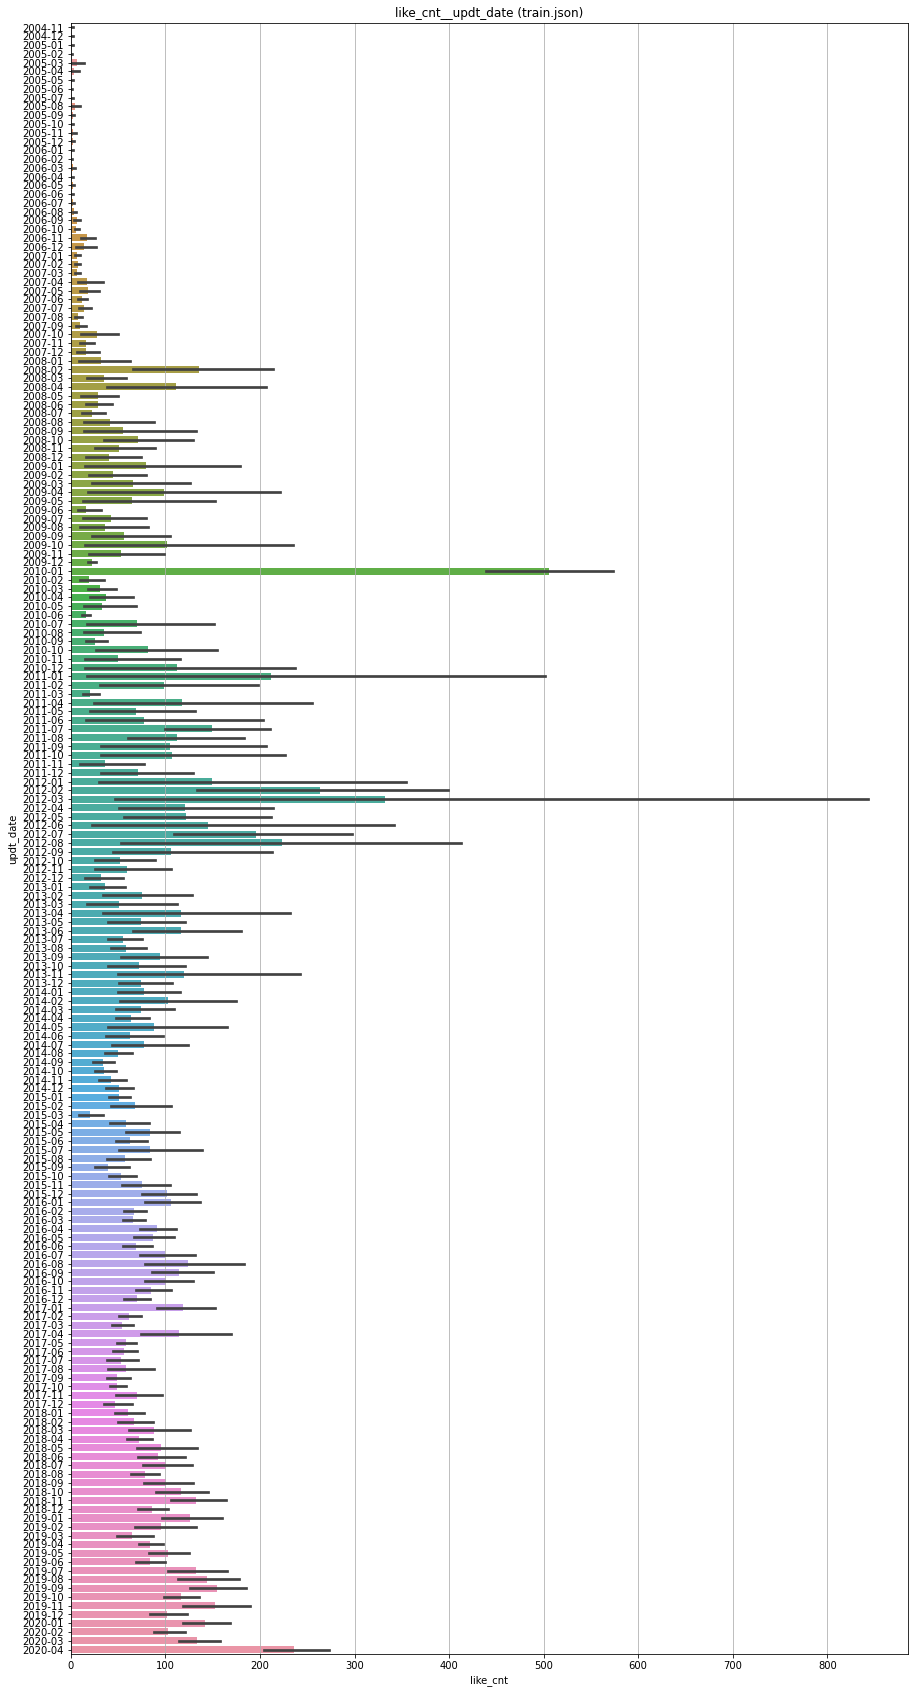

In [24]:
_title = "like_cnt__updt_date (train.json)"
plt.figure(figsize=(15, 30))
plt.title(_title)
sns.barplot(x="like_cnt", y="updt_date", data=date_like)
plt.grid(True, which="both", axis="x")
plt.savefig("graph/{}.png".format(_title))
plt.show()

---

### train.json

In [3]:
print("train: ", train.columns)
print("song: ", song.columns)

train:  Index(['id', 'plylst_title', 'songs', 'tags', 'like_cnt', 'updt_date'], dtype='object')
song:  Index(['id', 'song_name', 'artist_id_basket', 'artist_name_basket', 'album_id',
       'album_name', 'song_gn_gnr_basket', 'song_gn_dtl_gnr_basket',
       'issue_date'],
      dtype='object')


### playlist_title in train

- playlist title과 tag / genre가 어떤 연관성을 가지고 있을까?
- 각 playlist에 있는 songs 개수

In [4]:
train.plylst_title

0                                   여행같은 음악
1                                   요즘 너 말야
2                     편하게, 잔잔하게 들을 수 있는 곡.-
3                     크리스마스 분위기에 흠뻑 취하고 싶을때
4                                  추억의 노래 ㅋ
                        ...                
115066                        METAL E'SM #2
115067       빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!
115068                #1. 눈물이 앞을 가리는 나의_이야기
115069    퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP
115070                  FAVORITE POPSONG!!!
Name: plylst_title, Length: 115071, dtype: object

In [11]:
for i in train.index:
    print(train.plylst_title[i], "|", train.tags[i])

여행같은 음악 | ['락']
요즘 너 말야 | ['추억', '회상']
편하게, 잔잔하게 들을 수 있는 곡.- | ['까페', '잔잔한']
크리스마스 분위기에 흠뻑 취하고 싶을때 | ['연말', '눈오는날', '캐럴', '분위기', '따듯한', '크리스마스캐럴', '겨울노래', '크리스마스', '겨울왕국', '크리스마스송']
추억의 노래 ㅋ | ['댄스']
2017 Pop Trend | ['운동', '드라이브', 'Pop', '트로피컬하우스', '힐링', '기분전환', '2017', '팝', '트렌드', '일렉']
짝사랑..고백..사랑..이별..슬픔.. 감성을 자극하는곡들! | ['짝사랑', '취향저격', '슬픔', '고백', '사랑', '이별']
멍청이.. 내맘도 몰라. | ['잔잔한', '추억', '회상']
DANCING IN THE MOON-LIGHT .01 | ['일렉트로니카', '포크', '메탈', '락', '댄스', '인디']
[록/메탈] Written by 이일우 | ['록', 'Metal', '이일우', 'M에센셜', '메탈', 'Rock', '락']
걸그룹 땐쓰쏭  | ['kpop', '댄스', '걸그룹댄스', '스트레스해소']
노래로 의지를 불태우자! "1일1다짐" st용 프로필뮤직 | ['새해', '여행', '프로필음악', '카카오톡', '기분전환', '소원', '프로필', '소망', '다짐', '카톡']
지친 너를 위로해줄 제목편지 준비해봤어 | ['듣고', '우울', '힐링', '이거', '힘내']
트렌디하고 그루브한 힙합/알앤비 MUSIC | ['힙합', '느낌있는', '밤', '새벽', 'RnB', '감각적인', '드라이브', '국내', '그루브한']
Autumn in Jazz | ['가을', '재즈']
걍게임할때듣는음악 | ['락']
나만 알고싶은 노래들 | ['감성', '질리지않는', '나만알고싶은', 'Pop']
축가듀엣 | ['봄', '설렘', '사랑']
이렇게 비 내리는 날이면, 너도 내 생각 할까.. | ['비오는날', '누

그 날의 좋은 곡2009.1~3 재발행 | ['발라드']
클럽 인트로 플레이리스트 | ['힙합', '클럽', '알앤비', '드라이브', '힙합클럽', '불금', '외힙', '트렌디', '신나는']
흑인스멜 코리안뮤직 7탄 | ['흑인음악', '소울', '카페']
요즘 가장 핫한 일렉 팝으로다가 아주 그냥 | ['클럽', '최신', '댄스', 'Pop', '하우스', '파티', '인기', '일렉트로닉', '팝', '일렉']
뉴에이지 최신곡 모음집 (2014년 10월 15일) | ['뉴에이지']
갈매기공화국을 아느냐.. | ['락']
피아노 첫 걸음 바이엘 연습곡 | ['키즈클래식', '7살', '9살', '8살']
『가수바라기 No.67』 SS501의 베스트 20 | ['기분전환', '설렘', '사랑']
머리맡에 틀어놓고 자기좋은 part.1 | ['취향저격', '잠', '감성', '잔잔한', '새벽']
한 번쯤은 들어봐야 하는 필수 팝송 모음 | ['팝']
2017년 올해의 록 앨범 (국내+국외) | ['올해의앨범', '연말결산', '박효재', 'Rock', '스쿨오브록', '2017', '록']
매일들어도 질리지않는, 스테디셀러와 같은 노래들 | ['휴식', '힐링', '잔잔한']
썸, 데이트할 때 듣고 싶은 재즈 | ['썸남', '감성', '카페', '썸녀', '분위기', '재즈', '데이트', '썸']
사랑을 시작하는 설레임 | ['설렘', '사랑']
여름엔 시원한 댄스음악!! ~ | ['기분전환', '까페']
달콤한노래♡ | ['락']
잠들기전 편안하게 듣는 클래식음악 | ['휴식', '노동요', '연주곡', '피아노', '공부', '클래식', '잠들기전', '침대', '자장가', '불면증']
불면증에 특효약! 여름밤에 듣기 좋은 노래 | ['불면증', '새벽', '밤', '여름밤']
조용히 혼자 듣고 싶어질때-네엣 | ['발라드']
Pop Danthology 2013 | ['팝']
아련한 봄이 왔다! 봄향기를 느끼는 노래 | ['퇴근', '봄', '카

우울할때 밤에 힐링되는 노래들~ | ['휴식', '힐링', '설렘', '사랑']
첫 멜로디만 듣고 선택한 노래 | ['비오는날', '잔잔한', '분위기', '발라드', '추억', '쓸쓸', '감성', '사랑', '이별', '회상']
한번씩 들으면 참 좋은 팝송! | ['소울', '알앤비']
박태환선수가 듣는노래~ | ['발라드']
송가인가수님 MMA무명배우투표해주신 정미애님팬분을위해서 | ['음원선물', '스밍초보', '송가인', '정미애', '송가인팬', '정미애님팬']
여태 어디 숨어있었어? 취향적중, 좋아서 바로 플레이리스트 추가한 곡들 | ['감성', '알앤비', '취향저격', '감성힙합', '취저', '트렌디']
장애를 극복한 재즈 뮤지션들 | ['재즈']
선택장애 리스너를 위한 취향저격 선곡 | ['취향저격', '선택장애']
전주부터가 미치도록 슬픈 노래들 | ['비오는날', '슬픔', '이별']
MBC FM4U 라디오 15.01.15 (목) : Number 1 | ['힐링', '휴식', '잔잔한']
힙합 좋아하신다면 ... 일단 들어보시죠 ? | ['힙합', '클럽', '옥콩', '드라이브', 'drive', '노래', '출근길', 'Rap', 'HipHop', '퇴근길']
비 오잖아 이거 듣자 듣다가 자도 돼 | ['편한음악', '쉬어가기', '휴식시간', '힘빼고듣는음악']
쌀쌀한 계절에 듣는 가슴시린 발라드 | ['감성곡', '발라드']
도입부부터 반하게 되는 pop | ['매장음악', '알앤비', '분위기', '드라이브', 'Pop', '외힙', '도입부', '트렌디', '신나는']
어릴적 테잎 늘어지게 듣던 추억의 영화음악 ost | ['추억의', '뭉클한', '감성', '겨울', 'OST']
운동할 때 들으면 신나는 아이돌 명곡 | ['스트레스', '운동']
아이돌 노래 | ['여행', '산책', '밤', '새벽']
누군가의 팬인 사람들이 들으면 공감 할 팬송! | ['가수팬송', '아이돌팬송', '팬송']
WAVYVAW | ['클럽',

●2009년● 추억의 '09년도 연간차트 TOP100 | ['힐링', '휴식', '추억', '회상']
자기전에 | ['새벽']
J-ROCK~신나는 금요일 | ['JPOP']
뉴에이지 최신곡 모음집 (2015년 03월 13일) | ['뉴에이지']
클래식 최신곡 모음집 (2015년 06월 02일) | ['클래식']
스밍용ㅇㅇ | ['스밍']
밸런타인데이를 함께할 로맨틱 재즈 | ['밸런타인데이', '밸런타인', '2월14일', '발렌타인데이', '재즈', '초콜릿', '발렌타인']
2013년 전세계에서 가장 많이 팔린 앨범 | ['팝']
1월의 최신 일렉트로닉 음악 소식 | ['일렉트로니카', '빌로우', 'EDMFloor', 'EDM']
잔잔히 혼자 듣고 싶은 음악 | ['슬픔', '밤', '이별', '새벽']
발을 동동~~스트레스 날려주는 펑키한 POP | ['펑키', '매장음악', '펑키뮤직', '드라이브', 'funky', '기분전환', '2018', '즐거운', '스트레스', '신나는']
차량용 | ['일렉']
무더위 열대야에 지친 나를 잠재울 감각적인 팝 | ['여름', '분위기', '밤', '취향저격', '열대야', '감성음악', '지칠때', '집', '감성', '무더위']
잔잔하게 듣고 싶은 노래. | ['좋아요', '중독성', '잔잔한', '기분전환', '발라드']
#그리 쉽게 이별을 말하지 말아요# | ['비오는날', '슬픔', '이별']
골든 리스트! 편안하고 분위기있는 시간들:)2 (팝, 어쿠스틱, 컨트리) | ['겨울', '어쿠스틱', '카페', '명곡', '힐링', '기분전환', '일상', '팝', '따뜻한', '편안한']
클래식 음악과 함께 마음 비우기 | ['기분전환']
화려했던 90년대 영국 얼터너티브락으로 떠나는 음악여행 | ['라디오헤드', '스매싱펌킨스', '시규어로스', '데이비드보위', '콜드플레이', '스웨이드', '얼터너티브락', '90년대', '크랜베리스']
이것이 핱시 감성인가 (Pop ver.) | ['하트시그널',

마음의 안정을 위한 힐링뮤직★ | ['힐링', '봄', '카페']
아이돌 | ['댄스']
남자에 관하여...랩&발라드 | ['힙합', '랩']
오늘은 혼자만 즐기고픈, 가을을 머금은 인디 트랙리스트 | ['휴식', '가을', '잔잔한', '날씨', '추억', '하늘', '센치', '기타', '청춘', '인디']
위로가 필요해 | ['힐링', '휴식', '밤', '새벽']
머리를 비워주는 경쾌한 음악 (출근길 기분전환 클래식) | ['집중', '출근길', '노동요', '아침', '오후', '경쾌한', '모닝콜', '클래식', '기분전환', '머리를비워주는']
듣는내내 소름돋는 가창력 | ['노래방선곡', '가창력', '소오름', '소름돋는', '실력파', '스트레스해소']
오늘은 뭐듣지? 고민 nono 월요일은 상쾌하게 추울바알~! | ['월요병', '극복', '출발', '상쾌함', '좋아']
90년대 뮤직 영원하라 | ['추억', '스트레스', '회상']
공기정화조 같은 목소리의 여보컬 | ['미세먼지', '보컬', '여자보컬', '맑은', '깨끗한', '미세먼지많은날', '공기정화', '산뜻한']
운동 효과 100배 ! 운동할때 들으면 더 힘이나는 파워충전 노래 모음  | ['운동할때', '운동', '신나는음악', '신나는노래', '흥폭발', '운동할때듣는음악']
[스윙재즈] 신나는 패스트 스윙음악_#1 | ['신나는재즈', '린디합', '스윙노래', 'swing', '재즈', '스윙댄스', '스윙재즈', '스윙', '스윙음악']
조용한곳에 듣기 5 | ['조용한곳에서']
ㄴㄹㄷㄱ | ['댄스', '오후', '발라드']
커피 한잔의 여유를 도와줄 카페송 | ['휴식', '카페', '여유', '달달한', '커피', '저녁', '힐링', '인디', '편안한']
[이소라의 두번째 프로포즈] 35회 | ['발라드']
뉴에이지 최신 추천곡 (12/11 4주차) | ['휴식', '힐링', '여행', '산책']
사랑을 고백해 달달한 가사의 노래로ღ | ['감성', '봄캐

독특한 분위기의 WOMEN INDIE POP | ROCK | ['분위기', '매장', 'Pop', '음색', '기분전환', '여자', '트렌디', '팝', '음색깡패']
힘들고 지칠 때 기운을 가져다 줄 노래! | ['숨은명곡', '기운', '아이돌', '힐링', '지칠_때', '힘들_때', '힘', '자존감']
우울하게 | ['비오는날']
[국내 가을 가요] 쌀쌀해진 가을 날씨에 딱 생각나는 노래들 | ['가을노래', '가을음악', '가을밤', '밤', '가을', '추천해주고싶은노래', '여행', '쌀쌀한날', '감성', '낙엽']
조용히 감상하는 락 발라드, 팝 | ['소프트락', '힐링']
퇴근길, 오늘도 고생한 당신을 위한 POP 30 | ['집에가는길', '감성', '퇴근길', '밤', 'Pop']
독특하고 감각적인 Chill Hip Hop | ['힙합', '팝']
상쾌한 하루를 시작하는 뉴에이지 | ['뉴에이지', '상쾌']
수고했어, 사랑. 고생했지, 나의 사랑 | ['발라드']
비오는 날 연인을 위한 감성 인디 | ['연인', '감성', '비', '인디']
비긴어게인-Episode | ['버스킹', '이소라', '유희열', '비긴어스', '비긴어게인', 'JTBC', '윤도현']
지금 내 기분 | ['RnB', '그루브', '알앤비']
live | ['락']
카페, 매장에서 나올 법한 감성 팝송 | ['카페음악', '팝송', '감성', '매장음악', '카페']
아이돌의 편견을 벗어라! 실력좋은 아이돌 수록곡 | ['사랑', '밤', '설렘', '새벽']
직관적 바이올리니스트, 크리스티앙 페라스 | ['기교', '감성', 'classic', '바이올린', '1960', '사색', '비르투오소', '클래식', 'violin', '명연']
보컬+랩의 환상적인 조화 2탄 | ['팝']
★겨울냄새가 나는 음악들★ | ['겨울', '설렘', '사랑']
이별식탁 그리고 그후 배가 불렀지 | ['힙합', '랩']
잘 때 듣는 잔잔한 노래 | ['힐링', '휴식

9X년생 학창시절 그대들의 추억. | ['추억', '기분전환', '회상']
가을하면 떠오르는장르 바로 재즈힙합! | ['매장음악', '가을']
우리 아이 첫 영어동요! | ['영어동요', '아기동요']
비와 함께 이 노래면 충분해 - 비 오는 날이면 그 때의 우리가 생각나 | ['비오는날', '함께', '감성', '빗소리', '추억소환', 'Rainy_Day']
마마무,그 앨범의 수놓곡 | ['취향저격', '감성', '가사', '꿀음색', '마마무']
#10 운명의 플레이리스트 | ['운명']
I ♡ 퓨전 음식 [세련된 푸드 팝송 No.1] | ['일렉']
여름밤 청량감 느낄수 있는 댄스뮤직 | ['여름밤']
어두운 도시에 스며드는 느와르 감성  | ['밤', '느와르', '분위기', '몽환', '퇴폐', '도시', '시크', '팝', '새벽']
기억은 하되 추억 말자 | ['슬픔', '추억', '이별', '회상']
많이들으면 들을수록  또 듣고싶은노래 | ['휴식', '힐링', '여행', '산책']
봄 저녁의 로맨틱한 공기에 취해 | ['재즈', '피아노', '기분전환', '봄', '로맨틱']
아이유 꽃갈피 with원곡 | ['발라드']
마음의 피로를 풀어볼까요? | ['휴식', '힐링']
2010년대 연간top5 곡 모음 | ['top5', '추억']
엑소 노래 추천 ^^!❤ | ['엑소', '엑소엘']
주노주노 | ['노래']
순수함과 청량미가 넘치는 샤이니 명곡 | ['샤이니발라드', '샤이니', '아이돌숨은명곡', '샤이니명곡', '사랑', '청량감']
일요일 사무실 | ['사무실', '야근', '뭐어때', '일요일']
휴가!! 여름 드라이브 노래!!! 파도 파도!!! | ['여름', '드라이브']
청소하면서 지루하지 않게 2곡씩 묶었습니다 | ['댄스']
7080부터 최신가요 까지 한번은 들어본 노래,아~그노래 | ['회상기분전환']
내가 들으려고 만드는 거 | ['태그열받네', '내거']
잔잔한 음악과 함께 마음 휴식 | ['잔잔한']
2017-1

첫사랑은 우리맘속에 .... | ['추억', '가을', '회상']
DJ Neo가 추천하는 금주의 국내 Worship TOP10 18.10 | ['DJNeo', '추천', 'top10', 'Worship', '국내Gospel']
너넝ㅇㄹㅇㅇㅇ | ['발라드']
둘이 만드는 멜로디, 듀엣&피처링 모음 | ['발라드']
♥혼자 있어도 심심할 틈이 없네♥ | ['휴식', '힐링', '매장음악']
쓸쓸하면서도 설레고싶을때 | ['슬픔', '이별', '설렘', '사랑']
감각을 깨워주는 음악들 | ['인디']
잔잔한랩 | ['힙합', '랩']
여행 part3. Goodnight | ['여행', '산책', '밤', '새벽']
런 뛸때 | ['스트레스', '운동']
매혹적인 목소리를 선보이는 여성 포크 록 싱어송라이터! | ['락']
미스터트롯, 미스트롯과 젊은 트롯 가수들의 트로트 전성시대 | ['영탁', '정동원', '이찬원', '미스터트롯', '임영웅', '박서진', '조명섭', '송가인', '정미애', '미스트롯']
봄이 오면 생각나는 봄캐롤 모음 | ['봄', '소풍', '드라이브', '벚꽃', '봄캐롤', '설렘', '사랑']
업무 향상에 도움이 될 연주곡 모음집 ^^ | ['집중력', '여유로운', '카페', '연주곡', '잔잔한', '피아노', '힐링', '뉴에이지', '공부할때']
한시대를 풍미한 추억의 올드팝 ★ | ['7080', '올드팝', '포크', '컨트리', '힐링', 'LP', '음악다방', '올드팝송', '옛날팝송', '5060']
다가오는 가을과 책을 위한 감성 음악 | ['힐링', '휴식', '가을']
메리크리스마스~^^ | ['겨울', '설렘', '사랑']
기분좋은 아침,벚꽃향  가득한 연주곡~! | ['아침']
혼자 듣는 발라드 | ['감성', '쓸쓸한밤', '발라드']
카폐 one two | ['까페']
썸머송을 위한 발랄걸그룹송 | ['여름', '걸그룹', '썸머', '댄스']
2010 멜론 뮤직 어워드 취재기 1탄 | ['셋리스트'

속 뚫리는 J-ROCK!!!! | ['JPOP']
지산 월드락페스티벌: Jamiroquai 예상 Set | ['팝']
매력적인보컬&중독성 있는 멜로디 | ['멜로디좋은', '중독성있는노래', '보컬', '매력적인목소리']
비트넘치는요즘힙합 | ['힙합', '랩']
♡느낌있는 노래♡ | ['소울', '알앤비']
내가 들어온 한국힙합 초창기 부터 현재까지 part1~part2 | ['힙합', '국힙', '국내힙합']
핫트랙 인디 | ['개성있는', '핫트랙', '감각적인', '명곡', '국내', '인디핫트랙', '인디', '가요', '인기', '장르핫트랙']
★시원한 여름노래모음★ | ['댄스']
끈적끈적한 밤 분위기에 어울리는 음악! | ['집중', 'PBRnB', '휴식', '여름밤', '차분한', '침대']
예쁘고 사랑스러운 달콤 감성 음악 | ['겨울', '휴식', '봄', '카페', '잔잔한', '달달', '설레임', '감각적', '감성', '사랑']
대세는 Girl 그룹! | ['댄스']
가인이어라 | ['엄마아리랑', '가인이어라', '송가인']
작곡가 Royal Dive가 참여한 아이돌 노래들 | ['royal_dive', '여름', '아이돌', '뉴이스트', '댄스', 'EDM', '갓세븐', '워너원', '내적댄스', '신나는']
재즈 라떼, 달콤하고 부드럽게 | ['부드러운', '카페라떼', '재즈']
국내 일렉트로닉 신스팝 | ['국내일렉', 'DJ', '드라이브', '신스팝', '기분전환', '스트레스', '일렉트로닉']
흥 돋울때 듣는 노래 | ['힙합', '랩']
복잡한 마음을 정리하는 뉴에이지 | ['휴식', '카페', '연주곡', '피아노', '명상', '힐링', '뉴에이지']
'넌 남이 아냐' 나잠 수(a.k.a 압둘라 나잠)X김기조 | ['인디']
봄바람이 살랑살랑 ~ | ['락']
새벽감성 | ['힙합', '랩']
크리스마스가 돌아왔어요~~~~! | ['겨울', '설렘', '사랑']
SUMMER-♬ | ['댄스']
언제들어도 쿨

부오너ㅣ밈 | ['잡']
음악만 들었는데 점수가 상승한다^^ 공부 집중력을 위한 플레이리스트 | ['집중', 'ASMR', '연주곡', '잔잔한', '피아노', 'bgm', '브금', '빗소리', '뉴에이지', '공부']
"봄" 이 왔어요~ | ['기분전환', '봄']
공허한 가을에 어울리는 노래 | ['가을노래', '가을음악', '감성', '가을', '가을감성', '가을향기', '위로', '휴식', '가을아침', '가을에들으면좋을음악']
앗 너무 귀여워..♥ 심쿵사 유발 노래들! | ['기분좋은', '달달한', '행복', '귀여운', '상큼', '인디']
너무 식상하지 않은 봄 노래 선곡표 | ['선곡표', '봄노래']
이별을 말하는 노래 | ['슬픔', '추억', '이별']
나의 가을 | ['가을']
뉴에이지 모음집 | ['뉴에이지']
새벽감성더해주는 감성알엔비힙합 | ['힙합', '감성', '새벽', '랩', '잔잔', '감성힙합', '알엔비']
미스트롯 미스터트롯  경연 리메이크곡 아닌 본인곡 노래모음 | ['경연참가자', '임영웅', '추천', '경연', '미스터트롯', 'TV조선', '홍자', '송가인', '애창곡', '미스트롯']
슬기로운음악생활 #1 | ['휴식', '드라이브', '1', '슬기로운음악생활', '음악의안단테', '기분전환']
애절한 목소리의 절규-음악★★★ | ['발라드']
❤비오는날 한번쯤은 찾아듣게되는 | ['비오는날', '추억', '회상']
콩샌카페에서 | ['팝']
따뜻한 커피와 재즈리스트 | ['보사', '겨울', '커피', '재즈', '추워']
가을냄새 나는 잔잔한 음악,* | ['휴식', '힐링', '기분전환']
원조 갱스터 힙합(Fresh Version) | ['힙합', '랩']
눈물이 날 것 같은.. | ['소울', '알앤비']
일렉비트에 올라탄 멜로디 429 | ['일렉트로니카']
MBC FM4U 라됴 14.04.29 (화) 어제의 선곡 | ['힐링', '휴식']
한번쯤 들어봐야 할 다양한 음악의 시대 80년도 

몽환스럽고 우울하게 빠져드는 노래들, | ['특이한', '우울한', '몽환', '몽롱한', '몽환적인', '독특한']
딍굴~딍굴~ 누워서 듣는 노래~ | ['인디']
집중이 안될 때 들어봐요 (공부/독서/작업/휴식) | ['집중', '휴식', '시험', '수능', '독서', '클래식', '작업', '뉴에이지', '공부']
귀에 착착 감기는 POP | ['팝']
Billboard TheHot100 Top20 170923(미국차트) | ['운동', '미국', 'TOP20', 'Hot100', 'Billboard', '팝']
우주를 줄게 봄바람 낮과 저녁 | ['봄']
비오는날 듣고픈 노래.. | ['비오는날', '비', '잔잔한', '추억', '슬픔', '이별', '퇴근길']
♥완전좋은뮤지컬넘버♥ | ['OST']
90년대부터 최신까지 기분전환 댄스 | ['토토가', '90년대가요', '8090', '90년대노래', '8090세대', '추억노래', '8090댄스']
Day 1 | ['힙합', '카페', '로맨틱', '달달한', 'RnB', '연인', '사랑', '연애', '설렘', '데이트']
북유럽의 감성을 담은 재즈의 세계 | ['힐링', '유럽', '연주', '재즈', '여행']
이세상에서.. | ['발라드']
도입부 듣고 반한 노래들  | ['반함', '도입부부터끝장']
Arthur Blythe와 Geri Allen을 기억하며 1 | ['재즈추천', '황덕호', 'Jazz', '원더풀재즈', '재즈']
추운날씨가 따뜻해지듯 마음도 따뜻해지게 | ['연인']
인디 좋아요♩♬ | ['발라드']
고품격 힙합파티 체크메이트 | ['소울', '알앤비']
가사가 좋아 찾아듣게 되는 노래.. | ['저녁', '밤', '새벽', '추억', '가사', '그리움', '슬픔', '사랑', '이별', '회상']
한번들으면 중독되는 클럽음악 !!yeah!! | ['일렉트로니카', '클럽EDM곡', '클럽음악', '클럽노래', '클럽뮤직', '클럽', '기분전환', '스트레스', 

설렘지수 상승! 아이돌 목소리로 듣는 OST | ['달달한', '데이트', 'OST', '국내드라마', '설렘', '사랑', '연애권장송']
사랑하는,사랑했던사람이그리울때.. | ['추억', '사랑', '설렘', '회상']
목욕하면서 듣는 신나는 팝송 | ['휴식', '힐링', '기분전환']
잔잔한 감성노래 모음. | ['비오는날', '휴식', '매장음악', '잔잔한', '취향저격', '흐린날', '위로', '감성', '기분전환', '편안한']
드라이브 할 때 챙겨야 할 꼭 이 곡-2nd | ['스트레스', '드라이브']
펍에서 나오는 감각적인 hip hop & RnB vol.3 | ['힙합', '클럽', '감각적인노래', 'RnB', '감각적인', '힙합클럽', '밤새벽', '기분전환', '버스']
내가 좋아하는 지나간 노래.. | ['힙합', '랩']
비오는날 김성적인 힙합 | ['비오는날', '감성힙합', '혼자', '새벽감성', '홀로', '외로움']
8090~>_< | ['발라드']
Relaxing orchestral adagios - 느린 악장의 매력 | ['라르고', '평안한', '아다지오', '관현악', '클래식', '조용한', '편안한']
당신을 참 좋아해요.. | ['피아노', '뉴에이지', '연주곡', '카페', '잔잔한']
지금 잊는 중이라면 : 애증의 관계에 지친 당신에게 바치는 애잔한 노래들 | ['애잔한', 'Obey', '후련', '가을밤', '슬픔', '짝사랑', '사랑', '이별', '힐링', '실연']
떠날 준비 완료! 다 잊고 신나게 달리자 | ['흥부자', '여행', '일탈', '로드트립', 'EDM', '스트레스해소', '신나는']
이 노래 들으면서 LOL하면 펜타킬 쌉가능! | ['게임', '페이커', '롤']
[유희열의 스케치북] 113회 | ['락']
울지마 이미 지난일이야 | ['울고싶을때', '삶의반칙선위의점일뿐이야']
마음에 여운을 남기는 잔잔한 사랑 노래들 | ['봄', '잔잔한', '사랑노래', '연인', 

커피한잔 생각나는 음악들:) | ['겨울', '휴식', '주말', '잔잔한', '오후', '여행', '기분전환', '북카페', '뉴에이지', '커피숍']
GRAY 가 프로듀싱  한 노래모음!! | ['스트레스', '기분전환']
우울함을 산뜻함으로 | ['봄', '설렘', '사랑']
퇴근길 나와 함께 해줘 노래들아~~~ | ['감성', '고막힐링', '가을', '버스', '지하철', '드라이브', '불금', '후유증', '퇴근길', '청춘']
2014-16 | ['내노래']
오! 나의 인생 | ['기분전환']
호호호허호 | ['커플', '남친', '연애', '설렘', '사랑', '여친']
이별에 헤어나지 못하고 있는 너에게 | ['이별', '헤어짐', '발라드', '슬픈', '사랑']
지친 마음을 어루만지는 연주곡들 | ['겨울', '연주곡', '피아노', 'Instrumental', '힐링', '기분전환']
설레이고 싶을때 듣는 노래 | ['달달한노래', '설레는노래']
소중히 하나하나 모은 오지게 좋은 인디 | ['잔잔한', '인디', '취저방방이']
3대 기획사 노래 모음 - JYP편 | ['추억', '매장음악', '회상']
차가운 바람에 실려운 쓸쓸한 감성 리스트 | ['겨울', '감성', '감성자극', '잔잔한', '새벽감성', '새벽', '잠들기전', '겨울밤', '감미로운', '지친']
심장을울리다..... | ['봄']
wCloud List° unique R&B | ['소울', '알앤비']
생생한 고음질로 만나는, Hi-Fi 가요 위클리 (9월 28일자) | ['신곡', '최신', '믿고듣는', '드라이브', '기분전환', '가요', '트렌디']
우울함을 파고드는 노래들 | ['새벽', '슬픔', '감성', '혼자', '발라드']
해외에서 더 유명한 국내 재즈 뮤지션 | ['재즈']
[노동요] 수요일까지 왔다! 좀만더 힘내자 | ['노동요', '팝송']
아련한 그리움을 담은 사랑의 클래식 | ['슬픔', '이별', '설렘', '사랑']
밤에 듣기편

별다방을 가득채우는 멜로디. | ['겨울', '휴식', '매장음악', '카페', '잔잔한', '취향저격', '센치', '멜로디', '감성', '기분전환']
언제들어도 좋은 아이돌 비트뮤직 | ['클럽', '운동']
사연있는 라디오 | ['발라드']
늦은 밤 몽환적인 연주곡 힐링음악:) | ['늦은밤', '연주곡']
멜론스포츠 유저 Pick! 10월 TOP SONG LIST | ['헬스', '스포츠', '운동', '다이어트', '멜론스포츠', '팝', '일렉', '록', '웨이트', '신나는']
❤ [Club] 땡기는 "K-Pop" ❤ | ['클럽', '운동']
메르스를 이겨내는 방법 | ['스트레스', '기분전환']
노래방에서 부르기 좋은 발라드 ♥ | ['발라드']
❤Ti voglio bene❤ | ['잔잔한', '설렘', '사랑']
'스파이더맨 파 프롬 홈' 의 사운드트랙 | ['사운드트랙', 'OST', '마블', '스파이더맨']
새벽 문득.. 생각나는 그 노래 | ['비오는날', '밤', '새벽']
조용하고 반짝거려 | ['편안', '휴식', '잔잔', '편안함', '반짝반짝', '기분전환', '조용', '편안한']
내 손을 잡아 | ['잔잔한', '위로', '힐링', '희망찬', '멜로디']
여름에 락 음악 어때(쿨 하게) | ['스트레스', '휴식', '기분전환', '드라이브']
여름 휴가중 들으면 더 좋은 음악 리스트! | ['여행', '기분전환', '산책']
가게 | ['댄스']
날카로운 랩과 강렬한 하드록의 동침, RATM | ['1990', '랩', '들썩들썩', '격렬함', '기분전환', '공격적인', '분노', '락', '얼터너티브', '스트레스해소']
Got your favorite! | ['샤캐']
하늘 그리고 사막 .. | ['잔잔한', '추억', '회상']
DJ 미러볼 68회: 비비스(VIVIS) | ['기분전환']
바람이 점점 차가워져 가고.... | ['추억', '가을', '회상']
센스돋는 한번들으면 계속듣는 곡들 | ['힐링

【불후의 명곡】2009년 상반기 결산 | ['댄스']
그냥 내취향 팝송 | ['감성', '띵곡', '팝송', '힙', '내맘대로', '신나는']
뭘 좋아할지 몰라서 내 마음대로 골라본 음악 | ['골라듣자', '믿고듣는_플레이리스트']
좋아하는노래 | ['발라드']
국악의 매력 | ['국악', '잔잔한', '연주곡', '귀향', '퓨전국악', '차분한', 'OST', '슬픈', '노래', '힐링']
제국의 센힙합 대혈전! Round 6 | ['힙합', '래핑', '히팝', '랩', '센힙합', 'HipHop', 'round6', 'Empire', '제국']
추억의팝송 모음1집 | ['팝']
CANTAROCOCO3 | ['설렘']
겨울비가 옵니다 | ['밤', '새벽']
'까랑까랑' 기타 사운드가 매력적인 Rock&POP | ['팝', '리듬', '기타리스트', '음색', '기타', '기분전환', '사운드', '록', '악기', '신나는']
이 주의 Hidden Tracks: 11월 둘째 주 | ['휴식', '여행산책', '인디팝', '드라이브', '히든트랙', '11월_2주차']
클래식 최신곡 모음집 (2015년 09월 16일) | ['클래식']
○취향저격 나만의감성  해외 힙합 Part 1○ | ['힐링', '휴식', '매장음악']
요즘 많이 듣는 곡 (2018.02.01) | ['겨울', '매장음악', '카페', '잔잔한', '커피', '기분전환', '사랑', '추위']
밤에 듣는 그런 노래 | ['술', '밤', '혼자', '새벽', '쓸쓸한', '고독한', '고요']
중독성 강한 국내 매력 보이스!!! | ['새벽', '추억', '밤', '회상']
비오는 날, 커피한잔과 함께듣는 잔잔한 뉴에이지 | ['비오는날', '휴식', '잔잔한', '피아노', '커피', '힐링', '뉴에이지', '까페']
딴대보고 | ['소울', '알앤비']
최고의 팝스타이자 완벽한 송라이터, 조지 마이클 | ['1990', '조지마이클', '1980', 'Songwriter',

비가온뒤엔..네옆이 그리워.. | ['슬픔', '이별']
⭐혼자있을때 듣기 딱 좋은 음악들⭐ | ['혼자있을때', '기분전환', '혼자있을때_듣기좋은노래']
들어보면다좋은 묻혀버린 걸그룹명곡 | ['댄스']
은은한 커피향과 설렘 가득한 연주곡 모음 | ['기분전환', '매장음악']
기분전환이 필요할때 한곡씩 꺼내먹어요 | ['기분전환', '드라이브']
신나는 음악 들으며 청소도 신나게! | ['댄스']
이 밤을 적셔 줄, 꿈꾸는 듯 한 인디 노래들 | ['감성', '어쿠스틱', '잔잔한', '새벽', '흔하지않은', '나만알고싶은음악', '인디', '밤']
윤하 발라드 선정 15곡 | ['이별', '감성', '윤하', '발라드']
Trendsetter's beat (EDM & Hiphop) #1 | ['힙합', '마약', 'EDM', '트렌드', '중독', '비트', '트렌디', '팝']
집에 가자..하... 퇴근길 위한 노래 | ['힐링', '휴식', '잔잔한']
묻히기 아까운... 재조명해보고 싶은 곡들. | ['휴식', '힐링', '기분전환']
자기 전 듣기 좋은노래 | ['힐링', '휴식', '잔잔한']
서재페 2016 | ['휴식', '힐링', '기분전환']
여행길이 더욱 즐거워지는 음악. | ['기분전환', '드라이브', '여행']
[ost]심장이 쫄깃거리는 드라마ost | ['겨울', '편안함', '로맨틱', '연인', '추억', '위로', '감성', '따스함', '드라마ost', '오후']
카페 혹은 매장에 어울리는 매장음악 | ['매장음악', '까페']
IKON | ['여름', '설렘', '사랑']
90년대 걸그룹 노래 ~ 추억속으로 ~ 고고!! | ['댄스']
베스트51 CCM | ['CCM']
드럼 스틱으로 피 튀기게 연습했을 버디 리치 | ['드럼연주', '버디리치', '드럼', '재즈2020', '재즈']
재미없는거 | ['클럽']
let's 씽! | ['기분전환', '운동']
임시저장장소 | ['팝']
J POP 좋아욘:3 | ['JP

겨울저녁에 듣는 따뜻한 손난로같은 보이스라떼. | ['겨울', '감성', '매장음악', '겨울감성', '카페', '겨울밤', '드라이브', '저녁', '포근한']
Stacie Orrico 베스트 | ['팝']
듣기만 해도 상쾌해지는 청량한 일렉팝 | ['여름', '일렉트로니카', '트로피컬', '일렉팝', '청량한', '해외일렉트로니카', '팝', '신나는']
#그린그린한_앨범들 | ['초록색', '봄']
90년대 드라마 OST | ['회상', '추억', 'OST', '그리움', '드라마', '90년대']
듣기만해도 시원해지는 아이돌곡들 (댄스) | ['여름', '시원한', '댄스', '아이돌']
POP! 느낌아니까! | ['휴식', '힐링', '여행', '산책']
>> 존&나 신나는 봄노래 << | ['달려', '흥', '봄', '댄스', '드라이브', '오빠', '신나는']
들을수록 더 빠져드는 유니크한 볼매 인디뮤직 모음! | ['여행', '기분전환', '산책']
(컴백)(단독)(170408) Return Of Eve | ['콘서트', '행복', '이브', '셋리스트', '무한반복', '락', '감사']
감성이 솟을때 생각나는 노래 | ['휴식', '힐링', '밤', '새벽']
무거운 몸을 일으켜 줄 신나는 아이돌댄스 | ['kpop', '출근길', '아침', '운동', '다이어트', '댄스', '아이돌', '모닝콜', '내적댄스']
기분업! 시켜주는 파워를 담은 노래!! | ['운동할때', '여행', '시원한', '기분전환', '스트레스', '고민', '신나는']
90년대 댄스 | ['댄스']
크리스마스니까 | ['겨울', '크리스마스']
쌀쌀한 밤의 따뜻한 감성 발라드 | ['가을감성', '감성', '감성자극', '분위기있는', '가을밤', '퇴근길', '감미로운', '발라드', '쌀쌀한']
마치 내 이야기인듯한 이별 노래... 가사집중 | ['잘가', '이별노래', '안녕', '노래', '이야기', '이별']
올해 마지막 더위! 이 음악으로 시원해지

느낌아니까 | ['휴식', '카페']
그때의 겨울과 지금의 겨울 | ['겨울', '카페', '발라드', '추억', '사랑', '이별', '인디']
남자친구가 불러주길 바라는 노래들 | ['발라드']
카페에서 틀기좋은 가사없는 잔잔한 다양한장르에 음악들. | ['매장음악', '까페']
어깨가 절로 들썩거릴 팝송! | ['팝']
사랑에 빠진 당신의 이야기 | ['설렘', '국내록', '연인', '1990년대', '심쿵', '고백', '메탈', '사랑', '기쁨']
2016년에 인기 아이돌 그룹이 낸 노래 | ['2016', '아이돌']
취향저격 가사로 이별을 이별답지 않게 | ['취향저격', '감성적인', '이별노래']
■□■□ BBJ쪼 힙합창고 ■□■□ | ['힙합', '랩']
아침을 여는 행복한 음악 한 곡의 여유 | ['감성', '뉴에이지', '여유', '재즈', '아침']
『가수바라기 No.65』 프리스타일의 베스트 20 | ['슬픔', '추억', '이별', '회상']
웃으러 히? | ['댄스']
연휴 카페에서 들리는 고막남여친의 선선한 목소리와 멜로디. | ['가을감성', '저녁', '연휴', '카페', '오후', '드라이브', '여행', '추석', '가을']
영아꺼야 | ['영아꺼얌']
.... | ['휴식', '힐링', '밤', '새벽']
서른살...이별에 아파하고 있습니다 | ['발라드']
우울하고 잔잔한 외국 음악 | ['잔잔한', '밤', '새벽']
sunset drive list. | ['감성', '봄', '일몰', '잔잔한', '드라이브', '여행', '띵곡']
현자타임 풀가동!! | ['힐링', '휴식', '잔잔한']
12월마지막 우울해하지말고 신나게 살자!!ㅋㅋㅋ | ['솔로', '천국', '혼자', '인생', '클럽노래', '놀자', '소통', '반가워', '나', '스타일']
Duet + | ['Duet', '달콤한']
메리 솔로크리스마스 | ['솔로', '휴식', '메리크리스마스', '추억', '위로', '힐링']
90~00년대 발라

진짜 R짜배기 R&B | ['소울', '알앤비']
새벽, 마음이 흐르다 | ['잔잔한', '밤', '새벽']
[Pop] Introduction: Madonna | ['M에센셜', '팝', 'Pop']
가을 향기 물씬 풍기는 인디 발라드 모음~* | ['비오는날', '연인', '카페에서', '가을']
내가 좋아하는 팝송! | ['동틱동틱', '팝', '사랑']
1970년대 팝신을 주도한 여성 싱어 송라이터, 칼리 사이먼 | ['그래미', 'Grammy', '로맨틱', '싱어송라이터', '추억', 'Pop', '센티멘탈', '1960_70', '1970년대팝']
비내리는 날 카페에서 듣는 재즈 | ['커피', 'Jazz', '카페', '재즈', '비']
예쁘고 당당한 쇼핑! 런웨이 매장 팝송 9th | ['가을', '설렘', '사랑']
오디오 장인의 한 땀, KTS 오디오 공방 | ['한지훈', 'HiFi가이드', '오디오']
귀를즐겁고상쾌하게하는팝 | ['소울', '알앤비']
드라마 주인공으로 만들어주는 러브송 | ['감성', '추억', '드라이브', '여행', '주인공', '추울때', '힐링', '분위기', '드라마', '찬바람']
20세기 대중음악의 거대한 영향력, Quincy Jones 2편 | ['재즈추천', '재즈']
SM STATION 2 | ['SMSTATION', 'STATION', 'SM']
프로듀스 101 시즌2 그룹배틀평가곡 다시 듣기 | ['인피니트', '프로듀스101_시즌2', '샤이니', '방탄소년단', 'EXO', '비스트', '슈퍼주니어', '2PM', '세븐틴']
편안한 명상을 위한 나른한 뉴에이지 | ['편안한명상을위한', '휴식', '연주곡', '요가음악', '오후', '차분한', '낙엽', '피아노', '편안한', '쌀쌀한']
스트레스에 뉴에이지 음악을 들으며 눈물로 해소 | ['감성', '눈물', '새벽', '쓸쓸', '뉴에이지', '사랑', '기분전환', '스트레스해소']
누워서 듣기 좋은 노래들 | ['힐링', '휴식',

제목만 봐도 사랑하고 싶게 만드는 노래 | ['까페', '설렘', '사랑']
#EDM | ['EDM']
두성연습곡 | ['두성연습곡', '두성마스터하자', '3옥']
클래식 최신곡 모음집 (2015년 08월 28일) | ['클래식']
기분을 업시켜 줄 1980년대 일렉팝! | ['1980년대', '일렉트로니카', '일렉팝', '추억', '명곡', '신스팝', '전자음악', '빈티지', '신나는']
전설의 BLUES GUITARLIST | ['락']
장마철 눅눅함을 뽀송하게 바꿔주는 음악★4 | ['우클렐레', '카페음악', '여름', '재즈', '장마철']
네오소울, 그 정점은?? | ['소울', '알앤비']
비올때 감성노래.. | ['비오는날', '휴식', '가을', '카페', '기분전환', '사랑', '까페', '밤']
필리핀,태국,하와이,라오스중 한곳가서 바다보면서 들을 곡 | ['여름']
이 음악들 젛다고 | ['매장음악', '밤', '새벽']
OWL CITY | ['일렉']
좋은 팝음악 같이 들어요~☆ | ['팝']
별과 달이 빛나는 밤의 재즈 | ['밤', '가을', '낭만', '별밤', '달', '재즈', '하늘', '별']
아이돌x아이돌, 컬래버레이션의 정석 | ['kpop', 'KPOP탐구생활', '아이돌탐구생활', '아이돌']
@잔잔한노래♪ | ['휴식', '힐링', '여행', '산책']
Hot Summer! 여성 솔로&걸그룹 댄스 | ['여름', '휴양지', '아이돌', '댄스', '솔로', '시원한', '여성', '더위', '신나는']
찬바람에 흩날리는 짙은 감성 멜로디 | ['감성', '밤', '새벽감성', '겨울감성', '따스한', '혼술', '감성발라드', '퇴근길', '감미로운', '찬바람']
쌀쌀해진 가을 날씨에 어울리는 발라드 리스트 | ['가을', '잔잔한']
서정적인 2000년대 모던 록 모음 | ['서정', '밴드음악', '낭만', '록밴드', '록', '모던록']
노래방에서 이성 앞에서 부르기 좋은 노래 -남자- | ['

트로피컬 하우스로 연장면학 불태워버리기~ | ['여름', '매장음악', '취향저격', '청량', '트로피컬하우스', 'EDM', '기분전환', '하우스', '트로피칼하우스']
청량감 넘치는 POP! ＞∇＜ | ['두아리파', '마룬5', '팝', '청량한', 'Pop']
적당히 흘러나오는 피아노 선율과 함께 듣는 팝 | ['휴식', '팝', '피아노', '잔잔한']
설레는pops 15선. | ['소울', '알앤비']
요즘 대세는 시원한 밴드 음악! | ['밴드', '락', '락페', '인디', 'Rock']
새벽, 그리운 것들에 대해 | ['잔잔한', '밤', '새벽']
경칩이다! 봄을 끼얹어 볼까요? 봄을 봄봄 | ['JPOP']
감성을 건드리는 연주곡 | ['뉴에이지']
당신이 생각나는 밤 | ['슬픔', '이별', '까페']
19@@ | ['랩', '힙합', '19']
조용히 혼자이고 싶다... | ['잔잔한', '추억', '회상']
가곡의 여왕, 엘리 아멜링 | ['가곡', '클래식명곡', 'classic', '엘리아멜링', '치유', 'Vocal', '음색', '힐링송', '종교음악', '청아한']
꿀 같은 설연휴에서 깨기 싫다면!! | ['힘', '연휴끝', '월요병', '노래들']
두고두고 듣게되는 플레이리스트(상시업뎃) | ['기분전환', '여행', '감성', '드라이브', '신나는']
가을날씨와 어울리는 세련되고 감각적인 음악들 | ['기분전환', '신나는']
들을수록좋은연주곡 | ['힐링', '휴식', '까페']
★club★고르고고른 EDM 7 | ['클럽', 'DJ', '운동할때', 'Club', '스피닝', '귀정화', '기분전환', '최신', '매장음악']
카페에서 흐르는 노래선곡~ | ['장마', '카페', '잔잔한', '커피', '기분전환', '사랑', '이별', '여름향기', '까페', '비']
KING OF DELUSION . | ['kpop', '오늘의선곡', '2020s', 'girlgroup', 'dance', '장르무관',

반갑다 내친구 | ['발라드']
당신을 위한 힐링이 있는 뉴에이지 | ['뉴에이지']
for 하루 | ['하루', '힐링', '사랑']
여유있게 하루를 마무리할때(감성자극,독서에 어울리는) | ['집중', '노동요', '주말', '여유', '느낌있는피아노연주곡', '밤새벽', '고백', '감성자극', '불면증', '자장가']
분위기UP 기분 좋아지는 피아노 연주곡:-) | ['뉴에이지']
내심장의 색깔은 블랙, Black | ['kpop', '아이돌', 'Black', '아이돌명곡']
영힙스터 빌리 아일리시 목소리 접수하기 | ['빌리아일리시', '청소년', '잔잔한', '분위기', 'Pop', '기분전환', 'billieeilish', 'Trendy', '트렌디', '팝']
따분함에서 해방되게해줄 신나는#EDM #일렉 #팝 #운동할때 | ['일렉', '신나는', '클럽', '운동', 'EDM']
오늘 하루의 시작은, 향이 좋은 모닝커피 한 잔과 연주곡과 함께 | ['휴식', '매장음악', '카페', '연주곡', '잔잔한', '시작', '커피', '일상', '월요일']
중독성 강하고 쿨한 팝 리스트 | ['기분전환', '드라이브']
감미로운 재즈음악~ | ['커피', '카페', '재즈']
75년  토끼들  그리운 대학시절 | ['감성']
신나는 음악6 | ['드라이브']
새벽감성을 응원하는 감성 발라드 명곡들❤ | ['새벽', '추억', '밤', '회상']
결혼하고싶다 | ['가을', '설렘', '사랑']
심야 독서 Bgm / 부담없이 틀어놓기 좋은 연주곡 /책추천#1 | ['밤', '잔잔한', '새벽', '독서', '잠들기전', '심야', '편안한']
가을과 함께하는 발라드 | ['발라드']
기분좋아지는 어쿠스틱 인디 | ['기분전환', '인디']
비 오는 날의 카페 재즈 | ['카페', '재즈', '비']
위클리 초이스 - 10월 4째주 | ['기분전환']
힘들고 지칠땐, 이 노래에기대 | ['휴식', '힐링', '기분전환']
추천 ♬ 감성적인 인디스타일의

발라드에 빠져보세요~ | ['발라드']
B.A.P 컴백기념 내 기준 베스트 곡 | ['팝']
네가 없는 공허함을 위로해 줄 밤의 노래 | ['밤', '발라드', '새벽', '추위', '감성발라드', '침대']
댄스가수들모음 | ['댄스']
20191124 | ['1124', '2019']
책 읽으며 듣기 좋은 잔잔한 BGM | ['여유', '잔잔한', 'bgm', '독서', '힐링', '커피한잔', '사무실', '웹툰', '책읽을때', '공부할때']
들으면 울컥하는 슬프면서 감성적인 음악 | ['감성자극', '회상', '새벽감성', '겨울밤', '슬픈', '그리움', '슬픔', '사랑', '감성발라드', '이별']
상반기 주목해야 할 인디음악 TOP 10 (上) | ['인디']
시워한 밤공기와 맥주먹으면서 함께 듣기좋은 감성 노래들 | ['맥주한잔', '감성', '야외', '야경', '맥주펍']
ㅂㅅ | ['발라드']
여름!  EDM! | ['드라이브', '운동']
매력 가득한 걸크러쉬 브라운아이드걸스 | ['리메미크', '브아걸', '브라운아이드걸스', '소울', '회상']
카페의봄 | ['락']
느낌있는 힙합 | ['힙합', '최신', '흑인', '쇼미더머니', '래퍼', '인기', '신나는']
기분전환이 필요할때 | ['댄스']
가을하늘 가을바람... | ['가을', '까페']
베토벤으로 매장음악 채우기~! | ['매장음악']
혼자 아무생각없이 듣기좋은(상시업뎃) | ['스트레스', '기분전환']
김건모의 숨은명곡들(유명곡 제외) | ['감성', '회상', '추억', '보컬', '힐링', '사랑', '90년대', '레전드', '발라드', '외로움']
女人들의 애절한 발라드... | ['발라드']
애절한 여자 발라드 | ['슬픔', '이별']
우울한 너에게 들려주고 싶은 곡 | ['슬픔', '밤', '이별', '새벽']
When I work :  | ['감성', '작업']
크리스마스330 | ['기분전환', '드라이브']
떼창으로 아티스트를 감동시킨 곡 |

잠들기전, 감성증폭장치 | ['새벽', '추억', '밤', '회상']
세계적인 피아니스트들 | ['아기클래식', '0살']
심장이여 두근거려라 | ['클럽', '스트레스']
가만히 드라이브하면서 듣기 좋은 노래 | ['드라이브', '발라드']
은은하고 부드러운 알앤비&힙합 | ['힙합', '감성', '매장음악', '카페', '알앤비', '운동', '드라이브', '여행', '사랑', '신나는']
자소서에 지친 전국 취준생 힐링 프로젝트_잔잔한 팝송 | ['토닥토닥', '취준생', '화이팅', '안정']
오늘의 추천 가수 - god | ['god']
집에서 조용히 듣는 클래식 | ['힐링', '휴식', '잔잔한']
#POWER RUN MIX | ['피트니스', '에너지', '파워힙합', '러닝음악', '파워풀', '스트레스']
봄노래 꽃바람 나들이송 | ['기분좋은', '상큼한', '듣기좋은', '봄', '계절', '봄바람', '봄노래', '3월', '힙한', '벚꽃']
귀로 봄을느낄수있는 곡들~~ | ['봄', '설렘', '사랑']
8090-H.O.T. 젝스키스 핑클 SES 신화 클릭비 god | ['회상', '추억', '2000년대', '추억소환', '타임머신', '기분전환', '8090']
무더운 날씨, 더위마저 은혜로 바꿀 은혜로운 찬양❤ | ['CCM']
kpop  아이돌 댄스 뮤직  인기곡  모음집 | ['아이돌그룹', 'kpop', '댄스음악']
2019 빌보드 연말 차트 HOT 100 SONGS | ['연말', '드라이브', '명곡', 'Pop', '빌보드', '트렌드', '기분전환', '2019', '스트레스해소']
여름밤 재즈 플레이리스트 | ['여름', '밤', '여름밤', '낭만', '분위기', '재즈', '플레이리스트', '사랑']
분위기 있는 잔잔한 국내힙합곡! | ['새벽감성', '감성_힙합', '휴식힐링']
구름 위를 걷게해줄 재즈 연주곡 | ['재즈']
추억의 그 시절, 쎄시봉 그 노래 | ['7080', '어쿠스틱', '포크', '

사랑에 빠지고 싶은 기분이 들어 | ['휴식', '봄', '카페', '벚꽃', '기분전환', '설렘', '사랑', 'Acoustic', '인디', '어쿠스틱']
서울,도쿄,그리고 비 | ['비오는날', '휴식', '힐링']
중독성 짱 삐리삐빕탓 일렉트로 팝 | ['뿜뿜', '일렉트로팝', '매력']
1980년대와 희망을 들려주는 일품 영화, 싱 스트리트 | ['1980', '추억', '싱스트리트', 'OST', '유쾌', '다중음격']
청량감 가득 | ['힐링', '휴식', '기분전환']
2000년대 한국 R&B(90후반 포함) | ['매장음악', '가을', '알앤비', '발라드', 'soul', '2000', '사랑']
선선한 가을밤의 멜로디~ 아름다운 연주곡들 | ['가을', '잔잔한']
듣기 좋은 발라드 모음 | ['발라드']
[MY B] 박지윤의 MY B : ACNE STUDIOS | ['감성', 'MagazineB', '아크네스튜디오', 'ACNESTUDIOS', '매거진B', '박지윤', '뮤지션']
좋은곡만 | ['goo']
힘들고 지친 당신을 위한 활력 클래식~ | ['클래식']
비가 올 것 같은 오늘 밤 나를 위한 음악 | ['비오는날']
♬시원한 여름을 클럽음악과 함께♬ | ['일렉']
누군가의 러브스토리 누군가의 설레임 | ['추억', '사랑', '설렘', '회상']
크리스마스 솔로대첩 (여자편) | ['발라드']
나에게 들려주고 싶은 노래❥ 잘하고 있다고 당신에게 토닥토닥, 힘내요:) | ['위로', '힐링', '지치고', '힘들때']
토종 성대에 수입산 꿀을 발랐나 72 | ['RnB']
: 여름에 듣는 청량 일레트로닉 | ['청량청량', '감각적인', '일렉', '여름밤']
기분좋은 하루를 만끽하는 음악. | ['기분좋은', '출근길', '주말', '나른한', '맑은', '커피', '산책']
크리스마스 분위기의 포근한 R&B | ['겨울', '감성', '알앤비', '분위기', '크리스마스', '캐롤', '사랑', '소울']
텐션 "UP

내가 다 설레는 노래 | ['설레임', '사랑']
[팝] 한강에서 자전거타며 듣기 좋은 POP♬ | ['가을바람', '한강', '가을', '자전거', '팝', '신나는']
카페 분위기를 더해줄 어쿠스틱 팝 vol.2 | ['감성적인팝', '어쿠스틱']
여름 밤의 불꽃이 터질 때 | ['인디']
상처받은 마음을 달래줄 감성발라드 | ['잔잔한', '겨울', '밤', '발라드', '새벽', '분위기', '추천', '힐링', '감성충전', '외로움']
개학 따위 뿌셔버리는 국내힙합 플레이리스트!! | ['학교', '개학']
아끼고 아끼는 최애곡 모음 #7 | ['매장음악', '카페', '취향저격', '인디음악', 'Pop', '기분전환', 'cafe', '인디']
혼자만의 시간이 필요할때... | ['띵_곡', '어쿠스틱', '혼자', '발라드', '우울', '분위기', '드라이브', '조용한', '산책', '인디']
새벽녘, 잔잔하게 듣고 싶은 노래 | ['잔잔한', '밤', '새벽']
나 돌아갈래!! 그때 그 시절 추억에 잠기는 2000년대 발라드, 알앤비 | ['감성', '알앤비', '추억', '그리움', '회상하며', '슬픔', '휴식', '2000년대', '회상', '발라드']
잊지못해요 | ['슬픔', '추억', '이별', '회상']
2018 틴 초이스 어워드 후보작 발표! | ['시상식', '드라이브', '명곡', '기분전환', '틴초이스2018', '팝']
카페에서 책 읽으며 감상하기♪ | ['커피', '기분전환', '카페']
노래 다 개좋아 | ['밤', '새벽']
20대후반친구들 들으면 좋은노래 | ['휴식', '힐링', '설렘', '사랑']
make009 | ['발라드']
발리의 조용한 해변에 누워 듣고 싶은 노래 | ['여름', '잔잔한', '여행', '힐링', '바다', '해변']
라디오 548 | ['발라드']
흑인들의 소울과 그루브Funk! | ['흑인음악', '펑키뮤직', 'funky', '소울', '펑크', 'funk']
즐거운 하루 

가요계 전설의 보컬그룹,소몰이 선두주자 SG워너비 노래모음 | ['알앤비', '발라드', '소몰이창법']
몇일 째 고민만 계속하는 이들을 위한 음악 | ['뉴에이지']
트렌디한 음악 틀고 싶으면 여기로! | ['집중', '카페', 'RnB', '퓨쳐', '매장', 'soul', '트렌드', '까페', '트렌디', 'Future']
느낌 있는 댄스팝? 332 | ['Pop']
유산소 운동하며 듣는 최신팝 | ['헬스', '스포츠', '운동', '다이어트', 'Pop', '유산소', '팝', '신나는']
드라이브갈때듣는음악 | ['팝', '기분전환', '드라이브', '신나는']
톡톡튀는 버블리한 사운드의 노래들 | ['발랄', '기분전환', '봄', '상큼']
클럽 생각날때 들어야 할 EDM(일렉트로닉)콜렉션! | ['일렉']
파쇼의 Shall we dance?! | ['댄스']
정말 은혜 되는 곡들만 모았습니다 ♬ vol.1 | ['CCM', '은혜로운', '국내ccm', '파워DJ_CCM', '위로', '은혜']
숨어있는 발라드 명곡 | ['발라드']
(노동요) 운동할 때 ,내적 댄스 추고싶을때 | ['노동요', '운동', '댄스', '걸그룹', '2010', '운동할때듣는', '2000년대', '내적댄스', '보이그룹', '신나는']
프듀에 출연했던 연습생들의 뜨지못한 곡들 | ['프로듀스101시즌2']
추천 ♬ 스트레스 받고 짜증 날 때 듣는 노래 ♪ No.2 | ['떼창', '스트레스', '짜증', '드라이브', '국내', '2000년대', '노랫말을듣는다', '노래방', '록', 'ralalra']
OLDIES & NEWIES #3 | ['힙합', '랩']
뜨거운 여름 시원하게 듣는 클래식 | ['키즈클래식', '5살']
일본 뉴에이지 대표 아티스트 | ['뉴에이지']
레게를 낯설게만 생각하지말아요! 한국 레게의 진수! | ['한국레게', '여름', '레게']
< 사운드UP필수 ! 귀르가즘EDM ! > | ['여행', '클럽', '드라이브', 'EDM'

취향저격 , GLEE | ['팝']
알함브라 궁전의 클래식 기타 497 | ['클래식']
기분전환할때 듣는 청량한 팝송 vol.2 | ['감각적인노래', '감각적', '밤새벽', '드라이브', '기분전환']
강아지, 반려견을 생각나게 하는 따뜻한 노래들 | ['반려견', '강아지', '힐링', '포근한', '따뜻한', '유기견']
요아힘 카이저, 그가 사랑한 클래식 | ['클래식']
스트레스 해소,불타는 불금 불토 | ['파워', '달리기', '불금', '불토', '스트레스', '워킹']
괜히 들뜨는 마음이 들게하는 봄 노래 | ['기분좋은', '봄', '달달한', '봄노래', '봄날', '연애', '봄캐롤', '마음', '사랑']
신난다 신나 | ['드라이브', '운동']
지친 당신을 힐링 시켜줄 노래입니다. | ['휴식', '힐링', '잔잔한']
내가좋아하는노래! | ['인디']
일본의 걸크러시를 보고 싶다면? 여성보컬 특집 | ['밴드', '여자가수', '여성보컬', '걸그룹', '걸밴드', '걸크러시', '일본음악', 'JPOP', '제이팝']
비 오는 날 듣고싶은 노래 모음 | ['비']
감정을 편하게 해줄 노래 | ['휴식', '힐링', '잔잔한']
살랑거리는 봄바람처럼 산뜻한 봄노래 | ['산뜻', '휴식', '아름다운', '봄', '봄노래']
모두가 들었으면하는 갓띵곡들 | ['여름', '감성']
알수록 매력있는 인디밴드;) | ['잔잔한', '기분전환', '인디', '신나는']
마음을 편안하게 해주는 뉴에이지 part.7 | ['겨울', '매장음악', '연주곡', '아침', '피아노', '재즈', '힐링', '뉴에이지', '편안한']
감성보컬 홍대광 추천곡 플레이리스트 | ['비오는날', '티켓', '홍대광', '콘서트', '새벽감성', '발라드', '남자솔로']
꿀 바른 성대, 목소리 만으로 힐링을 주는 노래들ᕷ | ['꿀성대', '힐링', '휴식', '잔잔한']
@덥다 팔과 고개 까닥까닥! 필충만선곡 | ['매장음악', '밤', '새벽']


비온뒤 추워질때 듣는 음악!!! | ['비오는날', '까페']
눈 내리는 날 | ['눈', '눈오는날']
ccm소옹 | ['CCM']
애니메이션 OST 베스트 | ['박상민', '댄스', '추억', 'OST', '박완규', '민경훈', '신화', '슈퍼주니어', '90']
요즘 듣는 j-pop | ['일본노래', '버스에서', '기분전환', 'J_POP']
[시대별차트] 1981년 국내차트 | ['1980년대', '시대별차트', '국내차트']
지금 털ㄴ업! 않는 자, 유죄 68 | ['힙합']
많이도 들었었구나.. | ['추억', '회상']
특별할 것 없는 일상에 특별함을 더하다 | ['재즈']
ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅇㅇㅇㅇㅇㅇㅇㅇㅁㅁㅁㅁㅁㅁㅁㅁㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴㄴ | ['신나는_음악']
그녀가 아기자기 모아둔 소품상자같은 곡들 | ['힐링', '휴식', '밤', '새벽']
하루동안의 지루함을 달래줄 수 있는 당신을 위한 힙합 음악 | ['힙합', '일상속에서', '기분전환', '작업할때', '신나는']
Tropical house / pop | ['팝', '드라이브', '가을', '트로피컬하우스']
리드미컬한 CCM! | ['은혜넘치는', '은혜로운', '크리스찬', '드라이브', '리드미컬한', 'CCM', '리드미컬', '묵상', 'CCM추천', '신나는']
봄이 오면 생각나는 노래 | ['추억', '회상']
언제 들어도 너무나 좋은곡들~! | ['출근길', '휴식', '가을', '취향저격', '드라이브', '힐링', '기분전환', '차안에서', '스트레스']
요즘빠진 힙합 | ['HIPSTER']
리드미컬한 팝송에 빠져봐 | ['휴식', '드라이브', 'rhythmical', 'Pop', '감성', '팝송', '리드미컬', '기분전환']
가을 최대의 음악 페스티벌 GMF 첫번째 | ['인디']
사랑노래 | ['사랑', '설렙']
힙한 장소에 어울리는 힙한배경음모아서들어볼까? | ['힙감성', '멀티샵브금', '힙한뮤직', '매장감성', '힙한', '베이

커피 한잔의 여유를 함께할 편안한 노래 | ['카페음악', '휴식', '매장음악', '여유', 'bgm', '힐링', '일상', '꿀보이스']
제주도 여행에서 나의 마음에 잔잔함을 더 해줄 힐링 피아노 | ['영원하기를', '여행을', '순간이', '피아노', '힐링', '바다를', '제주도']
실력파 랩퍼들의 믿고듣는 힙합 ◡̈⃝ | ['힙합', '랩', 'HipHop', '트렌디']
Fortune favors adventurous people | ['락']
생일날에 즐기는 신나는 힙합 | ['생일', '신나는_힙합']
분위기 굿 느낌 굿 | ['일렉트로니카']
#몽환 적인 꿈같은 #노래 | ['꿈', '노래', '몽환']
2011년 신묘년-내가 원하는 것 (국내음악) | ['락']
세월호를 애도하며... | ['슬픔', '이별']
요즘에 많이 듣는 노래 | ['고3', '힘들때', '가요', 'Pop', '신나는']
우울할 때 듣는 감동 뉴에이지 음악 | ['뉴에이지']
☃메리해피✰크리스마스☃ | ['겨울', '설렘', '사랑']
다가온 주말에 연인과 함께 들으면 좋을 음악들~ | ['여행', '사랑', '설렘', '산책']
조용한 밤에 책과 함께 들으면 좋을 음악 모음. 잔잔한 음악들 | ['기분전환', '잔잔한']
몽땅 망해라 | ['드라이브', '운동']
살아있는 전설 폴 매카트니 273 | ['Pop']
멋있으면 다 언니야, 걸크 넘치는 pop music | ['취향저격', 'RnB', '감각적인', 'Pop', '멋짐주의', '매력적인', '걸크러쉬', '귀호강', '띵곡', '소울']
연말 분위기 나는 플레이리스트 | ['겨울', '매장음악']
추억의 나는가수다 시즌1 경연곡 | ['추억', '기분전환', '회상']
1초도 방심할 수 없을만큼 전곡이 다 좋은 플레이리스트 | ['휴식', '힐링', '까페']
2018 aug | ['개취']
믿고 듣는 어쿠스틱 POP 뮤지션들!! | ['Pop']
 스트레스날리려면 노래방이죠!  | ['노래방', 

살랑살랑~ 어쿠스틱~ | ['락']
이별연가(T^T) 듣기만 해도 위로가 되고 공감되는 음악 | ['발라드']
남포점 비오는 날 인디음악 | ['비오는날', '매장음악']
나를 잔잔하게 만드는 R&B/발라드!!!! | ['슬픔', '이별', '잔잔한']
요리할 때 어울리는 BGM 송 | ['카페', '사랑', '연애', 'bgm', '커피', '기분전환', '데이트', '요리', '와인', '신나는']
중후하고 멋진 꽃중년 발라드 | ['낭만적', '로맨틱', '가창력', '발라드', '트로트', '전통가요', '성인가요', '가요', '노래방', '애절한']
멀고도 험한 방송심의 세계 | ['한동윤', '기분전환', '방송심의', '다중음격']
▶믿을진 모르겠지만...◀ | ['힙합', '랩']
요즘 많이 듣는 곡 (2019.08.21) | ['감성', '신나는']
신나는 댄스음악이 진리요...!! | ['기분전환', '설렘', '사랑']
감미로운 음색으로 이밤을 채워줄 노래 | ['따듯한', '따스한', '주말', '아이유', '카더가든', '겨울', '음색', '불금', '감미로운', '음색깡패']
더워서 못자고 있는거 아니깐 드루와 | ['클럽', '스트레스']
랩 + 발라드 좋은노래 | ['발라드']
걸그룹(러블리즈 티아라 오마이걸 등)음악 | ['러블리즈', '걸그룹', '오마이걸']
!! 그 시절 듣던 라디오 선곡처럼 !! - 강한 댄스 ver 2 | ['과거', '흥분', '댄스', '추억', '강한노래', '기분전환', '2030', '노래방', '스트레스', '신나는']
추천 가을 분위기 발라드 | ['발라드']
정신없는 크로스핏을 위한 BGM | ['에너지', '팝', '운동', '크로스핏']
잠 못드는 밤에 어울리는 노래 | ['잠자기전', '밤', '새벽', '숙면', '한밤', '이불', '잠못드는밤', '침대', '자장가', '불면증']
비오는날 감성적인 월드뮤직과 함께... | ['월드뮤직']
이젠 인테리어 말고 음악도 북유럽풍으로

샤워 후 주말밤에 듣는 세련된 노래 | ['샤워', '밤', '새벽', '야경', '맥주', '와인', '새벽분위기', '샤워후']
멜론 Best / 인기DJ - 멜로디 짱좋은 노래 [매주 업데이트] | ['힙합', '듀엣', '랩', '멜론인기DJ', '남자', '멜로디', '여자', 'melody', '감미로운', '소울']
기분이가 싱숭생숭한 밤에 듣고 싶은 노래 | ['가을', '카페', '사색']
잠깨는 노래_아침을 기분좋게 | ['기상', '아침']
해외에서 리메이크 된 화제작 및 제작 확정된 한국영화들! | ['추억회상', '감성', '리메이크', 'OST', '보편적', '디테일', '국내', '뭉클한', '한국영화', '주제곡']
여자가 들으면 설레는 달콤한 노래 | ['겨울', '설렘', '사랑']
클래식재생 | ['집중', '클래식']
[ 다운 템포 ] 별빛이 영롱이는 새벽에 이런 고요함. | ['downtempo', '잔잔', '일렉트로니카', '다운템포', '섹시']
첫춤처럼 너에게 추겠다. Vocal Elec (모찌 7차 업) | ['스트레스', '드라이브']
여행 가고싶게 만드는 노래플레이리스트:) | ['여름', '아이돌', '갬성갬성', '여행', '기분전환', '띵곡들', '신나는']
; am 4:00 | ['몽환', '퇴폐', '새벽']
감성 충만한 요즘세대 알앤비,씨티팝 | ['씨티팝', '알앤비', '여름밤', '드라이브', '그루브', '뉴잭스윙']
요즘 많이 듣는 곡 (2020.01.09) | ['겨울', '감성', '매장음악', '카페', '취향저격', '위로', '센치', '커피', '휴식', '기분전환']
#목요일 | ['목요일']
나를 여유롭게 만들어주는 음악 | ['기분좋은', '감성', '책', '카페', '여유', '드라이브', '힐링', '기분전환', '일상']
사랑하는 연인과 함께 듣는 클래식 | ['클래식']
듣기 좋은 락/메탈 | ['락']
드라마 엘리트들(S1)삽입곡 모음_힙한 편집샵BGM 느낌 뿜

sma스마 NewAge | ['뉴에이지']
봄날의 주말, 낭만 플레이리스트 | ['휴식', '낭만적인', '어쿠스틱', '주말', '음악감상', '봄날', '데이트', '감성적인', '팝', '편안한']
에어컨 밑에서 사각사각 여름 즐기기 | ['여름', '사각사각']
아이돌은 죽지 않는다 22 | ['가요']
카페에서 인디음악 들어 봄 | ['Playlist', '봄', '봄노래', '인디음악', '봄바람', '봄날', '인디']
오산캐롤 | ['캐롤']
하루를 시작하는 가요모음 | ['매장음악', '까페']
생각을 비울 때 | ['힐링', '휴식', '기분전환']
MBC FM4U 라디오 14.12.26 (금) : 기억의 습작 | ['힐링', '휴식', '잔잔한']
Meek Mill, 맹렬함의 끝을 보여주다. | ['힙합', '힙합엘이', '블랙뮤직', 'HIPHOPLE', '흑인음악']
K-INDIE CHART 2016년 12월 상반기 | ['미러볼뮤직', '케이인디차트', '인디']
여자들이 좋아할만한 달달한 힙합/랩 | ['힙합', '랩']
마음의 안정이 필요할때 듣는 뉴에이지 | ['배경음악', '카페음악', '휴식', '매장음악', '안정', '독서', '위로', '뉴에이지', '숙면', '북카페']
비오는날 불끄고 노래틀어놓고싶은 노래 | ['비오는날', '잔잔한']
주말 오전 침대에 누워 듣는 잔잔한 인디음악 | ['인디']
나른한 오후 귓가에 신나는 노래! | ['스트레스', '기분전환']
재즈 최신곡 모음집 (2015년 07월 24일) | ['재즈']
자장가 여름 밤의 잔잔한 자장가 베스트 모음곡!! | ['잔잔한음악', '태교음악', '하프연주곡', '애니메이션', '오르골자장가', '자장가', '아기자장가']
당장 떠나고 싶어 지는 여행 BGM | ['해외여행', '여행']
내적댄스 EDM | ['클럽', '스트레스']
故김광석의 명곡 리메이크 리스트 | ['인디']
연인에게 불러주기 프로젝트 | ['잔잔한', '설렘', '사랑']
클럽,

노래하라.. | ['댄스']
음악으로 더위를 날려보자 !!  | ['여름', '좋은', '드라이브', '여행', '기분전환', '노래들', '여름노래', '그냥', '스트레스']
머리가 맑아지는 편안한 연주곡들. | ['힐링', '휴식', '잔잔한']
무패의 35년, 팝의 여왕 Madonna | ['한동윤', 'madonna', '마돈나', '다중음격']
위로받고싶을 땐 위로받기:) | ['잔잔한']
Jazz hiphop | ['힙합', '랩']
자기전 하루한곡 발라드~ | ['띵곡의', '어쿠스틱', '혼자', '발라드', '분위기', '드라이브', '산책', '자기_전', '인디']
규환2 | ['OST']
새벽 팝 | ['잔잔한', '밤', '새벽']
9번에 얽힌 베토벤의 저주(?)와 브루크너의 마지막 교향곡 9번 | ['클래식']
팬시차일드 크루 래퍼들의 노래들 | ['팬시차일드']
같이들어요 | ['발라드']
봄날의 나른함과 어울리는 음악 | ['여유', '발라드', '오후', '기분전환', '티타임', '느긋함', '나른함', '인디']
토담길 음악1 | ['발라드']
till June 30th | ['공부']
80’s 레트로 네온컬러 디스코펑키 사운드 | ['레트로', '둠칫둠칫', '시티팝', '그루브', '컬러플레이리스트', 'JAYJE', '펑키', '리드미컬', '디스코', '신나는']
커피한잔의 여유를 위한 뉴에이지. | ['힐링', '휴식', '잔잔한']
여름이랑 어울리는 여름맛 노래٩(๑❛ᴗ❛๑)۶ | ['여름맛', '여름노래', '시원한노래']
걸그룹 댄스곡 모음 (~2019.11월 업데이트) | ['신나는_음악', '상큼하게', '걸크러쉬', '걸그룹댄스곡', '섹시한음악', '운동할때듣는노래', '살빼기좋은노래']
○ 2010년대 소장하고싶은 발라드 ○ | ['2010년대', '가을', '발라드']
아침에 편안하게 듣는음악 | ['집중', '휴식', '주말', '아침', '카페', '뉴에이지', '산책', '공부', '편안한']


그냥 듣고 싶은. | ['퇴근할때']
재즈를 들어보고싶다면! 가볍게 시작해보자 | ['Jazz', '매장음악', '카페', '연주곡', '피아노', '재즈', '기분전환', '산책']
비오는 연휴, 차안에서 듣기좋은 감성노래. | ['가을감성', '저녁', '카페', '연휴', '발라드', '오후', '매장', '드라이브', '밤새벽']
2017 BET Hip Hop Awards 후보작 및 수상 리스트 | ['힙합', 'SWAG', '랩', 'BET_Awards', '기분전환', '래퍼', '스트레스해소']
들어도 들어도 좋은 감성음악 | ['기분좋은', '감성', '매장음악', '카페', '봄바람', '달달', '설렘', '사랑', '썸', '퇴근길']
흑형소울OG는 R&B | ['소울', '알앤비']
POP순이가 추천하는 Pink Sweat$ | ['RNBSOULR', 'PinkSweat']
감수성을 깨워주는 어쿠스틱 팝 | ['매장음악', '까페']
사랑을 부르는 재즈♥ | ['무드', '분위기', '연인', 'Jazz', '커플', '재즈', '사랑']
혼자 조용히 생각하고 싶을때 들어봐요.. | ['띵곡의', '어쿠스틱', '가을', '발라드', '오후', '분위기', '혼자서', '산책', '스트레스', '인디']
혼자만의 여행에 꼭 필요한 힐링 뉴에이지 | ['스트레스', '밤', '새벽']
발견! 2018 ‘월간 인디/인디록 (1월)’ | ['취향저격', '인디음악', '국내', '기분전환', '월간', '록', '인디', '뮤지션']
노래방에서 부르기 좋은 노래들(여자+남자) | ['발라드']
몸은 전기장판 위에, 마음만은 드라이브 중 | ['연말', '휴식', '눈', '드라이브', '겨울', '여행', '기분전환', '소울', '따뜻한']
너무 아픈사랑은 사랑이 아니였기를.. | ['비오는날', '슬픔', '이별']
따뜻한 봄노래 한컵 | ['봄', '설렘', '사랑']
pop R&B 듣고싶을때 당장 클릭!! | ['소울', '알앤비']
라

토토가 시즌1 전곡과 혼자골라본 시즌2 | ['추억', '기분전환', '회상']
끝도 없이 우울하고 싶을때 | ['비오는날', '밤', '새벽']
역주행을 바라는 숨.듣.명 | ['숨듣명', '명곡', '좋아하는', '역주행각']
신나게 드라이빙할 때 좋은 음악 :D | ['락']
oldes goodies | ['락']
신나는 드라이빙 재즈♬ | ['기분전환', '드라이브']
+드라이브 | ['분위기', '드라이브', '야경']
▶옛날 10대,20대가 좋아하던 노래들어볼래요? | ['인기가요', '가요탑텐', '추억노래', '토요일토요일은즐거워', '8090']
빌보드 HOT 50 Singles (1월 10일자) | ['팝']
새벽에 과제할 때 듣기 좋은 팝! | ['취향저격', '과제할때', '팝', '감성충만', '새벽']
사랑하는 밴드음악 | ['락음악추천', '추천', '락', '밴드']
따스한 봄날같은 노래 | ['힙합', '랩']
JAZZ로 카페 분위기 만들기 | ['휴식', '매장음악', '카페', '연주곡', 'Jazz', '재즈', '피아노', '아침']
요즘 자주 듣는 발라드 best 30 pt.6 | ['잔잔한', '휴식', '가을', '발라드', '가을밤', '드라이브', '감성']
아무거나 | ['내맘대로', '아무거나']
나들이 갈때,가벼운 산책할때 | ['아침', '연주곡', '피아노', '공원', '봄날', '모닝콜', '나들이', '뉴에이지', '주말', '산책']
저랑 취향이 비슷하신 분들을 위한 POP | ['기분좋은', '클럽', '밤', '잔잔한', '댄스', '드라이브', 'Pop', '기분전환', '신나는']
자꾸자꾸 듣게 되는 노래들 | ['슬픔', '이별', '설렘', '사랑']
유튜브 조회수로 알아본 핫한 요즘 것들 | ['힙합', '힙합엘이', '블랙뮤직', 'HIPHOPLE', '흑인음악']
차곡차곡 모아온 진국 수록곡들 | ['힐링', '휴식', '기분전환']
PC방 | ['일렉']
신선한 사운드를 가진 아이

♥추억폭팔 90년대 인기가요 완결♥ | ['댄스']
오래된 기억을 산책하는 밤 | ['밤', '새벽']
밤에 듣기 좋은 몽환적인 R&B Soul | ['저녁', '밤', '알앤비', '드라이브', '노을', '여행', '감성', '기분전환', '트렌디', '소울']
요즘같이 비오고 흐린 날 듣기 좋은 곡 | ['비오는날', '밴드', '흐린날', '잔잔한', '팝', '락']
기타선율이 매력적인 노래 모음 | ['기타', '감미로운', '어쿠스틱']
Night driving | ['잔잔한', '밤', '새벽']
노래방에서 부르기 좋은 흔하지 않은 발라드 | ['잔잔한', '카페', '알앤비', '발라드', '가창력', '오디션', '노래방', '인디']
재즈 최신곡 모음집 (2015년 03월 18일) | ['재즈']
드라마 MAD MEN 엔딩송 총망라 | ['배경음악', '스털링쿠퍼앤파트너스', '매드멘', 'Madmen', '돈드레이퍼', '드라마']
매장 음악 완전정복 2탄 - 분위기 있는 Bar 에서 | ['술', '매장음악', '주말', '선술집에서', '호프집', 'bar']
겨울 감성 가득, 대박예감 최신곡 모음 | ['시티팝', '겨울감성', 'EXO', '볼빨간사춘기', '노래', '뉴트로', '겨울노래', '윤종신', '엑소', '레트로']
앞으로의 팝의 미래를 책임질 젊고 트렌디한 팝 신예가수들 | ['찰리푸스', '디자이너', '팝', '알랜워커', '트로이시반', '갈란트', '신예가수', '칼리드', '트렌디', '젊은']
19년 12월을 보내는 플레이리스트 | ['휴식', '12월']
감미로운 소울 보컬의 매력적인 그 곡!! | ['기분전환', '매장음악']
★THIS IS HIPHOP★리얼 힙합 랩 뮤직lol!! | ['힙합', '랩']
언제든지 듣고싶른 내노래 | ['신나는']
이 주의 히든트랙: 10월 3째 주 (Jess Glynne 외) | ['휴식', '여행산책', '인디팝', '매력', '드라이브', '히든트랙', '감성',

ㅇㅇㅇㅇㅇ | ['비오는날', '밤', '새벽']
왜 우리는 이토록 같이 살고싶게 만들어졌을까 | ['생각이나서', '타인', '너무해', '혼자', '한사람']
불타오르는 방탄 명곡들 | ['스트레스', '설렘', '사랑']
가을 바람 느껴지는 힙합&알앤비 | ['힙합', '감성', '매장음악', '카페', '알앤비', '운동', '드라이브', '여행', '신나는']
•EDM LOVER• OMG PART.2  :) | ['기분전환', '멋짐', '명곡', 'EDM']
아이돌 수록곡 중 명곡 - 소녀시대 - | ['숨은명곡', '나만알고싶은', '아이돌숨은명곡', '걸그룹', '숨겨진명곡', '숨은띵곡', '수록곡추천', '소녀시대', '수록곡', '나만알고싶은음악']
쪽빛무지개의 인디락#4 | ['락']
슬픈 노래 | ['발라드']
World Music 어디까지 들어봤니??Jamaica편 | ['World']
오늘도 수고했어~ 퇴근길에 듣는 감미로운 음악 | ['퇴근', '휴식', '버스', '드라이브', '저녁', '기분전환', '스트레스', '오후']
우울함 또는 빗속으로 빠져들고 싶은 날 | ['비오는날', '우울']
달콤쌉싸름한 뮤즈, 그녀의 목소리가 끌릴 때. | ['기분전환', '까페']
오늘 날씨 수영장각인데...못가는 나를 노래로 위로하겠어 또르르 | ['땀', '여름', '여름밤', '직딩', '출근', '지하철', '두둠칫', '수영장', '휴가', '무더위']
사랑의 배터리가 죽여줘요 15 | ['가요']
설날 귀경길 가족과 듣는 옛날 노래 | ['귀성길', '드라이브', '설날']
블락비노래 | ['팝']
따뜻한 커피와 감성이 잘 맞는 노래 | ['추억', '까페', '회상']
전화가올땐이런노래 | ['벨소리']
가장 순수한 울림, 아카펠라 | ['힐링', '휴식', '기분전환']
올해 핫한 걸그룹 여기 다 있다! | ['걸그룹', '아이돌', '기분전환', '여자아이돌', '댄스']
V.O.S | ['발라드']
　 너가 너무좋아 ^ ^

너의 흥을 깨워주마. | ['기분전환', '드라이브']
★ 여자가수들의 발라드 ☆ | ['댄스']
귀호강주의>.< 너.목.보 출연자들의 노래들. | ['너의목소리가보여', '너목보']
혼맥 하면서 듣기 좋은 노래 #가을 | ['기분좋은', '휴식', '가을', '멜랑콜리', '쓸쓸', '혼맥', '힐링', '팝', 'Chill']
선선한 바람이부는여름밤, 설레이는 | ['여름밤', '드라이브', 'OST', '기분전환', '설렘', '인디', '선선한']
[장르] 퓨쳐베이스 : 몽롱한 감상용 일렉 Vol.7 | ['퓨베', '일렉트로니카', '퓨쳐베이스', 'EDM']
20160118 | ['잔잔한']
캘리포니아 해변에서 듣는 리얼 서핑 음악 | ['캘리포니아', '여름', '신나는', '해변', '서핑']
BEST OF BEST 발라드 | ['발라드']
흐린날 가을아침의 모닝커피~♡ | ['매장음악', '가을']
따로 또 같이, 2010년대 보컬 피처링 록-메탈 | ['밴드', '피처링', '객원보컬', '콜라보', '메탈', '스타일', '록']
미드에 나올 것 같은 팝송 모음 | ['팝송', '감성', '느낌있는', '미드']
이탈리아 카페에서 나올듯한 음악 | ['흥겨운', '어쿠스틱', '카페', '칸초네', '분위기', '재즈', '이탈리아', '부드러운', '낭만적인']
힐링이 필요할 때 꺼내 듣는 수많은 별이 반짝이는 밤 하늘 같은 노래 | ['힐링', '휴식', '기분전환', '잠이솔솔솔', '별이빛나는밤']
수능 본 친구들 힘내자~ | ['댄스']
멍 때리고 싶은 가을 멍 때리기 좋은 음악 | ['힐링', '휴식', '가을']
Holly shit | ['힙합', '팝', '드라이브']
비오는날 마음을 촉촉히 적실 노래 | ['비오는날', '감성발라드']
2017 11월~12월 뮤직 타임 | ['휴식', '드라이브', '국내음악', '최신곡']
트렌디한 분위기의 유니크한 노래 | ['감성', '갬성', '드라이브', '그루브', '기분전환', 

2017 서울 월드 디제이 페스티벌 프리뷰 #2 | ['일렉트로니카', 'dance', '댄스', 'EDMFloor', 'EDM', 'electronica', '빌로우']
브런치와 함께 맞이하는 기분좋은 아침 :) | ['기분좋은', '여유', '아침', '브런치', 'Pop', '긍정', '커피', '진취적']
Official Trending Chart Top 20 (6월 27일자) | ['영국', '트렌드', 'Official_Chart', 'Pop', 'UK']
우울한 하루에 듣는 감성적인 노래:) | ['비오는날', '휴식', '봄', '우울', '분위기', '드라이브', '위로', '감성', '기분전환', '사랑']
깊은 밤, 재즈와 함께 꿈나라로 | ['무드', '재즈']
나를 행복하게 만들어주는 블링블링한 피아노 선율 | ['블링블링한', '행복하게만들어주는', '피아노']
잘때 듣는 잔잔한 힙합 | ['힙합', '휴식', '잔잔한', '감성힙합', '감성', '잘때듣는']
도와줘요 달라맨! | ['힙합', '힙합엘이', '블랙뮤직', 'HIPHOPLE', '흑인음악']
fly above the clouds | ['기분전환', '감성', '드라이브', '발라드', '사랑']
병장노래 | ['병장노래', '감성병장']
T h e V e n t u r e s | ['기분전환']
아침 출근길에 듣는 뉴에이지 | ['뉴에이지']
불협화음인데 매력적으로 들리는 "분위기, 존재감 뿜뿜" 곡들 | ['신선', '불협', '불협화음', '신선함']
영국 밴드 Mumford & Sons 첫 내한공연 예습리스트 | ['내한', '감성', '스트레스', '포크', '영국', '밴드', '록', '멈포드앤선즈', '인디', '신나는']
솔로지만 노래로라도 연애하고 싶은 사람은 조용히 들어와 | ['기분전환', '설렘', '사랑']
좋아하는사람에게 들려줬더니. . .내게 사랑고백을 하네요. . . ! | ['힐링', '휴식', '설렘', '사랑']
3월은 활기차게 dee

추억의 그 노래부터 지금 핫한 이 노래까지 드라마/영화 OST 모음♥ | ['알함브라궁전의추억', 'Queen', 'OST', '드라마주제곡', '라라랜드', '보헤미안랩소디', '웨스트사이드스토리', '러브액츄얼리', '영화음악', '황치열']
[팝송] 의지를 다져주는 노래 (feat. 가요 조금) | ['우울', '괴로움', '스트레스']
겨울감성이 느껴지는 포근한 재즈 플레이리스트 | ['따뜻한', '겨울노래', '겨울감성', '재즈', '포근한']
한국만의 감성 | ['한국']
오늘의추천곡 | ['스트레스', '드라이브']
비 오는 날 내 눈에도 비 내리게 하는 음악 | ['비오는날']
Grammy Winners - Best R&B Song | ['소울', '알앤비']
신나게 ~~~ 더 신나게 ~~~ | ['댄스']
8090 | ['추억', '8090']
˝I  ♥ U ˝ 상큼상큼^^ | ['발라드']
개인의 취POP ♥ | ['팝']
추억의 드라마 띵OST들만 담았당( ͡° ͜ʖ ͡°) | ['드라마ost', '드라마', '띵곡', '좋은노래', '명곡들']
제17회 한국대중음악상 일렉트로닉 음악 부문 후보들! | ['댄스', 'EDMFloor', 'EDM', '한대음', '한국대중음악상', '빌로우']
음악과 여유가 있는 나의 오후~! | ['기분전환']
기분전환에 딱 좋은 세련되고 스타일리쉬한 완소 IDOL | ['스타일리쉬', '아이돌', '다이어트', '남자아이돌', '운동', '기분전환', '트렌디', '여자아이돌']
겨울이라 더 외롭게 느껴지는 노래들 | ['겨울', '감성', '고독', '외로움']
꾸준히 업데이트 되는 운동하면서 듣는 음악 Vol.2 - EDM | ['헬스', '매장음악', '헬스음악', '헬스장', '운동', '운동음악', 'Pop', 'EDM', '팝', '일렉트로닉']
드라마,영화 주인공이 많이 연주하던 감미로운 기타 연주 모음곡 | ['주인공이', '드라마', 'CF', '비틀즈', '기타', '비틀스', '영화'

피아니스트가 들려주는 맑은 봄의 찬가~ | ['기분전환', '봄']
어반 뮤직 페스티벌 2019 in 대구 라인업 공개 | ['여름', '감성', '어반뮤직페스티벌', '시원한', '2019', '기분전환', '페스티벌', '힐링', '어반뮤직', '신나는']
화창한 봄날에 듣는 따뜻한 재즈♥ | ['봄', '카페', '재즈', '디저트', '커피', '힐링', '봄날']
드라이브 여행갈때 듣는 트렌디 POP,EDM 페스티벌 가고싶지? | ['진짜신나는', '페스티벌느낌', '드라이브', '트렌디해서', 'Pop', 'EDM', '트렌디한', '2019', '여행', '신나는']
밤과 새벽 사이 몽환적인 비트감! | ['밤', '알앤비', '드럼', '새벽', '비트', '크러쉬', '몽환적인', '소울']
감성돋는 잔잔한 음악들... | ['비오는날', '까페']
시끄럽지도 조용하지도 않은 딱 좋은 템포를 찾는다면 | ['기분전환', '라운지', '느낌있는', '분위기', 'EDM']
한밤중에 센치한 분위기에 맞는 인디음악들 | ['센치']
!!!★☆활기찬 내가 될수 있게!!!★☆ | ['스트레스', '기분전환']
신나는 분위기의 노래들 | ['기분전환']
기분전환하기 좋은 노래들! | ['띵곡', '기분전환', '즐거운']
여행할 때 들으려고 모아둔 그루브 넘치는 애시드 펑키 재즈 | ['여름', '카페', '매장', '드라이브', '흥겨운', '재즈', '그루브', '기분전환', '펑키', '여행']
VIVA 청춘 | ['응원', '시작', '도전', '힘나는', '공부', '여행', '캠핑', '기분전환', '작업', '일']
19퇴폐적인 새벽을 즐기고 싶을때(상시업뎃) | ['밤', '야릇한', '19금']
당신의 마음 담았습니다 | ['발라드']
감성 깡패... 비올 때 듣는 노래 | ['비오는날', '잔잔한']
힙한&인디 사랑노래 모음!! | ['힙합', '감성', '인디음악', '힙한노래', '힙한', '사랑', '인디', '신나는']
반푼이 |

퇴근이 즐거워 지는 기분 좋은 멜로디 | ['힐링', '휴식', '기분전환']
실력 좋은 여자그룹&솔로가수 | ['기분전환']
밤에 잘때 새벽에 비오고 흐릴때 방에서 | ['비오는날', '밤', '새벽']
Oriental music | ['오리엔탈', '동양', '추억', '드라마', '사극']
#18 꿈으로 마음을 채우려다 공허함이 가득찼다 | ['응원', '퇴근', '목표', '꿈', '하루', '시험', '수능', '위로', '공허함', '공시생']
레츠 댄스~!! 운동하자!!! | ['스트레스', '운동']
내가들을거야~~~~~ | ['77', '국밥추천']
우주를 떠도는 기분 | ['우주여행', '우주', '우주비행']
♥봄날에 듣고싶은 Music :) | ['봄', '까페']
봄비..우산 쓰고 떠나는 음악 산책 | ['뉴에이지']
사랑하고 있다면 | ['연인', '고백', '커플', '사랑']
올 어바웃 오보에, 오보에의 매력에 빠져보자! | ['클래식', '오보에']
힘을 두번 뒷받쳐주는 파워POP일렉노래!!!!!!! | ['일렉']
가을 분위기에 살살녹아 취하게 만드는 R&B | ['분위기에살살녹는다', '가을감성', '가을', '잔잔한', '감각적인', '분위기', '고막남친', '알엔비', '비오는날에', '고막여친']
몽환적이고 트렌디한 노래들 | ['휴식', '트렌디함', '카페', '감각적인', '드라이브', '랩노래', '기분전환', '몽환적인', '매장음악', '그루브한']
[시대별차트] 1989년 해외차트 | ['해외차트', '시대별차트']
컨트리 거장의 마지막 예술혼! 조니 캐시와 아메리칸 레코딩 시리즈 | ['추억회상', '리메이크', 'country_blues', '가을', '컨트리', '뭉클한', '아련한', '애수', '쓸쓸한', '락']
카페를 가득채우는 센치한 노래~ | ['겨울', '감성', '카페', '잔잔한', '취향저격', '센치하고', '휴식', '기분전환', '설렘', '힐링']
[장르] 딥/퓨쳐 하우스 : 

영혼까지 정화시키는 청정 어쿠스틱 음악! | ['휴식', '힐링', '여행', '산책']
: J-POP 명곡 모음 | ['노래', 'JPOP', '추천곡', '일본', '음악']
마음을 녹이는 기타 그리고 감미로운 목소리 | ['휴식', '힐링', '밤', '새벽']
힐링 클래식으로 하루를 마무리하며 포근한 이불속으로 쏘옥~ | ['잔잔한', '피아노연주곡', '클래식', '힐링', '이불', '포근한', '침대', '자장가', '숙면', '힐링클래식']
퇴근길에 들으면 마치 성공한 도시의 커리어맨&우먼이 된듯한 느낌 | ['야경', '버스', '지하철', '드라이브', '트렌디한', '도시', '기분전환', '퇴근길', '느낌있게', '신나는']
레알좋은팝송~~ | ['팝']
봄 햇살 맞으며 커피 한 잔 | ['힐링', '봄', '카페']
♥ 영화,드라마,뮤지컬사랑-ost ♥ | ['OST']
9월이라 더욱 특별한 멜로디. 가을 음악♪ | ['슬픔', '이별', '설렘', '사랑']
감성 돋는 국내힙합 명곡들 | ['감성힙합', '성공', '꿈', '흡연감성', '위로', '가족', '삶', '죽음', '이별', '친구']
여름 휴가를 부르는 노래 | ['여름', '좋은노래', '휴가']
편한 랩들.. | ['힙합', '랩']
주말 기분 느끼며 듣는 확장판 릴렉스 홀리데이 뮤직 | ['최강', '연휴', '배경음악으로_틀어놓고_릴렉스', '편안하고_나른한', '이국적인', '홀리데이', '릴렉스']
가을 책장을 넘기며 듣기 좋은 선율 | ['가을노래', '독서', '단풍과함께']
젊은 크리스찬을 위한 노래 | ['CCM']
연휴를 위한 오직 나를 위한 음악 (노스트레스 뮤직) | ['휴일', '뮤직', '노스트레스', '연휴', '휴가']
가을비와 따끈한 커피한잔! 그리고 나만의 감성클래식! | ['비오는날', '까페']
★국내힙합★ [양군] | ['힙합', '랩']
흔치않은 띵 한국힙합 2nd | ['힙합', '하이어뮤직', '갬성곡', '맥주']
퇴폐적인

영어로 읽어주는 우리아이 명작동화 | ['영어동화', '키즈동화']
디즈니 명 ost | ['OST', '디즈니']
듣고있으면 왠지 센치해지는 팝송들 | ['분위기있는', '팝송', '어쿠스틱']
멜로디로 가사로도 심장 꿍!하는 심꿍리스트 | ['봄', '설렘', '사랑']
세바스티앙 텔리에르의 샤넬 플레이리스트 | ['SebastienTellier', 'TheSoundofCHANEL', '세바스티앙텔레이르', 'CHANEL', '샤넬']
ohohob | ['LALALA']
프랑스를 대표한 지휘자, 샤를르 뮌시 | ['conductor', 'classic', 'CharlesMunch', '샤를르뮌슈', '보스턴필', '샤를뮌슈', '지휘자']
우리는 분위기를 사랑해, 감각적인 곡들 | ['모던', '분위기', '팝', '재즈', '모던락']
ㅇㅇㅇㅇㅇㅇㅇㅇㅇ | ['케이윌']
Prince의 위대한 유산 | ['프린스', '스쿨오브록', 'prince']
땐쑤땐쑤 | ['스트레스', '기분전환']
따뜻한 커피 한잔 속에 흐르는 편안한 카페송 | ['휴식', '여유', '카페', '달달한', '오후', '매장', '커피', '힐링', '일상', '편안한']
감수성 풍부해지는 비오는날 듣고 싶어지는 노래 | ['비오는날', '흐린날', '비', '감수성', '쓸쓸한', '빗소리', '감성적인', '쌀쌀한']
현실에는 존재하지 않는 고막 남친 모음 | ['솔로', '목소리깡패', '안생겨요', '가을', '외롭지않아', '음색깡패']
고전주의 음악1(18C중-19C초)~C.P.E. 바흐 | ['클래식']
알고 보니 의외의 작사작곡가 | ['감성', '아이돌', '명곡', '발라드', '아티스트', '내적댄스', '댄스곡']
버스에서 창밖을 내다보며 듣는 노래 | ['버스', '감성']
나만 알기 아까운 :::국내외 싱어송라이터::: | ['kpop', '싱어송라이터', '송라이터', '혼자만알기아까운', '매력적인', '고퀄뮤직', '인디']
밤에 듣기 좋은 Sent

여름밤 특유의 분위기를 목소리로 이끌어줄 감성발라드. | ['저녁', '카페', '여름밤', '매장', '드라이브', '지칠때', '그리움', '감성', '퇴근길']
새벽에 듣는 잔잔한 곡 | ['잔잔한', '밤', '새벽']
몽환적인 분위기로 지친마음을 달래줄 피아노 | ['슬픔', '이별', '잔잔한']
12-16 hit song 50 | ['추억', '기분전환', '회상']
최은경의 음악동네 Kop-M 2009. 06. | ['발라드']
[클럽 메스] VIVID PARTY | ['일렉']
달달한 랩! 래퍼와 보컬의 환상케미 | ['힙합', '듀엣', '달달', '설렘', '랩']
HIP HOP ROCKS ! VOLUME .01 | ['힙합', '록메탈', '아이돌', '랩', '클럽음악', '록']
현실과 꿈을 좇는 길에서 지칠 때 격려가 되는 힙합 모음(국내) | ['힐링', '휴식', '기분전환']
이별한 그녀가 들을만한 '센치 노래' | ['슬픔', '밤', '이별', '새벽']
슈퍼스타K 오디션 발굴 스타의 노래 | ['힐링', '휴식', '기분전환']
카페에서 듣는 클래식 | ['클래식']
편안한 재즈 음악과 함께하는 당신의 주말. | ['재즈']
"완전하이퍼"편 | ['힙합', '랩']
조용히 혼자  보내고  싶은날 ..... | ['발라드']
★HOBAR 스타일★춤안추고 못배겨.최신곡엄선함 | ['일렉']
아름다운 멜로디 그리고 보컬 | ['보컬', '갬성', '멜로디']
대놓고 메리 크리스마스♥ 국내외 캐롤 총집합! :) | ['성탄절', 'Christmas', '크리스마스', '캐롤', 'Carol', 'xmas']
잔잔함으로는 체고최고 | ['여름', '밤', '새벽']
발끝에 닿는 선풍기 바람 같은 인디음악 | ['여름', '밤', '여름밤', '잔잔한', '국내', '시원한', '가요', '산책', '인디']
2000년대 우리가 사랑했던 소녀들의 노래 | ['댄스']
커피 한잔하면서 듣는 힐링 멜로디 | ['뉴에이지']
R&B. SO

헤어졌을 때 공감되는 노래 | ['슬픔', '추억', '이별', '회상']
가을타자 | ['감성', '애프터나잇', '가을', '발라드', '프로젝트', '사랑', '혼자', '외로움']
화창한 봄날 기분 좋은 브라질 리듬 | ['삼바', '브라질', '브라질음악', '보사노바', '기분전환', '화창한날', '신나는']
Repeat | ['발라드']
분위기 물씬 미리 메리 크리스마스 | ['크리스마스']
돈스파이크의 뉴욕 플레이리스트 | ['미국', '뉴욕의밤', '뉴욕', '여행', '아시아나항공', '비행', '돈스파이크']
겨울밤을 녹여줄 너와 나의 추억 속으로 | ['겨울', '까페']
미스트롯 송가인.정미애. 미주공연 응원하자! | ['응원', '미국콘서트', '엄마아리랑', '미주공연', '송가인', '정미애', '꿀맛', '미스트롯']
기억의 호출 | ['락']
휴식이 필요할 때? 재즈가 필요할 때! | ['휴식', '카페', '잔잔한', '추억', '재즈', '힐링']
가을의 뒷골목, 마음이 듣고싶은 음악 | ['힙합', '랩']
기분전환하기에 좋은 세련되고 트렌디한 사운드의 곡 #23 | ['아침', '드라이브', '여행', '감각적', '기분전환', '트렌디', '세련된']
입대를 앞둔 사람들과 곰신들에게 | ['군인', '군대', '곰신', '이등병', '고무신', '군입대', '훈련소']
봄이 올까? | ['봄', '설렘', '사랑']
폴 메카트니의 전설적인 음악들 | ['팝']
[인디] Introduction: The Flaming Lips | ['indie', 'M에센셜', '인디']
'태어나서 사는 남자' 류정란 | ['힙합', '추천', '음악', 'youtube', 'Pop', 'HipHop', '유튜버', '류정란', '유튜브', '팝']
숙면을 위한 잔잔한 자장가 감성 클래식 명곡 피아노 연주곡 모음 | ['잠', '꿀잠', '잠잘때', '낮잠', '클래식', '어린이집자장가', '잠들기전', '뉴에이지', '자장가', '숙

따뜻한 손난로 같은 노래들 | ['겨울', '어쿠스틱']
아메리칸 아이돌 시즌1~4 | ['팝']
우주의기운을 감싸 만든 멜로디가 확실한 노래 | ['힙합', '랩']
전주만 들어도 좋은 감성힙합! 일단 한번 들어봐 | ['힙합', '랩']
힙한 분위기의 Lo-fi | ['밤', '가을', '잔잔한', '카페', '분위기', '재즈', 'Lofi', '재즈힙합', '트렌디', '세련된']
책 읽으면서 듣기에 좋은 음악들 | ['힐링', '휴식']
ChoiceForYou°단체곡/국내힙합° | ['국힙', '단체곡들']
아름다운 밤을 위한 뉴에이지 발라드 | ['뉴에이지']
추억을 되새겨보는  좋은 bgm 들 모음 | ['잔잔', '힐링', 'bgm']
미친고음으로 업무스트레스 풀자. | ['업무', '노래방', '스트레스', '고음']
식전영상 BGM | ['달달', '식전영상', '프로포즈영상', '고백', '설렘', '사랑', '프로포즈', '청혼', '결혼식']
댄스 신고식에 초대합니다. | ['추억여행', '축제', '댄스배틀', '춤', '댄스신고식']
설렘주의:) 고백송에서부터 축가까지~ | ['달달한', '사랑노래', '행복', '결혼', '고백', '사랑', '프로포즈', '설레는', '축가']
사랑스러운 가사가 담긴 팝 :) | ['기분전환', '설렘', '사랑']
이별을 위로하는 발라드 | ['발라드']
다양한 매력의 인디음악들을 만나는 시간 | ['인디']
이건 추억일까 내 망상일까 | ['기억조작', '감성', '추억']
같은 드라이브라도 봄은 달라야하니까 | ['팝송', '드라이브', '봄']
twenty | ['mmmm', 'twenty']
가을 밤 혼자 듣고싶은 무드 가득 팝 | ['무드', '감성', '분위기', '새벽']
그때 그시절 추억의 만화영화 주제가 | ['추억', '회상']
[프로그레시브트랜스] 변화에 맞썬 진화된 트랜스 | ['헬스', '일렉', '프로그레시브', '기분전환', '멜로딕', '페스티벌', '트랜스', '빅

잔잔 발라드 소울 | ['발라드']
올해가 가기 전 반드시 알아둬야 할 신인 5 | ['힙합', '힙합엘이', '알앤비']
발렌타인데이 밤에 듣고싶은 꿀음색의 향연. | ['발렌타인데이', '밤', '카페', '드라이브', '꿀음색', '밤새벽', '로맨틱', '봄']
집에서 가족들과 듣기 좋은 편안한 재즈♬ | ['어버이날', '부모님', '엄마', '잔잔한', '봄날', '집', '가족', '재즈', '사랑', '편안한']
감수성 터지는  귀르가즘곡들# | ['카페', '가사가좋은노래', '드라이브', 'soul', 'piano', '감수성폭발']
새벽, 베란다에서 새벽을 맞이할때 | ['비오는날', '잔잔한']
조용히 혼자서 듣기 편한 영화 OST(상시업뎃) | ['힐링', '휴식', '밤', '새벽']
이별 후 마음이 공허할 때 듣는 노래 | ['사랑노래', '이별', '감성', '이별노래', '공허함']
그대를 영원히 기억해요. 잊지않았어요. | ['비행기', '거북이', '레알띵곡']
여름에 듣기 좋은 고급진 카페음악 | ['여름', '까페']
SM 남녀대형그룹 메인보컬들의 성공적인 홀로서기 #태연#규현 | ['힐링', '휴식', '가을']
지치고 힘들때 듣는 힐링음악 | ['고독', '우울', '힘들때', '위로', '힐링', '기분전환', '스트레스']
다시는 만나지 못할 너에게 | ['못잊으면어떡하지', '보고싶다']
차분히 힐링하는 Pops ♬~ | ['힐링', 'Pop']
고개는 까딱 가슴은 꿀렁 꿀렁 다리는 스텝스텝 | ['취향저격', '클럽', '꿀렁꿀렁']
커피숍에 흐르는 뮤직~ | ['휴식', '봄', '주말', '잔잔한', '취향저격', '아침을', '뮤직', '감성', '기분전환', '커피숍']
눈물나리만치 아름다운 | ['비오는날', '밤', '새벽']
14' 제주여행 BGM +@ | ['팝']
오늘은 쉬자. 그 잠깐의 휴식이라도 제대로 에너지 업! | ['재충전', '에너지', '지누락', '위로', '기분업', '충전']
잔

행복을 찾아 드리는 아름다운 뉴에이지 | ['뉴에이지']
lover, refresh, remind | ['휴식', '나만알고싶은', 'popsong', '잔잔한', '새벽감성', '흔하지않은노래', 'Pop', '기분전환', '사랑', '잠들기전']
버스커버스커(장범준) | ['장범준', '버스커버스커']
카페 매장 감성 썸머 뮤직 | ['매장음악', '까페']
취향 저격 | ['까페', '잔잔한']
카페에 들리는 잔잔한 노래모음.. | ['매장음악', '어쿠스틱', '카페', '잔잔한', '발라드', '커피숍']
오랫만에 찾아듣는 피아노 음원들 | ['슬픔', '힐링', '휴식', '이별']
(예능) 무한도전 엔딩곡 컬렉션 | ['아이돌', '댄스', '발라드', '무한도전', '모음', '엔딩', '컬렉션', '엔딩곡', '예능']
늦여름 밤에 듣는 가을 감성 노래들 | ['발라드']
저와 취향이 같다면, 1부터 17까지 들어보세요.(잔잔한 POP편) | ['겨울', '감성', '밤', '잔잔한', '취향저격', 'Pop', '휴식', '라우브', '기분전환', '공부']
추운겨울 당신의 마음을 따뜻하게 해주는 음악 | ['겨울', '까페']
[클래식] 따뜻한 커피 한 잔과 좋을 음악 | ['Coffee', '휴식', 'classic', '감동', '커피', '오케스트라', '클래식', '힐링', '대화', '티타임']
공부,집중 그리고 독서 | ['집중', '출근길', '여유', '연주곡', '아침', '행복', '독서', '산책', '공부', '쌀쌀한']
올해 나의 11월을 함께해주었던 노래들 | ['힐링', '휴식', '잔잔한']
카페음악)카페 분위기를 업시켜줄 감성연주곡 | ['휴식', '힐링', '매장음악']
힘들었던 월요일 클래식으로 힐링을 | ['클래식']
달달하고 달달하며 달달한 노래모음 (2) | ['달콤', '카페', '달달한', '설렘', '사랑', '편안한']
귀에 휴식은 좋은 음악 듣는거 아니겠습니까? 

dontkillmyvibe | ['힙합', '외힙', '국힙', '국내힙합', '외국힙합']
밤에 듣기 좋은 팝송들.. | ['팝']
매일 들어도 질리지 않는 매력적인 POP pt.3 | ['감성', '질리지않는', '드라이브', 'Pop', '휴식', '기분전환', '일상', '팝송', '팝송추천', '신나는']
해외영화 OST. 나도 영화 속 주인공처럼 | ['OST']
엉덩이 들썩거리게 하는 신나는 여름 노래 | ['댄스']
쓸쓸한 밤의 짙은 감성 속으로 | ['가을감성', '감성', '발라드', '가을밤', '쓸쓸한', '밤새벽', '낙엽', '쌀쌀한']
잠들기 전 촉촉한 감성에 젖어들기 좋은 리스트 | ['감성', '내취향', '겨울밤', '고독', '혼자있을때', '잠들기전', '추위', '감성발라드', '외로움']
추억의 멜로디 | ['추억', '회상']
여름밤을 함께 하는 노래들 | ['감성곡', '여름밤']
봄비내는 날 카페에서 이노랠듣고 올라가는 감성지수. | ['비오는날', '감성', '카페', '봄비', '드라이브', '집', '기분전환', '포근한', '오후']
들썩들썩 댄스곡 | ['댄스곡', '기분전환', '신나는']
하이든과 함께하는 행복한 하루 ^^ | ['클래식']
과즙상노래 | ['달달', '상큼']
나도 모르게 무한반복하고 있는 곡들 | ['잔잔한', '밤', '새벽']
간만에 다펑 액기스에 빠져버리기~~~ | ['6년만에']
덥스텝의 매력속으로! 305 | ['일렉트로니카']
선곡이 좋은 주말카페에서 듣자마자 톡으로 공유하고싶은 가을가을한 노래. | ['저녁', '주말', '카페', '발라드', '오후', '드라이브', '가을', '감성발라드', '이별', '쌀쌀한']
요즘 자주 듣는 발라드 best 30 pt.7 | ['잔잔한', '감성', '밤', '가을', '새벽', '발라드']
잠들기전 마음을 편하게 해주는 연주곡 | ['힐링', '피아노', '가을', '저녁', '연주곡']
분노의 설거지 | ['분노', '기분전환

중독성 강한 힙합&알앤비 | ['힙합', '감성', '매장음악', '카페', '알앤비', '운동', '드라이브', '여행']
LANY LIVE IN SEOUL, 레이니 단독 내한공연! | ['밴드', '취향저격', '내한', 'Pop', '레이니', '매력적인']
마쉬멜로처럼 스윗한 러브송! | ['감성', '달달한', '잔잔한', '스윗한', '여행', '연애세포', '사랑', '러브송', '발라드', '신나는']
어제보다오늘 | ['발라드']
밤에 듣기 좋은 피아노곡 모음, 잠자며 듣는 꿈꾸는 음악 | ['잔잔한', '밤', '새벽']
네오소울 끝장판 d angelo 베스트(개인기준) | ['소울', '알앤비']
오늘은 금요일 내일은 토요일 앗싸 | ['새벽', '밤', '설렘', '사랑']
언제 들어도 듣기 좋은 노래들 ♥ | ['소울', '알앤비']
들썩들썩 주위 신나는 음악과 함께 | ['신남', '클럽', '기분전환']
뭔가 좋은 일이 생길꺼 같아 ! 적당한 텐션의 경쾌한 POP 1 | ['출근길', '아침', '주말', '드라이브', '월요병', '행복', 'Pop', '퇴근길', '화창한', '오후']
☞.여.행.이.답.이.다.☜ | ['여행', '기분전환', '산책']
매장의 분위기를 감각적으로 전환해볼까? | ['매장음악', '감각적인', '매장', 'Pop', '기분전환', '세련된', '팝', '신나는']
공부할 때 듣는 음악 | ['잔잔한', '밤', '새벽']
[아침]발꿈치가 저절로 점프업 되는 트랜디한 팝 선곡 | ['기분좋은', '헬스', '출근길', '매장음악', '아침', '드라이브', '모닝콜', '불금', '자신감', '신나는']
잔잔하게 듣는 힙합 | ['힙합', '랩', '트렌드', '잔잔한', '새벽']
같은 곡 다른느낌 그리고 좋은 곡 | ['리메이크', '리메이크곡모음', '좋은노래', '같은곡다른느낌', '띵곡만', '띵곡']
오늘의 추천 가수 - 2BIC (투빅) | ['2BIC', '투빅']
늦은밤,새벽에 듣기

발라...드 ?가  좋더라... | ['매장음악', '설렘', '사랑']
역대 한국대중음악상 힙합음악 후보곡들 | ['힙합', '한대음', '음악']
설레고싶다면? 이노래!! | ['설렘', '사랑']
그루비하고 감각적인 음악들 | ['도입부부터좋은', '감각적인', '그루비한']
가을, 너와 나만을 위한 비밀스런 배경음악들 ^^ | ['여행', '사랑', '설렘', '산책']
추천하고 싶은 사극 OST | ['OST']
감성돋는 밤에 듣는 JAZZ 음악 | ['재즈']
장마엔 빗소리와 함께 | ['빗소리와', '새벽에', '비']
#내맘대로 Best (씨야편) | ['소울', '알앤비']
미리 메리 여름! 듣기만 해도 온 몸이 시원해지는 아이돌 노래 모음 | ['여름', '시원', '아이돌', '청량', '드라이브', '썸머', '수록곡', '썸머송', '상큼']
냉장고를 부탁해 BGM | ['기분전환', '매장음악']
이 정도는 들어야 세련됐다고 할수 있지 | ['드라이브', '밤', '새벽']
쌀쌀해진 밤을 채우는 감성돋는 노래 - | ['가을']
신나는 pop 찾아가요~ | ['Pop']
새벽감수성 터질때 듣는노래 | ['기분전환']
여자의 자신감is뭔들 | ['자신감']
사랑에 중독되다 | ['잔잔한', '설렘', '사랑']
2017년 연말 정산! 올해를 채운 힙내 쩌는 소울풀 사운드 | ['카페', '알앤비', '감각적인', '취향저격DJ', '그루브', '힙스터', '소울풀', '깊은밤', '소울']
가을밤에 듣는 추억 | ['팝']
재즈 최신곡 모음집 (2015년 07월 17일) | ['재즈']
변하지 않는 감동! DISNEY (수시업뎃!) | ['영원한감동', '감성', '가족영화', '감동', 'OST', 'Pop', '디즈니애니메이션ost', '뉴에이지', '피아노', '가정의달']
━♥분위기좋은한국발라드 | ['발라드']
잔잔하면서 리드미컬한 음악들 | ['소울', '알앤비']
포근한 카페에서 듣기 좋은 노래 | ['겨울', '휴식', '

외국 랩음악 | ['힙합', '랩']
추운날씨 따뜻하게 해줄 감성 발라드 띵곡들만 모아봤어 | ['겨울', '카페', '발라드', '연애', '사랑', '이별', '추운날', '띵곡']
휴일에 듣는 감성 돋는 멜로디 | ['휴일', '감성', '감성자극', '카페', '연휴', '발라드', '추석', '숙면']
니들이 90년대 2000년대를 알아?! ㅋㅋ | ['감성', '싸이월드BGM', '래트로', '기분전환', '2000년대', '인기', '90년대', '레트로']
그레고리오 성가 : Nada Te Turbe | ['성스러운화음성가', '화음', '그레고리오성가', 'GregorianChant', '성가']
개인적으로 많이 알려졌으면 좋겠을 띵곡모음집 | ['띵곡', '갓띵곡', '흥해라']
청춘, 그 시절이 떠오르는 노래 | ['한여름밤', '카페', '여름밤', '기억조작', '추억', '새벽감성', '첫사랑', '청춘']
WHY TRY : 미생에서 완생까지 OF ROCK/METAL . | ['락', '메탈']
무더운여름 시원한 커피한잔과 어울리는 감미로운 노래~ | ['카페', '잔잔한']
사랑에 빠졌을 때 듣기좋은음악,달달한노래 | ['설렘', '사랑']
R&B jazz & 가을비 감성vol.04 | ['소울', '알앤비']
뻔한사랑가사가 아니여서 더 좋은 노래들 | ['비오는날', '감성', '밤', '잔잔한', '우울', '새벽', '위로', '유니크', '분위기', '인디']
볕드는 오후, 작업실에서 | ['휴식', '편안함', '오후', '나른함']
가을밤의 화려한 JAZZ선율♩ | ['돋보이는']
......사랑이란거말이에요.... | ['발라드']
지루한 출퇴근길에 듣는 클래식 | ['클래식']
상무 발라드 | ['발라드']
매장에서 틀어놓기 좋은 클래식 피아노 | ['연주음악', '클래식', '매장', '클래식음악', '까페']
잠 못드는 밤에 흐르는 감성 발라드 | ['감성', '감성자극', '주말', '잠들기전', '밤에듣기좋은노래

조용한 것이 좋아서 (연주곡, 조용한, 감미로운) | ['휴식', '장마', '커피', '독서', '위로', '저녁', '조용한', '쉬자', '산책', '쉼']
사랑을시작한사람들에게들려주고싶은노래 | ['발라드']
별헤는밤 인디감성 | ['감성', '별헤는밤', '밤', '잔잔한', '새벽', '인디']
[EDM] : 미친듯이 뛰고 싶은 너를 위한 일렉 Vol.5 | ['클럽', '스트레스']
두근두근♡ 듣기만해도 설레는 사랑노래 | ['설레임', '데이트']
TGIF | ['퇴근', '클럽', '운동', '에너제틱', '드라이브', '불금', '이태원', '파티', '신나는']
홍림푸스엔 여신이 산다던데 48 | ['인디']
몰아보기 좋은 종영드라마 320 | ['드라마', 'OST']
너와 함께있어서 행복해~♥ | ['추억', '사랑', '설렘', '회상']
캘리 힙합 패스트 | ['힙합', '랩']
오피셜 싱글 차트 Top 100 2018년 8월 24일 ~ 30일 | ['electronica', '오피셜차트', '영국', 'Pop', 'Rock']
가을....쓸쓸할때 듣는 노래 | ['이별', '그리움']
편안하게 리드미컬한 감성힙합 | ['힐링', '휴식', '까페']
로맨틱한 무드에 어울리는 포크 | ['분위기있는', '무드', '로맨틱', '포크', '분위기', '로맨스', '설렘', '포크송']
프로필로 하기 좋은 음악 | ['다양한_장르', '프로필']
추억속의 아이돌 소환~~** | ['추억', '기분전환', '회상']
휴식같은 음악 | ['락']
비긴어게인 OST | ['힐링', '휴식', '잔잔한']
마음을 가라앉히는 편안한 뉴에이지 피아노 연주곡 | ['집중', '휴식', '마음을가라앉히는', '피아노연주곡', '명상', '위로', '힐링', '뉴에이지', '마음을감싸주는', '편안한']
멜로디 (MeloD) #3 널 사랑해, 말하고 싶어 | ['사랑해', '두근두근', '축가']
쏠로여도 괜찮아, 크리스마스 전용 EDM | ['EDM'

요즘 많이 듣는 곡 (2017.11.28) | ['겨울', '밤', '카페', '새벽', '추억', '기분전환', '설렘', '사랑', '퇴근길']
워십올려드리고싶은CCM | ['워십', '국내ccm']
Lofi-hip hop 너 관심있어? 드루와 다 드루와 | ['비오는날', '밤', '새벽', '시부야케이', 'Lofihiphop', '비트', 'Lofi', 'slowhiphop']
중독성 있는 희귀노래, 인디뮤직 | ['겨울', '밤', '잔잔한', '인디음악', '새벽', '몽환', '중독성', '힐링', '인디']
봄 감성의 달달한 팝송♬ | ['팝송', '봄']
새벽이면 더 생각나는 꿀맛처럼 달콤했던 사람...내사랑아... | ['휴식', '밤', '새벽', '감정', '맛나는', '감성', '사랑', '꿀맛', '음식', '달콤한']
여행준비 끝!! 여행지에서 듣고싶은 시원시원한 팝! | ['여름', '여행', '산책']
2018년을 새로이 시작할 당신을 UP! 시킬 노래들 | ['기분전환하기좋은노래', '파이팅']
정자동IMG스포츠센터_#4 | ['댄스']
그루브 절정, 힙한 pop모음 | ['그루브절정']
요즘 뜨는 PBR&B | ['소울', '알앤비']
Max) 분위기좋은음악들 | ['분위기', '드라이브']
공간을 지배하다 (사운드 인테리어) #1 | ['패션', '편집', '창작', '감각적인', '세련미', '공간감', '작업', '장르불문', '스타일', '디자인']
라디오 145 | ['락']
요즘 댄스음악 | ['기분전환', '드라이브']
이별 그 끝의 이야기 | ['비오는날', '감성', '눈물', '발라드', '흔하지않은', '이별']
다가오는 봄에 듣기 좋은 노래 | ['귀정화', '봄']
힘을내요 화이팅! 일상을 위로해주는 비타민 같은 노래들 | ['위로', '힐링', '파이팅']
선선한 아침에 듣는 한국 인디 록 | ['상쾌한', '낙엽', '산책', '가을아침', '록', '인디', '선선한']
아잉~ 씐나! 90년대 파

조그마한 카페 속 잔잔한 하루 | ['장소', '감성', '홍대', '카페', '잔잔한', '커피', '2000년대', '상수', '인디']
크리스마스 in ★뉴욕☆ | ['팝']
크리스마스에 듣기 좋은 따듯한 캐롤 | ['팝']
과거&현재 좋은 여자노래 모음 (업데이트계속) | ['여자노래', '취향저격', '슬픈노래', '추억', '회상']
사랑...그 뻔한 이야기 | ['발라드']
Bright | ['드라이브', '따뜻함', '행복', '여행', '기분전환', '설렘', '사랑']
개강도 얼마 안 남았는데 건강관리 하면서 들을 음악 | ['운동', '신나는']
심금을 울리는 soul , neosoul , R&B | ['소울', '알앤비']
10대에서 60대까지 정통과  미스터트롯에 빠진이유 | ['집콕방콕', '휴일', '감성', '봄', '드라이브', '여행', '휴식', '기분전환', '정통트롯']
꿀처럼 달콤한 팝 | ['기분전환', '까페']
가을비와 함께 내리는 가을 날의  추억 | ['이별', '추억', '비', '아련', '아름답기']
추운 겨울도 난 신나고 싶어!!! | ['스트레스', '기분전환']
네가 들었으면 좋겠다❤️ | ['짝사랑', '사랑고백', '질투', '사랑', '지친마음', '외로움']
환상의 드라이브! 음악만은 슈퍼카야! 103 | ['기분전환', '드라이브']
웹드라마 OST | ['감성', '오에스티', '웹드라마', '새벽', 'OST', '웹드라마ost', '오스트', '발라드', '인디', '아이돌']
여름에 듣는 쿨한 재즈 뮤직 | ['여름', '매장음악', '여유', '여름밤', '드라이브', '시티라이프', '재즈', '힐링', '아이스커피', '소울']
숲속에 있는듯한 즐거움 | ['휴식', '힐링', '잔잔한']
CLOUD° SOUL2 UNDER THE MOONLIGHT | ['휴식', '가을밤', 'RnB', 'soulmusic', 'Soulful', 'soul', '분위기', '소울']
섹세한 Voi

강추!! 힐링할때 좋은노래 | ['힐링', '순호']
#주사장의 새벽카페 | ['휴식', '주다사', '카페', '드라이브', 'ff9999', '감성', 'zoodasa', '트위치', '신나는']
너에게 들려주고 싶은 발라드 | ['발라드']
풀밭을 걷는 듣한 느낌의 노래 | ['풀밭']
최은경의 음악동네 Pop 2009. 06. | ['팝']
새벽녁  잠 못  드는  당신을  생각하며  듣는  R&B | ['잠못드는밤', '새벽녘', 'RB']
들을수록 좋은 비스트 명곡들 | ['비오는날', '가을']
범이의 두번째 앨범 | ['발라드']
PLAY M(플레이엠)엔터테이먼트 노래 모아듣기 | ['플랜에이', '빅톤', '허각', '에이핑크']
여름철 여행가면서 노래 들어보세요 | ['힙합', '여름', '시원한여름노래', '휴가철']
집에서 스피커 크게 들으면 좋은 힙합&알앤비 | ['힙합', '감성', '매장음악', '알앤비', '운동', '드라이브', '여행', '알엔비', '신나는']
쓸쓸한 가을 밤..마음을 달래주는 감성적인 노래 | ['비오는날', '감성', '가을', '카페', '새벽', '추억', '슬픔', '이별', '가을밤', '어쿠스틱']
#금요일 | ['금요일']
jazzy cafe  vol 01 | ['팝']
비 오는 하루 힐링을 위한 센치한 피아노 음악 | ['비오는날', '힐링', '휴식']
뉴에이지 최신곡 모음집 (2015년 10월 29일) | ['뉴에이지']
2010 멜론뮤직어워드 취재기 2탄. | ['셋리스트', '공연']
라디오 518 | ['락']
음색에 빠져들 수 밖에 없는 뮤지션 모음 | ['힐링', '휴식', '잔잔한']
봄이 오고있다!!(최신곡 위주) | ['봄', '설렘', '사랑']
주말(연휴)청소,UP하면서 하기 | ['연휴', '주말', '청소', '댄스', 'Up', '기분', '즐거운', '신나', '신나는']
버벌진트의 두 얼굴, [Go Easy] vs. [Go Hard] | ['힙합', '힙합엘이', 

화창한 날씨 한강 피크닉 뮤직~ | ['피크닉', '한강', '가을', '행복', '감성', '기분전환', '사랑', '화창한']
*강남, 홍대 감주 Club* EDM list (상시업뎃) | ['일렉']
대세 팝 디바 아리아나 그란데 내한 공연 예상 셋리스트 | ['아리아나그란데', '내한공연', 'ArianaGrande']
월요일은 월요병? | ['재즈']
봄에 듣기 좋은 노래 | ['봄날']
나의히어로 '영웅' | ['임영웅', '미스터트롯']
어디론가 날아가고픈, 가을 밤의 몽롱한 음악들... | ['밤', '가을', '새벽']
까페에서 틀면 분위기에 취할음악! | ['숨은명곡', '감성', '카페', '발라드', '드라이브', '겨울', '기분전환', '인디']
요즘 핫한 kpop 베스트 뮤직 | ['kpop', '기분전환', '드라이브', '여행']
감성충전 Break Time CAFE's music | ['힐링', '휴식', '까페']
가을에 들으면 분위기있는 곡 | ['가을']
재즈 음악으로 아이와 신나게! | ['아기클래식', '키즈클래식']
차분한 날 피아노곡 | ['잔잔한', '피아노', '편안한']
휴대폰 광고음악 모음 | ['LG', '애플워치', 'Q7', 'V40', '갤럭시노트', '아이팟', '아이패드', '아이폰', '갤럭시']
추억이 새록새록 2000년대 히트곡 | ['히트곡', '추억', '2000년대']
빌보드 Hot 50 Singles (3월 17일자) | ['기분전환', '드라이브', '빌보드Hot50', 'Pop', '빌보드']
시험공부 하면서 듣는 grooooovy한 노래 | ['가을', '카페', '다들', '드랍더_학점', '시험', '기분전환', '방지', '공부', '화이팅']
감동 두 배, 영화 속 추억의 록 사운드 | ['영화삽입곡', '클래식록', '명곡', 'OST', '1960년대', '60년대록', '록', '영화음악']
음색이 특이해서 더 빠져드는 남성 보컬:: | ['음색']
일본 힙합 일본 래

겨울 저녁에 듣는 따뜻한 노래!!!!! | ['발라드']
귀를 스르륵 녹이는 감미로운 해외 알앤비(여) | ['해외알앤비소울', '알앤비', '취향저격', '여성보컬', '분위기', '음색', '꿀성대', '여름밤', '감미로운', '고막여친']
Let's Groove It! (밴드뮤직) | ['드라이브', '기분전환']
밤 벚꽃의 영광 (사극풍) | ['슈크박스', '경음악', '아련', '사극']
운동할 때 듣는 EDM 띵곡들과함께 칼로리 폭팔 : ) | ['헬스', '매장음악', '헬스장', '운동', 'EDM', '불금', '불토', '홈트레이닝', '일렉']
LIVE)) 라이브로 들으면 더 좋은 곡들 | ['기분전환', '드라이브']
운동해야되는데..맘처럼쉽지않아ㅜㅠ! | ['기분전환', '운동']
비오는날 꼭 생각나는 노래들. | ['비오는날', '감성', '매장음악', '비', '카페', '라디오', '봄비', '드라이브', '기분전환']
감상적인 남성들 | ['발라드']
가을 아침, 듣기 편한 감성음악 모음 | ['듣기편한', '잔잔', '감성', '가을']
2018 일렉트로닉 댄스 음악 연말 결산 | ['일렉트로니카', 'dance', '댄스', 'EDMFloor', 'EDM', 'electronica', '빌로우']
휴가 갈때 차안에서 들으면 좋은 음악! | ['여름', '휴식', '댄스', '좋은음악', '여행', '음악', '기분전환', '바캉스', '힐링', '휴가']
재즈의 세계로 빠져봅시다! | ['재즈']
시티팝에 영향을 준 음악 AOR+Adult Contemporary 5 | ['훵크', '어덜트컨템포러리', '팝', 'Pop', '소프트록', '시티팝', 'AOR', '리듬앤블루스', '락', '소울']
노래방에서 맨~날 부르던 그때 그 노래! <남자 편> | ['그때', '1990년대', '추억', '고음', '2000년대', '추억의노래', '학창시절', '그시절', '노래방']
여행가서 저녁에 듣기좋은 노래 | ['기다림'

Ellie_M#4 설렘열매를 먹었나봄♥ | ['기분좋은', '달콤', '두근두근', '봄', '달달', '설렘', '사랑']
[작곡가]Joombas Music(신혁 등) 《댄스, 발라드》 | ['드라이브', '운동']
신나는 팝들 귀를 즐겁게+_+ | ['팝']
오늘따라 누군가가 그립다면 | ['휴식', '봄', '발라드', '잔잔한', '드라이브', '까페']
푹빠진 deep house & chill out music mixxx. | ['드라이브', '까페']
꼭 들어보았으면 하는 POP & ROCK | ['락']
뉴에이지 음악 #.51 아름다운 인연과 음악 | ['뉴에이지']
여름의 끝자락을 장식할 노래모음 | ['추천', '매장', '비', '가을', '지하철', '여름', '월급', '운전', '사랑', '스텔라장']
겨울밤에 듣는 감성 R&B | ['겨울감성']
기분 전환되는 걸그룹 후크송♪ | ['댄스']
2000년대 그 시절 그 감성_ 엔비(NB)에서 듣던 힙했던 곡들 | ['힙합', '클럽', '홍대', 'nb', '힙합클럽', '2000', '강남', '탑골', '엔비', '앤비']
매드크라 | ['힙합', '랩']
Jpop | ['일본노래', 'CityPop']
즐겨봐! 후뤠쉬베리 FEELING은 곧 너의 HEALING♪ | ['그루브', 'funky', '기분전환', '일상', '기분업', '퓨처펑크', '신나는']
[장르] 일렉트로팝 : 라운지바에 어울리는 일렉 Vol.41 | ['커머셜', '하우스뮤직', 'house', '일렉트로팝', '하우스', '라운지', '팝']
나는 가수다 명곡 노래들 | ['나가수', '명곡']
안방 1열에서 듣는 방구석 뮤지션 | ['응원', '방구석라이브', '안방1열', '방구석콘서트', '희망', '화이팅']
맘을 편안히 감싸주는 차분한 바이브의 연주곡 | ['피아노', '밤', '연주곡', '고독', '차분한', '쓸쓸한', '위로', '가을', '외로움', '새벽']
겨울카페에서 들리는 포근한 뉴에

카페에서 공부할 때 듣는 감성 음악 모음 | ['집중', '감성', '카페', '재즈', '공부', '힐링', '뉴에이지', '연주', '일']
#1 HITS OF DECADE SPECIAL 2! | ['팝']
조용한 분위기에 어울리는 멜로디~ | ['어쿠스틱', '발라드', '오후', '분위기', '드라이브', '조용한', '띵곡만', '산책', '운전', '인디']
아침에 듣는 품격있는 클래식 교향곡 | ['클래식']
힙합 있는 곳엔... | ['힙합', '랩']
노래방방 | ['잔잔한']
가사가 좋은 국내 힙합 | ['라임', '플로우', '국내힙합', '가사']
LiFe iS mUsiC | ['추천곡', '일상']
[스윗튠에서 모노트리 대표로] 작곡가 황현 | ['황현']
주간탄식빵 16년도 3월 2주 80th 동행ver | ['여행', '사랑', '설렘', '산책']
(       ) | ['autumn', '비오는날', 'cafe', '가을', '카페']
혼자만의 시간을 보내며 들어요. | ['띵_곡', '어쿠스틱', '혼자', '발라드', '우울', '분위기', '드라이브', '산책', '운전', '인디']
오늘 하루 뭐해 나랑 한강 갈래? | ['힙합', '여름', '한강', '여름밤', '드라이브', '피크닉', '감성', '산책', '인디', '비스킷사운드']
삶이 내 뜻대로 흘러가지 않을 때 | ['응원', '힐링', '휴식', '위로', '화이팅']
수다떨기 좋은 날, 기분 좋은 BGM♬ | ['매장음악', '카페', '연주곡', '피아노', '기분전환', '친구랑']
겨울도시의 분위기 찾으며 들을노래 | ['겨울', '밤', '가을', '분위기', '비트', '따뜻한']
발라드 매니아를 위한 노래 part.2 | ['잔잔한', '짝사랑', '눈물', '새벽', '외로운', '감성', '이별', '발라드']
깨어나라 나의 연애세포들이여! | ['사랑노래', '인디음악', '나만알고싶은', '설렘', '사랑']
커피 한잔의 여유를 도와줄 카

trip.. | ['스트레스']
암디제이쿠 | ['쿠쿠하세요']
같은 노래. 다른 느낌. | ['슬픔', '이별', '잔잔한']
다이어트 시작! 운동할때 들어요 | ['기분전환', '운동']
[ 음색깡패 ] 당신은 이미 첫소절에 빠져듭니다. | ['휴식', '힐링', '기분전환']
외국힙합  갱스터  사우스중심  취향존중 | ['힙합', '랩']
잠시만 안녕! MC THE MAX | ['락']
몽환적이고 감각적인 리듬의 좋은곡들만 모아모아 | ['클럽', '기분전환']
여름에 듣기좋은 감각적인 숨은 명곡 모음 | ['여름', '카페', '월요일', '감각적인', '드라이브', '여행', '시원한', '기분전환', '습한날씨', '스트레스']
이런 노래 만들어줘서 고마워, 타이틀에 의해 가려졌던 남돌 수록곡 | ['흥겨움', '아이돌', '아이돌숨은명곡들', '한국가요', '기분전환', '남돌', '고마워', '어깨가들썩', '수록곡', '신나는']
모든 헤어짐에 관하여 | ['슬픔', '이별']
떠난 사랑이 그리울 때.. | ['새벽', '추억', '밤', '회상']
선선한 가을 바람에 커피 한잔의 여유 | ['휴식', '카페', '여유', '달달', '저녁', '힐링', '일상']
그루브 있는 노래 | ['기분전환', '까페']
쿵쿵 심장을 자극하는 사운드 클럽 뮤직 | ['클럽', '주말', 'EDM', '불금', '파티', '일렉', '신나는']
크리스마스138 | ['기분전환', '잔잔한']
'감성힙합' 얼마까지 알아보고 오셨어요? | ['랩', '감성힙합', '그루브']
비오고 흐려도 맘편히 리슨 | ['비오는날', '흐린', '저녁', '가을', '카페', '그리움', '흐린날', '장르불문', '편안한', '비']
썸 탈 때 듣기 좋은 달달한 인디 음악 | ['풋풋한', '발렌타인데이', '달달한', '썸탈때', '연애', '설렘', '사랑', '기쁨']
조용한 감성의 아이돌 수록곡 추천 | ['감성', '아이돌수록곡', '아이돌', '잔잔한', 

오래된 연인 같은 옛날 노래, 취미같이 즐거운노래, 이별같이 아픈 노래 | ['2000년', '가을', '회상', '건전가요', '추억', '옛날', '테이프', '3040', '힐링']
2017년 반드시 주목해야 할 힙한 아티스트 | ['매장음악', '드라이브', 'Redbull', 'Complex', '팝송', 'Billboard', '신인', '트렌드', '힙스터', 'Vogue']
출근길을 산뜻하게 떠나보자 | ['경쾌', '출근', '드라이브', '아침', '산책']
폭염주의보를 날려버릴 아이스 스매싱 음악 | ['여행', '드라이브', '산책']
흘러가는 풍경에 양념뿌리기 | ['휴식', '힐링', '산책', '여행']
생각 없이 듣기 좋은 팝송 | ['감성', '힐링', '기분전환']
[흐리고 비] 떠오르는 추억과 네생각..  (비오는날 상시업뎃!) | ['감성', '카페', '잔잔한', '봄비', '추억', '드라이브', '봄날', '기분전환', '사랑', '이별']
락스프링2015에서 듣고 싶은 노래!!! | ['락']
미다스의 손, 프로듀서 맥스 마틴 | ['Producer', '프로듀서', '금손', '맥스마틴', 'Pop', 'since2000', 'maxmartin', '미다스의손', '신나는']
soulasylum | ['락']
#02. 방안에서 혼자 우주를 떠도는 느낌의 음악 [상시업데이트] | ['카페_음악', '밤', 'space', 'UNIVERSE', '새벽', '우주', '방안', '조용한음악', '잔잔한_음악', '편집샵', 'silent']
즐거운 주말~ 커피 한잔의 여유~ | ['매장음악', '까페']
남친에게 들려주고 싶은 노래❤ | ['힐링', '휴식', '설렘', '사랑']
어깨가 들썩들썩 흥 돋는 곡 | ['dance', '스트레스', '기분전환', 'kpop']
기분이 몽글몽글 재즈힙합 모음-1 | ['재즈힙합', '기분좋아지는', '드라이브']
버블디아님!! 추천곡!!25 | ['사랑', '밤', '설렘', 

친해지고 싶은 음악~! 월드 뮤직!!! | ['월드뮤직']
여름에 듣는 신나는 EDM 음악 | ['일렉']
잔잔바리 | ['잔잔', '분위기', '팝송']
퇴근길에 듣기 좋은 신나는 ROCK★ | ['퇴근', '락', '스트레스', '힐링', '기분전환', 'Rock', '퇴근길', '록', '화이팅']
혼자듣기좋은 POP | ['댄스', 'Pop']
나의 팝을 건들지 말아도 | ['팝']
THE CRAZY HEAVY FISTS !!. - PART .01 | ['OST', '록메탈', '록음악', '락메탈', '록이짱이야']
선선해진 가을 저녁, 맥주 한 캔과 듣고 싶은 노래 리스트  | ['가을노래', '가을저녁']
오묘한 계절에 듣는 선선하면서도 포근한 노래 | ['하늘', '낙엽', '바람', '가을', '잔잔한']
2018년 1월~5월 감정이 메마를때 듣는 음악!!!!!!!!! | ['버스안에서', '잔잔한', '발라드']
기분이 좋아 지는 음악.... | ['기분전환']
새벽.감성.쓸쓸 | ['감성', '새벽감성', '퇴폐', '여행', '쓸쓸', '휴식', '섹시', '이별', '팝']
The Greatest Hip Hop Classic-1 | ['힙합', '랩']
빵빵터지는 비트가 살아있는 clubing &gym | ['일렉']
씬나씬나~씬나는클럽음악~ | ['클럽']
쌀쌀한 바람 ,재채기 | ['까페']
나는 록의 전설이다!!! | ['락']
트렌디한 노래와 선선한 바람 맞으며 드라이브 가자! GO!! | ['휴식', '여름밤', '드라이브', '여행', '바람', '힐링', '기분전환', '트렌디', '휴가']
넓어진 사운드 스케일, 모타운 LA 시절 대표곡들 | ['해외알앤비소울', '사이키델릭', 'RNBSOUL', 'Motown', '추억', '명곡', '레이블', '모타운']
다가오는 봄과함께 빠져드는 노래 | ['봄', '설렘', '사랑']
트롯트롯 | ['트로트']
밤에 듣는 POP 20곡 - 02 | ['Pop', '휴식', '밤'

딱1년전 2015년 7월 빌보드차트 1위-20위 노래!!! | ['팝']
스트레스 경감에 좋은 음악 | ['여름', '스트레스']
카페에서 들리는 음색쟁이 고막남녀들의 포근한 감성노래. | ['겨울', '감성', '매장음악', '카페', '드라이브', '겨울노래', '노동요']
Lean on | ['CCM']
아침부터 그루브 타는 R&B Music★ | ['기분전환', '까페']
겨울이 따뜻해질 수 있을까 | ['인디']
♥ 비오는날의 잔잔함을 느끼며..♥ | ['발라드']
감성 100% 발라드 가수 | ['발라드']
내가 좋아하는 뮤지션 #1 - 음악으로 행복한 [10cm 권정열] | ['감성', '권정열', '라이브보고싶다', '이런게음악인', '10cm', '뮤지션']
불면증 치료제 | ['락']
2017연말결산 ! 2017년 나를 있게 해준, 올해의 팝송 | ['팝송', '2017', '느낌있는', '즐거운']
힙합 퇴물들의 전성기 | ['힙합', '랩']
새해 새출발을 위한 기분전환 음악들 | ['다이어트', '화이팅', '새해', '시작']
겨울이 왔어요, 아주 추운 이 겨울에 따듯한 음악과 행복한 하루가 되세요 | ['겨울', 'warm', '음악', '따뜻한']
국내 일렉 아티스트 432 | ['일렉트로니카']
[아침]모닝 커피 마시면서 들으면 탱탱볼 처럼 up될 피톤치드 같은  팝 | ['기분좋은', '출근길', '아침', '월요병', '나른한', '모닝콜', '휴식', '포근한', '힐링', '감성팝']
겨울연가 | ['겨울연가']
감성발라드모음 | ['발라드']
중독성 강한 후크송 | ['후크송', '주말', '드라이브', '여행', '중독성', '분위기업', '졸릴때', '스트레스', '일요일', '신나는']
카페에서 듣고 싶은 감성POP | ['기분전환', '까페']
매일 들어도 질리지않는 아이돌 명곡 리스트❤️ | ['매장음악', '카페', '아이돌', '드라이브', '여행', '기분전환', '가요', '띵곡']
다가오는 여름, 듣기만

#비타민같은 활력 UP 팝송 | ['힘나는', '팔팔한', 'Pop', '활력', '팝송', '기운생기는', '비타민']
볼륨을키우고~ | ['팝']
코로나 날려버릴 감성폭발 발라드만 | ['커플', '감성', '발라드', '방콕', '연애', '이별', '센치한', '코로나']
블랑드티 | ['합정', '블랑드티']
혼자서도 즐기는 방구석 락페스티벌 | ['락페스티벌', '방구석', 'RocknRoll', '혼자']
내 맘대로 듣고싶은데로 듣는 나만의 HIP Hop 추천곡 환영~ | ['힙합', 'HipHop_Rap', '랩힙합', '알앤비힙합', '최애hiphop', 'hiphopb']
One Direction 원디렉션 | ['팝']
듣기좋은, 좋아서 듣는 노래 | ['출근길', '퇴근길', '나만알고있는노래', '좋은노래', '운동']
애인과 분위기 잡을때 까오 | ['드라이브']
리듬타기 좋은 그루비한 R&B 뮤직 | ['그루비', '드라이브', '밤', '알앤비']
비오는 오늘을 장식하는 빛나는 뉴에이지 연주곡 | ['비오는날', '감성', '뉴에이지', '비', '연주곡']
철수엄마~ 영희엄마~ EDM이왓어요~ 어여들 들어봐~! | ['흥폭발', '드라이브할때신나는노래', '클럽가고싶게만드는', 'EDM']
분위기 쩌는 곡들 | ['비오는날', '산책', '감성', '분위기', '잔잔한']
펑펑 울고 싶은 날 들어요. 이별을 노래한 잔잔한 발라드 | ['휴식', '매장음악', '가을', '카페', '발라드', '매장', '슬픈', '기분전환', '이별', '인디']
“힙스터를 위한 분위기깡패 playlist”  | ['힙합', '느낌있는', '밤', '새벽', 'RnB', '감각적인', '몽환', '매력적인', '유니크', '세련된']
듣고 눈물이 핑 돈 적 있는 노래들 | ['슬픈노래', '슬픔', '눈물쏙', '아련함']
조타 | ['힙합', '랩']
새벽 1시에 들으면. | ['슬픔', '밤', '이별', '새벽']
더운여름 휴가조차 가지못하는

달달한 꿀성대 팝송모음 | ['달달', '팝송', '팝송추천', '달달한팝']
위클리 초이스 7월 둘째 주 | ['위클리초이스', '기분전환', 'izm', '웹진이즘']
흥겨우면 흔들어라~ 베이스여 영원하라~ \^^/ | ['팝']
노래 제목으로 만드는 러브스토리 2탄 | ['여름', '설렘', '사랑']
출퇴근길 잠깐 듣기 좋은 잔잔한 | ['응원', '함께', '시작', '출근', '퇴근', '일상', '희망', '월요병']
새벽비트 | ['슬픔', '밤', '이별', '새벽']
헤어진 그사람이 아직도 안잊혀질때 들으면 또르르... | ['슬픔', '밤', '이별', '새벽']
자장가 : 꿈나라 여행 | ['휴식', '태교', '잔잔한', '새벽', '클래식', '힐링', '뉴에이지', '자장가', '숙면', '아기']
이별에 상처받은 사람이 들으면 공감할 노래 | ['이별', '감성', '가을']
2019 렛츠 스프링 페스티벌 최종 라인업 공개 | ['휴식', '봄', '렛츠스프링', '감성', '페스티벌', '기분전환', '2019', '힐링', '인디', '신나는']
Black Sabbath를 위한 변명 Chapter2 | ['스쿨오브록', '록', 'Rock']
내적댄스 뿜뿜   | ['내적댄스', '흥겨움', '신나는']
고속도로 달리며 듣기 좋은 컨트리송! | ['운동', '포크', '드라이브', '컨트리', '팝송', '기분전환']
한국에도 이런 R&B 가수들이 있다니! | ['소울', '알앤비']
바람도 살랑, 마음도 살랑  | ['추억', '가을', '회상']
스트레스 확 날려버릴 락 | ['스트레스']
팝은 땡기는데 무슨 노래 듣지? _Ep.01 | ['감성', '매장음악', '잔잔한', '취향저격', '새벽', '드라이브', '여행', '기분전환', '팝', '신나는']
R&B,HIP HOP-비트천재 PART.13 G.Soul! 프로듀싱곡들! | ['힙합', 'h1ghr', '프로듀싱', '하이어뮤직', 'RnB', '피쳐링', 'Gs

커피와 함께 듣기 좋은 피아노 재즈 트리오 | ['커피', '트리오', '피아노', '재즈']
이별을했었던사람들..오세요^^ | ['발라드']
마음에 휴식을 줄 아끼는 노래:)^^ | ['힐링', '휴식', '잔잔한']
비오는 차안 분위기 있는 노래꺼내들어요 | ['트렌디', '매장음악', '밤', '분위기', '드라이브', '꿀음색', '비오는거리', '느낌있는', '퇴근길', '띵곡']
사뿐사뿐 기분좋은 화사한 피아노 연주곡 | ['주말', '봄바람', '월요병', '피아노', '봄날', '지칠때', '피곤', '화사한피아노연주곡', '나른한', '공부']
[시대별차트] 1975년 해외차트 | ['해외차트', '시대별차트']
살랑살랑 봄햇살 속 커피 한잔의 여유 | ['휴식', '카페', '여유', '달달한', '매장', '햇살', '기분전환', '포근한', '힐링', '봄']
텅빈거리를 홀로 걷다가... | ['띵곡의', '어쿠스틱', '발라드', '우울', '분위기', '조용한', '홀로', '산책', '인디', '편안한']
파티초반쯤틀면 좋은 흥 오르는 곡들(이디엠 팝 힙합 등/초 중 후 분류) | ['힙합', '흥', '조용한edm', '떼창', '조용한이디엠', '팝송', '시작분위기', '은은한이디엠']
비오는날 느껴지는 센치한 감성을 닮은노래 그리고 커피한잔. | ['비오는날', '여름', '저녁', '카페', '오후', '드라이브', '센치', '감성', '기분전환', '이별']
불멸의 휘트니. 머라이어캐리 히든 트랙~* | ['기분전환', '까페']
내리는 비처럼 마음을 적시는 피아노선율 | ['비오는날', '가을']
늦봄, 기분전환 해요 | ['트렌디팝', '기분전환', '늦봄']
그때 그 시절, 싸이월드 BGM 1 : 팝송편 | ['20대중반', '싸이월드배경BGM', '팝송', '30대초반', '싸이월드', '셔플댄스', '스위트박스']
트렌디한 도시 남녀에게 어울리는 스타일리쉬한 사운드 | ['기분전화', '매장음악']
음악편식쟁이 

연애하고 싶은 노래 part.6 | ['겨울', '달달한', '사랑', '연애', '고백', '첫사랑', '설렘', '데이트', '애인']
도비는 노래를 듣는다 | ['일할때듣기좋은노래', '도비가듣는노래', '팝송', '기분전환', '복합', '기분좋은노래']
공주님과 왕자님 동화 | ['0살', '아기동화']
추억의 발라드 뮤지션노 | ['소울', '알앤비']
[보이 그룹 ] 잘알려지지 않은 역주행가능곡 모음 !!!! | ['남자아이돌', '댄스', '기분전환', '춤', '아이돌']
여름에 듣기 좋은 노래 | ['여름', '휴가']
사랑에 빠진 당신 | ['힐링', '휴식', '설렘', '사랑']
2017. 9.29 | ['가을']
[테마] 2020년을 맞이하며 듣는 지난 10년간의 히트 팝송 | ['2020년', '송년회', '2010년대', '연말', 'goodbye']
기분 좋은 힐링과 수면을 위한 클래식 | ['클래식', '힐링', '팝', '연주', '수면']
제이슨 므라즈 내한공연 | ['락']
봄에 떠나는 여행 | ['발라드']
스트레스 강제진압 53 | ['인디']
언제들어도 좋은 감성 뉴에이지 피아노 | ['카페음악', '감성', '매장음악', '연주곡', '카페', '피아노', 'OST', '휴식', '뉴에이지', '힐링']
힘들때 힘이나는노래 | ['스트레스', '기분전환']
2001년 ~ 2005년 인기곡 | ['발라드']
느낌적인 느낌의 편집샵st 일렉 | ['일렉트로니카', '의류매장', '보컬', '퓨쳐베이스', 'EDM', '편집샵', '딥하우스']
[댄스] 신나는 노래 들어요!! | ['댄스', '신나는']
겨울에 들어야 할 추천 팝발라드 | ['겨울', '눈오는날', '겨울감성', '카페', '강추위', '추운날']
계속 듣게 되는 랩 | ['힙합', '랩']
센치 포텐 터지는 새벽 감성 힙합 , RnB 충전소. | ['힙합', 'RnB소울', '감성']
캘리캘리캘리 | ['까페']
여유를 즐기고 싶을 때 듣는 음악 | [

자기 전 플레하면 섹시혼미설레서 못잠 | ['새벽', '밤', '설렘', '사랑']
잔잔히 빠져들고 싶을때 이 노랠 들어봐요 | ['힐링', '휴식', '까페']
JTBC 냉장고를 부탁해 | ['OST']
일본 음악 | ['JPOP']
Summer Vive | ['여름', '시원', '청량', '드라이브', '여행', '바다', '무더위']
기분 좋은 날 듣는 재즈 추천곡 | ['재즈']
사이키델릭 Funk/Soul 대표 곡 | ['사이키델릭', 'RNBSOUL', 'before1970', '소울펑키', 'funky', 'Psychedelic']
새록새록 떠오르는 추억을 회상하며 | ['추억', '회상']
노을이 길어진 만큼 l 가을에 어울리는 20곡 | ['가을', '잔잔한']
청량감 넘치는 SUMMER SONG | ['바닷가', '시즌송', '해변가', '여름대표곡', '썸머송', '여름노래', '사이다', '청량감']
감각적인 스타일 리쉬 | ['기분전환', '매장음악']
UNEDUCATED KID 플레이리스트 (국힙) | ['선택받은소년', 'money', '국내힙합', '못배운아이', 'uneducatedkid', '2019bmwz4계약', '영앤리치', '국힙', 'YNR']
크리스마스 캐롤- 감미로운 자장가 연주곡:) | ['태교', '연주곡', '겨울밤', '추운', '잔잔한', '힐링', '크리스마스', '캐롤', '사랑', '자장가']
ㅇㅇㅌㅈ | ['카페']
마음까지 편안해지는 발라드 | ['휴식', '힐링', '발라드', '사랑']
HOLY SH*T ! : ROCK THE PARTY . | ['힙합', '록메탈', '랩', '록', 'EDM', '메탈', '락']
#감성노래로 밤을 기다려요. | ['감성', '비', '카페', '발라드', '추억', '여행', '설렘', '회상', '밤']
황현(MONOTREE) 작곡가의 곡 | ['좋아']
혼자일때 듣고싶은 음악 | ['슬픔', '추억', '이별', '회상']
드라마 ost 들으면서 설레

굿 초이스 힙합 | ['힙합', '랩']
Lovely 락앤롤 | ['시작', '출발', '달달한', '새해', '데이트', '설레는']
가을 저녁 특유의 감성과 잘맞는 사랑, 이별노래. | ['저녁', '가을', '카페', '발라드', '드라이브', '기분전환', '쌀쌀한', 'Chill']
후회없는 팝 띵곡 모음집 | ['신나는음악', '드라이브', 'Pop', '여행', '팝송모음', '스트레스', '신나는']
electronic set x ★★★ | ['Electronic']
한 여름 날에, 차분하게 이 노래 어때요? :) | ['여름', '감성', '아침', '잔잔한', '드라이브', '하루', '출근길', '기분전환', '스트레스', '무더위']
zisuzisu | ['PLAY']
그녀들의 고백이야기 듣고 싶다면 | ['발라드']
카페 , 매장에 틀면 좋을듯한 음악 | ['휴식', '카페', '새벽', '매장', '커피', '힐링', '조용한', '가사없는', '분위기']
@노동요 | ['노동요', '신나는']
요즘 많이 듣는 곡 (2018.06.02) | ['기분전환에좋은신나는노래']
늦은 밤, 새벽 잠 잘 때 듣기 좋은 노래 | ['새벽감성', '늦은밤', '잔잔한', '잠들기전', '새벽']
행복,상큼,발랄 | ['발라드']
오늘의 추천 가수 - 볼빨간사춘기 | ['기분전환', '드라이브']
창밖의 비를보며 혼자만의 시간을 보내며.. | ['비오는날', '어쿠스틱', '혼자', '발라드', '오후', '드라이브', '산책', '우울', '인디', '비']
나는 비트가 그렇게 좋더라~ 춤추자! 계속 추가 업데이트 할께요^^ | ['댄스', '클럽', '흥', '춤', '비트']
[사운드홀릭시티] 댄스 위드 락! | ['락']
나만의 BEST 3 : 오존 (O3ohn) | ['나만의Best3', '피쉬슈즈', '인디아티스트들의추천음악', '인디']
오마이걸 입덕권장 플레이리스트 (업데이트) | ['상큼한', 'OMG', '찾았다오마이걸', '걸그룹'

감성힙합? 힐링타임? 힙합 10곡 들어가요~ | ['슬픔', '힐링', '휴식', '이별']
편안한 오후의 휴식 같은 클래식 | ['휴식', '힐링', '봄']
여름의 끝자락을 잡고 | ['여름', '기분전환']
AAAA | ['옛날에']
위로가 필요하실 때 같이 들어요 | ['힐링', '휴식', '밤', '새벽']
놓치면 아까운 드라마속 ost 모음 | ['OST']
사무실에서 나를 부르는 소리가 들려 | ['회사', '퇴근', '사무실']
분위기에 생각에 잠기고 싶을때의 pop | ['소울팝', '생각', '일렉트로니카팝']
힘들고 지칠 때, 힘이 되주는 노래들 | ['힐링', '휴식', '밤', '새벽']
느낌있는 취향저격 여자보컬 POP LIST | ['여자보컬', 'pop추천', '소울']
에너제틱 그루브 타게 하는 POP Music | ['에너제틱', 'SIA', '팝송', '그루브']
[클럽 ELLUI SEOUL] RYAN LESLIE | ['일렉']
음색이 좋은 뮤지션 | ['기분전환', '설렘', '사랑']
그루브 넘치는 국내 힙합!! 당장 플레이리스트로! | ['힙합', '애쉬아일랜드', '랩', '박재범', '빈지노', '지코', '크러쉬', '딘', '힐링', '창모']
가을이 오면 듣고 싶은, 가을이 오면 생각 나는 재즈곡 | ['가을', '카페', '재즈추천', 'Jazz', '가을재즈', '재즈', '그루브', '여행']
[J-Pop] 놓치면 아까운 J-Pop | ['JPOP', '제이팝']
#SM STATION 2 | ['2', 'STATION', 'SM']
자기전, 생각이 많을 때 듣기 좋은 노래모음ᵍᵒᵒᵈ ᵑᑊ̇ᵍᑋᐪ | ['자기전에_듣기좋은_노래', '잔잔한', '힐링휴식', '힐링', '자기위로', '일상', '자기전에']
이오 가요리믹스 | ['댄스']
세상이 아름답게 보이는 건 네가 있기 때문이야. | ['커플', '아름다운', '사랑', '기분전환', '밝은', '일상', '스트레스']
조용히 아침을 시작하는 멜로디 |

Love Mode | ['여름', '설렘', '사랑']
마음을 춤추게하는 클래식 음악 | ['클래식']
눈물의 락발라드! | ['발라드']
불금불토엔 ? 강남클럽에서 나오는 추천 플레이리스트 | ['클럽', '스트레스']
카야병 생길듯한 퇴폐,치명적인 느낌 | ['비오는날', '밤', '잔잔한', '취향저격', '분위기', '몽환', '퇴폐', '슬픔', '팝', '새벽']
아늑 | ['소울', '알앤비']
오늘도_수고했어요:D | ['퇴근', '감성', '카페', '위로', '힐링', '사랑', '인디']
애정결핍이나에게미치는영향 | ['발라드']
2016년 엄청난 대박곡으로 때돈을 번 소속사 | ['기분전환']
남성보컬 | ['팝']
빌보드 Hot 50 Singles (4월 25일자) | ['팝']
가을에 산책하며 듣는 아카펠라 ~ 아름다운 하모니! | ['여행', '가을', '산책']
좋아하는JPOP | ['J팝', 'JPOP모음']
내 맘 울컥하게 만드는 감성 띵곡 | ['한강', '카페', '잔잔한', '귀르가즘', '추억', '휴식', '감성', '힐링', '발라드', '까페']
고메 최고 | ['발라드']
한때 우리를 미치게 만들었던 클럽뮤직 | ['클럽', '스트레스']
요즘 핫한 David Hockney전시 가려고 준비해둔 기분좋은 클래식! | ['집중', '출근길', '노동요', '아침', '주말', '오후', '모닝콜', '클래식', '봄캐롤', '미술관']
가을밤에 어울리는 베토벤 클래식 음악들 | ['클래식']
청량감 터지는 시원한 Pop | ['여름', '기분전환']
Summer Special: 힙합아, 여름을 부탁해! | ['힙합', '랩']
　　　　　느낌있는 곡들 :D ♥ | ['소울', '알앤비']
힘내란 말이 무겁게 느껴질 때 | ['휴식', '밤', '혼자', '절망', '위로', '슬픔', '스트레스']
잠들기전 혹은 매장에서 듣기좋은 가사없는노래 | ['매장음악', '가사없는', '잔잔한']
날씨도 음악도 여유롭게 부드럽게

그것에 알고 싶다! 16화(SG 워너비 편) | ['추억', '드라이브', '회상']
카페에서 듣다보면 머리가 흔들흔들 어깨가 들썩들썩 | ['헬스', '감성힙합', '카페', '운동', '감각적인', '매장', '알앤비', '휴식', '기분전환', '트렌디']
LP바에서 들으면 간지나는 음악(클래식 록 &팝) | ['LP바', '록명곡', '간지', '혼자듣는_록']
카페에서 듣기 좋은 음악 part.3 | ['카페', '아침', '발라드', '잔잔', '피아노', '명곡', '커피', '편안한']
2019년 걸그룹 총결산 | ['아이돌그룹', '걸그룹', '2019', '여자아이돌', '아이돌']
비 오는날 듣고싶어지는 노래 | ['비오는날', '추억', '회상']
반짝반짝한 여름 해변에서, 감성 썸머송 | ['여름', '감성', '밤', '여름밤', '저녁', '인디', '해변', '별']
쿠바의 정열! 신나는 살사 음악들 | ['라틴', '월드뮤직', '열정', '경쾌한', '1960_70', '살사', '1950', 'World', '신나는']
이승환의 '차카게 살자' 콘서트 후기 | ['셋리스트', '공연']
계속 들어도 질리지않는 가을노래. | ['감성', '카페', '가을', '한강', '오후', '주말', '드라이브', '저녁', '나들이']
강남역 흔한 바에서 나오는 클럽 음악 | ['일렉']
잠들기전 듣기좋은노래 | ['힐링', '휴식', '밤', '새벽']
화창한 오후의 날씨처럼... 따뜻한 노래~ | ['산책', '추억', '여행', '회상']
노래방 애창곡^^ | ['락']
POP_그루브, 플로우, 리드미컬 | ['드라이브', '팝송', '기분전환', '신나는팝송', '팝', '신나는']
잘때 듣기 좋은노래 | ['발라드']
잘 안 알려진 좋은 노래를 듣고싶다면 | ['소울', '알앤비']
봄이오는소리 추위를 녹여줄 한국의 대표곡  락발라드곡 모음 | ['겨울', '감성', '추억', '드라이브', '여행', '국내', '기분전환', 

BAR에서 흘러나옴 좋겠네 이런노래 | ['추억의', '매장', 'bar']
누군가를 그리워할때 들어보세요!! | ['발라드']
추위를 감싸주는 BGM | ['겨울', '기분전환']
흑형의 딥한 스웩과 리듬이 담긴 HIPHOP21곡 | ['힙합', '랩']
2018 아메리칸 뮤직 어워드 수상작 및 퍼포먼스 세트리스트 | ['AMA2018', '퍼포먼스리스트', '수상작', '명곡', '2018', '아메리칸뮤직어워드', '팝']
오늘도 힘내요 다들 - | ['휴식', '밤', '눈물', '새벽', '우울', '힘들때', '위로', '기분전환', '잠들기전', '공부']
승평은정든내고장 | ['트로트']
새해. 첫출발. 시작하는 느낌 | ['두려움', '두근두근', '떨림', '시작되는순간']
색다른 분위기 | ['현아', '힘내']
괜찮아~! 호오~ | ['휴식', '힐링', '밤', '새벽']
샴페인 | ['팝']
비올 때 | ['비오는날', '추억', '회상']
쌀쌀한 날씨 따뜻한 길라임감성 | ['매장', '매장음악', '카페', '길라임']
이별은 음악으로 치유한다5 | ['슬픔', '추억']
혼자 있고 싶을때 듣는 감성 POP | ['팝']
뉴에이지 음악과 함께 여행을 떠나요~ (힐링 뉴에이지 모음) | ['뉴에이지']
남자발라드 vol 2 | ['발라드']
나 일할때 들을꺼얌 | ['힙합', '랩']
카페에서 듣기 좋은 감성 잔잔 음악 | ['힐링', '휴식', '까페']
편안한 재즈가 듣고 싶을 때 클릭 | ['재즈']
사극풍 생각나는 찡한 노래들 | ['동양', '사극풍', '슬픔']
마감노래 | ['발라드']
추천 ♬ 흥얼대기 "딱" 좋은 Medium | ['medium', '노동요', '아침', '월요일', '미디엄템포', '휴식', '미디엄', '사무실', 'ralalra', '콧노래']
혼자 코인노래방에서 부르는 노래 | ['코인노래방', '힙합', '혼자부르는노래', '코노', '발라드', '노래방에서', '노래방가면무조건', '고음폭발

연인에게 불러주면 노래 잘한다고 칭찬 받을 노래(인기 대박 칠 노래) | ['품절남', '인기남', '카페', '여자친구', '댄스', '실력', '노을', '불금', '애인', '퇴근길']
#Liquor&RnB Mix | ['bar', 'Lounge', '끈적한', '혼술', '취하는', '술마실때', '알앤비소울']
요즘 많이 듣는 곡 (2020.01.21) | ['겨울', '휴식', '카페', '잔잔한', '취향저격', '커피', '센치', '위로', '감성', '기분전환']
그사람 그리워 하면서 혼자듣는 노래 | ['발라드']
햇살 좋은 하루, 그리고 노래:) | ['출근길', '봄', '아침', '월요일', '감각적인', '시작', '힐링', '기분전환', '감성적인', '따뜻한']
이제 슬슬 듣고 싶어지는 크리스마스 캐롤 | ['크리스마스', 'Carol', 'Christmas', '캐롤', '메리크리스마스']
하기 싫은 공부를 해야 할 땐 좋은 음악이 필요해요 | ['공부할_때', '따뜻한', '연주', '잔잔한']
겨울과 봄 사이, 달달한 음악 어때요? | ['발라드']
우강사강♥ | ['발라드']
명절 고향길 차가 막힌다... 신나게 해주는 댄스곡듣고 힐링~ | ['기분전환', '드라이브', '명절']
여름 드라이브(+) | ['여름', '드라이브']
뷰티풀 보이 OST | ['Beautifulboy', '뷰티풀보이', '영화']
추천고백송 | ['발라드']
걸그룹별 대표 히트곡 모음 | ['시대별', '걸그룹', '추억', '히트곡', '신나는']
그냥 지금 듣고 싶은 노래들 | ['기분전환']
귀차니즘이 차오를때 듣는 음악 | ['rnlcksgekrh', 'rnlcksk']
발라드의 계절, 가을을 듣다. | ['겨울', '감성', '눈물', '가을', '발라드', '새벽', '슬픔', '커피', '이별', '따뜻한']
피겨여왕 김연아의 프로그램곡 모음집 | ['클래식', '김연아', '프로그램', '피겨', '피겨스케이팅']
설렘 지수 한가

● 밤에 들으면 더 귀에 꽂혀 클럽이 가고싶은 비트 좋은 음악part 1 | ['비트']
여유로운 휴일을 채우는 Playlist | ['서정적', '감성', '나홀로', '잔잔한', '드라이브', '휴식', '휠링', '기분전환']
90년대생 모여라! 그시절 우리가 즐겨듣던 아련 유발 노래 | ['그시절그노래', '90년대생', '추억', '그땐그랬지', '버디버디', '싸이월드']
사람많은 곳은 싫어. 혼자 조용히 듣고 싶은 노래 | ['분위기', '혼자서', '기분전환', '분위기있는팝송', '혼술', '트렌디', '외로움']
쿵쿵 흥돋는 rock/hiphop | ['힙합', '랩', '록', '비트']
조용한 분위기에 어울리는 멜로디. | ['띵_곡', '어쿠스틱', '혼자', '발라드', '분위기', '드라이브', '우울함', '조용한', '산책', '인디']
유유자적, 휴식시간을 즐길 편안한 음악들 | ['겨울', '잔잔한', '피아노', '재즈', '힐링', '기분전환']
가을 하늘처럼 청량한 노래 | ['기분좋은', '가을', '드라이브', '사랑', '청량', '연애', '하늘', '데이트', '버스커버스커', '신나는']
지대로 씐나는 노래들!!! ROCK and Roll!! | ['락']
Chang’s List 1  | ['기분전환', '시원한', '매장음악', '신나는']
출근길 나도 모르게 어깨 들썩이게 할 플레이 리스트 :) | ['출근길', '아침', '내적갈등', '피곤', '흥폭발', '금요일', '지친']
국내힙합원조! 니들이 힙합을 아냐? | ['배치기', '사이드비', 'MC스나이퍼', '힙합전설', '주석', '국내힙합', '얀키', '프리스타일', '드렁크타이거']
분위기 좋고 느낌충만 해외팝 카페뮤직 리스트 | ['해외', '카페', '공원', 'Pop', '커피', '기분전환', '산책', '팝']
상큼! 독특! 한 노래들 | ['기분전환', '설렘', '사랑']
현실,인생,교훈랩. | ['힙합', '랩']
대한민국밴드

누구나 추천하는 봄노래들! | ['봄맞이', '추천곡', '봄', '봄노래']
내안의 열정을 불태워주는 랩 | ['힙합', '랩']
에반스 라운지: 이바이저 EP 발매 기념공연 | ['락']
★나는... 여자다! | ['발라드']
2019년 6월 10일 이거 듣자! | ['추천곡', '발라드', '인디음악', '노래', '힐링', '인디추천', '인디']
Rare Coverdale | ['락']
책 읽을 때 듣기 좋은 노래 | ['힐링', '휴식', '까페']
남자없이도 잘사는 쿨몽둥이곡 모음! | ['스트레스', '운동']
KKanb 힙합발라드 | ['힙합', '랩']
매장 일렉뮤직 | ['클럽', '매장음악']
깊은밤 조용한 질주.... | ['락']
중독성 강한 대마초 음악 | ['일렉']
* 인디레이블의 최신 추천 트랙* | ['추천', '널위한노래', '인디', '마이너']
나를 위한 시간! 운동할때 듣고싶은 음악들~ | ['휴식', '힐링', '운동']
40대에 맞는 음악 힘냅시다. | ['기분전환', '40대']
비 오는 날 듣고 싶어지는 노래 | ['감성', '비', '잔잔한', '날씨', '커피', '봄비']
지금 현재 YG(레이블 포함)아티스트 노래❤ | ['YG']
비와 함께 보사노바 들어보사노바! | ['보사노바', '기분전환']
낮과밤, 그사이 | ['낮과밤']
#Female RnB Mix | ['가을밤', '00년대', 'RnB', '가을비', '그루브', '여성보컬', '감성적인', '90년대', '컬렉션']
설렘 폭발 걸그룹 수록곡 | ['추억', '사랑', '설렘', '회상']
해외 일렉 주간 TOP 50 (매주 재업로드) | ['일렉트로니카', 'AlanWalker', 'Pop', '일렉']
아름다운 멜로디에 취하다 EDM | ['새벽감성', '매드무비', 'EDM']
아무 소리도 없는 새벽. | ['잔잔한', '밤', '새벽']
새로 발매된 인디 업데이트_2018 | ['신곡', '인디']
가사가 없어서 더 로맨틱한 뉴에이지 

오묘하고 차가운 사운드로 특별한 올여름 준비 완료!!(Only 가요)  | ['여름', '느낌있는', '카페', '감각적인', '드라이브', '그루브', '시원한', '기분전환', '가요', '스트레스']
알찬 월동준비! 내 귀를 따뜻하게 해줄 겨울음악 모음:) | ['겨울', '매장음악']
20대 추억의노래 발라드 학창시절 추억 그리움 | ['발라드']
설연휴 귀성길 추억의 댄스곡 | ['기분전환', '드라이브']
듣기 좋은 나만의 감성힙합 노래들..✿ | ['내취향대로', '듣기좋은', '감성힙합', '느낌있는']
2020년 상반기 | ['데일리', '감성']
이별후애  .  . | ['슬픔', '밤', '이별', '새벽']
재즈의 매력에 빠져들 시간 | ['재즈']
겨울밤의 도시 배경과 어울리는 분위기있는 목소리와 멜로디. | ['매장음악', '카페', '겨울밤', '발라드', '드라이브', '도시', '꿀음색', '밤새벽', '쌀쌀한']
슬픈본날 | ['발라드']
파워집순이가 오후 4시에  듣는 노래 | ['집순이', '오후', '블루투스스피커']
미스트롯청춘콘서트를기다리며 스페셜 | ['숙행', '화류춘몽', '김소유', '송가인', '두리', '정미애', '박성연', '내마음의사진', '하유비']
비가오는날 킬링타임용 | ['발라드']
더워도 괜찮아요! 시원하게 맞이하는 여름동요 | ['여름', '물놀이', '어린이', '즐거운', '아이', '동요']
일할때 틀어놓는 세련된 비트의 POP | ['세련된', '일할때', '팝', 'Pop', '신나는']
9월 안녕 가을바람아 J.Deano | ['SeptemberCompil', '가을노래', 'JDeano', '기분전환', '사랑']
여름밤에 같이 듣고 싶은 음악들. | ['감성', '새벽', '여름밤', '열대야', '사랑', '인디']
잠깐 듣고가세요! 공부할때도 일 할때도 머리에 맴돌걸요ㅇㅅㅇ! | ['음악', '기억', '10곡', '소량', '노래', '기분전환', '힘내세요', '멜로디',

이달의 노래 2019. 03. | ['음악추천', '노래추천', '인디추천', '내가좋아하는음악트랙', '이달의노래', '인디']
새벽빛 바랜 날 밤, 날 토닥여줄 인디 음악 | ['휴식', '밤', '감성', '위로', '힐링', '잠들기전', '사랑', '인디', '외로움']
정말 슬픈 발라드 ㅠㅠ | ['발라드']
피크닉하며 듣기 좋은 감성흐르는 팝 음악 모음~ | ['휴식', '힐링', '여행', '산책']
잠들기전에  듣기좋은 연주 | ['비오는날', '여름', '휴식', '밤', '회상', '잔잔한', '힐링', '기분전환', '사랑']
2010~14년 연간차트순위에 든 역대급 콜라보레이션!! | ['연간차트', '드라이브', '콜라보레이션', '보컬', '즐거운', '역대급', '대박곡', '신나는']
위로 받고 싶은날....울고싶은날진지하게 듣는 노래들 | ['감성', '잔잔한', '위로', '힐링', '기분전환', '마음']
칠성1부 | ['발라드']
#3 저녁과 아침 사이 - 새벽. | ['카페', '새벽', '직접찾은플레이리스트', '잔잔한', '드라이브', '몽환', 'Pop', '힐링', '편집샵']
엄마아빠 취향저격! 트로트 메들리 | ['7080', '부모님', '5060', '트로트', '가요', '6070', '미스트롯', '7080가요']
한강에서 치맥과 함께 듣는 청량하고 좋은 EDM & POP | ['한강에서', '쳥량한', 'Pop', 'EDM', '봄날', '치맥과', '함께듣는']
꿀잠을 위해서라면 | ['잔잔한', '불면증', '감성', '발라드', '새벽']
가을밤 산책하면서 들으면 설레는 노래 | ['가을']
생각이 많은 12월, 마무리 하기 좋은 노래들 | ['겨울', '카페', '요즘', '마무리', '생각', '12월']
아련한, 예쁜 아이돌 명곡 모음 | ['숨은명곡', '감성', '예쁜', '아이돌', '선율', '가사', '몽환적', '아련한', '수록곡']
널 사랑하지 않아 다른 이유는 없어 | ['가

잔잔한 연주곡이 듣고싶을때 | ['비오는날', '밤', '새벽']
도심속 록 오아시스 Super Sonic 2014 라인업! | ['기분전환']
고개가 까딱까딱~♪ | ['소울', '알앤비']
좋아요 1000개를 넘지 못한 명곡! 좋아요 올리기 프로젝트!! | ['추억', '기분전환', '회상']
XXXXXXXXXXXXXXXXXXXXXXXXXX | ['힙합', '랩']
카페에서 이어폰으로 듣기 좋은 나만의 리스트!! | ['힐링', '커피', '휴식', '여유', '커피숍']
영혼을 울리는 피아노 음악 | ['뉴에이지']
일주일의 피로를 달래주는 달콤한 클래식 | ['힐링', '휴식', '기분전환']
혼자만의 시간이 필요할때.. | ['어쿠스틱', '혼자', '발라드', '분위기', '드라이브', '조용한', '산책', '생각', '띵곡', '인디']
R&B Song!! | ['소울', '알앤비']
어느 흐린 비오는 오후 | ['발라드']
그놈을생각나게하는곡들:> | ['발라드']
지친심신 달래는 내적댄스유발 마약같은 하우스edm | ['트로피컬하우스']
추억의 아이돌 모음집1(2010년대) | ['오랜만에', '추억의_노래', '복귀해서', '2011년', '2010년', '2012년', '아이돌_명곡', '활동시작합니다']
매장 안으로 손님들 끌어모으는 노래 | ['겨울', '매장', '카페', '주점', '손님', '아이유', '드라이브', '센스', '트렌디', '띵곡']
홍대 봄날 산책길에 어울리는 음악들! | ['햇살', '산들산들', '홍대', '여행', '바람', '인디뮤직', '홍대에가면', '인디']
편안하게 소파에서 앉아 듣는 리스트 | ['눈', '재즈']
복고풍 팝! 흥겨운 리듬에 중독되다 (디스코, 알앤비, 팝) | ['80년대', '노동요', '기분UP', '복고풍', '기분전환', '흥겨움', '내적댄스', '디스코', '팝', '신나는']
비 내리는 풍경속 감성 뉴에이지 | ['뉴에이지']
인생드라마의 한장면이 펼쳐질꺼에요 | [

뉴에이지 최신곡 모음집 (2015년 10월 16일) | ['뉴에이지']
캐롤 | ['댄스']
R&B Soul | ['알앤비', 'RnB', 'RNBSOUL', '알앤비힙합', '알앤비소울', 'RnB감성']
No English! 제3세계의 멋진 음악들 | ['월드뮤직', '제3세계', '어려울지도', '의외로신남']
모닥불 앞에서 따뜻한 차 한잔에 분위기를 살려줄 감미로운 팝 | ['분위기있는', '잔잔한', '가을밤', '캠프파이어', '캠핑', '가을팝송', '티타임', '차한잔', '모닥불', '찬바람']
땅 속까지 파고드는 몽환 or 우울한 곡들 | ['혼자', '새벽', '우울', '몽환', '나른', '이별', '외로움']
[ 트랜스 ] - Prog / Uplift / Tech / Psy | ['trance', '트랜스']
어둑해질 때, Groove Pop | ['퇴근', '저녁', '밤', '분위기', '드라이브', '노을', '여행', '감성', '기분전환']
하얀 눈과 겨울의 나라, '러시아' | ['락']
몽환적인 노래?...추천합니다! | ['비오는날']
시간의 흐름속에 삶의 향기 흔적을 간직하며 ~~ | ['겨울연가', '아듀']
night | ['Night']
HowAmI SupposedWithoutYou | ['팝']
믿고들어와바신인아티스트음악 | ['신인', '잔잔한', '인디', '그리움']
비를 주제로 만들어진 아름다운 연주곡 모음 | ['비오는날', '휴식', '힐링']
아이유의 명곡 모음 | ['휴식', '힐링', '설렘', '사랑']
내가 우울할 때 내게 힘이 되어 주는 노래 | ['힘', '위로', '힐링']
발렌타인 초코렛 토블론 파티! | ['일렉']
일렉의 중심에서 소울을 외치다 | ['electronica', 'soul']
여자 가수노래 | ['기분전환']
3월의 추천곡 정말 좋은 노래 | ['여유로운', '7080', '추천곡', '리메이크', '잔잔한', '추억', '3월', '8090', '복고', '레트로']

카페에서 흘러나오는 다양한음악 | ['분위기', '여유', '가을', '카페', '날씨', '매장']
꼬부기도 듣고 우는 발라드 모음집 | ['발라드']
완벽한 주말을 위해~ 외출 준비하며 듣는 POP | ['계절', '봄', '주말', '날씨', '여행', '기분전환', '외출', '팝']
쉿!! 다락방 도깨비의 비~밀 | ['동화', '키즈동화']
꼭 들어봐야 할 새로운 인디음악 TOP10 (下) | ['인디']
아련한 기다림에 그리움 지고{사극} | ['슬픔', '밤', '이별', '새벽']
음악좀 듣는다면 느낌있는 음악 . | ['감성적인', '드라이브', '무한반복재생']
위로가 필요한 밤에 들으면 좋은 노래 | ['응원', '겨울', '감성', '카페', '위로', '격려', '인디']
Sam smith 베스트 | ['감성', '매장음악', '카페', '발라드', '스트레스', '드라이브', 'Pop', '기분전환', '이별', '팝']
니 생각에 잠 못 드는 밤에 | ['발라드']
_______듣기좋은 POP | ['팝송', 'Pop']
가을밤 별을 세며 듣기 좋은 연주곡 | ['잠', '가을', '연주곡', '잔잔', '피아노', '바람', '감각', '뉴에이지', '산책']
이 힙합의 끝을 다시 써보려해... | ['스트레스', '기분전환']
나름찬란했던 감성이깊었던 | ['소울', '알앤비']
2015.06.09 DJ 플레이리스트 | ['잔잔한']
추운 날씨에 커피와 함께하기 좋은 BGM | ['커피', '매장음악', '카페', '쌀쌀한']
여름에 듣기만해도 시원해지는 노래만 모았다! | ['노래', '시원한', '여름', '탈출', '음악']
팝씬의 키워드 Rihanna | ['팝']
숨겨진 아이돌 명곡 Best 100[여자아이돌편] | ['댄스']
머리를 맴도는 팝 리스트 | ['팝']
처음멜로디부터 빠져드는 매력쪄는 엄선곡 | ['기분전환', '매장', '드라이브', '일렉트로니카']
사랑...했었습니다(과거형) | ['잔잔한', '추억

요즘 듣는 힙합 | ['힙합', '감성', '알앤비', '트랜디하게', '잔잔한', '드라이브', '외국힙합', '외힙', '한국힙합', '국힙']
한 그리움이 다른 그리움에게 전하는 메세지 | ['새벽', '추억', '밤', '회상']
감성적hiphop music | ['힙합', '랩']
연인과 있을땐 이거 들어! 듣고만 있어도 분위기 달달해지는 POP(SH) | ['화이트데이', '발렌타인데이', '어쿠스틱', '알앤비', '달달', '분위기', '커플', '연인']
다가오는 크리스마스, 노래가 빠질 순 없죠 | ['기분전환', '설렘', '사랑']
국민가수 송가인과 미스트롯 스밍친구하기 | ['송가인', '트로트', '내마음의사진', '미스트롯']
좋은 음악 찾기 힘들어? 감각적인 힙과 재즈중 네 걸음과 맞는 걸 골라봐 | ['힙합', '리듬감있는', '힙한음악한', '로파이힙합', '감각적인', 'Jazz', '재즈', '소리', '특이한_음악_모음']
아이스크림처럼 달콤한 카페 음악들 | ['매장음악', '까페']
My Album No.2 | ['댄스']
이 주의 Hidden Tracks : 2월 첫째 주 | ['2월_1주차', '기분전환', '인디팝', '드라이브', '히든트랙']
은은하게 취하는 모던락 ♪ | ['락']
감성 그 이상을 깨우는 좋은 노래들 | ['새벽', '밤', '잔잔한']
초겨울감성 | ['눈', '뒤죽박죽', '겨울감성곡', '90년대']
대학 MT시즌! 장기자랑 단골 음악들 | ['산책', '클럽', '여행']
속이 뻥~뚫리는 목소리~  에일리 | ['스트레스', '기분전환']
일본발라드 | ['JPOP']
늦은밤 연인과 듣기 좋은 R&B, slow jam 모음 | ['RnB', 'soul', '슬로우잼', '섹시', '끈적', 'SLOWJAM']
까페에서 인디를 틀고 싶다면 꼭 이 곡-8th | ['스윗마인드', '감성', 'sweetmind', '카페', '매장', '봄캐롤', '인디', '힐링', '까페', '봄']
드

다시 힘낼수 있게 산책하는 기분이 드는 연주곡 | ['기분좋은', '휴식', '카페', '가을', '새벽감성', '추억', '독서', '뉴에이지', '산책']
깊어진 가을하늘을 올려다 보며 듣는 노래 | ['휴식', '가을밤', '추억', '저녁하늘', '노을', '그리움', '감성', '생각', '발라드']
시원한 Summer Summer! | ['여름', '썸머', '썸머송', '시원', '상쾌']
MUSIC SHOT .01 | ['록메탈', '발라드', '랩', '패러디', 'EDM', '락']
시크 혹은 차분해지고싶을때 | ['새벽', '추억', '밤', '회상']
2018-05-08 | ['2018']
타이틀에 가려 잘 알려지지 않았지만 좋은 인디 음악 수록곡 50선 | ['달달', '명곡', '수록곡', '인디', '음색']
'흥행' 고등래퍼, 그 이후 향방은? | ['OssunGum', 'YoungB', 'H2ADIN', '고등래퍼']
집에서 홀로 탐닉하다_ 인디 | ['인디']
비오는날에 듣는 음악들. | ['비오는날', '휴식', '연주곡', '잔잔한', '힐링', '잠들기전', '편안한']
일렉클럽에서 많이나오는 요즘곡들! | ['일렉', '일렉트로니카', '클럽', '신나는']
발라드,산다베스트 | ['7080']
96년생 유년기 인생 애니들 | ['추억', '기분전환', '회상']
중년의 감성을 자극하는 주옥같은 노래 | ['추억회상', '휴식', '감성자극', '발라드', '사랑', '힐링송', '기분전환', '40대50대']
흔들며 주말청소! | ['스트레스', '드라이브']
그 새벽, 드라이브 시 좋은 재즈힙합, Soulful 뮤직모음 | ['배경음악', '감성힙합', '카페', '새벽', '드라이브', 'Chillhop', '힐링', 'jazzhiphop', '재즈힙합', '로파이']
용기가 필요한 '3포세대'를 위한 응원, Cheer up 음악! | ['휴식', '힐링', '스트레스']
하루를 여는 감성노래 | ['여름', '감성

#잠못드는 여름밤 한 편의 감각적인 영화같은 노래들 | ['음악', '음악을', '여름밤', '분위기', '잠은오지않고', 'Pop', 'SummerNight', '팝송', '더위먹지말고', '들어요']
선선한 날 떠나는 길에서- | ['가을감성', '가을', '여행', '산책', '운전', '선선한']
오후의 리프레시 | ['리프레시', '휴식', '느낌있는', '리드미컬_그루비', '감각적인', '작업', '기분전환', '산책', '칠_Chill', '힙한_세련된']
어노인팅 | ['CCM']
숨겨진 국내 재즈를 찾아서 (2015년) | ['재즈']
추억에서 추억으로-지난 날을 그리워하는 이들에게. | ['감성', '가을', '잔잔한', '추억', 'OST', '영화']
음색에 비해 인지도가 아쉬운 곡들. | ['숨겨진_명곡이_있으면_좋겠다', '충분히_뜰만_한_곡들', '인지도가_아쉬워', '이미_충분히_떴다면_굿굿']
추운날이면 어김없이 생각나는 포근한 노래들 | ['겨울', '감성', '가을', '포크', '포근한노래', '인디']
그 때 그 시절의 향수를 느낄 수 있는 POP | ['감성', '추억', '그때그시절', 'Pop', '기분전환', '향수', '팝']
◆감성을 자극하는 POP◆ | ['소울', '알앤비']
예쁜꿈을 위한 Goodnight. | ['잔잔한', '예쁜꿈', 'Goodnight', '힐링', '몽환적인', '잘자', '자장가', '잘자요']
봄이 왔다아~:) | ['봄의', '벚꽃']
트렌디한 EDM 30곡 모음○ | ['클럽', 'DJSNAKE', '신남', 'CalvinHarris', 'EDM', 'AlanWalker', '트렌디', 'Zedd', 'TheChainsmokers', '스트레스해소']
퇴근길 야경과 함께하는 재즈 | ['퇴근', '야경', '밤', 'Jazz', '재즈', '재즈_pick']
매장이나 카페에서 듣기좋은 팝송 | ['팝']
밤. 감성적. 듣기 편한 | ['발라드']
그래, 내가 나쁜년이라고 치고

내적 댄스 유발하는 트렌디한 팝송 모음 # 3 | ['내적댄스', '트렌디', '팝송', '내적댄스유발']
공개_달콤상콤 사랑울 속삭이는 음악4 | ['발라드']
장르불문 엄선한 분위기 있고 고급스러운 음악들! | ['카페', '가을', '새벽', '분위기', '드라이브', '이별']
크리스마스 시즌송 | ['겨울', '크리스마스', '캐롤']
알려주기 싫은 숨은 발라드명곡 | ['발라드']
공부,독서를 위한 BGM | ['집중', '잔잔한', '카페', '월요일', '매장', '여행', '독서', '뉴에이지', '공부', '북카페']
소울이 느껴지는 트랩위에 알앤비로  따뜻한 겨울 준비 | ['가을감성', '힙합소울', '트랩', '블랙뮤직', '알앤비', '겨울', '해외알앤비', '알앤비소울']
합창단 목소리로 크리스마스 클래식 | ['키즈클래식', '7살']
기분전환을 위한 행복한 음악 듣기 | ['LONMusic', '겨울', '뉴에이지', '론뮤직']
햇빛 쨍쨍하게 내리쬐는 여름을 시원하게 날려줄 청량하고 시원한 노래 | ['여름', '일렉트로니카', '시원한노래', '트로피컬하우스', '청량한노래', '청량미_뿜뿜']
위클리 초이스 6월 넷째 주 | ['웹진웨이브', 'weiv', '위클리초이스', '기분전환']
비올때 듣는 잔잔한 국내 발라드 | ['비오는날', '잔잔한', '새벽', '비올때듣는노래', '비올때', '비오는날듣기좋은노래', '비오는날듣기좋은음악']
스트레스 받을때 듣는 대중가요!!! | ['스트레스', '기분전환']
프로듀서 BOYCOLD (보이콜드) 작업곡 모음!! | ['힙합', '노래모음', 'BOYCOLD', '프로듀서', '국내힙합', '보이콜드', '비트', '한국힙합', '국힙']
24시간 명품발라드 432곡^^ | ['잔잔한', '밤', '새벽']
남친을위한 걸그룹~노래랜덤으로듣자 | ['걸그룹', '드라이브']
뮤직페스티벌에서 즐겼던 EDM 리스트 Vol.2 | ['클럽']
라디오 218 | ['재즈']
2014

배우들의 노래 | ['OST']
지치고 답답할때 힘나는 노래 | ['힘이들때', '힐링']
클래식 | ['팝']
Good Night | ['추억', '기분전환', '밤', 'funk']
위클리 초이스 10월 둘째 주 | ['웹진웨이브', 'weiv', '위클리초이스', '기분전환']
퇴근 길 이어폰으로 나오는 위로힐링BGM | ['퇴근', '휴식', '잔잔한', '버스', '지하철', '퇴근버스', '센치', '피곤', '힐링', '피아노']
California Beaches가 생각나는 노래들 | ['그립다', '캘리포니아', '바다', 'Pop', '미국']
귀를 힐링해주는 아이유 | ['힐링', '아이유']
일할때 집중이 잘되는 피아노 연주곡 | ['집중력', '집중', '노동요', '힐링', '뉴에이지', '일할때', '사무실', '북카페', '공부할때']
The Bad Plus, 피아노 트리오에서 구현 가능한 파워의 최정점 | ['재즈']
마음을 진정시키고 싶을때 .... | ['힐링', '휴식', '스트레스']
* 파릇파릇한 새싹처럼 나를 생기 넘치게 만드는 음악! * | ['기분전환', '봄']
프로그레시브&아트록 | ['힐링', '프로그레시브']
운동해서 크롭티 입을거야 | ['스트레스', '운동']
후회 후회 후회 | ['슬픔', '추억', '이별', '회상']
당신의 힘이 되어줄게요 | ['우울할때', '기분전환', '힘이되는노래']
빛바랜 사랑을 추억하다 | ['발라드']
푸른 가을 하늘, 붉은 단풍을 닮은 피아노 | ['파란', '가을', '낭만', '하늘', '낙옆', '푸른', '단풍', '10월']
감성의 POP~♪ | ['팝']
크리스마스 | ['겨울']
여름 휴가 때 들어야 할 이국적인 느낌의 팝 | ['라틴', '여름', '여행', '흥겨움', '팝', '휴가', '신나는']
햇살 아래 숲같은 몽환미 뿜뿜한 이 노래 들어보실래요? | ['분위기', '발라드']
감미로운 올드POP&ROCK 명곡들 | ['힐링', '휴식', '추억'

화창한 주말 봄날, 나들이 가고싶은 마음 | ['한강', '봄', '봄바람', '산책', '드라이브', '여행', '데이트', '바다', '화창한', '마실']
to.짝사랑에 아픈 너에게 | ['슬픔', '이별', '설렘', '사랑']
미스터트롯 탑7 & 미스트롯 &트롯레전드 ~^~ | ['트롯레전드', '영탁', '영웅', '희재', '민호', '찬원', '동원', '가인', '호중', '미애']
연애의 발견 속 삽입곡들♡ | ['봄', '달달', '드라마', '설렘', '사랑', '연인', '연애의발견']
경이로운 동화의 나라, Tomorrowland #1 | ['일렉']
듣기좋은가사없는노래bb | ['뉴에이지']
잔잔한 감성노래.. | ['여름', '휴식', '밤', '가을', '사랑', '스트레스', '까페', '비']
7/28 in the morning | ['HIP', '휴식', '주말', 'RandB', '우울', '몽환', '플레이리스트', '위로', '감성', 'Pop']
오랫동안 사랑 받은 멜로디의 마력, 리차드 로저스 | ['뮤지컬', '스탠더드', '추억', '명곡', '브로드웨이', '재즈', 'Standard', '작곡가', '포근한', 'Jazz']
부담없이 들을 수 있는, 중독성 강한 감각적 음악 | ['스트레스', '기분전환']
사이다 처럼 톡톡 쏘는! 귀가 즐거운 음악들~ | ['여름', '기분전환']
분위기있고없는 여행 MUsic ! | ['댄스']
언프의 희생자였던 가수들의 노래 | ['힙합', '랩']
추억의 비틀즈 폴메카트니... | ['락']
봄바람처럼 살랑이는 노래 | ['봄', '봄바람', '달달', '발라드', '벚꽃', '기분전환', '데이트', '상큼', '산뜻한']
비 내리면 들려오는 감성 피아노 연주곡 | ['태교음악', '감성자극', '휴식_힐링', '피아노연주곡모음', '피아노', 'OST', '숙면', '뉴에이지', '카페매장', '영화드라마ost']
**** | ['여름', '기분전환']
미술관에서 

봄이 와도 외로운 그대에게 504 | ['특별한', '봄']
내 영혼이 따뜻해지는 치유의 선율 피아노 | ['뉴에이지']
하루의 시작, 모닝커피향 가득 인디음악 | ['카페', '아침', '잔잔한', '인디음악', '2010년대', '커피', '아메리카노', '인디']
우리아이를 위한 태교음악 | ['태교음악', '태교', '행복', '아가', '힐링', '편안한']
커피 한 잔 생각나는 시간 기분 좋은 뉴에이지와 함께 | ['뉴에이지']
sunny's room | ['발라드']
# ㅇㅈ만을 위한 플레이리스트# | ['팝']
잘듯말듯 | ['차안에서', '노을보며']
매장에서 흘러나오는 연주 음악 -13- | ['피아노연주음악', '하루', '출근길', '토닥토닥', '매장', '드라이브', '차분한', '커피', '피아노']
ღ♥이국향기 물씬 월드 카페매장♥ღ | ['월드뮤직']
외로울 때 외로움을 느끼는 것도 하나의 방법이래요 | ['새벽감성', '위로', '힐링', '자장가', '외로움']
내용은 잊어도 음악은 기억나는 OST 명곡! | ['해외', '테마송', '추억', '명곡', 'OST', 'Soundtrack', '영화', '영화음악', '주제가', '명작']
MODERN ROCK★ROCK★중독될수있으니 주의 | ['락']
아...!! 이 노래는?!!!! (팝송) | ['팝']
편하게 들을 수 있는 Best Song 20 Vol.4 | ['발라드']
배꼽잡는 노래 모음전 | ['웃긴가사']
파스텔 톤의 멜로 영화가 떠오르는 감성 가요. | ['감성', 'sweetmind', '달달', '사랑', '행복', '고백', '기분전환', '설렘', '일상', '즐거운']
봄에 듣기 좋은 보컬재즈 | ['상큼한', '휴식', '봄', '재즈', '나른한', '보컬', '힐링', '부드러운', '화사한', '편안한']
비오는날엔 신나는 댄스음악/ | ['댄스']
내가좋아하는 영화,드라마ost | ['OST']
-한때 유행한 곡 & 현재 유행중인 곡- | ['

새벽에 듣는 노래'^' | ['잔잔한', '밤', '새벽']
겨울에 듣기 좋은 클래식 음악! | ['겨울', '잔잔한']
우리가 좋아했던 그 시절 그 노래 | ['띵곡', '2000년대']
내 플레이리스트 공유해줄까? | ['힐링', '휴식', '까페']
Anything Goes | ['힐링', '휴식', '까페']
가요톱10 1988년 1위곡 | ['추억', '기분전환', '회상']
(주관주의)내 기준 여자아이돌 대표곡 | ['기분전환', '운동']
여행할때 듣기좋은 트롯트 | ['드라이브', '여행']
빗소리 많이 들어가는 음악 | ['비오는날', '저녁', '비', '잔잔한', '봄비', '새벽', '빗소리', '조용한']
아직 떠나지못한 이들을 위한! 기분전환 노래들~ | ['여행', '기분전환', '산책']
카페에서 틀기 좋은힙합을 찾으신다면... | ['힙합', '휴식', '카페', '알앤비', '취향저격', '드라이브', '좋은노래', '꿀음색', '기분전환', '띵곡']
늦은 밤 잔잔한 크리스마스 캐롤 | ['따뜻한밤', '12월', '잔잔한캐롤', '캐롤', '크리스마스']
다시 한 번 듣게 되는 노래 | ['인디']
열정적이고 신나는 라틴음악의 진수! | ['월드뮤직']
드라이브할 때 들어봐, 비트감 넘치는 POP | ['여행', '드라이브', '비트감', '기분전환', '트렌디', '스트레스', '신나는']
Christmas Carol | ['힐링', '휴식', '겨울']
• 숨은명곡 갓 띵곡 다시 듣기  | ['숨은명곡', '90년대', '아이돌', '발라드', '2000년대', '역주행', '띵곡', '수록곡']
함께해서 더욱 좋은곡들^^(피쳐링) | ['랩', '힙합']
잠이 안올 땐 숙면을 도와줄 클래식과 함께! | ['클래식']
추억의 90's 발라드 가요 | ['발라드']
커피와 티 한모금 그리고 팝 음악 | ['매장음악', '까페']
개인취향 파괴하는 감성 Playlist | ['RnB', '감성', '드라이브', 'soul',

오후의 카페에서 듣고싶은 음악 #2 | ['감성', '매장음악', '카페', '분위기', '스터디', '편안한']
기분전환에 좋은 상큼발랄 클래식 | ['여름', '기분전환']
크리스마스 장식하면서 들어요 - 크리스마스 클래식 | ['연말', '거실', '카페', '크리스마스클래식', '매장', '클래식', '크리스마스', '캐롤', 'Carol', 'Christmas']
쇼미더머니4 | ['힙합', '랩']
아이돌 설레이는 사랑노래 | ['운동', '설렘', '사랑']
한 권의 책, 한 곡의 노래 | ['독서', '잔잔', '캐주얼', '책', '분위기']
꼭 봐야 할 일렉트로닉 뮤직 아티스트 공연 베스트 5! | ['일렉트로니카', '빌로우', 'EDMFloor', 'EDM']
듣기 좋은 팝을 모아봤어요 | ['팝']
가만히 듣기 좋은 노래 | ['힐링', '휴식', '잔잔한']
#감성 Pop, 취향저격# | ['휴식', '잔잔한', '취향저격', '명곡', 'Pop', '힐링', '기분전환', '팝송', '감성적인', '스트레스']
어리고 서툴렀던 그 후회 | ['미련', '서툰', '사랑을가르쳐준', '추억', '후회', '첫연애', '첫사랑', '이별', '반성', '풋사랑']
썸의계절, 핵설레는 달달한 국내힙합 | ['드라이브', '설렘', '사랑']
살랑살랑, 우리를 움직이게 하는 봄 | ['봄', '봄바람', '벚꽃', '봄캐롤', '기분', '기분업']
도심 속에서 듣는 편안한음악 | ['힐링', '휴식']
불금엔 신나는댄스곡!! | ['댄스곡', '불금']
피자에 맥주 한 잔 하고 싶은 주말밤의 BGM | ['힙합', '밤', '주말', '여름밤', '매장', '알앤비', '기분전환', '트렌디', '팝']
재즈송과 함께하는 칵테일파티☆ | ['칵테일', '재즈', '커피', '힐링', '기분전환', '파티']
따스한 이 노래가 듣고싶어요. | ['잠자기전', '겨울', '감성', '눈오는날', '카페', '드라이브', '따뜻한']
Cloud

상쾌하고 상큼한 팝펑크! | ['락']
내 마음을 위로하는 힐링 뮤직 | ['힐링', '휴식', '추억', '회상']
센치한 날.. | ['감성', '가을', '우울', '오후', '나른한', '휴식', '흐린날', '센치한', '버스', '인디']
힙합에 샘플링된 Soul, Funk 1탄 | ['힙합', '샘플', '올드스쿨', '샘플링', '훵크', '쏘울', '원곡', '펑크', '소울']
힘든밤 당신을 위로해줄노래 | ['위로', '감성', '국힙', 'Pop', '발라드']
뭉치면 살고 흩어지면 죽는다 - 베스트 단체곡 (국내편) | ['힙합', '흑인음악']
[스윙재즈] 달달하게 감성을 자극하는 슬로우재즈♡ | ['신나는재즈', '린디합', '스윙노래', '재즈', '스윙댄스', '힐링', '스윙재즈', '스윙', '스윙음악', '분위기좋은재즈']
밤하늘을 수놓을 감성인디 | ['감성인디', '밤', '잔잔한', '새벽', '인디발라드', '인디']
빌보드 Hot 50 Singles (8월 12일자) | ['빌보드Hot50', 'Pop', '빌보드']
비 오는 날, 노래에 취하고 분위기에 취하고 | ['비오는날', '감성', '비', '카페', '봄비', '비올때', '이별', '센치한']
역대급 *POP* | ['팝']
좋은 발라드 모음.. | ['발라드']
THE 100 SONGS THAT DEFINED THE 2010S | ['Billboard', '2010s', 'Pop']
새벽에 듣는 POP30 | ['힐링', '휴식', '밤', '새벽']
가사가 좋아 찾게되는노래~ | ['집중', '여유', '회상', '감미로움', '추억', '가사', '힐링', '설렘', '사랑', '편안한']
드라이브 떠나기 좋은 날 추천곡 | ['드라이브']
이 노랠 들으면 니가 생각나 | ['팝']
가을과 어울리는 쓸쓸한 발라드 | ['잔잔한', '차분한', '가을', '카페', '발라드', '분위기', '쓸쓸', '감성']
Deep House Elec | ['드

DIABLO NIGHT 파티 | ['일렉']
라디오 447 | ['락']
에어컨을 끄고 클래식 독주곡 듣자 | ['피아노', '가을', '편안함', '연주', '클래식', '독주곡']
외출준비가 즐거워지는 상큼한 노래♬ | ['기분전환', '설렘', '사랑']
마음 편하게 듣기 좋은 노래 | ['잔잔한', '가벼운', '마음이편해지는']
아무 이유없이 내맘대로 | ['발라드']
초를 켠 밤, 고요한 밤 힐링 재즈  | ['연말', '라운지', '잔잔한', '휴식', '재즈', '밤새벽', '잔잔함']
밤에 들으면 설레서 잠 못자는 흑인 슬로우잼(계속 업데이트) | ['소울', '알앤비']
숨어있는 보물 찾기 (film, pop, jazz) | ['드라이브', '밤', '새벽']
우울하고 몽환적이고 잔잔한 | ['휴식', '잔잔한', '우울', '새벽', '몽환', '우몽잔', '잠들기전']
집에서 카페처럼 ★ #3 | ['재즈명곡', '카페', '리얼북', '재즈', '커피', '빅밴드', '스윙', '블루스', '까페', '홈카페']
차가운 공기가 주위를 감싸는 지금 필요한 감성힙합  | ['힐링', '휴식', '감성', '감성힙합']
귓가에 자꾸 맴도는 달달한 목소리 | ['매장음악', '봄', '카페', '봄바람', '사랑', '연애', '고백', '설렘', '데이트', '달콤한']
잠깐의 휴식, 쉬었다 가는 타임! | ['휴식', '트렌디한팝', '드라이브', 'Pop', '힐링', '팝송', '쉬었다가자', '팝']
데이트 준비 하면서 설렘 충전하는 노래들 | ['주말', '카페', '연인', '사랑', '커피', '가을', '설렘', '데이트', '러브송', '산책']
○ 가을끝무렵..가을에 어울리는 아이돌표 발라드  ○ | ['가을', '잔잔한']
내 인생의 명장면, 영화 OST 모음 | ['OST']
멜로디 좋은 음악 or 질리지 않는 POP | ['기분전환']
쇼핑할땐 텐션 up !! | ['블링블링', '댄스댄스', '스트레스', '쇼핑']


시원한 저녁공기와 함께 밤하늘 같은 알앤비 팝 | ['밤공기', '알앤비팝', '저녁공기', '알앤비']
2017 XXL Freshman으로 선정된 10인을 미리 만나보자. | ['해외힙합', 'XXL', '외국힙합']
좋은 노래를 찾다가 지쳤을 때!! 믿고듣는 퓨전팝 & 대중성있는 일렉 | ['일렉팝']
[세련되고 모던한 레어뮤직] | ['드라이브', '밤', '새벽']
밀당 썸 관계에 놓여있다고? 혹시 니 마음 대변하는 노래가 이 곡이니? | ['썸', '썸남썸녀']
쌀쌀해진 저녁날씨 밤산책하기좋은음악 | ['밤', '가을', '새벽']
우리는 분위기를 사랑해 | ['감성의', '무드', '감성', '분위기', '잔잔한']
추억 소환! 온라인 탑골가요 | ['8090', '인기가요', '추억', '명곡', 'bgm', '2000년대', '설렘', '싸이월드', '노래방', '온라인탑골공원']
눈오는날 몸을 녹여주는 달콤한 목소리 따듯한 보컬 | ['따듯한', '녹아드는', '눈오는날', '겨울', '휴식', '설렘', '포근한', '부드러운', '추위', '감미로운']
듣자마자 톡으로 공유하고싶은 따뜻한 겨울노래. | ['감성', '노동요', '카페', '오후', '드라이브', '저녁', '기분전환', '겨울노래']
여기요 겨울노래 | ['겨울']
●요즘 힙클 대세 Hit Them Folks를 아시나요? | ['클럽춤', '외힙', '힛뎀포크', '힛뎀폭스', '트렌디', '힛뎀폭']
크라잉 넛으로 달리GO, 노브레인에 반하GO!  35 | ['인디']
준비할때 듣는노래 | ['기분전환', '잔잔한']
2006~2010 R&B Soul | ['RnB', '2000년대']
오늘의 일간차트!!! | ['띵곡', '일간차트']
2000년~ 아이돌슨배님덜 CM송/-/ | ['노동요', '추억', 'CF', '2000년대', '광고음악', '스트레스', '스트레스해소']
메콩타이 헤드폰에 착용하고 들어봐 | ['일렉']
크리스마스96 | ['휴식', '기분전환']


바람불어 더욱 쓸쓸한 가을밤, 다정한 선율들 | ['밤', '가을', '새벽']
오늘의 추천 곡 | ['힐링', '추억', '휴식', '회상']
밴드곡 | ['락']
실내악의 정석! 현악4중주 모음 | ['클래식', '현악사중주']
★봄날의 따스한 힙합★ | ['힙합', '랩']
이 밤에  감성 자극하는 감각적인 멜로디 | ['감성', '밤', '감각적인', '기분전환', '귓가에', '퇴근길']
봄비 내리는 날에 듣는 음악들 | ['봄비', '잔잔한']
오늘도 새벽을 맞이할 당신을 위한 노래모음 | ['힐링', '감성', '새벽']
크리스마스에 빠지면 안되는 노래 | ['겨울', '설렘', '사랑']
사춘기 감수성 자극, 서정적인 메탈 발라드 | ['1980년대', '서정적', '발라드', '헤비메탈', '명곡', '메탈발라드', '아련한', '메탈', '록']
영어못해도 팝 playlist | ['좋아요', '팝', '기분전환', '카페']
[유희열의 스케치북] 115회 | ['발라드']
매력있는 여자보컬 노래들만 모아봤어!! | ['봄', '카페', '알앤비', '매력있는', '발라드', '산책', '이별', '노래방', '인디']
>> 노래방에서 부르면 남자들 뻑가는 노래 << | ['노래방', '기분전환', '여자']
만나러 가는 길 | ['봄']
인디음악 | ['까페', '잔잔한']
이기찬의 미인. 아이비&양파의 대성공.     2007년의 K-Pop50 | ['추억', '기분전환', '회상']
비오는날,홀로 앉아... | ['비오는날', '차분한', '감성자극', '혼자', '연주곡', '새벽', '피아노', '위로', '자장가', '숙면']
몽환적인 비트 | ['일렉']
#남녀혼성/피처링/듀엣곡 모음 | ['커플송', '듀엣곡', '남녀혼성', '달달', '듀엣송', '피쳐링', '남녀듀엣']
겨울, 눈 | ['겨울', '추억', '회상']
노래방에서 분위기 UP! | ['스트레스', '기분전환']
좋은 pop 팝 | ['덱스커피', 'Pop']

[푸른바다] 사랑시 고백구 행복동.. #9 | ['두근두근', '사랑해', '설레임', '행복', '만남', '고백', '설렘', '사랑', '콩닥콩닥', '행복해']
[종교음악] 국내 찬불가 Vol. 1 | ['불교', 'M에센셜', '불교음악']
일본 록밴드 어디까지 들어봤니 | ['xjapan', '록밴드의', 'oneokrock', '비주얼록밴드', '미소년', 'SekaINoOwaRi', '애니메이션', '일본', '너의이름은', '래드윔프스']
느긋한 기분으로 즐기는 스윙재즈 | ['재즈', '블루스', '스윙재즈', '빅밴드', '쿨재즈']
부드러운 피아노 선율의 뉴에이지. | ['뉴에이지', '피아노선율']
엔티크한 호텔 라운지에 어울리는 무드있는 재즈음악들 | ['무드', '감성', '재즈', '엔틱', '라운지', '기분전환', '퇴근길', '재즈바', '호텔']
여름밤에 듣는 재즈곡들 | ['여름', '밤', '새벽', '여름밤', '분위기', '재즈']
Happy song~. | ['락']
90's 최고의 뮤지션들 | ['90년']
Rrrrrrrr | ['인디팝', '컨트리팝', '브릿팝']
연애세포를 깨우는 달달한 노래들 | ['연애세포를_깨우는_노래', '설레는', '달달하고']
네가 모르던 Rock, 록발라드. 그 강한 부드러움 속으로 | ['해외', '발라드', '록', '부드러움', '록발라드', '락발라드', '락']
느낌있는 매장을 위한 그루비한 음악 | ['힙합', '분위기', '카페', '매장', 'R', 'groove']
카페 에서 한 번 즈음은 들어봤을 법한 선율 28 | ['아침', '가을', '잔잔한', '카페', '버스', '피아노', '뉴에이지', '추위', '기분업']
클럽 매스 6주년 파티 2탄! | ['일렉']
Folk | ['Folk']
90년,2000년대 초반 가요모음 | ['추억', '회상']
원곡과는 다른느낌의 어쿠스틱 버젼- POP | ['팝']
○ 비오는 밤 듣기좋은 감성 리스트 ○ | ['비오는

비오는날 당신의 마음을 위로해줄 연주곡 | ['비오는날', '잔잔한', '분위기', '겨울감성', '가을', '새벽', '카페', '추억', '감성', '눈물']
랩&발라드 | ['감성']
그 시절이 떠오르는.. | ['새벽', '추억', '밤', '회상']
기분좋은 아침을 맞이하는 상쾌한 팝송들!  | ['팝']
2015fw | ['기분전환', '가을']
무드와 감성에 취한다 JAZZ | ['무드', '분위기', 'Jazz', '재즈', 'Pop', '팝']
슬픈발라드 | ['이별', '사랑']
준비중 | ['일렉']
여름밤 특유의 감성을 담은 분위기있는 노래들. | ['여름', '감성', '밤', '카페', '드라이브', '노을', '저녁', '기분전환', '여름노래']
요절한 가요사의 천재들: 김정호 | ['1970_80', '가요']
라임헤어 | ['팝']
90s 황금기 G-Funk | ['힙합', '랩']
전영록하면  젊음 | ['낭만열차', '감성']
나만 알고싶은 가수들 | ['유명해졌음해', '나만알고싶은', '최고야', '그렇지만']
스트레스!니가뭔데! | ['짜증', '스트레스', '신나는']
금&토 | ['댄스']
무드를 즐기고 싶을 땐 Chill & Lo-fi 음악 | ['로우파이', 'Lofi', '감성', '새벽', '로파이']
온 가족이 함께 듣는 클래식 & 영화음악 OST | ['피아노', '봄', '바이올린', '첼로', '소풍', '드라이브', '클래식', '어린이', '어린이음악', '영화음악']
작은 사이코의 추천 | ['노래흐름도돌아버림', 'Littlepsycho']
Drinking a Cup | ['cocoa', 'espresso']
힙합 | ['힙합', '랩']
들으면 감수성 폭발 | ['잔잔한']
듣기 편하거나, 가사가 재미있거나 한 인디음악 | ['어쿠스틱', '카페', '잔잔한', '출근', '추억', '가을', '일상', '공부', '인디', '아침']
인디 끝판 리메이크 vs 원곡 | ['포크', '원곡', 

편안한 휴식을 위한 클래식 기타 독주 | ['집중', '휴식', '연주곡', '차분한', '클래식', '바로크', '기타', '독주곡']
알양의 060104 담을노래 | ['락']
여자사람친구 아이유와 새콤달콤한 노래 리스트 | ['감성', '카페', '아이유', '드라이브', '여행', '커피', '휴식', '힐링']
melo in the morning | ['카페음악', 'R']
굳따봉샷 | ['기분전환']
아이돌노래  노래방에서 신나게 부르고 싶다 | ['우상', '아이돌', '이쁘다', '한류', '힐링', '기분전환', '설렘', '사랑', '잘생김', '신나는']
ELECTRONIC/CLUB VIBES #15 | ['일렉']
카페를 가득채우는 센치한 노래.. | ['겨울', '휴식', '매장음악', '카페', '취향저격', '센치', '커피', '감성', '기분전환', '설렘']
★2015 자신감있는 나만의 패션찾기★ | ['매장음악', '기분전환']
꼬닭 6/17 | ['팝']
여름을 준비하는 내적댄스 트랜디 패션 스토어 뮤직 | ['패션', '매장음악', '감각적인', '트랜디', '스타일', '세련된']
#1 저녁과 아침 사이 - 새벽. | ['비오는날', '밤', '새벽', '직접찾은플레이리스트', 'midnight', '몽환', 'Pop', 'honne', '저녁과아침사이_새벽', '잔잔']
아무로 나미에 [5대돔 투어 2012] Set List | ['아무로나미에', '세트리스트']
무더운 여름, 청량한 아이돌 댄스곡 모음 | ['여름', '매장음악', '밤', '아이돌', '드라이브', '힐링', '기분전환', '댄스곡']
夜  別 | ['슬픔', '밤', '이별', '새벽']
휴식이 필요할 때 듣는 재즈 | ['재즈']
너무 더운 오늘 날씨 시원한 아이스 커피와 피아노 어때요? | ['여름', '까페']
여론의 지지를 받는 올해 국힙 탑 앨범들 | ['올해의힙합앨범', '작품성', '힙잘알', '음악성']
workout | ['다이어트

국내/외 힙합 | ['힙합', '랩']
카페에서 통으로 틀고 싶은 최애 재즈 앨범  | ['카페음악', '재즈']
섬세한 손길에 실린 가녀린 선율 172 | ['클래식']
나힙소! 나만 알고 싶은 힙합왕을 소개합니다 | ['힙합왕', '쇼미더머니', '힙합의']
돈따윈 필요없어. 명예만 챙겨갈게 Turn up~ | ['힐링', '휴식', '스트레스']
♬볼륨 UP★Club Music Start♬ | ['팝']
더운여름! 몸 속까지 더위를 가라앉혀줄 뉴에이지곡 | ['휴식', '힐링', '여행', '산책']
ㅤㅤㅤㅤ | ['기분전환', '설렘', '사랑']
CLUB MASS PARTY WITH DJ HANMIN | ['일렉']
밤에 잔잔한 노래와~ | ['겨울', '매장음악', '밤', '추억', '기분전환', '설렘']
#25 trendy&emotion songs pt.1 | ['팝']
모든 세대가 편안하게 들을 수 있는 올드팝! | ['편안하게', '추억속으로', '비', '가을', '드라이브', '708090', '30대', '호불호없는']
6월!주목할 만한 J-POP신보 | ['JPOP']
미용실에서 듣는 어쿠스틱 음악 | ['가을', '설렘', '사랑']
이별에 대처하는 우리들의 이야기 | ['휴식', '힐링', '스트레스']
듣는 즉시 힐링되는, 나만 알기 너무 아까운 아티스트 92914. | ['감성', '알앤비', 'RnB', '잔잔한', 'soul', '여행', '휴식', '인디']
풀밭을 걷는 듣한 느낌의 노래 | ['선선', '봉투']
빠르고 분위기 무거운 국내 리얼힙합 30곡 | ['힙합', '노래', '리얼힙합', '신나는']
팝 히트곡들로 구성된 뮤지컬 명작들 | ['해외뮤지컬', '뮤지컬', '사운드트랙', '추억', '명곡', '브로드웨이', 'Pop', '국외뮤지컬', '명작', 'Musical']
여행갈때 챙겨가세요 신나는 POP | ['여행', '드라이브', '산책']
왠지 오늘은 커피 한잔에 센치해지고 싶은날. | ['뉴에이지

♬사무실 플레이리스트_2020년 3월 1째주 | ['아이돌', '인디음악', '트로트', '팝송', '사무실', '스트레스', '동요']
이별 뒤 같이한 시간을 돌아보는 발라드,잔잔한 새벽 음악 | ['발라드추천', '이별곡', '감성', '잔잔한노래']
달달구리 | ['Pop', '사랑']
겨울바람, 그 특유의 설렘 | ['겨울', '감성', '드라이브', '여행', '바람', '기분전환', '설렘', '사랑']
크게 라디오를 켜고! 40 | ['록']
볼륨 UP! 드라이브 할 때 기분도 UP!UP!  | ['휴식', '매장음악', '봄', '카페', '감각적인', '드라이브', '여행', '기분전환', '편집샵', '신나는']
퇴근길에 듣는 힐링 멜로디 | ['발라드']
음악과 함께하는 봄산책~♬ | ['봄나들이', '벚꽃엔딩', '벚꽃놀이']
김소유님 팬분스밍기초 | ['숫자인생', '김소유']
차분하고 잔잔하게, 인스트루멘탈 뮤직♪ | ['겨울', '카페', '연주곡', '인스트루멘탈', '피아노', '재즈', '커피', '힐링', '기분전환', '뉴에이지']
내가 사랑한 팝송 | ['까페']
블링블링 신나고 기분 좋은 노래! | ['겨울', '직장인', '월요병', '아이유', '행복', '일할때', '노래방', '유산슬', '스트레스', '신나는']
즐거웠다가.. 울적했다가.. | ['발라드']
차가운 밤의 가슴 시린 발라드 | ['감성', '감성자극', '발라드', '새벽감성', '추운', '겨울밤', '지칠때', '밤새벽', '퇴근길', '쌀쌀한']
Coyete Ugly 파티 | ['일렉']
쌓인 스트레스를 다이어트 시켜주는 연주곡 | ['감성', '연주곡', '아침', '새벽', '다이어트', '피아노', '클래식', '힐링', '뉴에이지', '편안한']
잔잔함으로 더위 식혀보기 (아름다운 클래식 음악들~!) | ['클래식']
남친이 운전할때 미친 선곡센스의 여친이 되려면 | ['달려', '흥', '남친', '분위기', '드라이브', '선곡센스

귀가 편안해지는 잔잔하고 포근한 음악 | ['휴식', '잔잔한', '감성', '힐링', '기분전환', '기분', '포근한', '느낌', '편안한']
내 맘대로 듣는 고정 플레이리스트 | ['good', '07', '즐겨듣는', '최고', '2017', '21']
R&B Acoustic version | ['소울', '알앤비']
나만의 인생곡 업데이트 | ['리드미컬', '숨겨왔던나만의곡', '드라이브', '기분좋게']
더위에 지친 마음을 위로해줄 뉴에이지 곡! | ['좋은곡', '뉴에이지모음', '카페', '피아노', '피아노곡', '뉴에이지', '피아노노래']
사랑 참... | ['싶다', '혁오', '짙은', '하고', '사랑', '와리가리']
잠 못드는 밤.. 잊어야 할 일은 잊어요. | ['잔잔한', '추억', '회상']
달빛 아래서 듣는 재즈 (Shall we Jazz?) | ['bonOBono', 'Jazz', '처방전', '재즈', '달빛아래']
오늘도 고생했어. | ['스트레스', '감성', '기분전환', '잔잔한']
세련된 라이프 스타일을 만드는 JAZZ 음악 | ['재즈']
요즘 많이 듣는 곡 (2019.09.05) | ['기분전환', '신나는']
포크의 추억, 이정선과 해바라기 | ['1970_80', '가요', '해바라기', '이주호', 'Folk', '이정선']
명품가무트롯002 | ['트로트']
조용한 휴식에 어울리는 음악 :) | ['락']
크리스마스에 꼭 들어야 할 캐롤 | ['따스한', 'AndraDay', '차분한', 'dusakf', 'MerryChristmas', '행복한', 'Christmas', '크리스마스']
매장이나 까페에서 많이 나오는 힙합 플레이리스트 | ['힙합', '헬스', '클럽', '매장음악', '카페', '운동', '드라이브', 'HipHop', '트랩', '힙존']
<The Oldstand] 야밤의 감성그루브 리스트 | ['힙합', '네오소울', '밤', 'pub', '그루브', 'groove']
"힐링

Jazz-mas_ | ['여운작업', '감성', 'hem__j', '재즈캐롤', '분위기', '재즈', '크리스마스', '캐롤', '캐롤재즈', '기념일']
[푸른바다] 사랑시 고백구 행복동.. #7 | ['두근두근', '사랑해', '설레임', '행복', '만남', '고백', '설렘', '사랑', '콩닥콩닥', '행복해']
가을 단풍처럼 내 감성을 물들여 줄 음악 | ['추억', '가을', '회상']
[Today’s] 켈리의 Daytime (Pop, Jazz) | ['Romantic', '알앤비', '팝', '드라이브', '재즈', '그루브', '기분전환', 'Pop', 'groove', '소울']
밤하늘의 달처럼 편안한 자장가 | ['저녁', '연주곡', '새벽', '피아노', '바람', '뉴에이지', '일상', 'Acoustic', '바다', '자장가']
2007흥분댄스♬ | ['댄스']
웨이터? 여기 가장 독한걸로... | ['bar', '느낌있는', '고독', 'RnB', '사색', '소울', '올드팝', '매장음악', '술과', '외로움']
하루를 되돌아보며 듣는 노래 | ['팝']
도입부부터 끌리는 국외 R&B_ Part.2 | ['RnB', '감성', '밤', '소울', '알앤비']
이제는 바래진 기억속 잔잔한 인디곡들 | ['잔잔한', '추억', '회상']
포크음악의 살아있는 전설, Bob Dylan | ['인디']
힙합계에 새로운 역사를 쓴 허클베리피의 분신 9 공연 셋리스트 | ['하이라이트레코즈', '국내힙합', '분신', '공연', '허클베리피', '올림픽홀', '피노다인', '분신9']
The King Is Back!! 이번에 느낌이 좋은 [B.A.P] | ['댄스']
에피톤 프로젝트 - 좋은곡만 추려낸 ver 3. 눈물뚝뚝 핵감성송 | ['사랑', '밤', '설렘', '새벽']
겨울저녁, 계속 들어도 질리지않는 고막남여친의 포근한 보이스라떼. | ['겨울', '저녁', '카페', '겨울밤', '매장', '드라이브', '기분전환', '겨

특출난 재능을 가진 왼손잡이 기타리스트들 | ['country_blues', '락', '기타리스트', '왼손잡이']
시험이 끝났다 소리질러! 락/메탈 추천곡 | ['락']
지치지 않는 운동을 위한 Running Music | ['운동', 'run', '런닝']
가사가 좋아 찾아듣게 되는 노래. | ['집중', '느낌있는', '회상', '추억', '가사', '그리움', '설렘', '사랑', '감미롭고', '외로움']
도입부터 느낌있는 스타일리시 음악 vol.9 | ['감각적인', '기분전환', '스타일리시']
겨울밤 슬픔에 반하다.. | ['발라드']
감성돋는 모던락❤ | ['비오는날', '감성', '밤', '새벽', '모던락', '비']
달달한 노래 | ['봄', '설렘', '사랑']
어디선가 한 번은 만나본 클래식 | ['광고클래식', '5월', '지하철', '신세계교향곡', '광고', '클래식', '골드베르크변주곡', '호두까기인형', '영화클래식']
코끝시린 날씨 상쾌한 드라이브 뮤직! | ['주말', '코끝시린', '드라이브', '여행', '상쾌한', '기분전환', '금요일', '플래이리스트', '신나는']
동네한바퀴 저녁산책을 위한 댄스리스트 | ['아이돌', '걸그룹', '기분전환', '산책', '흥폭발', '퇴근길']
기지개 켜고 출~발~! | ['기분전환', '드라이브']
(여자)아이들 필청곡 모음❣ | ['필청곡', '아이들']
1990년생들 이라면 다안다! | ['드라이브', '운동']
늦은 밤, 당신을 위로해줄 힐링음악이에요 | ['휴식', '가을', '새벽', '공원', '위로', '저녁', '기분전환', '산책', '외로움']
비오는 날의 추억 | ['발라드']
나의 예민한 감정선을 건드리는 인디곡 | ['인디']
인디! 메리~ 크리스마스!! | ['인디']
아아앙ㅇㅇ | ['엠씨더맥스']
K league  K리그 파이팅 한국축구파이팅 | ['FC서울', 'kleague', '수원fc', '수원블루웡즈', '축구', '월드컵', '전남드

달을 보면 떠오르는 그대에게 | ['연애', '감성', '사랑', '밤', '달']
힙해, 편집샵st 플레이리스트 | ['편집샵st', '힙해', '홍대']
느낌 알아? | ['여름', '감성', '카페', '새벽', '몽환', '여행', '20대', '편집샵', '느낌']
옛날 현재 발라드 알엔비 좋은노래 | ['슬픔', '추억', '이별', '회상']
분위기 UP!! KoR&B/Soul, Hip-hop | ['힙합', '트렌디', '최신', '알앤비']
그루브 트렌디 일렉트로닉 | ['드라이브', '매장음악', '기분전환']
2019 1월, 반복해서 듣는 찬양들 | ['CCM', '워십', '하나님의뜻', '찬양']
가을 pop | ['팝']
메리 크리스마스 즐거운 영어캐럴 | ['어린이캐롤', '영어동요', '어린이carol', '4살', '캐롤동요', '캐럴동요', '어린이캐럴', '3살', '키즈동요', 'carol동요']
클래식 듣자 | ['오케스트라', '클래식', '피아노', '영화OST']
그냥 듣기 좋은 팝송 | ['락']
집에서 hollistera♬ | ['매장음악']
오늘도 신나게 달리GO! | ['댄스댄스']
가슴으로 듣는 발라드 | ['비오는날', '감성곡', '감성', '책', '가을', '발라드', '우울', '잔잔한', '이별', '추억']
까페에서 듣기좋은♡분위기있는 노래 | ['잔잔한노래', '여름', '감성곡', '사랑노래', '까페에서듣기좋은노래', '까페']
힘들고 우울할때 힘이 되는노래 | ['힐링', '발라드']
선선한 오후 산뜻한 산책을 해볼까 | ['휴식', '노동요', '아침', '산책', '소풍', '힐링', '기분전환', '데이트', '사랑', '오후']
시작하는 연인들을 위해 | ['설렘', '사랑']
편하게 듣는 레게 | ['힙합', '랩']
드라이브용 국내 국외 랩 | ['꿀꿀할때', '드라이브']
난 발라드 | ['휴식', '감성', '발라드']
가볍게 듣기 좋은 매장음악 | ['매장음악']
#슬프고빠

남자아이돌그룹 듣기좋은 수록곡 | ['힐링', '휴식', '기분전환']
휴가시즌 서울에서 부산까지 운전을 위한 랜덤플레이 | ['차막힘', '드라이브', '국내여행', '서울', '부산', '휴가']
EDM 신의 트렌드 세터! 매드 디센트 | ['프로듀서', '매드디센트', 'label', 'electronica', 'trap', '파티', 'Diplo', 'EDM', '뭄바톤', '신나는']
잠들기 전에 듣기 좋은 노래 | ['새벽', '감수성', '편안함', '잔잔', '감동']
충동구매를 부르는 매장음악 컬렉션 | ['매장음악', 'electronica', '감각적인', '드라이브', 'Pop', '상쾌한', '기분전환', '트렌디', '스트레스']
다가오는 지산밸리록페스티벌을 대비할 선곡 | ['스트레스', '기분전환']
감성돋는 ost | ['OST']
운전할 때 들을 여름노래 | ['드라이브', '여름노래', '기분', '기분전환', '운전', '인디']
Girls R&B Song List(2) | ['팝']
98 99와 함께 자란 아이돌 노래모음~ | ['2000s', '아이돌']
브로맨스 끝판왕들의 OST | ['슬기로운감빵생활OST', 'OST', '박보람', '우원재', '헤이즈', '비와이']
하루를 여는 조용한 곡모음~ | ['분위기를', '띵곡의', '우울하고', '어쿠스틱', '아침', '발라드', '드라이브', '산책이나', '인디', '주말에']
라디오 369 | ['락']
브리트니 스피어스 디럭스 플레이리스트 | ['댄스팝', '브리트니스피어스', '추억', '드라이브', 'Pop', 'BritneySpears', '팝']
환상의 드라이브! 음악만은 슈퍼카야! 103 | ['드라이브', '기분전환']
이 ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜ | ['183', '764']
★[따스한 봄날] 어울리는 기분좋은 음악★ | ['여행', '드라이브', '산책']
쌀쌀한 바람이 부는 가을날 듣는 그리운 감성 

[6월] hip 하거나 jazzy하거나 | ['여름', '주말', '분위기', 'HipHop', '기분전환', 'jazzhiphop', 'Chill', '세련된']
사랑의 기억을 떠올리는 노래!!! | ['슬픔', '추억', '이별', '회상']
In am | ['슬픔', '밤', '이별', '새벽']
휴가 | ['발라드']
★밤의 그루브 : 한밤 중에 듣고 싶은 섹시한 그루브 | ['감성터지는', '섹시한', '그루브']
☆Free Lounge | ['일렉']
몸이 들썩이고 싶으면 당장 들어봐 | ['여행', '기분전환', '산책']
어둑한 밤, 깊이 잠재워주는 POP | ['겨울', '휴식', '밤', '잔잔한', '차분한', '힐링', '조용한', '침대', '숙면', '새벽']
사랑 이별 노래가 아닌 다른 주제의 노래들 | ['사랑노래질릴때', '인생노래', '꼰대', '학교']
고요한 밤 시나몬 밀크티 한 잔 같은 곡들 | ['겨울', '밤', '잔잔한', 'RnB', '시나몬', '힐링', '밀크티', '따뜻한']
배경음악에 쓰이는 웅장한OST | ['OST']
조용히 이어폰 끼고 듣는 노래들 | ['매장음악', '까페']
듣기 좋은 인디음악 | ['듣기좋은', '인디음악', '흔하지않은노래', '흔하지않은', '생소', '인디']
사심가득 인피니트 곡모음 | ['댄스']
드라이브 Workout Song 슽트레스 날리자 | ['스트레스', '드라이브', '운동']
온갖 봄노래 다 들을 수 있는 플레이 리스트 | ['휴식', '봄', '달달', '벚꽃', '연애', '첫사랑', '설렘', '사랑', '여행']
퇴근길 파워워킹을 부르는 댄스뮤직 | ['여름', '스트레스', '댄스', '드라이브', '기분전환', '팝음악들려줘', '퇴근길', '팝', '신나는']
한국 힙합 흐름 따라가기 [정기적 업데이트] | ['힙합', '업데이트', '상시업뎃', '최신', '한국힙합', '국힙']
내 기억 속의 파노라마 , | ['휴식', '힐링', '밤', '새

[유희열의 스케치북] 124회 | ['발라드']
요즘 직장에서 차분히 즐감하는 곡들~ | ['발라드']
느낌있는 듀엣(힙합&알앤비) | ['힙합', '여름', '매장음악', '카페', '알앤비', '드라이브', '여행', '사랑']
뽀잉이의 감성 드라이브 음악 모음♬ | ['일렉']
새벽에 듣는 잔잔한 드라마 ost | ['차분한ost', '새벽에분위기갑', '감성넘치는드라마ost']
벚꽃구경/봄냄새/설레이는 노래들 | ['봄', '설렘', '사랑']
윤종신 김연우 김광석 이승철 YB 등 | ['발라드']
외국 힙합 명곡 Best - Real Hiphop | ['힙합', '랩']
트로피컬 하우스의 대명사 Kygo 모음 | ['댄스', '트로피컬하우스', '하우스']
잠 깰때 듣는 노래 | ['HipHop_Rap', '잠깨기', '시끄러운', 'Rock', 'EDM']
길었던 너와의 연애를 마치고... | ['감성', '회상', '치유', '추억', '슬픔', '기분전환', '사랑', '이별', '헤어짐', '새벽']
《 듣기만해도 달달한 》 | ['봄', '행복', '벚꽃', '기분전환', '설렘', '사랑']
감성에 빠져드는 발라드 무한반복 예상해봅니다! | ['감성', '봄', '발라드', '새벽', '드라이브', '여행', '노래', '이별', '인디', '외로움']
신화 17주년 콘서트 세트리스트 | ['추억', '봄', '회상']
[클럽 Mass] SIONZ Party | ['일렉']
비오는 겨울날, 스벅에서 커피 한잔 | ['비오는날', '휴식', '비', '카페', '겨울비', '라떼', '스벅', '커피', '감성', '아메리카노']
2010년 이후 현재진행형의 힙합 베스트 | ['힙합', '2010년대', '명곡', '국내힙합', '트렌드', '힙한', '최신', '베스트']
오늘따라 듣고 싶은 감성국힙 | ['감성힙합', '감성', '우울', '분위기', '힐링', '좋아요', '국힙']
내가 좋아하는 트렌디 힙합 | ['힙합', '랩']
대

상쾌한 아침을 위한 기분 좋은 멜로디 | ['힐링', '휴식', '기분전환']
스웨덴의 젊은 천재 아비치를 추모하여 R.I.P 아비치 | ['아비치', '일렉트로닉']
귀가 녹아내릴것 같은 달달,심쿵&몰캉몰캉한 LOVE SONG | ['LOVESONG', '봄']
다이어트를 자극하는 노래 | ['기분전환', '운동']
안질리는 음악모음 | ['힐링', '휴식', '매장음악']
밤 하늘을 수놓는 감성 곡 모음 *감성폭발 주의* | ['흐린날', '비', '혼자', '새벽', '감성', '밤']
별들도 눈감은 밤에 듣는 잔잔한 노래 | ['감성곡', '별', '발라드', '새벽감성', '가을밤', '잔잔한', '가을감성', '인디', '새벽']
카페에서 편안하게 들을 수 있는 음악 | ['까페']
뉴에이지 최신 추천곡 (13년 04월 08일자) | ['뉴에이지']
카페에서 듣는 아름다운 연주 음악 | ['뉴에이지']
밤에 생각날때 가만히 듣고싶은노래 | ['밤', '새벽']
★이별후 들으면 눈물나는 노래★ | ['발라드']
무더운 여름,스타일리쉬한 POP | ['여름', '스트레스', '드라이브', '여행', '기분전환', '트렌디', '팝', '해변', '신나는']
추천 ♬ 매번 들어도 질리지 않는 POP ♪ No.6 | ['겨울', '눈오는날', '카페', '피아노', 'Pop', '팝송', '노랫말을듣는다', 'ralalra', '추운날', '감성팝']
좋아하는 노래 | ['OST']
마음이 따뜻해지는 아늑한 크리스마스 노래 | ['겨울', '감성', '로맨틱', '아늑한', '눈', '행복', '재즈', '크리스마스', '캐롤', '따뜻한']
인디하고 달달한 DAY | ['인디']
공부할 때 듣는 연주곡 | ['공부하며', '잔잔한']
내 기준 아이돌 갓갓띵곡 모음 | ['아이돌', '띵곡', '숨듣명']
기분 우울하고 짜증날때 듣는 힐링 음악 | ['팝']
추억의 드라마 OST | ['추억', 'OST', '드라마', '모음']
잔잔하게 분위기있는 노래 

그룹 만큼 좋은 아이돌 솔로곡! | ['솔로곡', '지드래곤', '태연', '태양', '빅뱅', '아이돌', '엑소', '방탄']
뉴에이지 최신곡 모음집 (2015년 01월 12일) | ['뉴에이지']
JPOP이 땡길 때 | ['일본']
SBS 인기가요 703회 미리듣기 | ['댄스']
들으면 흥이 생기는 pop list | ['흥', '디모', '외국', 'Pop', '듣기좋은노래', 'dj디모']
섬뜩한 뉴에이지... | ['힐링', '휴식']
NEW START! 다시 시작해 보는거얏..!! [2018] | ['새로운시작', '연말', '2018', '새해']
가끔씩 위로가 필요할때가 있지 | ['위로']
도입부 멜로디가 좋은 몽환적인 힙합 알앤비 | ['힙합', '랩']
월요일, 아침 감성적인 음악 | ['감성', '매장음악', '카페', '연주곡', '잔잔한', '피아노', '휴식', '기분전환', '뉴에이지', '힐링']
그루브.. 신나는 Funk음악 & 어깨를 들썩이는 음악이 필요할때!! | ['드라이브', '매장음악']
여름날, 창가에서 듣는 푸른빛 품은 청량한 뉴에이지 | ['청량함', '여름', '휴식', '상쾌함', '아침', '낮잠', '독서', '뉴에이지', '생각', '공부']
잔잔한 멜로디의 피아노 뉴에이지 음악 | ['감성', '잔잔한', '피아노', '드라이브', '휴식', '기분전환', '뉴에이지']
새싹도 싱글싱글, 내 마음도 뭉게뭉게 피어오를 때 듣는 봄맞이클래식 | ['꽃냄새를', '새싹', '싱글싱글', '봄', '은은한']
비오는 날 들으면 그냥 끝나는 알앤비 | ['비오는날', '밤', '새벽']
적당한 비트의 감각적인 스타일 | ['산책', '기분전환', '여행']
◆비올때 듣기 좋은◆ (재즈힙합&멜로우비트) | ['비오는날', '비', '멜로우비트', '가을비', '비올때듣는음악', '재즈힙합']
하루시작을 상쾌하게 해줄 노래들 | ['기분전환', '잔잔한']
힘들고 지친 나를 위로해줄 노래  ( 모두 힘내세요 !!

동영상배경음악 | ['팝']
국가대표 록밴드, 국카스텐 | ['락']
커피 한잔의 여유와 함께할 노래 | ['퇴근', '라떼', '매장', '커피', '힐링', '기분전환']
은근 매력있는 노래 | ['인디노래', '인디음악', '노래', '듣기좋은노래']
아련한 추억, 동아기획의 1980년대 발라드 | ['1980년대', '잔잔한', '감성', '발라드', '외로운', '명곡', '쓸쓸한', '레이블', '추억', '동아기획']
간지 작살 신나는 노래~~ㅎ | ['힙합', '랩']
무드등 키고 이 노래 들으면 끝나 | ['RnB', '휴식', '감성', '밤', '소울']
매장 매출 올리는 선곡!(신남,세련) | ['매장음악']
크리스마스36 | ['드라이브', '사랑']
K 힙합 | ['스트레스', '드라이브']
여름 해변에서 듣는 빈티지 블링 팝송 | ['기분좋은', '여름', '빈티지', '팝송', '해변가']
신나는 가요 팝 | ['락']
당 떨어졌을때, 꿀 떨어지는 달달 노래 요기 있어요!♡ | ['꿀', '음악', '남자친구', '달달한노래', '사랑노래', '기분좋은하루', '행복', '노래', '마음', '사랑']
첫 이별 그날 밤... | ['이별', '밤']
힘든 하루는 신나게 시작! | ['기분전환', '드라이브']
크리스마스378 | ['기분전환', '여행']
즐거운 봄날 기분좋은 에너지 충전 뮤직! | ['기분좋은', '봄', '날씨', '에너지', '드라이브', '즐거운', '충전', '신나는']
커플아닌 솔로라서 좋은 이유 | ['겨울', '설렘', '사랑']
가을의 잔잔한 위로, 힐링 클래식 | ['기분전환', '잔잔한']
봄인데 우울해. | ['슬픔', '추억', '이별', '회상']
with runtastic music | ['드라이브', '운동']
ROCK TO THE HIP-HOP! TOP 10 | ['나만의Best3', '피쉬슈즈', '인디아티스트들의추천음악', '인디']
듣기좋은 많이 안 알려진 알앤비음악 | ['소울'

봄 봄봄 쏭~~~ | ['봄봄', '산뜻하게', '피크닉', '봄']
[푸른바다] 女人의 이별노래.. #2 | ['슬픔', '추억', '이별', '회상']
※비오는 밤에 HipHop※ | ['힙합', '랩']
아 몰라 그냥 내 듣고 싶은거 ㅋㅋㅋ 으 추워~~~ | ['robertglasper', '찰리푸스', '자이언티', 'honne', '크러쉬', 'TroyeSivan']
응답하라, 1990 ! 도입부만 들어도 어깨가 들썩 ! | ['댄스']
광란의 사운드, 신나는 클럽 DJ 선곡표! | ['클럽', '운동', 'Club', '오랜기억', '클럽노래', 'EDM', '광란의사운드', '불금', '불토', '띵곡']
2017.09.13 | ['렙', '좋은노래']
빛을 보지 못한 좋은 인디 음악들 | ['락']
네가 보고 싶어서 그냥 걸었어 | ['감성', '새벽', '그리움', '슬픔', '사랑', '이별']
아이돌과 함께 불태우자 셀룰라이트! | ['아이돌음악', '헬스', '스포츠', '운동']
한 번쯤 들어본 이 노래! 레게 에센셜 | ['여름', '월드뮤직', '명곡', '흥겨운', '자메이카', '레게', '레게리듬', '에센셜', '신나는']
북카페에서 이런 연주곡 흘러나오면 좋겠다...! part 4 | ['휴식', '연주곡', '피아노', '독서', '힐링', '뉴에이지', '자장가', '북카페', '공부할때']
코드1989 | ['기분전환']
Team워너 에센셜 : 찰리 푸스 | ['CharliePuth', '찰리푸스', '찰푸덕']
맞춤식단처럼 적당한 포만감의 적당히 흥나는 곡들 | ['휴식', '독서', 'RnB', '감각적인', '적당한', '힐링', '기분전환', '일할때', '맞춤식단']
오늘부터 가을 연습 | ['가을']
위로가 필요한 나를 위한 노래 (멜군's Pick-10회차) | ['힐링', '휴식', '스트레스']
한 번쯤 즐겨들어봐도 나쁘진 않은 노래들 | ['팝']
나만의 공간 나만의 시간을 만들어줄 노래 | ['힐링'

국악 크로스오버 | ['클래식']
감성의 바람으로 마음을 채우는 시간 | ['뉴에이지']
게임을 시작하지 – 할로윈 분위기 내는 OST | ['OST', '공포', '어두운', '영화', '할로윈', '스트레스', '할로윈데이', '신나는']
비오는 날 듣기 좋은 플레이리스트 | ['감성', '잔잔한']
리운지 하우스 팝(house deep chill disco..) | ['일렉트로니카', 'bar', '매장', 'deep', 'disco', 'Lounge', 'pub', '하우스', '편집샵', 'Chill']
라디오 1021 | ['락']
찬바람 불때 들으면 좋은 곡들 | ['찬바람불때', '잔잔한']
스벅에서 떠나는 나만의 음악여행 | ['카푸치노', '카페음악', '한잔', '혼자', '카페', '라떼', '스벅', '커피', '힐링', '아메리카노']
클럽 클럽 클럽~!( ^~')/ | ['클럽', '운동']
슬픈 이별노래 | ['슬픔', '이별', '설렘', '사랑']
음악, 문학을 만나다. | ['휴식', '책', '밤', '자기전', '읽는음악', '독서', '힐링', '가사', '문학', '시']
커피와 그녀의 발라드 | ['발라드']
모든 과거는 한 번도 완료된 적이 없다 | ['울고싶을때', '최애음악', '최애가수', '인디음악', '나만알고싶은노래', '혼자있을때', '숨은띵곡']
Club Mass: Mazestik 파티! | ['일렉']
어디선가 들어본 듯한 친근한 뉴에이지 명곡 | ['뉴에이지']
good morning !!  기분좋은 아침을 열어주는 피아노연주곡 | ['가을', '까페']
신나는 연휴, 여행갈 때 듣기좋은 노래들 | ['여행']
아침에 일어나 커피한잔과 함께 듣기좋은 팝음악들 | ['휴식', '매장음악', '아침', '주말', '모닝콜', '커피', '감성', '힐링', '까페']
커피 한잔의 여유를 채워줄 노래 | ['카페음악', '여유', '달달한', '매장', '힐링', '일상', '내취향', '편안한']
시원

ARIA SinglesChart Top20 170611(호주차트) | ['ariacharts', '팝', '호주', 'TOP20']
밤에 듣는 아름다운 감성의 음악 | ['잔잔한']
자기전에 감성곡 듣고 싶을때 | ['새벽', '추억', '밤', '회상']
뒤척이는 새벽을 함께 할 | ['잔잔한', '밤', '새벽']
로컬 플래이리스트(편한노래)(편한 재즈.Ver) | ['재즈', '편한']
▲여신의 분위기 [몽환의 여신] | ['델리민주', '몽환', '달빛']
따뜻한 날씨에 싱숭생숭해질 때 드라이브하면서 듣는 음악 | ['봄', '따뜻함', 'Jazz', '드라이브', '꽃구경', '나들이', '싱숭생숭']
듣기 편하게 만드는 리스트 | ['추억', '기분전환', '회상']
오늘하루도 나를 감싸주네요 | ['힐링', '휴식']
해외 CCM - 부활절 | ['CCM', '해외CCM', '국외ccm', '영어CCM', '부활절']
지호의 스터디 노래 | ['기분전환']
누군가 그리워질때... | ['숨은명곡', '밤', '새벽', '추억', '슬픔', '그리움', '회상하며', '쓸쓸', '이별']
이국적인 분위기에 취해! 상쾌한 바다향을 머금은 라틴 재즈 | ['라틴', '라틴재즈', '정열', '이국적인', '상쾌한', '시원한', '바다', '해변']
지휘계의 영원한 자유인, 카를로 마리아 줄리니 | ['conductor', '오케스트라', '카를로마리아', 'classic', '레퍼토리', '필하모닉', '심포니', '웅장함', '지휘자', '명연']
공부의 집중력을 높혀주는 MUSIC_#JAZZ_BOSSA | ['집중력', '스터디', '밤', '카페', '보사노바', 'bgm', '재즈', '공부']
따사로운 느낌의 클래식 | ['첫사랑느낌의클래식', '따사로운클래식']
콘서트 가면 다 따라부르는 HIP-POP | ['힙합', '클럽', '콘서트', '기분전환', '쇼미더머니', '신나는']
독서할때 듣는 힐링 피아노 | ['독서', '힐링']
라디

⋆ ｡˚˚ᵀᴼᴹᴼᴿᴿᴼᵂˣᵀᴼᴳᴱᵀᴴᴱᴿ˚⋆ ｡ ˚ | ['감성', '투모로우바이투게더', '잔잔한', '사랑', '휴식', '기분전환', '투플리', 'TXT', '신나는']
피아노로 쓰는 나의 비밀일기 | ['뉴에이지']
비오는날 나. | ['비오는날']
완젼 빠져드는 ~~~~ | ['팝']
사랑노래 | ['발라드']
선선한 날씨에 듣기 좋은 팝송모음곡입니다. | ['신나는곡', '팝송', '재즈']
keyword ; 이별 | ['슬픔', '이별', '잔잔한']
버블 시스터즈가 즐겨 듣는 음악들 | ['힐링', '휴식', '기분전환']
잘 알지 못하거나 깜빡하고 있던 추억아이돌 밝은 수록곡  | ['남자아이돌', '아이돌의숨은명곡', '추억', '숨은보석같은곡들', '아이돌']
빌보드 1위곡 모음!!!(2010~~) | ['빌보드', '팝', '1위', '해외', '외국힙합']
내 사랑 너에게 꼭 들려주고 싶은 노래.. | ['사랑', '너에게']
잔잔한 갬성카페에서 흘러나오면 바로 검색하고 싶어지는 띵곡 모음 | ['감성', '분위기', '카페', '잔잔한']
빌보드 HOT 50 Singles (1월 3일자) | ['팝']
나른한 오후,,,잔잔하게 듣기좋은 팝 | ['휴식', '잔잔한', '오후', 'Pop', '그루브', '커피', '팝송']
이 주의 히든트랙: 4월 셋째 주 (세이수미 외) | ['감성', '여행산책', '인디팝', '드라이브', '히든트랙', '휴식', '기분전환', '4월3주차', '힐링', '스트레스']
마음이 편안해지는 뉴에이지. | ['푸른바다', '뉴에이지']
정확한 제목을 몰라도 다 아는 둠칫둠칫 추억의 팝송 | ['기분전환', '추억', '팝송', '2000년대', '추억소환']
Armin Van Buuren이 말하는 2015년의 댄스 뮤직 | ['일렉트로니카', 'electronica', '댄스', 'EDMFloor', 'EDM', 'dance', '빌로우']
수정이앨범 | ['발라드']
나얼의 CCM모음! | ['CC

사랑하는 사람에게 불러주고 싶은 노래 | ['힐링', '휴식', '설렘', '사랑']
나의 힐링음악 | ['발라드']
감성이 터지는 팝음악들 | ['힐링', '휴식', '기분전환']
국내 완소 피아노 아티스트! | ['클래식']
옛1 | ['발라드']
듣다보니... 오랜만에 너무좋은 .. | ['발라드']
앨범커버 색깔대로 모아보는 CCM (Black편) | ['CCM']
우울할때치료 | ['클래식']
당신의 가을을 책임져 줄 플레이리스트 | ['기분전환', '가을']
기억조작하는 아련한 동양풍 음악 | ['동양풍', '아련한']
까페라떼 같이 감미롭게 만난 재즈팝 | ['비오는날', '까페']
크리스마스 | ['댄스']
오늘따라 그 친구가 무척 보고싶네 | ['마음이통하는친구', '친구', '사랑', '팝송', '우정']
나만 알고 싶은 숨겨진 명곡 | ['팝', '명곡', '가요', 'Pop']
믿음이 약해질 때 힘이되는 CCM | ['위로가필요할때', '워십', '힘이필요할때', 'CCM', '위로', '믿음', '찬양']
마력의 Fresh Music, 망설임없이 All Play | ['Summer', '새벽', '매장', '드라이브', '몽환', 'Pop', '특별한', '감각', '중독', '팝']
인디를 좋아한다면 이 곡은 꼭! PART.2 | ['카페', '새벽', '버스', '드라이브', '기분전환', '인디']
눈물이 주룩주룩, 슬퍼지는 가요 | ['발라드']
● 밤에 들으면 더 귀에 꽂혀 클럽이 가고싶은 비트 좋은 음악part 2 | ['술과음악', '클럽']
그립고 보고싶은 겨울밤에... | ['겨울', '감성', '카페', '발라드', '기분전환', '사랑', '이별', '새격감성', '인디']
나도 모르게 절로 흥이 나는 화려한 비트의 선곡## | ['댄스', '클럽', '기분전환', '일렉트로닉']
잘들어보시면이해하실겁니다 | ['발라드']
조용한 분위기에 어울리는 멜로디~ | ['띵곡의', '겨울', '어쿠스틱', '가을', '발라드

달달하고 편하게 들을 수 있는 | ['포근한', '가볍게들을수있는곡', '달달한']
몰입도 200% BGM (공부/작업/집중) | ['집중', '차분한', '잔잔한', '피아노', '시험', '작업', '뉴에이지', '공부']
혼자서 듣기 좋은 인디음악 | ['힐링', '휴식', '잔잔한']
우린 아이돌이었다. | ['댄스']
스트레스받을때 때로는 가사없는 음악이 도움이 되요 | ['ASMR', '음악', '연주곡', '피아노', 'bgm', '느낌있고', '기분전환', '설렘', '뉴에이지', '스트레스']
R.E.M., 얼터너티브의 정신적 지주가 되기까지 Chapter 2 | ['스쿨오브록', '록', 'Rock']
혼자 듣기에 아까운 인디음악 | ['까페', '설렘', '사랑']
여유를 느끼고 싶은 날 듣는 POP | ['휴식', '힐링', '까페']
리한나 저리가라 내가 더 세련됐다 | ['힙합', '여름', '운동', '랩', '분위기', '드라이브', '여행', '파티', 'EDM']
여름 휴가, 이거 틀면 분위기 업업 | ['여름', '여행', '산책']
[눈물] 슬픈 노래 들어요 ㅜㅜ | ['슬픔', '이별', '눈물']
폭시스 모음 | ['팝']
업무를 잠깐씩 쉬어가며 듣는 다양한 뉴에이지 | ['뉴에이지']
저절로 그루브 타게 되는 느낌있는 곡 | ['카페', '알앤비', '그루브', '매력적인', '불면증', '하우스', '소울']
밤에 드라이브할 때 들으면 분위기 좋은 음악모음 | ['감성', '밤', '카페', '잔잔한', '추억', '드라이브', '기분전환', '사랑', '이별', '새벽']
신나는 팝&일렉 | ['스트레스', '기분전환']
두 주먹 불끈 쥐게 만드는 남자의 노래 크으~ | ['남자', '고독', '수컷', '인생']
이 주의 Hidden Tracks: 2월 첫째 주 | ['스트레스', '드라이브']
어쿠스틱 팝으로 차분하게. 감성도 한가득 챙겨서. | ['Ed_Sheeran', '휴식', 'Lukas_Graham', 

잠이 안올때는 숙면에 도움이 되는 노래를..! | ['매장음악', '카페', '새벽', '잔잔한', '밤새벽', '뉴에이지', '불면증', '자장가', '숙면', '뉴에이지피아노']
카페에서 듣는 인디&팝 | ['밤', '까페', '새벽']
BBC Radio 1 Playlist (2월 2일자) | ['UK', 'BBC', '런던', '영국', 'Pop', '드라이브', '트렌드', 'BBCradio1', '최신', '기분전환']
이랑이가 좋아하는 랩/힙합 | ['힙합', '랩']
※달달주의) Sam ock & Jeff bernat 노래 모음 | ['설렘', '까페', '사랑']
지평선을 걷는 새벽길에서 | ['여행']
선곡이좋은 <주말카페>에서 들리는 취향저격 봄노래. | ['기분좋은', '감성', '카페', '주말', '봄노래', '드라이브', '방콕', '나른한', '봄캐롤']
봄맞이 로맨틱 꽃길송 | ['봄', '로맨틱', '봄바람', '봄향기', '공원', '봄날', '봄꽃', '꽃노래', '꽃길', '밝은']
우울 | ['슬픔', '이별']
무더위에 강해지는 : 소확행 플레이리스트 | ['여름', '휴식', '여름나기', '플레이리스트', '이열치열', '소확행', '소소하지만확실한행복', '극복', '무더위']
사랑의 이끌림... 달달함을 담았어요 | ['여행', '사랑', '설렘', '산책']
덤덤 감성으로 오늘도 버틴다... | ['감성', '발라드']
슬플 땐 참지말고 울어도 되요. | ['이별', '발라드', '울컥']
Arte 힙합발라드 | ['힙합', '랩']
NCS best of 2016,2017,Infinity에 나왔던 브금 | ['NCS', 'bgm', '브금', 'EDM']
미리 메리 크리스마스 | ['겨울']
마마마맘 | ['무무', '마마']
'원곡이 뭐야?' 색다른 커버,리메이크 곡들 | ['명곡', '리메이크', '색다른', '혼자듣지', '추억', '방송곡']
2019년 2월 편안히 감상할수 있는 감성음악 | ['감성', 

비 오는 날, 창 밖을 바라보며 듣는 Pop OST 명곡 | ['비오는날', '감성', '비', '팝송OST', 'OST', '잠들기전']
가을, 센치해진 여심 저격 song~! | ['감성', '가을', 'Song', '여심', '잔잔한', '드라이브', '여행', '기분전환', '갬성', '사랑']
장르 넘나든 재능, 토마스 뉴먼의 스코어 명작들 (1992-2003) | ['감성', '사운드트랙', '추억', '명곡', 'OST', 'Soundtrack', '작곡가', '영화OST', '영화음악', '명작']
사랑고백 | ['발라드']
All About Motown, 블랙뮤직의 영원한 메카 79 | ['Pop']
눈꽃처럼 포근한 겨울클래식 | ['겨울', '잔잔한']
그때의 기억들을 기억하시나요. | ['추억', '가을', '회상']
~잠들기 전 듣기좋은 나른감성~ | ['새벽', '추억', '밤', '회상']
달달해서 귀가 녹아버릴꺼같은 감성힙합 | ['설렘', '사랑']
보고싶은 이들이 생각나는 가을밤의 선율들 | ['추억', '기분전환', '회상']
요가 클래식 – 당신의 몸과 마음을 위하는 클래식 모음 | ['힐링', '휴식', '필라테스', '클래식', '요가']
기억하라 90년대를.. | ['추억', '스트레스', '회상']
주말아침을 맞이하는 센치한 곡. | ['감성', '매장음악', '주말', '아침', '잔잔한', '취향저격', '휴식', '기분전환', '카페']
Newage !  I hope ~~~ | ['축복', '사랑']
그냥 문득 발라드가 듣고싶어질때 | ['추울때', '가슴아픈', '눈물', '가을', '발라드', '버스', '그냥', '이별']
카페에서 잔잔한 노래 들어요.. | ['휴식', '카페', '잔잔한', '슬픔', '커피', '힐링', '설렘', '사랑', '까페']
R&B가수 AOMG의 후디(hoody) 띵곡 | ['겨울', '감성', '알앤비', '잔잔한', '여행', '휴식', '기분전환', '사랑', 'aomg'

제정신일 때 듣지마. | ['미쳐보자', '기분전환', 'crazy', '지미노래']
아이돌곡중 재평가가 시급한 아쉬운곡들~ | ['댄스']
오늘의 추천 가수 - 트와이스 | ['트와이스', '예쁜애옆에예쁜애']
카페에서 듣는 따뜻한음악 | ['감성곡', '겨울', '카페', '잔잔한', '뉴에이지', '따뜻한']
싸이 명곡들 | ['휴식', '힐링', '기분전환']
저스디스 (JUSTHIS) 작업곡 모음!! | ['힙합', '노래모음', '저스디스', '인디고뮤직', '국내힙합', '노래추천', '쇼미더머니', '비트', '한국힙합', '국힙']
비오는날 듣고 싶은 노래 | ['비오는날', '카페', '축축한_마음을_달래줄_노래']
카페에 어울리는 달콤쌉쌀한 재즈 | ['까페']
170102 웆총 | ['웆총']
내 마음을 울린 감성 드라마 OST | ['감성', '발라드', '추억', 'OST', '사랑', '드라마ost']
괜찮은 pop모음 | ['기분전환', '드라이브']
활기찬 하루를위해 기분좋은 음악과 함께 | ['힐링', '휴식', '기분전환']
잔잔히, 흐르는대로~ | ['까페', '잔잔한']
기품있고 도도한 클래식 캐롤 | ['팝']
일할때 집중이 잘되는 음악 (잔잔한 연주곡) | ['노동요', '피아노', '집중이잘되는음악', '잔잔함', '뉴에이지', '일할때', '머리를맑게해주는', '공부할때', '잔잔한연주곡']
IU MUSIC DIARY | ['히트곡', '휴식', '가을', '발라드', '댄스', '가을비', '드라이브', '아이유', '기분전환', '사랑']
★★Hip-hop & Rap (Kor.ver)★★ | ['힙합', '랩']
언제나 상쾌한 아침을 위한 모닝콜 클래식! | ['집중', '출근길', '노동요', '아침', '연주곡', '일할때듣기좋은노래', '모닝콜', '상쾌한', '기분전환', '매장음악']
운동할 때 좋은 노래 | ['운동할때', '신나는']
재즈 듣고 싶은 날 5 | ['카페선곡', '사랑스러운', '카페음

Bossamotion | ['일렉']
몽환과 서정의 곡들 | ['잔잔한', '밤', '새벽']
Summer CLUB | ['여름']
가을을 벌써부터 기다리는 당신에게 들려주고 싶은 클래식 | ['가을']
짧고 강렬했던 하루, 'CAL JAM 17' 푸 파이터스 공연 후기 | ['셋리스트', '공연']
작은 가게에서 배경음악으로 틀어놓기 좋은 신나는 음악 10 | ['댄스', '신나는']
커피101-팝발라드(2) | ['팝']
iKON 데뷔를 축하하며 413 | ['아이돌', 'ikon']
내가 사랑하는 영화 음악들 | ['영화음악', 'OST']
네가 생각나서, 그때 추억이 생각나서 | ['추억', '가을', '어쿠스틱', '인디', '사랑']
효리네 민박 4회 삽입곡 | ['감성', '발라드', '이상순', '아이유', '효리네민박', 'OST', 'bgm', '이효리', '팝', 'JTBC']
애인에게 들려주고픈 달달한노래 | ['기분전환']
맑은 날 아침에 일어나서 들으면 좋은 노래 | ['휴식', '기분전환']
뉴에이지 최신곡 모음집 (2015년 06월 09일) | ['뉴에이지']
MPMG WEEK 2020 | ['mpmgweek']
RETURN OF ROCK | ['락']
차라투스트라는 이렇게 말했다211311 | ['힙합', '랩']
혼자서 아파하는게 사랑인걸까 | ['락']
'레이디스코드'를 기억하며 | ['추억', '기분전환', '회상']
여름노래 | ['여름', '운동', '여행', '기분전환', '스트레스', '휴가']
편견은 금물! 여름을 끝 맺는 니엘과 저스디스의 만남 | ['힙합', '힙합엘이', '국내힙합']
찾다 지쳐서 만든 국내 힙합 국힙 여성래퍼/여자래퍼 띵곡 모음 | ['힙합', '감성', '랩', '여성래퍼', '국내힙합', '실력파', '개취']
너를 그리며, 그립고 보고싶은 한 사람. | ['스트레스', '아픔', '그사람', '기분전환', '이별']
꼭 한번쯤은 들어봐도 좋은 음악 | ['짝사랑', '위로', '설렘', 

들으면 내가다설레는노래 | ['기분전환', '설렘', '사랑']
EDM 종결곡들! | ['일렉']
요즘은 발라드가 대세! 발라드 모아 듣기 | ['감성', '발라드']
따뜻한 커피와 함께하는 아련한 발라드 | ['겨울', '따뜻하게', '혼자', '발라드', '잔잔한', '빠져드는', '감성에', '커피와', '이별']
아르바할때 들어요 | ['휴식', '힐링', '까페']
파티 R&B - 침대음악 어우예~ | ['RnB', '알엔비']
잘때들으면 좋은노래 | ['잔잔한', '밤', '새벽']
조용한 분위기에 어울리는 발라드.. | ['겨울', '휴식', '어쿠스틱', '혼자', '발라드', '분위기', '조용한', '띵곡들', '인디', '봄']
상큼 발랄 소울과 흥이 넘치는 크리스마스, 캐롤 모음 | ['겨울', '크리스마스파티', '크리스마스', '캐롤', '신나는']
윤하의 추천곡, 사랑에 젖게하는 재즈음악 | ['힐링', '휴식', '겨울']
JAZZ가 참 좋다. (보컬,연주,재즈힙합) | ['퇴근', '휴식', '카페', '여름밤', '오후', '재즈', '도시', '힐링', '재즈힙합', '와인']
편안해지는노래들 | ['휴식', '힐링', '여행', '산책']
요즘듣는노래들! | ['샹송', '감성', '드라이브', '재즈']
추억의 팝송 모음 | ['추억', '팝송']
카페에서 분위기 잡는 POP | ['힐링', '휴식', '까페']
힘들거나 지칠때 귀에 들어오는 노래.. | ['힘내', '화이팅']
마음이 복잡할 때 듣는 부드러운 재즈 | ['카페음악', '여유', '차분한', '재즈', '기분전환', '따뜻한']
달달하고 중독성 있는 노래로 아침을 열자♪ | ['기분좋은', '봄', '아침', '달달한', '출근', '댄스', '중독성', '즐거운', '월요병', '인디']
상시업뎃% CLUB pop, 일렉, 힙합 ~ 소리크게!!! | ['클럽', 'DJ', 'Club', 'EDM', '불금', '기분전환', '파티', 'Party', '스

R&B 기반 그루비 사운드를 찾아서... | ['알앤비']
ㅁㅁㅁㅁㅁ | ['명곡']
잔잔히 듣는노래 | ['까페', '잔잔한']
남자의 느낌충만한 ROCK MUSIC 20선 | ['락']
내가 좋아하는 락 (Rock)  * 04 | ['노래', '사랑', '여행', 'Rock']
새벽감성에 젖게 만드는 센치한 노래  | ['감성적인', '새벽']
감각적인 비트 | ['RnB', '감각적인', '트렌디', 'groove', 'Pop']
추운 겨울, 온기가 필요할때 듣는 피아노 선율 | ['겨울', '눈오는날', '연주곡', '피아노', '독서', '위로', '잠들기전', '크리스마스', '포근한', '추운날']
알란 릭맨 당신을 추억합니다. | ['슬픔', '추억', '이별', '회상']
디제이 춤추고 싶어 현기증 나니까 비트 좀 줘봐!빵디 흔들기좋은 EDM | ['피트니스뮤직', '클럽음악', 'EDM모음', '빵디실룩실룩', '128BPM', '멜버른바운스', '바운스바운스', '바운스', '스트레스해소', '일렉트로닉']
우리는 개강한 대학생이니까! 도서관에서 듣고픈 노래들 | ['집중', '개강', '시험기간', '중간고사', '도서관']
비 올 때 드라이브 하며 듣기 좋을 노래 | ['발라드']
비처럼 뉴에이지처럼.. | ['뉴에이지']
아무노래나 일단 틀어! 아무거나 신나는 걸로 -인디음악- | ['노동요', '아무노래', '인디음악']
우울할때 들으면 좋은노래 | ['잔잔한', '추억', '회상']
뉴에이지 최신곡 모음집 (2015년 06월 01일) | ['뉴에이지']
이뤄져서도 이뤄질수도없는 슬픈사랑 | ['기억', '추억', '슬픔', '그리움', '다시', '마음', '사랑', '이별']
여자가 좋아하는 달달함! 랩 힙합 또는 R&B | ['힙합', '랩']
STONED SONGS !!, PART .01 | ['락커본능', '메탈', '밴드음악', '록', '락메탈', '록이짱이야', '록메탈', '락']
추석쉬고 집으로 돌아가는길 함께~! 

혜안추천플리❤️ | ['잔잔한', '유튜브', '팝송', '신나는']
카페에서 오픈하기 좋은 노래 | ['카페']
퇴근 길에는 잔잔한듯 리드미컬한 인디음악. | ['공감가는가사', '퇴근후', '버스', '지하철', '공감', '퇴근길', '끄덕끄덕', '인디']
s로 시작하는 남자 아이돌 노래 | ['스트레스', '드라이브']
코 끝에도, 마음에도 스치는 가을 바람 | ['인디']
그 남자의 사랑고백 | ['발라드']
lofi. chill music. duvet day. 24/7 | ['잔잔한', 'chillsound', '새벽', '오후', '해질녘', '로우파이', '가사없는', 'Lofi', '밤']
MBC FM4U 라디오 14.11.02 (일) : 그 날의 음악 | ['휴식', '힐링', '잔잔한']
지친 월요일 여호와께 돌아가자 | ['CCM']
AMG 80s R&B: 1986 | ['소울', '알앤비']
드라이브 up&down | ['기분전환', '드라이브']
오늘처럼 어두컴컴한 낮엔.. | ['발라드']
휴식 있는 주말을 원하시나요? | ['힐링', '휴식', '기분전환']
탑100 팝송입니다 | ['팝']
이목 집중 K-pop 엄선 모음 | ['케이팝', '노동요', '운동', 'dance', '댄스', '매장', '드라이브', '기분전환', '즐거운', '신나는']
따듯한 오후에 들으면 더 좋은 노래들 | ['힐링', '휴식', '봄']
개띵곡... | ['오후', '여행', '흥폭팔', '기분전환', '알앤비팝', '좋아요', '팝', '신나는']
달빛아래 들려오는 감미로운 목소리~ | ['저녁', '밤', '새벽', '추억', '그리움', '쓸쓸하게', '사랑', '회상', '감미로운', '외로움']
따끈따근한 최신 뉴에이지 음악 | ['뉴에이지']
하루 시작 출근길 음악 | ['출근길', '봄바람', '월요병', '지하철', '봄날', '모닝콜', '일할때', '포근한', '쌀쌀한']
듣기 편한 재즈 모음1 | ['팝']
힐링 ;-) |

새벽감성에 사랑과 이별을 생각하며 | ['새벽감성', '이별', '생각', '사랑']
2017-10-21 01:51 가을밤 | ['가을', '혼자', '밤']
일리네어 도끼덕후 | ['힙합', '좋', '짱', '도끼', '일리네어', '일리네어레코즈']
재즈에서 더블 베이스는 무엇을 하는가 | ['재즈추천', '황덕호', 'Jazz', '원더풀재즈', '재즈']
봄을 닮은 노래들 | ['봄', '설렘', '사랑']
BIGBANG 빅뱅 완전체 출격완료 | ['추억', '기분전환', '회상']
슈퍼 그룹의 슈퍼 명곡들 | ['기분전환']
쌀쌀한 가을을 달래줄 따뜻한 피아노 선율 | ['독서', '위로', '쓸쓸함', '혼자만의휴식']
김형석 작곡가님이 만든 노래 모음집. | ['댄스', '발라드']
영화를 대표하는 OST | ['영화음악', '연주곡', 'OST', '영화OST', '영화']
친구추천 | ['아무거나']
취향저격 EDM | ['댄스', '드라이브', 'Pop', 'EDM', 'Trendy', '신나는']
혀뉘팝♡ | ['팝']
지산 밸리 락 페스티벌 26 July | ['락']
Conceptual Playlist _ 청개구리 | ['인디음악', '플레이리스트', '아이돌']
느낌 가득한 드라마 OST | ['드라마ost']
전 세계 최고의 트랜스 DJ 아민 반 뷰렌 | ['DJ', '프로듀서', 'EDM', '아민반뷰렌', '기분업', '트랜스', '스트레스', '신나는']
운동할 때는 무조건 K-POP | ['대한민국', '케이팝']
썸에서 연애로 넘어가는 결정타! | ['알앤비', '연인', '분위기', '연애', '사랑', '썸', '감미로운']
가을비 내리는 차분한날에 듣는 음악 | ['저녁', '가을비', '가을']
너무 지치고 힘들 때 다 내려놓고 기대고 싶은 노래♬ | ['휴식', '힐링', '스트레스']
사랑에 있어 만남&이별&그외 | ['소울', '알앤비']
엄청난 라인업의 호텔 델루나 OST | ['호텔델루나', '드라마', '

모히또에서 몰디브 한잔!! 청량감 넘치는 플레이리스트!! | ['여름', '모히또', '드라이브', '청량', '여행', '트로피컬하우스', '트로피칼하우스']
♥신나는 보이그룹노래♥ | ['내남친을', '졸음방지노래', '사랑해', '댄스', '0515', '오늘만', '남성그룹', '보고싶어', '하이쑤', '신나는']
감각적인 라이징 하우스 뮤직과 함께 신나는 파티를!! | ['매장음악', '운동', '댄스_팝', '송년댄스파티', 'EDM', '빅룸', '파티', '트렌디', '스트레스', '퓨처_하우스']
또다른 우주를 만날때 | ['달달', '사랑', '별', '우주', '몽환']
신나는 하루시작을 위한 선곡  안들으면 후회 | ['매장음악', '까페']
이별이 다가온걸 느낄때.... | ['발라드']
인디 보물창고 하이그라운드 2016-7 | ['비오는날', '힐링', '휴식']
경쾌하고 즐거운 누 재즈(Nu Jazz) | ['모던함이', '누째즈', '들썩들썩', '하우스', '고풍스러움과', '째즈의', '어깨가']
느낌있는 POP과 함께하는 드라이브 | ['감성', '잔잔한', '드라이브', 'Pop', '기분전환', '신나는']
어딘가 모르게 중독적인 랩, 힙합 | ['힙합', '스타일리쉬', '운동', '랩', '감각적인', '기분전환', '유니크', '중독', '스타일']
오늘 헤어졌어요 | ['이별후에_듣는노래', '눈물주의']
흥은 기본, 추억은 덤! 청소 BGM | ['노동요', '1990년대', '청소', '댄스', '추억', '흥부자', '신나는']
발렌타인데이를 위한 사랑의 연주곡 | ['뉴에이지']
트렌디한 팝송모음 | ['인기팝송', '트렌디', '팝송', '최신팝송']
혼자 감상하기 아쉬운 레어 블랙뮤직(알앤비, 소울, 싱랩) 묶음 #2 | ['블랙뮤직', 'RnB', '듣도보도못한굿뮤직', 'soul', '숨겨진알앤비송', '달콤한감성', 'Rap', 'sweet아렌뷔', 'Rare', 'hidden']
Loving Y

[장르] 프로그래시브 하우스&트랜스 : 정교한 빌드업의 맛 Vol.3 | ['전자음악', '프로그레시브', '하우스', '프로그레시브트랜스', '트랜스', '프로그레시브하우스']
잊고있던 감성을 자극하는 피아노의 아름다운 선율 | ['감성', '혼자', '잔잔한', '피아노연주곡', '늦은밤', '위로', '힐링', '감성적인', '감성을자극하는', '새벽']
사랑한다는 말 대신 이 노래를 - | ['고백', 'LOVE', '사랑']
표절 / 무단 샘플링 논란이 있던 곡들 | ['무단샘플링', '표절', '논란']
새해 맞이 다이어트 목표 달성을 위한 에너지트랙! | ['운동', '신나는']
스트레스를 날려줄 힐링클래식 | ['힐링', '휴식', '스트레스']
오늘 힘든 하루를 보낸 당신에게 | ['잔잔한', '감성', '밤', '새벽', '힘들때', '슬픔', '스트레스']
추억의 영화 음악 베스트, 가을 선곡이요! | ['OST']
Apink [솔로, 듀엣, 피처링 등 참여곡 포함] | ['걸그룹', '아이돌', 'Apink', '에이핑크']
집에서도 카페분위기를★보사노바 | ['커피', '분위기', '카페', '재즈', '봄']
꿈을 향해 쉴 틈 없이 달려가는 청춘들에게 들려주고 싶은 음악! | ['휴식', '새벽', '꿈', '감동', '위로', '힐링', '기분전환', '스트레스', '청춘']
버스 안에서 듣는 편안한 감성 | ['장소', '어쿠스틱', '상황', '버스', '도시', '위로', '힐링', '기분전환', '대중교통', '포크']
가사가 좋은 부드러운 랩/힙합 | ['힙합', '감성', '가을', '랩', '가사가좋은노래', '랩힙합', '여행', '랩발라드']
Billboard TheHot100 Top20 160827(미국차트) | ['팝']
새벽에 감수성이나 터뜨리자! | ['새벽', '추억', '밤', '회상']
*편안한 분위기 pop* | ['팝']
당신의 밤, 그리고 새벽까지 감싸 안아줄 플레이리스트(국내) | ['잔잔한', '

가을날..헤어진 그녀를 생각하며.. | ['발라드']
신나게 기분을 UP!UP!UP! | ['여름', '클럽']
무대를 뜨겁게 달군 2000년대 일렉트로닉 댄스 | ['일렉트로니카', 'electronica', '낭만', '댄스', '추억', '하우스', '2000', 'house', '멜로디', 'Electronic']
아이즈 전곡 듣기 (솔로 및 피처링, 유닛곡 모두 포함 상시 업데이트) | ['아이즈', '풀앨범', '전곡재생', '오디오', '전곡듣기', '아이즈_전곡듣기']
GOLD COBRA's MUSIC BOMBZ .01 | ['힙합', '랩', '디제잉', 'EDM', '메탈', '락']
감미로운 소울이 충만한 음악 | ['보컬재즈', 'RnB', '재즈', '소울']
우리들의 기타 히어로들 | ['락']
가볍게 듣는 잔잔한 pop | ['팝', 'Pop']
곧 다가올 내겐 너무 행복한 가을밤. | ['감성', '가을', '잔잔한', '가을밤', '사랑', '인디']
수록곡으로 남긴엔 너무 아까운 숨은띵곡 LIST | ['숨은명곡', '휴식', '아이돌', '힐링', '기분전환', '스트레스', '수록곡', '신나는']
봄꽃 아래 살랑살랑 어쿠스틱 팝 | ['휴식', '힐링', '여행', '산책']
FAVORITE 가요 | ['발라드']
달빛아래 들려오는 보이스라떼~ | ['저녁', '밤', '새벽', '추억', '그리움', '설렘', '사랑', '회상', '쓸쓸하고', '보이스']
밤에 들으면 좋은 음악(특히 차에서) | ['드라이브', '밤', '새벽']
ㅇㅈㅁㄹ | ['발라드']
비오는날,커피 | ['발라드']
마음이 아름다워지는 멜로디가 예쁜 뉴에이지 | ['예쁜', '귀르가즘', '피아노', '재즈', '멜로디', '뉴에이지', '마음', '재즈피아노', '편안한']
봄필터 가득낀 봄노래 | ['감성', '봄', '봄노래', '드라이브', '벚꽃', '기분전환', '설렘', '사랑', '벚꽃놀이']
노래 속에 숨어 있는 추억을 회상하기 

[1980년대] 그시절로 돌아가보는 추억 의 댄스곡 | ['회상', '댄스', '신나고', '기분전환', '인기', '댄싱']
밤에 어울리는 센치한노래 | ['매장음악', '밤', '새벽', '추억', '슬픔', '설렘', '이별']
__#8 | ['8']
편안한 주말, 커피 한 잔과 어울리는 주말 | ['카페에서듣기좋은노래', '커피한잔과어울리는노래']
돌아갈순 없어도 추억할순 있다 | ['발라드']
지면에 가라앉은 먼지처럼 | ['잔잔한', '밤', '새벽']
ARIA SinglesChart Top20 170625(호주차트) | ['ariacharts', '팝', '호주', 'TOP20']
들으면 기분에서 초콜릿냄새가 나 | ['기분전환', '설렘', '사랑']
들을 게 없는 분들을 위한 곡! | ['들을거없을때', '여기로와']
[BGM Pop] 영상,배경음,매장 추천 Vol. 4 | ['클럽', '까페']
가을 감성 일렉트로니카 | ['감성', '가을', '가을밤', '드라이브', 'EDM', '휴식', '일렉트로니카', '기분전환', '몽환적', '퇴근길']
별다방을 가득채우는 멜로디. | ['휴식', '매장음악', '봄', '카페', '잔잔한', '취향저격', '멜로디', '위로', '감성', '기분전환']
기분전환하세요♪ | ['댄스']
한 겨울 봄볕같은 일렉뮤직 61 | ['일렉트로니카']
8월 팝, 인디 신도 뜨겁다! | ['한동윤', '다중음격']
효리네민박2(9회) BGM+추천음악(Feat.이효리,이상순,윤아,박보검) | ['박보검', '이상순', '윤아', '효리네민박', 'bgm', '효리네민박2', '이효리', '9화', 'JTBC']
추석 새벽운전 따라부를 노래들 | ['드라이브']
지극히 개인적인 취향 #붐붐 | ['힐링', '휴식', '밤', '새벽']
드라마연주곡 | ['OST']
여름 장마를 이겨내는 rock! | ['락', '여름', 'JPOP', '장마이기기']
공부할때 때로는 가사없이 멜로디만으로 집중이 잘되곤 하지. |

매일 주와 함께 | ['CCM']
추억소환 퍼피레드 BGM | ['기념', '퍼피레드', '추억', '추억의노래', '2000년대', '부활']
비비안 베스트 | ['발라드']
un강추 | ['발라드']
맘이 편해지는 곡들 | ['잔잔한', '추억', '회상']
5월의 여유 속에서 가볍게 듣기 좋은 음악 | ['락']
일본 노래 듣는다고 오타쿠가 아니라능.. | ['JPOP']
바람부는 뒤숭숭 날씨에 감성힙합! | ['슬픔', '추억', '이별', '회상']
라디오 600 | ['락']
갬성크루가 택한 2019년 나만의 BEST | ['나만의Best3', '감성', '회상', '추억', '새해', '영향력', 'Pop', '2019', '분위기', '갬성크루']
청량청량 열매를 먹은듯 | ['여름', '힐링', '휴식']
호흡이 척척! 환상의 남녀 듀엣팝 | ['듀엣', '감성', '피처링', '취향저격', '명곡', '기분전환', '2000년대', '케미', '팝', '남녀듀엣']
위로가 되는 음악 | ['위로가되는음악']
Christmas | ['12월25일']
평화를 노래하다 (Heal the World ) | ['bonOBono', '차분한', '처방전', '평화']
감정낭비 | ['이별', '가을']
달달한 노래 | ['달달', '설렘가득', '설렘']
산들산들한 바람이 불러온다 | ['여행', '기분전환', '산책']
그냥 오늘 만든 플레이리스트 2 | ['힙합', '가스등']
마이크야! 정말! 미안하다아아아! | ['락']
흥미로운 여자보컬 선곡 | ['JPOP']
입김나는 겨울밤 듣고싶은 노래 | ['겨울', '크리스마스']
아버지 취적!! 트로트모음 | ['트로트', '나훈아', '홍진영', '설운도', '태진아', '장윤정', '박현빈']
비오는 날 | ['비오는날', '비내릴때', '갬성갬성', '비']
새학기가 힘들땐 의미없는 위로보단 음악 | ['괜찮아', '위로', '혼자있을때듣기좋은']
산책을 부르는, 오후 눈부신 햇살 | ['여행'

짝사랑! | ['짝사랑', '고백', '실패', '산책']
92년생 팬시차일드 곡들 총집합  FANXY CHILD | ['팬시차일드', '밀릭', '지코', '크러쉬', '딘', 'fanxychild', '페노메코']
캐롤선별 | ['팝']
드라마에 자주 등장하는 막장 BGM | ['OST']
나른한 오후의 적막함 속 잔잔하게 흘러나오는 뉴에이지 | ['오후', '뉴에이지', '나른한']
취저) 내 PLAYLIST (UPDATE!!) | ['힙합', '감성', '카페', '발라드', '취향저격', '드라이브', 'Pop', '힐링']
태교를 위한 노래모음 | ['피아노연주', '태교', '잔잔한', '클래식', '힐링', '임산부', '태교음악']
★더워!! 노 에어컨 노 머씨!!! 무더위를 뽀사버릴 힙합 트랙 30 | ['무더위를', '에너제틱한', '힙합트랙']
몽환적인거 | ['감성', '가을', '고독', '새벽', '명상', '몽환', '고요', '팝']
한적한 곳에서 듣는 뉴에이지 음악 | ['뉴에이지']
● 쩌는 클럽음악 dΘ_Θb ~ ♥ ver.elec | ['일렉']
신나는 청량미 뿜뿜 운동할때 듣게 되는 노래들 | ['팝', '운동']
잠들기 전 듣고 싶은 여자 발라드곡 | ['발라드', '잠들기전', '여자', '사랑']
내가 "좋아요" 한 노래들. 그대가 "좋아요" 할 노래들 | ['힐링', '휴식', '설렘', '사랑']
내마음에사랑이 | ['발라드']
시원한 여름 카페에서 흘러나오는 음악 | ['여름', '카페', '보사노바', '드라이브', '재즈', '시원한', '청량한']
가을감성 (R&B,힙합) | ['가을감성', '드라이브', '집순이들에게', '그루브']
출퇴근길에 듣기 좋은 노래 | ['팝']
힘들 때 위로가 되어준 노래 #응원#수험생#지칠때 | ['kpop', '수험생', '위로', '힐링', '힘이되는', '가사']
당신의 소울을 자극하는 노래 | ['소울', '알앤비']
비도 내리는데  분위기좀 잡아볼까 | ['감성'

새벽 3시에 듣는 감성적인 팝송 | ['밤', '우울', '팝', '몽환', '새벽']
가을 밤, 그 시간만의 감성을 담아 | ['밤', '가을', '새벽']
찬바람에 흩날리는 감성 멜로디 | ['겨울', '감성', '감성자극', '혼자', '고독', '잔잔한', '낙엽', '외로움', '쌀쌀한']
얌얌나라 | ['얌', '치킨먹고싶다']
목소리부터 취저인 국내.외 알앤비/소울 곡들 | ['감성', '밤', '알앤비']
날씨가넘넘좋아서 집가기싫을때 산책하며듣는노래 | ['기분전환', '드라이브']
내 취향을 담아 | ['오후', '휴식', '저녁', '퇴근길']
시험공부할 때 들으면 좋은 피아노곡 | ['힐링', '뉴에이지', '피아노']
섬세한 멜로디와 노랫말들이 생각난다면? | ['감성', '밤', '가을', '발라드', '새벽', '가사', '멜로디', '설렘', '사랑', '회상']
이걸 혁오가?? 질리도록 들어도 신나는 이 노래들, 누가 좀 듣고가요 | ['혁오']
기분좋아지는 pop들 | ['팝']
그냥,그렇다고 | ['우울할때', '새벽감성']
나만 알고싶었던 음악들 | ['힐링', '휴식', '밤', '새벽']
아침이상쾌한 뉴에이지2♬ | ['뉴에이지']
업무에 시달릴때 잠시 휴식할수 있는 음악들. | ['맘고생', '여유', '카페', 'Pop', '연휴', '바람', '힐링', '일상', '혼자']
어른들의 낮잠을위한 동요 시에스타 | ['휴식', '어린이집', '태교', '낮잠', '자장가', '명상', '숙면', '시에스타', '동요', '직장인들']
진정한 일본노래 모음집7 | ['JPOP']
트롯신이 떴다 누가 떳을까요? | ['sbs', '버스킹', '떨림', '트로킹', '트롯신이떳다', '전설적인', '나이']
dear. you | ['슬픔', '이별']
따뜻한 봄과 함께하는 보사노바 20 | ['카페음악', 'BossaNova', '봄', '편안한음악', '월드뮤직', 'Jazz', '재즈', '보사노바', 'WorldMusic

차막혀? 속이라도 뻥 뚫리는 노래들 | ['강렬한', '드라이브', '고속도로', '시원한', '스트레스', '신나는']
생각많고 힘든 날 | ['슬픔', '이별', '잔잔한']
요새 자주 찾아듣는 곡들  | ['취향저격', '노래추천', '좋은노래']
카페에서 힐링하기! | ['여름', '저녁', '퓨전재즈', '어쿠스틱', '카페', '재즈', '힐링', '기분전환', '스탠다드', '카페뮤직']
추워질수록 따듯한 POP! | ['겨울', '매장음악']
5마만5 | ['잔잔한']
메갸ㅣㅣ | ['dpdlvmflf', '메갸']
[Selfish Playlist_04] 아이돌 대표곡 총망라 | ['아이돌', '댄스', '추억', '기분전환', '댄스댄스', '신나는']
마음의 안식을 주는 힐링 연주곡 | ['감성', '피아노', '잔잔함', '뉴에이지', '마음', '사랑', '힐링', '공부', '요가']
  [헤어진 날] 꺼내 듣는 노래모음 | ['감성', '연인', '슬픔', '가창력', '위로', '사랑', '아픔', '헤어짐', '이별']
사랑하고 싶어지는 달달하고 편안한 음악:) | ['행복한', '사랑']
잠올때 감미로운 연주곡 | ['뉴에이지']
내감성곡 | ['감성', '어쿠스틱', '잔잔한', '발라드', '행복', '기분전환', '사랑', '공유', '러블리']
인디음악 | ['인디음악']
믿고듣는스쿨보이큐 | ['힙합', '랩']
가을이 느껴지는 매력적인 재즈음악들. | ['힐링', '휴식', '가을']
드라이브 갈까? | ['드라이브']
가사공감주의&새벽감성주의, 아무말 없이 안아주는 위로 음악들 | ['우울할때', '힘든하루', '수험생', '위로', '청춘위로', '위로가되는음악']
밝은 분위기의 한국 힙합 | ['힙합', '랩']
♩지난겨울,,괜시리 아련해지는,, | ['발라드']
드라이브 with groove -* | ['휴식', '드라이브', '여행', '기분전환', '그루브', '스트레스', '신나는']
비오는날 생각나는 노래

우울한 하루에 위로가 되어주는 음악들 part.1 | ['잔잔한', '밤', '새벽']
독특한게 좋은데 설명 할 길이없네-락 | ['락']
개인적으로 외힙보다 좋은 국힙(알앤비) | ['힙합', '매장음악', '카페', '운동', '알앤비', '드라이브']
감성과 흥을 동시에 매력 뿜뿜 터지는 곡 #3 | ['감성', '흥', '스트레스', '드라이브', '감각적', '기분전환', '팝']
연애하고 싶어지는 설레는 노래 | ['사랑', '밤', '설렘', '새벽']
세상이 멈춘 시간 | ['밤공기', '밤새벽', '쓸쓸함']
시원하게 드라이브❤️ | ['기분전환', '드라이브', '신나는']
빈티지한 매력에 빠져드는 R&B/Hip-hop | ['힙합', '빈티지', '알앤비', '감각적인', '분위기', '트렌디']
사랑의 반댓말 무관심(이별.1) | ['인디']
크리스마스시즌 | ['댄스']
남겨진 마음이 상처로 남아서... | ['슬픔', '추억', '이별', '회상']
해피 추석! 가족과 함께 듣자 | ['아기동요', '키즈동요']
인기 해외 CCM | ['CCM', '해외CCM', '영어CCM']
요즘 핫한 dj들 음악!!! 간지 해피그루브 리믹스 모음  | ['일렉']
쌀쌀한 가을을 음악으로 표현한다면 이런음악. | ['가을감성', '저녁', '카페', '가을', '오후', '가을밤', '드라이브', '감성발라드', '이별', '쌀쌀한']
창문열고 느끼는 그루브 | ['유니크한', '봄', '운동', '드라이브', '여행', '차안', '일상', '느낌있는', '트렌디', '신나는']
가을이 오기전에.. | ['발라드']
답답하고 꽉 막힐 때  (by 차출발) | ['힙합', '랩']
혼자 있을때 듣기 좋은 잔잔한 음악 | ['잔잔한', '추억', '회상']
힙합 Tall사이즈에, 재즈 시럽 추가요-5th | ['카페', '새벽', '재즈', '감각적', 'Lofihiphop', 'Lofi', '재즈힙합', '세련된', '로파이']
안녕, 여기는 잊혀

중독성 쩌는  위험한 클럽음악 | ['일렉']
“ summer “ | ['Summer', '여름', '여름밤', '드라이브', '여행', '기분전환', '더위', '신나는']
듣자마자 톡으로 공유하고싶은 겨울감성의 취저띵곡. | ['겨울', '저녁', '매장음악', '겨울감성', '카페', '겨울밤', '취향저격', '오후', '매장', '드라이브']
김밥이 추천하는 숨겨진 명곡들 | ['발견했더니', '명곡들', '인생곡', '숨겨진']
넘나 좋은 OST 음악들. | ['감성', '가을', '추억', 'OST', '위로', '휴식', '사랑', '장면']
라디오 433 | ['락']
[ham913]2009.09.30 | ['팝']
헬스1 | ['댄스']
가끔 발라드 가끔 R&B 가끔 힙합 | ['힐링', '휴식', '밤', '새벽']
에스프레소 향기로 힐링힐링 | ['에스프레소', '커피', '힐링', '향']
믿고 듣는! 트렌디한 음악과 힙합 R&B | ['스트레스', '드라이브']
성큼 다가온 가을엔, 감성적인 소울 한 가득 #7 | ['감성', '가을', '위로', '낙엽', '감성적인', '찬바람', '소울', '외로움']
산책, 운동할땐이거들어줘야흥도나고스텝도나오고하는거. 알줴? | ['여행', '운동', '산책']
센티멘털 | ['센치한', '우울한', '슬픈', '다운된']
아미라면 한번이라도 들어봤을 노래 | ['방탄소년단', '아미']
친구가 생각나는 새벽 (Dogbug Forever) | ['보고싶다', '새벽', '그리움', '삼위일체', '친구', '청승']
빵빵한 SOUND, 텐션 UP ! | ['휴식', '매장음악', '운동', '댄스', '추억', '드라이브', '여행', '기분전환', '내적댄스', '신나는']
잠이안오는 새벽 듣기좋은 잔잔한 음악:) | ['잔잔한', '밤', '새벽']
겨울새벽 읊어가는 잔잔한 노래들  | ['휴식', '감성', '눈오는날', '새벽']
2020년 3월 4주차 빌보드 차트 HOT 50!! | [

포근한 겨울을 담은 명품 클래식 음악 | ['클래식']
취향저격 , 윤하 | ['소울', '알앤비']
밤 공기를 마시며 느끼는 도시의 야경 | ['감성', '밤', '잔잔한', '노래', '시티팝', '휴식', '기분전환']
가사가 재밌는 인기 힐링팝 17곡 | ['힐링', '휴식', '스트레스']
잔잔한 매력있는 팝송 | ['팝']
노을을 바라보며 듣는 Hip한 느낌의 Alternative&Pop | ['Rock', '저녁', '석양', 'Night', '드라이브', '노을', '한강', '기분전환', '산책', '록']
[가요] 우울증 치료를 위한 달콤한 음악! | ['락']
슬플 때 공감해줄 노래 | ['새벽', '추억', '밤', '회상']
이야기를 여는 전주곡, 귀익은 오페라 서곡 대표작들 | ['기대감', '친근한', 'classic', 'orchestra', '클래식', '멜로디', '오페라서곡', '대중적', '전주곡', '명연']
잠시 기대고 싶은 아름다운 피아노 선율 | ['휴식', '새벽', '피아노', '백색소음', '위로', '힐링', '마음', '불면증', '자장가', '편안한']
가을밤에 위로가 되어주는 잔잔한 감성 뉴에이지_선곡# | ['감성', '가을', '잔잔한', '가을밤', '기타', '힐링', '뉴에이지', '피아노']
가을타면서 느낌있는 드라이브~! | ['좋아요']
끝없는 정열의 음악 '살사' | ['월드뮤직']
걸그룹 노래 모음 | ['걸그룹', '타이틀', '댄스', 'girlgroup', '수록곡']
이 음악, 딱 저장각! 당신의 귀를 사로잡을 일렉트로닉 팝 | ['추운', '일렉트로닉', '드라이브', '새벽']
2번째., | ['여름', '기분전환']
내가 좋아하는 락 (Rock)  * 19 | ['파란하늘', '햇살', '따스한', 'Rock']
국내 감각적인 R&B / Soul | ['잔잔한', 'RnB', '알앤비', '몽환적인', '감감적인', '인디', '뮤지션']
어디론가 떠날때 차안에서 이런 노래 

[pm4:00]당충전이 필요할 때 음색 좋은 꿀보이스 남자 보컬 POP | ['청량한날', '드라이브', '감각적인', '남자보컬', 'Pop', '기분전환', '꿀보이스', '오후', '세련된']
♥일요일아침에듣는상쾌한 음악♥ | ['JPOP']
세련된 house edm | ['감성']
내친구 그그태를 위한 플레이리스트 | ['기분전환', '가을']
모르고 지나가긴 아까운 노래들 | ['기분전환']
달달하고 설레이는, 연애세포 살아나는 플레이리스트! | ['두근두근', '달달한', '연애', '고백', '기분전환', '설렘', '사랑', '썸', '인디']
늦은 밤 듣기 좋은 감성 랩/힙합 | ['힙합', '랩']
가을날에 떠나는 여행 | ['여행', '기분전환', '산책']
뭐했다고 벌써 봄이야? 봄노래 추천곡 모음⭐️ | ['벚꽃', '봄노래', '봄', '봄에듣는음악', '봄송']
커피가 생각나는 기분 좋아지는 음악 (집에서 듣는 카페음악) | ['봄', '우울', '피아노', '커피', '멜랑콜리', '위로', '뉴에이지', '기분전환', '집순이']
★카페에서 꼭 한번씩 트는 곡 | ['팝']
1717 | ['감성', '드라이브송', '겨울감성', '신나는']
'마음'을 휘잡는 OST & 연주 | ['감성', '연주곡', 'OST', '휴식', '뉴에이지', '사랑', '이별', '공부']
조용한음악과 커피한잔 | ['팝']
오늘밤을 위한 감성 힐링연주 | ['여름', '감성', '밤', '잔잔한', '여름밤', '연주']
pop! | ['팝']
7080 한국가요 반박불가 명곡들 모음 | ['80년대', '7080', '부모님', '엄마', '옛날가요', '추억', '아빠', '옛날', '70년대', '옛날노래']
외힙을 듣는 느낌이지만 국내 아티스트! | ['힙합', '매장음악', '카페', '운동', '알앤비', '드라이브', '신나는']
뭄바톤이란 무엇인가 | ['일렉']
꿀잠을 위한 클래식 | ['꿀잠', '굿밤', '클래식']
작은 것들의 

요즘 드라마에푹빠져 OST에도 푹빠져 중독중독 ^^ | ['OST']
아직사랑해서아프고볼수없어힘들다.. | ['발라드']
위클리 초이스 9월 둘째 주 | ['웹진웨이브', 'weiv', '위클리초이스', '기분전환']
[스윙재즈] 누구나 쉽게 접하는 스윙음악_#2. 린디하퍼 | ['린디합', '스윙노래', '스윙', '재즈', '스윙댄스', '스윙재즈', 'swing', '스윙음악', '분위기좋은재즈']
가을밤의 분위기에 취해듣는 인싸발라드. | ['카페', '가을', '가을밤', '드라이브', '밤새벽', '기분전환', '감성발라드', '쌀쌀한']
파랑파랑 신나는 여름 노래 | ['여름', '댄스곡', '파란색', '아이돌']
스윙키즈 ost | ['도경수', 'modernlove', '스윙키즈', '스윙키즈ost', '비틀즈']
간단히 뽑아본 메탈 | ['락']
AOMG 2015 | ['힙합', '랩']
재즈 피아니스트.. 이보다 멋질순 없다 part.1 | ['Jazz']
ROCKSTAR OWNS .01 | ['electronica', 'Metal', 'OST', 'ballad', 'Rock']
내가 좋아요 누른 음악 리스트 | ['좋아요', '첫소절', '팝송']
Violin과 함께하는 따뜻한 오후 | ['바이올린', '클래식']
클럽음악 패자부활전 | ['일렉']
soomooc | ['soomooc', '수묵']
★★★기억지우기...★★★ | ['발라드']
듣기만해도 핑크핑크한 달달한 사랑노래  | ['연애_나도하고싶다', '사랑고백']
카페나 매장에서 듣기 좋은 잔잔한 음악 | ['매장음악', '까페']
YUI표 POP ballad | ['JPOP']
Official Trending Chart Top 20 (11월 13일) | ['Official_Chart', '영국', 'Pop', '드라이브', '트렌드', '기분전환', 'UK']
발라드보다 더 뜨거운 뮤지컬 속 노래 | ['뮤지컬', '창작', '감동', '명곡', 'OST', '국내', '웅장

통기타 소리에 생각이 많아지는 OST | ['비오는날', '통기타OST', '감성', '장마', '가을', '잔잔한', 'OST', '통기타', '휴식', '비']
너무 좋은 찬송가 편곡 ccm❤️ | ['CCM', '찬송가편곡', '찬양인도', '찬양']
멜로디와 그루브가 마음에 드는 미디엄템포 | ['휴식', '힐링', '여행', '산책']
오래전 들었던 싸이월드 BGM 모음 | ['싸이월드', '미니홈피', '추억', 'bgm']
언더커버뮤직 40회: 감미로운 색소폰 선율을 그대에게 | ['재즈']
●추억의 가요● | ['힐링', '휴식', '추억', '회상']
알차게 모아놓은 크리스마스 캐롤 | ['겨울', '설렘', '사랑']
연애 하고있다면 공감할, 달달한 가사의 노래 | ['마음', '날씨', '사랑', '연애', '설렘', '데이트', '축가']
멋진 남성 보컬 노래들 모아봤습니다 | ['남자', '보컬', '추천', 'Pop']
여자들의파워!!(국내) | ['발라드']
♪신나는락음악♪ | ['락']
열대야를 잊게해 줄 음악 목록^^ | ['여름', '잔잔한', '열대야', '드라이브', '하루', '기분전환', '무더위']
분위기 짱 좋은 팝 :) | ['분위기', '팝', '카페', '잔잔한']
달달한밤시부야케이 | ['JPOP']
Let it be!! | ['발라드']
해질녘 듣고싶은 센치한 음악 | ['퇴근', '감성', '해질녘', '노을', '센치', '퇴근길']
R&B 입문을 위한 곡들 | ['소울', '알앤비']
놓치면 아쉬운 1월의 숨은 발매작! | ['팝', '1월']
여성보컬 | ['비오는날']
Labelpick! Happy Sound | ['루비레코드', 'Labelpick', 'HappySound']
음악에서 첫사랑의 감정을 다시 느끼다 | ['설렘', '사랑']
한국을 사랑한 첼리스트, 미샤 마이스키의 음악을 들어보자 | ['마이스키', '클래식']
개취노래 | ['소울', '알앤비']
발라드 명품곡 | ['새벽', '추

I L  D i v o  -  1 | ['팝']
봄이오면 생각나는 너 | ['달달', '포근한']
[결산] 2019 베스트 랩&힙합 | ['힙합', '결산', '2019베스트', '랩', '랩힙합', '팝송']
8090 복고풍 추억돋네돋아 | ['라인댄스', '감성', '8090', '댄스', '추억', '무한도전', '토토가', '90년대', '클럽']
선영아사랑해♥ | ['바보', '태그']
성시경 Collection | ['새벽감성', '새벽', '위로', '성시경', '발라드']
0506 | ['팝']
잔잔ST | ['우울', '조용', '드라이브']
아이들을 위한 동화같은 키즈 클래식 | ['키즈클래식', '동물의사육제', '피아노', '아이들', '오케스트라', '도나우강', '호두까기인형', '피터와늑대', '자장가']
2년이라는 시간동안 우리가 함께 들었던 노래 | ['추억', '사랑', '설렘', '회상']
혼자있는 시간에 자존감 폭발하는 노래!!!! | ['국내알앤비', '댄스', '감성힙합', '국내힙합', '감성pop']
계절의 끝에서 | ['늦가을', '초겨울', '쌀쌀한']
신해철의 고스트스테이션 (2001년 4월 7일) 선곡표 | ['신해철', '락', '고스트스테이션']
요즘 많이 듣는 곡 (2020.01.06) | ['겨울', '휴식', '매장음악', '카페', '잔잔한', '취향저격', '커피', '위로', '감성', '기분전환']
조금은 특별한 오늘 | ['인디']
올해의 봄캐롤은 이곡이다 | ['감성', '봄', '흔하지않은', '봄캐롤', '벚꽃', '인디']
○나혼자 제자리걸음인 기분● | ['감성', '눈물', '잔잔한', '꿈', '길거리', '쓸쓸', '답답할때', '밤에듣기좋은노래', '창밖을보며', '버스안에서']
한적한 공원을 산책하며 듣는 클해식 | ['클래식']
잔잔하게 독서할때 듣는 감성 피아노 | ['휴식', '힐링', '잔잔한']
왜 뜨지 못했지? 해외 ‘R&B 편’ | ['시기를놓쳐뜨지못한', '아티

2월달 화미담 선곡 | ['맛집', '선곡', '일산', '양고기', '팝송', '화미담']
mp3에 하나쯤은 있어야 하는 레어노래들 | ['힐링', '휴식', '잔잔한']
가을하늘 속 너의향기를 찾아서... | ['가을', '추억', '드라이브', '센티멘탈', '사랑', '이별']
봄에 듣기 좋은 상큼한 아이돌 노래 | ['봄', '봄노래', '명곡', '달달', '아이돌', '드라이브', '봄캐롤', '기분전환', '설렘', '사랑']
여름밤 살짝 몸 흔들고 싶은 노래 | ['여름', '감성', '밤', '잔잔한']
놀이공원에서 듣고픈 발랄한 연주곡 | ['뉴에이지']
감성적이고 싶은 날. 내 맘을 흔들 노래. | ['힐링', '휴식', '밤', '새벽']
익숙한 CCM | ['CCM', '기도', '찬양']
[상남자 라디오 #2] 고향 내려가는 길을 소풍길로 만드는 음악 | ['여행', '드라이브', '산책']
이별의 슬픔처럼 흐르는 감성 음악 | ['슬픔', '이별']
* 겨울에 즐겨듣는 노래 * | ['겨울', '설렘', '사랑']
잠 안오는 밤에 들으면 좋은 피아노곡 | ['잔잔한', '밤', '새벽']
드라이브하다 눈물바람 조심 | ['비오는날', '드라이브']
아무로 나미에 [LIVE STYLE 2006] Set List | ['아무로나미에', '세트리스트']
듣지못하는 너의마음, 이 노래.. 그리고,,나 | ['보고싶은', '감성', '잔잔한', '상처', '아픔', '이별']
즐거운 아침의 문을 열어주는 기분 좋은 음악 | ['기분전환']
007 제임스 본드 테마 음악 스페셜 | ['아델', '샘스미스', '제임스본드', '빌리아일리쉬', '007', '주제곡', '영화음악']
아침에 듣기 좋은 피아노 음악 | ['아침']
재즈/와인/장미꽃/근사한/로맨틱/성공적 | ['감성', '로맨틱', '카페', '잔잔한', '연인', '분위기', '드라이브', '재즈', '와인', '기념일']
제목칸입니다 | ['봄']
새벽, 묘한 분위기에 흔들리는 

우울할때  친구가 되어줄 노래들 | ['기분전환']
MC발라드3 | ['발라드']
매장에서 흘러나오는 연주 음악 -1- | ['피아노', '아침', '카페', '달달한', '매장', '드라이브', '커피', '추위']
비오는날.감각적인 그루브 | ['비오는날', '라운지', '감각적인', '그루브', '힙한', '미친', '세련된']
아무 계획 없는 겨울날, 카페에서 듣기 좋은 노래 | ['겨울', '기분전환', '카페']
LGBT Anthem (Pop) | ['차별반대', '자존감상승', '약자', '인권', '소수자', '퀴어', 'LGBT', 'PRIDE', '자존감']
인디 매니아라면 꼭 들어야 할 음악들 TOP 20 | ['인디']
뉴 요커가 사랑한 커피숍 BGM | ['Coffee', '감성', '매장음악', '카페', '잔잔한', '티타임', '커피', '힐링', '포근한', '따뜻한']
쓸쓸한 가을, 감성 음악 | ['밤공기', '내음', '감성', '가을', '가을밤']
노을지는 저녁과 잔잔한 R&B 감성 | ['감성', '2010년대', '알앤비', '귀르가즘', '차분한', '노을', '음색', '저녁']
카페에서 듣는 스트레스를 치유해 줄 연주음악!! | ['까페', '잔잔한']
음악으로 아이들 영어실력 쑥쑥키우기! | ['영어동요', '영어듣기', '재밌는', '어린이', '영어', '아이들', '공부']
아직은 쌀쌀한 지금! 딱 듣기 좋은 음악_Ver.2 | ['아직쌀쌀서정적인팝']
텅빈 방안, 쓸쓸하고 우울할때 함께할 노래 | ['힘내요', '내려놓기', '혼자', '무의미하다는', '토닥토닥', '쓸쓸', '괜찮아요', '수고했어요', '위로', '우울']
마법이 된 소음, 거친 사운드 노이즈 록 | ['밴드음악', '록', '인디록', '노이즈록', '2000년대', '음악사조', '거침', '스트레스', '노이즈']
달빛아래 들려오는 감미로운 목소리. | ['저녁', '밤', '회상', '추억', '슬픔', '사랑', '이별',

노래방 선곡 걱정, 이제 끝 | ['코인노래방', '추천곡', '선곡', '걱정', '분위기', '핵인싸', '애창곡', '노래방', '회식', '신나는']
클래식 Feeling | ['팝']
운전 하면서 들으면 딱 좋아 | ['운전', '짜증', '기분전환', '막힐때']
숨겨왔던 나의 최애 여성보컬 대공개 | ['여성보컬리스트', '여성보컬곡', '여성보컬', '취향저격DJ', '플레이리스트', '숨겨왔던', '매력적인', '인생목소리', '최애']
크게 라디오를 켜고! 40 | ['가요']
신나는 락음악9 | ['락']
외힙-힙힙 | ['중독성', '외힙']
매장분위기 UP 고급스러운 연주곡 | ['연주곡', '피아노', '분위기', '카페']
월요병은 너굴맨이 책임질테니 안심하라구!! Vol.2 | ['힙합', '클럽', '알앤비', '랩', '댄스', '운동', '드라이브', '기분전환', '팝', '월요병']
그는그녀에게,그녀는그에게 서로가보내는시그널~* | ['감성', '사랑고백', '인디음악', '고백', '기분전환', '사랑', '인디밴드', '인디']
응답하라1994 | ['발라드']
카페 테라스에서 커피한잔 행복한모금 | ['감성', '카페', '주말', '행복', '재즈', '커피', '별빛', '일상저녁', '감미로운', '테라스에서']
시든 사랑의 단면에서 피어나는 감정을 노래하다 | ['감성', '밤', '혼자', '잔잔한', '새벽', '슬픔', '쓸쓸', '사랑', '이별']
누텔라보다 더달달한 | ['힐링', '휴식', '설렘', '사랑']
★턴 인 업! ★ 힙합, 갱스터 하고싶은 이야기! | ['힙합', '랩']
뜨거운 edm 열기의 클럽! | ['EDM', '여름', '클럽', '불금', '일렉']
WINTER HOLIDAYS - 더 특별하고 따뜻한 사운드 | ['연말', '감성', '해외', '겨울', '기분전환', '크리스마스', '캐롤', '따뜻한']
90년대발라드 | ['발라드']
기분이 몽글몽글하여지는 곡 | ['곡

모두를 끄덕이게 하는 감동, 영국은 지금? | ['7years_내스타일']
일본 걸그룹 | ['JPOP']
고막남친들의 달달한 고백송 | ['고막남친', '발라드', '귀르가즘', '달달', '고백송', '고백', '사랑']
감성을 자극하는 어쿠스틱한 발라드 | ['감성', '어쿠스틱', '잔잔한', '분위기', '봄날', '그리움', '쓸쓸할때', '이별', '회상']
라디오 1101 | ['락']
maudie | ['영화', '영화OST']
내맘대로 인기차트 TOP 100 | ['잔잔한', '겨울', '감성', '발라드', '매장', '사랑', '쓸쓸할때', '이별', '인기차트', '따뜻한']
100% 로맨틱 조지 마이클? 223 | ['Pop']
Massive Ditto PARTY!! | ['일렉']
최신 해외팝송 업데이트 - 6월 둘째주 | ['리암갤러거', '신곡', '사운드소울', 'BTS', '마돈나', '조나스브라더스', '아비치', '팝송', '6월둘째주', '추천신곡']
텍사스 남부와 멕시코 문화권의 거대한 음악적 줄기, 텍스-멕스 | ['지역별', '라틴', '로큰롤', '월드뮤직', '추억', '명곡', '흥겨운', 'etc', 'World', '멕시코']
#응답하라 1988 OST | ['OST']
추천 ♬ 여름을 만끽하게 해 줄 청량한 느낌의 노래 모음 | ['달달한노래', '여름', '소풍', '드라이브', '피크닉', '여행', '노래추천', '산책', '신나는노래', 'ralalra']
happy&merry <크리스마스>를 느끼게 해주는 겨울 노래들 | ['겨울', '카페', '달달한', '드라이브', '크리스마스', '팝']
운동 음악1 | ['기분전환']
한번 들으면 무한반복 하게되는노래!! | ['기분전환', '스트레스해소']
마음을 어루만지는 착한 연주곡 | ['마음위로', '착한', '연주곡']
기분좋아지는 상큼한 팝 | ['팝']
바람이 찰 때, 불어오는 감성 | ['겨울', '감성']
[장르] 컴플렉스트로 : 일렉트

봄날 듣는 슬픈 발라드 | ['발라드']
소소한 취저 힙합 | ['힙합']
다사다난, 한 해를 보내며 듣는 보컬 재즈 | ['연말', '즐거움', '송년', '회상', '낭만', '겨울', '재즈', '송년회']
썸을 타는, 타고 싶은 당신에게❤️ | ['카페', '달달한', '운동', '연애세포', '기분전환', '설렘', '사랑', '썸', '상큼', '신나는']
건반위의 구도자, 백건우의 피아니즘을 만나다 | ['클래식', '백건우']
ㅇㅅㅇㄱ | ['수정이병슨']
❄❄❄❄❄ | ['팝']
영혼을 울리는 프랑스 샹송 띵곡 | ['샹송', '라비앙로즈', '프랑스', '에디뜨피아프', '프랑스음악']
대화가있는곳에 필수! 연주음악리스트 | ['겨울', '휴식', '카페', '매장', '힐링', '뉴에이지', '연주음악', '친구', '숙면', '북카페']
재즈, 클래식부터 전자 음악까지, 브래드 멜다우의 다채로운 스펙트럼 | ['고독', '전자음악', 'Jazz', '현대음악', 'virtuoso', 'since2000', '실험적', '낭만', '모던크리에이티브뮤직', '포스트밥']
→이별후에 공감되는 노래들.. | ['발라드']
RainyDay DailyMusic | ['비오는날', '감성', 'Rainy_Day', 'Pop']
카페에 흐르는 발라드~ | ['휴식', '매장음악', '카페', '발라드', '잔잔한', '커피', '기분전환']
금요일에 들으면 좋은 편안한 노래 | ['퇴근', '토요일', '봄', '카페', '매장', '주말', '커플', '송가인', '불금', '금요일']
데~스파~시또! 더위를 식혀줄 여름용 팝 모음★ | ['힙합', 'Reggae', '라틴', 'Latin', '남미', '여름', 'Pop', '레게', '더위', '팝']
ELECTRONIC/CLUB VIBES #3 | ['일렉']
내 마음 촉촉히 적시는 잔잔한 록 발라드 | ['서정적', '로맨틱', '팝록', '1970년대', '록발라드', '소프트록', '부드러

빌보드 2010년대 최다 스트리밍 싱글 2010-2019 | ['결산', '2010년대', '명곡', '차트', '빌보드', '싱글', '트렌드', '기분전환', '스트리밍', '싸이']
새벽에 감수성 터지는 그런노래들 | ['새벽', '추억', '밤', '회상']
드디어 첫눈이왔네요~ 눈오는날듣기좋은곡 꼭 듣고가세요❤ | ['겨울', '첫눈', '눈오는날']
들을 노래 없으면 꼭 들어볼 것 | ['들을거없을때', '통통튀는', '팝송', '잔잔한']
70년대~ 님과함께 | ['트로트']
조용한 분위기에 어울리는 멜로디~ | ['어쿠스틱', '발라드', '우울', '분위기', '드라이브', '띵곡들', '조용한', '산책', '오후', '인디']
나만의 힙합앨범 | ['힙합', '랩']
여름 휴가철 함께 들어요 | ['드라이브', '여름', '청량', '휴가']
주말카페에서 고막남친에게 듣는 선물같은 멜로디. | ['감성', '카페', '주말', '발라드', '취향저격', '드라이브', '기분전환', '인디']
2017년 1월 첫째 주엔 어떤 신곡들이 나왔을까 | ['신곡', '1월', '많다', '좋은노래', '정말', '정유년', '2017년']
누나선물 시즌 1 | ['락']
명상을 하며 : 나에게 가장 중요한 3가지 | ['남자친구', '3가지', '담배', '소공녀', '미소의', '연주음악', '위스키']
뜨거운 여름 뻥 뚫리는 노래 | ['기분전환', '드라이브']
90년대 드라마 OST | ['발라드']
꼭 들어야 할 1980년대 한국 록 | ['1980년대', '필청곡', '7080', '추억', '명곡', '국내', '가요', '록']
추억에 빠지고 싶은 날 | ['슬픔', '이별']
기타 한대+목소리로 충분히 아름다운 노래❤ | ['인디']
흥얼흥얼 | ['흥얼거리는']
강력한 사운드로 가슴을 관통할 록 음악 | ['락']
혼자 듣기 -5 | ['가을']
영국 신스팝 듀오 HONNE 내한 예상 세트리스트 | ['내한', '휴식', '새벽',

라이딩할때 들을 노래 | ['드라이브', '운동']
■ 내일도 칸타빌레 속, BGM 모음 ■ | ['OST']
삶의전부를느끼게하는노래 | ['발라드']
달콤한 휴일에 어울리는 노래 | ['달콤', '달달', '불금', '뜨거운', '밤새벽', '파티', '즐거운', '추위', '찬바람', '신나는']
몽환적인 사운드에 빠져들게하는 Deep 한 Rock | ['휴식', '밤', '잔잔한', '분위기', '드라이브', '몽환', '여행', '감성', '작업하면서', '락']
감각적인 사운드와 멜로디, 국내 R&B 추천 플레이리스트 | ['기분전환', '카페', '인디', '알앤비']
만능 트렌드세터-지드래곤 | ['힙합', '랩']
내스타일 뉴에이지 선곡★ | ['뉴에이지']
겨울 한 스푼, 분위기 두 스푼 | ['새벽감성', '잔잔한', '겨울', '분위기', '쓸쓸한']
내 심장이 내 것이 아닐 때 듣는 음악 모음 | ['팝']
스킬 혹은 스토리, 필청 2017 한국힙합 EP 4 | ['힙합', '힙합엘이', '블랙뮤직', 'HIPHOPLE', '흑인음악']
춤 추기 좋은 노래 | ['댄스']
R&B/Jazz/Hiphop/Rock(Slow & Mid Tempo) | ['GoodTempo', 'Jazzhip', 'RnB', 'Jazz', 'soul', 'Rockballades', 'GoodMelody']
[장르] 특유의 사운드와 풍부한 베이스, 국내 퓨처베이스&하우스 힙합 | ['힙합', '퓨처하우스', '얼터너티브', '드라이브', 'timeoff', '국내힙합', '기리보이', '비트', '트렌디', '퓨처베이스']
모그 언플러그드 Vol. 1 | ['발라드']
아이돌이란 선입견을 버려라! 그들의 인기곡과 숨은 명곡들 | ['아이돌']
가사속 주인공이 된 듯한 감성 자극 추천곡 | ['감성', '비', '카페', '추억', '슬픔', '사랑', '이별']
연애하고 싶어지는 인디 | ['인디']
오늘밤 즐겨볼까아ㅏㅏ??? | ['여름', '드라이브', '여행'

커피 향 속에서 보내는 여유 시간 | ['힐링', '휴식', '까페']
라디오 262 | ['발라드']
맑은 노래들 | ['휴식', '힐링', '가을']
힙투더팝 | ['힙합', '랩', '바운스', '클럽', '흑인']
최고중최고 | ['힐링', '휴식', '설렘', '사랑']
세상에서 가장 멋진 아티스트 내일 컴백 세계에서가장 좋은 음악 Ver.) | ['겨울', '밤', '새벽']
따뜻하고 희망찬 느낌의 OST 30곡 | ['OST', '다양한아티스트', '밝은', '사랑', '희망', '따뜻한']
리.듬.타 ! 흥부자를 위한 댄스 뮤직 | ['스트레스', '리듬', '리듬타', '기분전환', '댄스']
공부할때 언제나 위로와 편안함을 주는 피아노 | ['카페', '잔잔한', '피아노연주곡', 'bgm', '작업할때', '데일리뮤직', '뉴에이지', '영화OST', '편안한']
°우리를 울고 웃게했던 구그달° | ['OST']
다양한 매력의 음악을 만나는 시간 | ['인디']
가을 문턱에서 듣는 감성 돋는 플레이리스트:) | ['출근길', '가을', '아침', '잔잔한', '시작', '불금', '감성', '기분전환', '신나는']
sample | ['Pop']
잠이 안 올 때 듣기 좋은 노래 모음집 | ['잔잔한노래', '감성', '기분전환']
무드 있는 드라이브를 원한다면 I 느낌있는 드라이브를 위한 20곡 | ['감성', '드라이브']
빈 손의 천사(뉴에이지) | ['뉴에이지']
달달한 느낌, 기분좋아지는노래들!! | ['기분좋은', '감정', '발라드', '달달함', '로맨스', '사랑', '느낌']
매력적인 남성보컬 Vol.2 | ['인디포크', '매력보컬', '포크', '내가좋아하는음악트랙', '매력적인남성보컬', '인디']
5. 18 민주화운동 전후에 활동한 광주•전남 출신 뮤지션들 | ['임을위한행진곡', '발라드', '포크', '광주전남', '1970_80', '전일가요제', '가요', '518민주화운동', '민중가요']
비오는 날 듣기 좋

가을이 시작될 무렵, 또는 지나고 있을 즈음. | ['잔잔한', '밤', '새벽']
groove한 음악모음 | ['기분전환', '매장음악']
저녁 산책길에 데려갈 노래♪ | ['여름', '저녁', '밤', '여름밤', '연인', '운동', '강아지', '데이트', '친구', '산책']
2010년대 초반 남자아이돌 명곡들! 그때 그 감성:) | ['휴식', '남자아이돌', '2010년대', '명곡', '그때그시절', '힐링', '기분전환']
위로를 주는 은혜 복음성가 | ['CCM']
다 듣고나면 영화를 본 것 같은 연주곡 | ['추천곡', '휴식', '카페', '잔잔한', '추억', '쌀쌀한', '영화', '이별', '회상', '새벽']
[시대별차트] 1987년 해외차트 | ['해외차트', '시대별차트']
마음을 편안하게 하는 백색소음 | ['휴식', '밤', '여름밤', '백속소음', '새벽', '지칠때', '잠들기전', '피아노', '자장가']
듣다보면 좋아지는 일본 노래들 | ['스트레스', '기분전환']
출퇴근때 듣기 좋은 노래 | ['팝']
운동할때 듣자마자 뛰게 되는 나만의 bgm | ['헬스', '피트니스', '운동', '다이어트', '에너지', '겨울', '런닝', '충전', '살빼기좋은노래', '신나는']
"북카페, 서점, 커피, 편한, 강아지, 꽃"과 어울리는 음악 | ['꽃', '책', '서점', '잔잔한', '피아노', 'bgm', '커피', '편한', '강아지', '북카페']
잠들지 않는 여름밤, 마음 달래줄 피아노 연주곡 | ['연주곡', '여름밤', '피아노', '명상', '클래식', '위로', '뉴에이지']
2019 지산락페스티벌 2차 라인업 공개 | ['밴드', '스트레스', '지산', '페스티벌', '메탈', '2019', '지산락페스티벌', '록', '인디', '신나는']
추억하고싶을땐 몇년전 아이돌 히트송 | ['추억', '회상']
기분전환하기 좋아요 | ['감성', '기분전환', '기분전환에좋은신나는노래기분']
아이와 함께

내 귀를 따뜻하게 녹여줄 노래 | ['힐링', '휴식', '겨울']
술 마시면서 듣기 좋은 노래(술 한잔, 노래 한곡, 추억 한개) | ['한잔', '보고싶다', '가을', '우울', '추억', '그리움', '사랑', '기쁨', '여행', '친구']
잠 안 오는 새벽, 이 노래를 들어주세요 | ['잔잔한', '밤', '새벽']
아름다운 자연을 닮은 싱그러운 뉴에이지 | ['뉴에이지']
국힙 트렌드 | ['힙합', '최신힙합', '유행', '국힙', '트렌드']
외국 영화 OST | ['OST']
더위를 극복하는 갈증 해소 사이다송* | ['스트레스', '기분전환']
Nominees of BET Awards 2017  | ['시상식', 'RnB', 'BetAwards', 'HipHop', 'Pop', '2017']
믿고 보는 로코명가 '워킹 타이틀' 멜로 명작들 | ['로코', '해외', '멜로', '사랑설렘', 'OST', '워킹타이틀', '장르', '주제곡', '감미로운', 'WorkingTitle']
영국에서 불어닥친 블루스 붐~ | ['락']
감성넘치는 재즈힙합곡들 | ['힙합', '랩']
이별 / 슬픔 / 공허 / 오열 (0~ㅁ) | ['슬픔', '이별', '오열', '공허']
감성쩌는 노래 | ['쫑', '발라드']
드라이브 할 때 딱! 답답한 속을 뻥 뚫어줄 신나는 음악들 | ['드라이브', '차안', '경쾌한', '여행', '바람', '리드미컬', '신나는']
우리가 사랑하는 대중가요!!! | ['인기가요', '대중가요']
[앰비언트테크노] 안개속의 짙은 어둠 | ['앰비언트', '일렉트로니카', '클럽', '테크노']
잔잔한 발라드 | ['잔잔한', '감성', '밤', '새벽', '추억', '위로', '휴식', '이별', '힐링', '발라드']
버스에 앉아 잔잔하게 느끼는선율 | ['기분전환', '설렘', '사랑']
93, 94, 95년생들이 공감할 신나는 플레이리스트 | ['90년대생', '회상', '추억', '공감', '아이돌', '신나는',

아이큐163 천재 프로듀서 코드쿤스트 비트 명곡모음 | ['힙합', '국힙힙', '휴식', '코드쿤스트', '잔잔한', '프로듀서', '드라이브', '국내힙합', '랩', '국힙']
HIP-ROCK PROJECT .02 | ['힙합', '아이돌', '랩', '록', '댄스', '메탈', '락']
커피 한잔과 즐기는 뉴에이지 | ['뉴에이지']
욕조에 몸을 담그고 듣는 몽환적인 POP | ['샤워', '감성', '밤', '목욕', '몽환', '나른한', '휴식', '힐링', '그루브한']
분위기 좋은 명품 드라이브 음악 | ['연주음악', '연인', '가족', '드라이브', '사랑']
가사가 좋은 노래 | ['힐링', '휴식', '겨울']
둘이 아닌 혼자라는게 | ['이별', '새벽', '우울', '발라드']
봄과여름사이 | ['드라이브']
실용의 세계 | ['힐링', '휴식', '기분전환']
힐링 연주곡으로 피로를 날려버려요 | ['휴식', '매장음악', '연주곡', '달달', '피아노', '뮤직', '피곤', '힐링', '뉴에이지', '사랑']
새벽포텐 터지는 사랑이야기 | ['발라드']
오늘하루 섹시해지고싶다면 . | ['드라이브', '밤', '새벽']
#겨울밤 잔잔한 노래리스트 | ['겨울', '휴식', '밤', '새벽', '추억', '기분전환', '이별', '회상', '까페']
Chp1. | ['기분전환', '매장음악']
가을, 쓸쓸하지만 아늑한 그 이름 | ['감성', '밤', '가을', '새벽', '쓸쓸', '클래식', '휴식', '이별', '힐링', '자장가']
봄과 여름,대중가요 신곡 Best | ['힙합', '감성', '매장음악', '봄', '카페', '알앤비', '드라이브', '여행']
아파도 다시 하고싶은 것, 사랑 | ['발라드']
여자 아이돌 타이틀곡 모음 | ['트와이스', '에이핑크', '타이틀곡', '블랙핑크', '여자아이들', '댄스곡', '레드벨벳', '모모랜드', '여자아이돌', '신나는']
가슴을 따뜻하게 만들어주는 발라드 

드라마OST 25선 | ['휴식', '힐링', '설렘', '사랑']
잠못드는밤 들으면 좋은 새벽감성 BGM | ['잔잔한', '밤', '새벽']
ㄴ누눈이다..! 첫눈이다!!! | ['겨울', '감성', '눈오는날', '첫눈', '설렘', '찬바람']
재생 눌러보고 싶은, 독특한 제목의 CCM | ['파워DJ_CCM', '국내ccm']
비오는날 공허함을 채워줄 목소리 | ['비오는날', '밤', '새벽']
트로트를 들어요^^ | ['트로트']
그냥 멜로디가 좋은것들..1 | ['힙합', '랩']
MBC FM4U 라디오 15.01.29 (목) : Be My Baby | ['힐링', '휴식', '잔잔한']
[수입산]추억의 클럽 07 08 09학번 엔비/할렘/메쓰 | ['힙합', '클럽', 'Club', '댄스', '추억', '여행', '기분전환', '파티', '일렉', '신나는']
키치함을 느끼고 싶을 때 들으면 좋은 반짝거리는 신스팝들 | ['신스팝', '록']
2019 인천 펜타포트 Against The Current 셋리스트 | ['펜타포트', '2019']
잔잔겸록 | ['기분전환', '잔잔한']
새롭게 시작하는 이들을 위한 응원의 노래 | ['응원', '시작', '졸업', '위로', '입학', '희망', '취업']
오늘의 추천 가수 - 박효신 | ['레전드', '대장', '박효신', '음색종결자']
자주듣는 OST | ['OST']
사랑했던 그녀에게 | ['구남친', '구여친']
자기 전에 듣기 좋은 잔잔한 노래 모음 | ['잔잔', '차분한', '잠들기전', '들어보세요', '노래를']
흔하지 않은, EDM#비트좋은노래모음## | ['EDM', '흔하지않는노래', '감성', '카페', '새벽']
신선하고 세련된 팝! 시원하고 짜릿해. Pop, EDM | ['여름', '매장음악', '감각적인', '드라이브', 'EDM', '여행', '시원한', '느낌있는', '트렌디', '팝']
퇴폐/치명/우울한 곡들 | ['비오는날', '우울', '치명', '퇴폐', '

nusoulheeya | ['여름', '기분전환']
내 마음속 깊이 숨어있던 한줄기 감성저격!!! | ['감성', '혼자만의', '여유', '노래들']
영원히 불려질 The Beatles의 고전 '페퍼 상사'의 50세 생일! | ['비틀스', 'The_Beatles', '비틀즈']
밤엔 감성적인 노래 | ['잔잔한']
얼선생 | ['힙합', '랩']
달달하고 부드러운, 남녀 싱어송라이터들의 콜라보 | ['힙합', '감성', '피처링', '달달한', '명곡', '국내힙합', '콜라보', '힙한', '부드러운', '트렌디']
크리스마스에도 나는 소처럼 일하지 | ['겨울', '기분전환']
30대와 50대가 공감하는 80년대가요톱100 | ['발라드']
자기전에 듣기좋은 감성돋는 노래들 | ['잔잔한', '밤', '새벽']
♣마음을 설레이게하는 좋은 Music :) | ['겨울', '설렘', '사랑']
차가운 새벽, 지친 마음을 이끌고 집으로 돌아올 때 듣는 모던락&인디 | ['퇴근', '감성', '밤', '새벽', '야경', '겨울', '집', '일상', '모던락']
여행음악 | ['음악', '여행']
무더운 여름 지친 나를 힐링하게 해줄수있는 노래...❤_❤ | ['여름', '스트레스']
이별 후에, 시간이 지나도 잊혀지지 않아 | ['미련', '감성', '보고싶다', '발라드', '공감', '그리움', '슬픔', '이별']
익숙함에 빠졌을때 듣는 연애 상담음악. | ['감성', '카페', '잔잔한', '드라이브', '위로', '기분전환', '사랑', '이별']
이별후 울고싶을때 | ['비오는날', '슬픔', '이별']
멜론디제이혜택줘라 | ['스트레스', '기분전환']
한주의 시작을 활기차게!! 이번주도 힘내자!! 아자~! 아자! | ['월요일', '가을', '출퇴근']
이별후 공허함, 쓸쓸함,  미련 | ['잔잔한']
2010년대 발라드 가요 | ['감성', 'bar', '눈물', '카페', '발라드', '추억', '슬픔', '사랑', '이별', '새벽']


비온뒤 맑은날에 듣는 잔잔한음악들. | ['맑은날', '잔잔한']
미국의 자부심 컨트리: 21세기 밴드 | ['락', 'country_blues']
거지같은 인생에 대하는 우리들의 자세 | ['스트레스', '화풀이', '욕']
느낌있는 국내 r&b 모음 | ['소울', '알앤비']
힐링이 필요해!! 무더위에 잠시나마 웃음짓게 하는 힐링노래들 | ['감성', '20', '감성노래', '20대', '힐링', '노래추천', '30대', '힐링노래']
동노에서부르는남자노래(추가중) | ['동전노래방', '오락실노래방', '부르는', '노래']
'제 89회 아카데미 시상식' 수상작 OST 모음 | ['휴식', 'OST', 'Moonlight', '라라랜드', '영화', '아카데미']
여름휴가 떠날때 듣기좋은 상큼한 노래모음 | ['여름휴가', '바캉스', '상큼한', '시원한']
영어&한글 크리스마스 캐럴 | ['어린이캐롤', '어린이carol', '5살', '4살', '3살', '캐롤동요', '캐럴동요', '어린이캐럴', '키즈동요', 'carol동요']
OLDIES & NEWIES #1 | ['힙합', '랩']
이별이 점점 실감나는 오늘 듣는 발라드 | ['겨울', '카페', '발라드', '월요일', '연애', '사랑', '썸', '이별', '추운날', '인디']
소울좋아하시나요 | ['발라드']
슬퍼지는 이별 발라드 | ['발라드', '추억', '명곡', '멜로디', '중독', '겨울밤', '겨울노래', '이별', '쌀쌀한', '새벽']
공부하면서 귀가 심심할 때 | ['잔잔한', '추억', '회상']
10대가 듣고 자란 추억돋는 곡들_ | ['추억', '기분전환', '회상']
감성적인  혹은 잔잔한 일렉트로닉 | ['일렉']
NME 선정 2017 BEST SONGS | ['Best', 'nme', '영국', '트렌드', 'Pop']
[테마] 요즘 핫한 정열적인 비트의 팝송! | ['라틴', 'Latin', '해외', '월드뮤직', '파티', '더위', '팝']


버스에서 듣기 좋은 노래 | ['오늘', '하루', '버스', '지친']
친구에게 | ['잔잔한', '추억', '회상']
조용한 분위기에 어울리는 멜로디~ | ['어쿠스틱', '혼자', '발라드', '우울', '분위기', '드라이브', '조용한', '산책', '띵곡', '인디']
LUCIA(심규선) | ['슬픔', '추억', '이별', '회상']
무작정  드라이브 떠나고 싶을 때 | ['드라이브', '기분전환']
들썩 x 2 | ['힙합', '소프', '클럽', 'PostMalone', '들썩', 'TravisScott', 'HipHop', '기분전환', 'soap', '신나는']
들으세5ㅡ밤에2 | ['밤', '새벽']
추억여행..(2006~2009) | ['추억', '회상']
사랑에 목마른..노래들 | ['발라드']
기분전환하기요~ | ['휴식', '힐링', '여행', '산책']
집에서 혼자 듣는 감성노래모음. | ['겨울', '감성', '발라드', '눈', '커피', '휴식', '기분전환', '사랑', '힐링']
여유로운 아침에 모닝커피 한잔 | ['커피', '힐링', '카페', '재즈', '아침']
그리운 사람을 그리며 듣는 노래(눈물) | ['여름', '휴식', '눈물', '사랑']
좋은꿈을 꿀 잔잔한 음악들 | ['잠이솔솔', '잠이오지않을때']
기가막힌 발라드로 고막힐링을...오늘 진짜 발라발라해잉 | ['고막힐링', '밤', '카페', '발라드', '좋은노래', '고마워', '달팽이관', '내취향', '퇴근길', '감성적인']
깊은 울림과 감동을 전하는 HOT Classic | ['클래식']
새벽감성 취향저격 잔잔한노래들!! | ['잔잔한']
소주한잔이 그리울떄 듣기좋은노래(발라드) | ['발라드']
팝송덕후 DJ가 듣는 청량한 팝송들 feat.방탄(?) | ['방탄소년단', '명곡', '잔잔', '드라이브', '플레이리스트', '발랄', '기분전환', '사랑', '팝송', '신나는']
집으로 갈때 잔잔한노래들어요~ | ['겨울', '밤', '잔

올해가 기대되는 쥐띠 팝 아티스트들 | ['팝아티스트', '쥐띠해']
좋은노래 얍얍! | ['잔잔한', '밤', '새벽']
☞들어봄직!music♬ | ['힙합', '랩']
차이코프스키 발레 음악 | ['키즈클래식', '7살', '9살', '8살']
트래블러 아르헨티나 4회 음악 | ['라틴', '트래블러', '트래블러OST', '아르헨티나', '강하늘', '탱고', '안재홍', 'JTBC', '이과수', '옹성우']
감각있는 엄마들이 듣는 최신동요! | ['감각적인', '어린이', '동요', '엄마']
집으로 향할때 버스탔을때 좋은노래 | ['힐링', '휴식']
여름밤을 위한 편안한 클래식 | ['기분전환', '밤', '새벽']
감성섹시 플레이리스트 | ['비오는날', '감성', '새벽', '우울', '분위기', '퇴폐', '기분전환', '센치', '섹시']
가을 밤 듣기좋은 노래 | ['힐링', '휴식', '가을']
Just, CHRISTMAS | ['겨울', '설렘', '사랑']
센치한 밤공기와 함께하고 싶은 노래들 | ['힐링', '감성', '밤', '산책', '새벽']
흔하지 않은 취향저격 발라드 | ['휴식', '봄', '카페', '발라드', '취향저격', '잔잔한', '감성', '기분전환', '띵곡', '따뜻한']
감정의 끝에 어울리는, 눈물 흘릴 수 밖에 없는 노래 모음집 | ['감성', '새벽', '이별해서', '울고싶을때', '이별하고', '이별후유증', '이별']
Jazzy christmas | ['소울', '알앤비']
2019 여름맞이! 시원한 노래들 모음 | ['여름', '시원한', '여행', '신나는']
센티멘탈을 위한 새벽노래 | ['침대', '혼자']
빌보드 Hot 50 Singles (1월 2일자) | ['팝']
크리스마스 시즌 | ['겨울', '설렘', '사랑']
여행갈때 엠피에 꼭 넣어가야할 곡 들~ | ['발라드']
electronic music♪ | ['일렉']
은은한 발라드& 팝 | ['발라드']
★ㆀ슬프고 우울할때 듣고싶

글래머사슴님2 | ['락']
몽글몽글한 사랑노래 1 | ['인디음악', '몽글몽글', '카페', '작업하면서']
생각에 먼지가 가득 찼을 때 들을 비같은 노래 | ['비내렸으면']
○추억소환 90년대 댄스가수&댄스그룹 좋은 발라드곡○ | ['추억', '댄스그룹발라드곡', '회상']
mini concert with SJ theme : walking | ['기분전환']
카페에서 분위기 있게 트는 음악들 | ['매장음악', '까페']
걸그룹 별 대표곡을 모아보자 | ['걸그룹대표곡', '케이팝', '아이돌', '걸그룹', '발라드', '대표곡', '여가수', '댄스']
누군가 보고 싶을 때 | ['누군가', '보고싶을때']
admit no doubt | ['dope', '의심할_여지가_없는', '굿', 'speechless']
겨울에 들으면 더 좋은 노래 | ['겨울', '아이돌']
[유희열의 스케치북]109회 | ['락']
트렌디하고 그루브터지는 힙합 감성 알앤비, 체키라웃! | ['힙합', '감성', '힙한', '그루브', '뮤직']
추운 마음을 녹여줄 따뜻한 발라드 모음 | ['겨울', '감성', '가을', '카페', '발라드', '휴식', '힐링']
빌보드 55주년 기념 역대 최고의 100곡 | ['팝']
출근길,퇴근길 함께하는 발라드+어쿠스틱 | ['기분전환', '미디엄템포의', '가을']
괜히 기분이 쳐지는 날, 혼자 듣기 좋은 노래 | ['우울한날', '혼자듣기좋은노래']
감성이 깊어지는 가을 밤, 고요하게 감성을 울리는 팝송 모음. | ['팝']
음.... 30대 화이팅 ㅋ | ['힙합', '랩']
지루함 씹어먹는 필승콤보:재즈X일렉X팝 | ['팝', '매장', '드라이브', '재즈', '일렉']
무더운 열기를 식혀줄 풀 파티 플레이리스트! | ['여름', '시원한', '기분전환', '풀파티', '여름휴가', '팥빙수', '수영장', '무더위']
Legend Song - 90년대 감성돋는 음악들 | ['발라드']
유니크한 감성 팝 | ['감성팝', '

마음이 촉촉해지는 고구마라떼 같은 달달 모음곡 | ['기분좋은', '추천곡', '남친', '달달', '커플', '연애', '고백', '사랑', '여친', '인디']
[국제오디오쇼] 청음 테스트를 위한 ROCK | ['헤드폰', 'SIAS', '서울국제오디오쇼', '청음', '이어폰', '오디오', 'Rock', '오디오쇼']
설렘가득 가을노래 | ['매장음악', '까페']
호소력 깊은 목소리가 담긴 애절한 발라드 | ['여름', '감성', '발라드', '드라이브', '고음', '신곡', '남자가수', '사랑', '노래추천', '띵곡']
소리 벗고 팬ㅌㅣ 질러!     -모찌 4차 재업- 최종최종 | ['스트레스', '드라이브']
달달한노래모음 | ['설렘', '사랑']
힙합좀 안다면 꼭 들어봐야 할 DEEP한 HIPHOP. | ['힙합', '랩']
BBC Radio 1 Playlist (9월 22일자) | ['영국', '런던', 'BBC', 'Pop', 'BBCradio1', 'UK']
yeah | ['기분전환', '드라이브']
오늘처럼 비가 오는날엔... | ['발라드']
2008-2010 | ['추억', '기분전환', '회상']
네덜란드 DJ의 EDM | ['일렉']
먹먹먹먹 | ['이별', '공허함']
♡어라운드 사람들-season2♡ | ['여름', '기분전환']
헬스장의 분위기 업 신명나게 흔들어보자 | ['헬스', '카페', '드라이브', '휴일', '여행', '힐링', '기분전환', '신나는']
우울해서 더 우울할때 | ['슬픔', '새벽에', '이별', '눈물', '우울']
내 모습인것 같아 더 슬픈 발라드 | ['겨울', '감성', '밤', '눈물', '잔잔한', '취향저격', '새벽', '슬픔', '이별', '발라드']
NIGHT LOUNGE | ['일렉']
크리스마스 홀로 외로움을 더 부각,폭발시킬 노래!!!! | ['태연', '자이언티', '프랭크시나트라', '마이클부블래', '크리스마스', '머라이어캐리']
가끔씩 입가에 맴도는 노래 |

사랑의불시착o.s.t 트로트 | ['엄마아리랑', '내마음의사진']
인천 펜타포트 락페스티벌 2008 | ['락']
#목소리 가 좋은 #노래 | ['곡', '목소리', '노래']
첫소개_ 이별겪어거나_아픈기억이 있으신분들..께 감히 추천해드립니다 | ['발라드']
임강식의 | ['힐링', '휴식', '밤', '새벽']
2)에녹 발라드 2 | ['발라드']
감성자극 | ['드라이브', '밤', '새벽']
듣기 좋은 팝송몇곡들 | ['소울', '알앤비']
봄에 듣기 좋은 달달한 곡 | ['짱짱', '봄', '달달한', '드라이브', '봄느낌', '부담없이', '출퇴근']
복면가왕 123회 (17.08.06) | ['복면가왕']
외로운 마음을 안아주는 감성 음악 | ['발라드']
가을에 흐르는 발라드 | ['가을발라드', '가을', '발라드']
겨울에 들을 만한 따뜻한 노래 모음 | ['겨울', '잔잔한', '차분한', 'CharliePuth', '천천히', '따뜻한']
감성힙합 | ['힙합', '랩']
새벽 네시에 추천하는 곡 | ['새벽', '추억', '밤', '회상']
인디, 사랑을 말하다 | ['락']
몽환적 분위기의 가요 | ['몽환적인', '휴식', '발라드', '가요', '잔잔한']
주말에 틀어놓는 기분좋은 피아노 | ['힐링', '감성', '휴식']
비오는 날에 듣는 감성뉴에이지. | ['감성뉴에이지']
내 안에 기부니를 좋게 만들어주는 POP | ['기분좋은', '상큼한', '스마일', '기운', 'dance', 'Pop', '엔돌핀', 'Acoustic', '컨디션']
추억과 감성이 깃든 발라드 | ['발라드']
봄과 어울리는 사랑스러운 노래♥♥ | ['락']
인간관계에 권태기 올 때 같이 들었으면 좋겠다 | ['사람', '외로움', '지친', '마음', '쓸쓸한']
사랑하는 연인과, 듣고 싶은 음악들:) | ['주말', '사랑', '행복', '연애', '고백', '기분전환', '설렘', '데이트', '썸', '신나는']
들으면 자동으로 박자타는 

우와.. 인형이 노래 하는데..? | ['BJ', '천소아']
남녀아이돌 수록곡 추천 시즌1 | ['댄스곡', '아이돌']
명절 귀성,귀경길에 차에서 가족들과 함께 듣기 좋은 신나는 가요모음 | ['귀성길', '가족', '귀경길', '추석', '가요']
브릿팝 다시 들어도 좋다 | ['British', '브릿팝', '브리티쉬', 'Rock', 'Invasion', 'pulp']
꿈에 너가 나왔어.... | ['슬픔', '이별', '설렘', '사랑']
자전거 타면서 듣는 음악들. | ['출근길', '카페', '여유', '월요일', '자전거', '맑은', '기분전환', '가을']
100% 로맨틱 조지 마이클? 223 | ['Pop']
과연 2019년에는? 컴백이 시급한 아이돌 4 | ['kpop', 'KPOP탐구생활', '아이돌탐구생활', '아이돌']
절친과 함께 하는 하우스 파티 BGM | ['음색좋은', '비트좋은', '여름', '매장음악', '힙한_사운드', '하우스파티', '홈파티', '적당히_신나는', '편집샵', '일렉트로닉']
늦은 밤 감성에 젖어들기 좋은 노래 | ['감성', '밤', '잔잔한', '새벽', '센치', '어두운', '잠들기전', '불면증', '발라드']
힙합클럽에서 안나오면 서운한 노래 | ['힙합', '힙합클럽', '클럽노래', '외국힙합']
electric pop | ['일렉']
쟈니스 없는 J-POP 베스트 12 | ['Pop']
Twitch zoodasa playlist [트위치 주다사] | ['twitch', 'zoodasa', '주다사']
해외에서 먼저 알아본 팝스러운 혼성그룹 | ['느낌있는', '취향저격', '하우스', '트로피컬', 'EDM', '실력파', '혼성그룹', '기분전환', '트렌디', '신나는']
일본 애니메이션 OST 명곡 모음!! | ['OST']
설레고 싶을 때 듣기 | ['썸', '설렘', '사랑']
2월의 최신 일렉트로닉 음악 소식 | ['일렉트로니카', 'electronica', '댄스', 'E

블루 혹은 회색 빛 음악들 | ['재즈']
친구에게 추천하고싶은 노래들 | ['힐링', '휴식', '까페']
한가한 여행길에 들으면 좋은 재즈 | ['달콤', '봄', '낭만', '소풍', '드라이브', '여행', '산책']
불면증을 치유해 줄 잔잔한 사운드☆ | ['잔잔한', '밤', '새벽', '피아노', '재즈', '클래식', '힐링', '뉴에이지', '숙면']
잠 안오는 밤에 듣는 잔잔한 음악2 | ['잔잔한', '추억', '회상']
주관적인 아이돌 명곡들 - 샤이니 | ['종현', '태민', '샤이니', 'SM']
쓸쓸한,,, | ['외로움', '쓸쓸한']
안동 | ['소울', '알앤비']
갈수록 빠져드는 미국의 아웃사이더 Eminem의 명곡, 추천곡 모음집 | ['힙합', '랩', 'eminem']
내가 벨소리, 컬러링으로 설정했던 노래 | ['추억', '컬러링', '감성', '기분전환', '벨소리']
@비온다, 갬성충전 준비 완료 | ['비오는날', '까페']
재즈보컬 | ['재즈']
뮤지컬 페스트 넘버 원곡 리스트 | ['Albert_Camus', 'seotaiji', '뮤지컬', 'peste', 'LG아트센터', '알베르카뮈', '서태지', '페스트']
2017년 차트 접수한 음원깡패 형님 누님들♥ | ['차트', '2017년', '매장음악', '카페', '음색', '음원깡패', '음색깡패']
사랑의불시착 후유증 | ['다비치', '윤미래', '십센치', '아이유', 'OST', '사랑의불시착', '송가인', '드라마', '크러쉬', '사랑']
어리지만 타고난 성대의 신세대 트롯 열전! | ['트롯', '신세대', '꿀성대', '인기', '대세', '신나는']
딱! 이 시간, 초저녁을 위한 노래 | ['초저녁', '팝송', '퇴근쯤']
드라이브하는가 즐겨듣는 pop | ['힐링', '운전', '드라이브할때신나는노래', '팝', '신나는']
내 마음이 두근두근거린닭 | ['설렘', '사랑']
Pop Ballad | ['팝']
Cool In Win

ost가 찢었네!블랙팬서ost | ['OST']
그린플러그드 경주 2018 최종 라인업 공개 | ['가을', '드라이브', '여행', '기분전환', '그린플러그드경주', '페스티벌', '스트레스', '인디']
사랑이 뭔지 모르는 그녀에게 | ['팝']
싱글몰트 위스키를 부르는 비트들 | ['감성', '분위기', '감성힙합']
More Christmas Carol | ['겨울', '성탄절', '12월', 'Pop', 'Carol', 'Christmas']
울고 싶고 슬픈 음악(랜덤듣기 추천) | ['비오는날', '슬픔', '이별']
(男)사랑을 놓치다.. | ['발라드']
두근두근 상큼 달달 봄에 힘나는 노래 | ['힐링', '휴식', '봄']
make017 | ['2ne1']
베를린 필 수석연주자들이 떴다!! | ['클래식']
오늘도 하고 있습니까? 눈물겨운 노동요 | ['퇴근', '노동요', '야근', '노동', '월급', '직장', '일']
심야 12:18 맘껏 우울해 지고 싶을때! | ['비오는날', '밤', '새벽']
가을..사랑이뭐야 | ['사랑']
■■■■ 이별 그 이후, ■■■■ | ['발라드']
취향저격 뒤죽박죽 팝송 @_@ | ['휴식', '최신팝송', '잔잔한', '취향저격', '뒤죽박죽', '힐링', '조금지난팝송', '기분전환', '팝송', '신나는']
SBS 룸메이트 배경음악 모음 | ['휴식', '힐링', '여행', '산책']
"너네 참 잘어울린다"..나의 속마음은? | ['솔로', '축하', '싱글', '연애', '질투', '부럽']
오피셜 싱글 차트 Top 100 2018년 6월 15일 ~ 21일 | ['electronica', '오피셜차트', '영국', 'Pop', 'Rock']
몽환적인 음악 좋아하세요? | ['신비로운', '몽환적인', '빠져드는']
주목! 앞으로 더 기대되는 신예 해외인디밴드 | ['록', 'JAYJE', '외국인디', 'Rock', '인디밴드', '신예밴드']
추운 겨울밤 방안에서 무드있게 | ['연말', 

노래마니들어주세요~^^ | ['인디']
[시대별차트] 1988년 국내차트 | ['시대별차트', '국내차트']
꿈꾸는 일본 애니메이션 OST BEST!(수시업뎃) | ['일본애니', '극장판ost', '애니피아노', '애니극장판', '피아노', '애니메이션', '애니재즈', '뉴에이지', '웹툰']
미세먼지 많은 날씨.. 카페매장의 분위기를 up해주는 엄선 연주곡모음집 | ['카페음악', '매장음악', '가을', '카페', '날씨', '매장', '센치', '커피', 'cafe']
시작하는 연인들을 위해 | ['발라드']
파텐더선곡 | ['락']
헨리에 대하여 | ['비오는날', '설렘', '사랑']
고퀄리티의 소장가치 높은 CCM BEST♪ | ['아주여성합창단', '소향', '유은성', '박홍준', '나얼', '로렌다이글']
리스너들의 플레이리스트 저격! 걸그룹 띵곡모음 | ['드라이브음악', '신나는']
2017년 무도가요제 후보 TOP10 | ['인디']
딤 더스트 플레이리스트 | ['딤더스트', '아포칼립스']
저절로 춤추게되는 비트쪼개 흥왕짱 노래 | ['흥', '춤', '기분전환', '비트', '텐션업', '신나는']
pARty. . | ['클럽', '기분전환']
포근해지고 싶어요 | ['잔잔한', '따뜻', '포크', '포근한', '부드러운', '편안한']
SIXTEEN 트와이스 | ['스트레스', '드라이브']
비오는날 카페에서 듣는 뉴에이지 | ['휴식', '비', '카페']
마음의 휴식 그리고 숙면을 위한 피아노 테라피 | ['뉴에이지']
복고+트렌디 Retro/Vintage Pop! | ['소울', '알앤비']
시원하게 달려봐요 팝 락 팝 락! | ['팝록', '신나게']
달콤하게 Sleeping | ['새벽']
오고가며들을노래 | ['발라드']
'이게 바로 멋' 파티에서 나를 빛내줄 스타일리시한 Music | ['연말', '느낌있는', '감각적인', 'YOLO', '드라이브', '기분전환', '스타일리시', '파티', '스트레스', '신나는

클럽 갈수 없을때 대리만족 | ['클럽']
지난추억이 생각날때... | ['힐링', '감성', '발라드', '봄비', '추억', '그리움', '휴식', '퇴근길', '회상', '금요일']
애절한 노래 | ['슬픔', '추억', '이별', '회상']
이 노래 듣고 딱 오늘까지만 슬퍼하기로 해요 | ['감성', '잔잔한', '우울', '위로', '슬픔', '이별']
써니꼬얌 | ['발라드']
감성음악 | ['잔잔한', '밤', '새벽']
몸에 참 좋은 피아노 태교음악 베스트 | ['클래식']
2011.8 | ['락']
가을감성 이별노래 | ['슬픔', '이별', '가을']
BBC Radio 1 Playlist (1월 26일자) | ['UK', 'BBC', '런던', '영국', 'Pop', '드라이브', '트렌드', '기분전환', '최신', 'BBCradio1']
❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️ | ['감성', '새벽', '때껄룩', '잔잔한', '휴식', '팝송', '떼껄룩', '힐링', '팝', '신나는']
누군가를 사랑하게 되었다는건 | ['짝사랑', '두근두근', '사랑하는', '감정', '달달', '누군가에게', '고백', '사랑', '썸']
일렉트로닉 음악가들의 음악이 탄생하는 작업 공간! | ['일렉트로니카', '빌로우', 'EDMFloor', 'EDM']
음악러 목록 2 | ['밤', '새벽']
추운 겨울에 듣기 좋은 감성 노래 모음 | ['잔잔한', '겨울', '감성', '분위기', '밤']
곧 시작되는 여름은 걸그룹 썸머송과 함께 ~❤️ | ['걸그룹', '시원한', '여름', '썸머송', '청량한']
낮에 누워서 편안히 듣기 좋은 노래들 | ['감성', '새벽', '팝송', '잔잔한', '낮', '휴식', '조용한', '팝송음악', '노래추천']
드라이브나 조깅할때 듣는 상쾌하고 부담스럽지않은 일렉팝 | ['여행', '드라이브', '산책']
노래로 듣는  드라마~ | ['발라드']
뉴에이지 최신 추천곡 (13년 02월 14일자)

힘든 하루를 넘는 너에게 | ['감성', '가을']
커피프린스 | ['락']
비 오는 날 듣는 팝 | ['팝', '비']
타이틀은 아니지만 아이돌의 넘나 좋은 명곡 | ['댄스', '아이돌', '수록곡', '아이돌명곡']
1980년대 대표 팝송 모음 | ['80년대', '1980년대', '7080', '팝송', 'Rock', '마이클잭슨', '팝']
위로가 되는 따뜻한 음악들 | ['휴식', '힐링', '잔잔한']
혼자듣기 아까운 숨은감성명곡 BEST. | ['발라드']
혼자서 눈감고 조용하게 듣기 좋은 잔잔한 팝송 | ['드라마', '영화', '미드']
 요즘__ | ['취향저격', '새벽', '분위기', '매장', '그루브']
바오는 날엔 역시 감성힙합 | ['힙합', '비오는날', '감성', '잔잔한', '좋다', '기분전환']
♥오늘의음악 120920 ♥ | ['힐링', '휴식', '까페']
*심장폭행 가을에 꼭 들어야 할 노래! | ['휴식', '가을', '카페', '가을비', '드라이브', '기분전환', '사랑', '이별']
창모 (CHANGMO) 작업곡 모음!! | ['힙합', '노래모음', '엠비션뮤직', '국내힙합', '쇼미더머니', '쇼미더머니777', '한국힙합', '국힙', '창모']
쓸쓸한 연가 | ['발라드']
이 주의 Hidden Tracks : 3월 셋째 주 | ['기분전환', '인디팝', '드라이브', '히든트랙', '3월_3주차']
개인카페 사장이라면 꼭 이노래!! | ['힐링', '휴식', '가을']
아직 이 노래 안 들어봤다구? | ['노래', '인디']
안지의비와 | ['댄스']
Biga$$ sound ver. 01 | ['힙합', '랩']
지워도 잊어버려도 떠오르는... | ['발라드']
편안한 마음을 위한 뉴에이지. | ['힐링', '휴식', '가을']
과거와 현재 사랑받은 여자그룹 및 여자솔로 모음 | ['여자솔로', '걸그룹']
생생한 고음질로 만나는, Hi-Fi 가요 위클리 (12월 15일자) | ['신곡', '가

감성을 자극하는 선율, 피아니스트 김광민의 명연들 | ['명연주', '감성', '연주곡', '추억', '김광민', 'etc', '뉴에이지', '피아니스트', '감성적인', '섬세한']
강려ㅋ한 사운드 | ['클럽', '운동']
사랑하고 싶거나 한다면 | ['설렘', '사랑']
국내발라드 | ['힐링', '휴식', '설렘', '사랑']
2017 그래미 노미니 대표음악들 총집합 | ['대표음악', '노미니', 'awards', '그래미', 'Grammy']
기분좋은 아침,편안한 음악들. | ['휴식', '주말', '아침', '잔잔한', '공원', '하늘', '뉴에이지', '바람']
Good morning. 아침을 기분좋게 시작하는 음악 | ['힐링', '휴식', '기분전환']
시원한 비트와 동시에 힙합, EDM | ['힙합', '시원한비트', '매장음악', '신나고', 'BGM제니', '기분전환', '안나제니', '스트레스']
노래방에서 부르기좋은 랩 | ['힙합', '클럽', '랩', '드라이브', '랩힙합', '국내힙합', '기분전환', '노래방', '국힙', '신나는']
라디오 방송국 PD,작가님들을 위한 취향저격 추천 선곡표#2 | ['카페', '라디오']
2012 R&B Best | ['소울', '알앤비']
유사감성록 | ['감성', '록', '유사']
더운날 시원시원한 음악들♬ | ['락']
한번 쯤은 들어본 피아노곡모음 | ['한번쯤은들어본피아노', '조성진', '피아노', '피아노명곡', '피아니스트', '익숙한피아노음악']
따뜻하고 사랑스러운 크리스마스/연말 | ['연말', '겨울감성', '사랑스러운', '잔잔한', '겨울', '크리스마스', '따뜻한']
영화를 보다가 | ['OST']
성화가 좋아하는 노래 | ['발라드']
음악이 있어 행복하다 ~넘넘 | ['소울', '알앤비']
⑥ 슬픈 힙합이야기 | ['힙합', '랩']
끄떡 거리기 좋은 힙합 ★두번째★ | ['힙합', '외국힙합', '랩', '드라이브', '간지', '그루브', '외힙', '

자존감을 높여줄, 위로가 되어줄 노래들 | ['잔잔한', '자존감상승', '새벽', '힘들때', '위로', '힘내요', '자존감']
한국의 색을 입힌 록 음악 최고 전성기 넘버들 | ['1990', '발라드', '추억', '록발라드', '가요', '회상']
취향저격당할 Pop Song | ['팝']
새벽에 들으면 좋을 노래들 | ['슬픔', '밤', '이별', '새벽']
주말 여행갈때 들을 노래 | ['주말']
잔잔하게 잠겨가는 노래 | ['잔잔한', 'RnB', '발라드', 'Pop', '이별별', '잠들기전', '괜히울고싶을때', '사랑', '감성적인']
내 마음 포근함을 채워주는 음악들 | ['따스한', '봄', '잔잔한', '재즈', '힐링', '기분전환', '싱그러운', '뉴에이지', '산뜻한']
강렬하고 감미로운 Coldplay 목소리와 매력에 푹 빠져 보세요. | ['록메탈', '일렉트로니카', '국외영화', 'Pop', 'EDM']
퇴근 준비로 바쁜 그대에게^^요거 들으며 여유 있게~ | ['힐링', '휴식', '기분전환']
[시대별차트] 1999년 해외차트 | ['해외차트', '시대별차트']
올해엔 고백해보기 | ['설렘', '사랑']
내가 좋아하는 노래 = 노래맛집 | ['노래', '힘들때', '제가']
나른하게 조용한 주말을 보내고 있다면? | ['주말', '오후', '나른한', '힐링', '조용한', '산책']
세상의 모든 이별 노래 (내 얘기 주의) | ['이별', '가사에집중', '사랑', '이별후']
한부장님 | ['발라드']
한국의 재즈힙합! Jazzy한 바이브 느껴볼래? 비트부터 오진다~ | ['힙합', '감성', '매장음악', '랩', '분위기', '국내힙합', '재즈', '바이브', 'Jazz', 'Chill']
감각적이고 힙한 사운드에 섹시한 보컬을 얹은 PBR&B | ['PBRnB', '알앤비', 'RnB', '감각적인', '새벽', '드라이브', '힙스터', '몽환적인', '음색깡패']
20141025 | ['운동']
매

둠칫둠칫 두둠칫! 일할 때 듣기 좋은 LoFi 재즈힙합 비트! | ['집중', '노동요', '어반', '주말', '월요병', '야경', '방콕', '작업', '일할때듣기좋은', '유니크']
맑고 청아한 아이들의 목소리 | ['클래식']
이별후 우연히 만난 너 | ['슬픔', '추억', '이별', '회상']
해필벌스데이 (원필 생일) 추천곡 (190428) (필레이리스트7) | ['원필추천', '브이앱', '필레이리스트', 'DAY6', '데이식스추천', 'V앱', '데이식스', '원필']
힙합 그리고.... | ['힙합', '랩']
크리스마스295 | ['겨울', '감성']
이 주의 히든트랙: 5월 첫째 주 (티아 런던, 바이 바이 배드맨 외) | ['휴식', '여행산책', '5월1주차', '인디팝', '드라이브', '히든트랙', '티아런던', '바이바이배드맨']
매력적인 그녀들 II | ['소울', '알앤비']
힙합패거리 전성시대 71 | ['힙합']
groove pop | ['감성', '카페', '팝', '분위기', 'Pop', '그루브', '아날로그', 'groove', '신나는']
내방에서 느끼는 흑인소울 재즈곡들! | ['재즈']
아침부터 더운 여름, 이 노래로 시작 !!ヾ(´∀｀)ﾉﾞ | ['여름', '시원', '아침', '청량', '인디키키', '활력', '기분전환', '인디']
뭉게구름에 파묻히듯 누워서 들을만한 산뜻하고 청량한 음악!! | ['피크닉', '산뜻', '청량', '상쾌', '경쾌', '맑음']
이런데서 주무시면 얼어죽어요! | ['락']
운동하며 듣는 신나는 노래 | ['스트레스', '운동']
[nowplaying:] 아티스트의 플레이리스트를 훔쳐보았다 | ['힙합', '나우플레잉', '애쉬아일랜드', '알앤비', '정기고', 'kozypop', 'PAYDAY', '그레이', '유튜브', '창모']
가을에 듣는 팝 | ['비오는날', 'dj딘', '가을']
따사로운 봄을 재촉하는 감미로운 팝송 20 | ['팝']
개인의 취향을 존중

카페에서 듣다보면 저절로 리듬타게 만드는 노래 Ver.1 | ['분위기', '느낌있는', '카페', '달달', '매장', '커피', '힙한', '트렌디', '그루브하게']
술에 너무 취해서 더이상 마시지 않을 때 | ['힐링', '휴식', '밤', '새벽']
어디선가 들어본 곡만 모았다! 몸이 기억하는 곡모음! | ['영화삽입곡', '광고삽입곡']
새벽에 혼자서 듣는 music☆★ | ['발라드']
대박!!! 여행,드라이브 등 추억의노래!!!포함 | ['휴식', '힐링', '여행', '산책']
애절함 가득한 드라마 ost | ['추천', '감성', '발라드', '취향저격', 'RnB', '추억', 'OST', '드라마', '사랑', '이별']
2016년 발매된 POP음악중 가장 핫했던 음악모음 | ['기분전환', '매장음악']
국힙으로 달리는 느낌쏘굿 라이딩! | ['힙합', '흥겨운', '스포츠', '운동', '라이딩', '자전거', '기분전환', '국힙']
신기루가 보이던 어느 젊은 날 | ['기분좋은', '힘들때', '청춘', '일상']
조용한 분위기를 살려주는 발라드~ | ['어쿠스틱', '위로가', '분위기', '드라이브', '힐링', '조용한', '설렘', '산책', '발라드', '인디']
클래식 최신곡 모음집 (2015년 05월 29일) | ['클래식']
#클럽 #EDM #힙합 #신남 #그루브 | ['힙합', '클럽', 'EDM', '신나는']
♥듣기 좋은 노래 모음♥ | ['소울', '알앤비']
[추천 World Music & Jazz] Gypsy Music | ['월드뮤직']
잠못드는 새벽, 마음을 울리는 노래 | ['잔잔한', '밤', '새벽']
감성 포크 전성시대 47 | ['가요']
민영2 | ['댄스']
진짜 성대에 꿀바른 허니 보이스 | ['휴식', '힐링', '밤', '새벽']
NCS 좋은노래 모음 | ['기분전환', '일렉트로닉']
달달한 모내기들 노래 모음 >_<!!! 하트하트 | ['집중', '휴식', '별', '카페', '달달

* 호텔에 어울리는 편안한 감성 피아노 모음집! * | ['매장음악', '잔잔한']
이탈리안 유럽 카페 ♬ | ['팝']
들으면 흥이절로~ 따라부르게 될껄? | ['기분전환', '드라이브']
내가 좋아하는 락 (Rock)  * 14 | ['감기', '운동', '몸살', 'Rock']
Official SinglesChart Top20 170804(영국차트) | ['팝', 'OfficialCharts', '영국', 'TOP20', '운동']
기분좋은 주말과 함께하는 소울그루브 | ['휴식', 'bar', '주말', '그루비']
Club | ['일렉']
향기로운 커피와 즐기는 여유있는 음악 | ['뉴에이지']
기억날 그날이와도 | ['발라드']
겨울밤의 느낌을 가득담은 명품감성노래. | ['겨울', '매장음악', '겨울감성', '카페', '발라드', '겨울밤', '추위']
나탈리 콜을 추모하며 | ['재즈']
잘 모르는 OST 명곡 | ['추천곡', '오에스티', '발라드', 'OST', '노래', '드라마', '영화', '웹툰']
봄 봄 봄 봄이왔어요~~~!!^^ | ['휴식', '힐링', '봄']
Official SinglesChart Top20 171117(영국차트) | ['팝', 'OfficialCharts', '영국', 'TOP20', '운동']
살아도 너 없인 살수 없다. | ['발라드']
카라6th'Day&Night'앨범 | ['댄스']
5월은 가정의 달 | ['여름', '가족', '봄', '5월', '클래식', '어린이', '가정의달']
발라드 입덕!? 이 노래부터 마스터하고~! | ['가창력', '히트곡', '발라드', '드라이브', '사랑']
사랑에 빠졌어! 월요병 퇴치 설렘가득한 노래들 | ['출근길', '주말', '월요병', '드라이브', '심쿵', '기분전환', '설렘', '사랑', '퇴근길', '신나는']
지친 하루, 나에게 들려주는 노래 | ['힘', '위로', '발라드', '걱정', '괜찮아']
슬프거나,감동적이거나_국내•외 | ['발라

고백,,,그리고 사랑♡ | ['발라드']
엣지 있는 몸매를 위해, 오늘도 뛴다 | ['헬스', '스포츠', '피트니스', '헬스장', '운동', '다이어트', '파워', '몸매', '리드미컬', '댄스']
다시 시작하는 운동 플레이리스트! | ['헬스', '운동', '다이어트', '새해', '기분전환', '일상', '일렉', '스트레스', '신나는']
너만 생각하면 설레여 | ['기분전환', '설렘', '사랑']
내려놓음 시리즈 | ['CCM']
몽환적인데 신나네? | ['몽환적']
해외 레트로 사운드 ::레트로 펑크, 디스코, 뉴잭스윙, 씨티팝:: | ['춤추고싶을때', '씨티팝', '드라이브', '70s', '80s', '복고풍', '뉴잭스윙', '디스코', '펑크', '레트로']
퇴근 후 은은한 조명 아래에서 듣는 감성 pop | ['휴식', '퇴근후', '취향저격', '감각적인', '새벽', '드라이브', '감성', '기분전환', '퇴근길', '분위기']
마음만은 나도 비와이. 이구역의 힙합퍼는 나야 | ['힙합', '연말', '클럽', '영원히비와이', '파티']
잠들지 못하는 여름밤, 새벽감성 충만한 노래 | ['새벽감성', '여름', '센치', '새벽']
내적댄스 유발하는 국내,해외 EDM 노래들 | ['클럽', '해외', 'EDM', '국내', '내적댄스', '신나는']
스트레스를 시원하게 날릴 pop | ['Summer', '여름', '스트레스', 'Pop']
가을 동화 같은 드라마 OST 모음 | ['가을', '따듯한노래', '외로운', '명곡', 'OST', '쓸쓸한', '드라마', '동화']
10곡도 채 못듣고 잠이든다는 마법의 노래 | ['같이들어요', '불면증', '자장가', '자연치료제']
집에서 카페처럼 ★ #5 | ['재즈명곡', '카페', '리얼북', '재즈', '커피', '스윙', '재즈보컬', '블루스', '까페', '홈카페']
내적 그루브타게 하는 POP음악 | ['템포', '그루브', '비트', '내적']
힙합/펑키/R&

2019 2월, 반복해서 듣는 찬양들  | ['CCM', '찬양', '워십', '감사', '사랑']
'2015 빌보드 연간차트에 들거같은 POP ' | ['기분전환', '드라이브']
애절한 남자 고음 발라드 | ['고음발라드', '고음', '발라드']
우울할 때 틀어놓는 감성충만 재즈 모음 | ['감성', '밤', '혼자', '새벽', '감각적인', '우울한', '재즈', '센치', '혼술', '와인']
R.I.P Kurt Cobain | ['락']
혼자 꽃구경해도 하나도 외롭지 않아 (※폭풍 오열 주의) | ['솔로', '혼자', '봄산책', '폭풍오열', '봄']
asdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsdsds | ['발라드']
오피셜 싱글 차트 Top 100 2017년 10월 6일 ~ 12일 | ['electronica', '오피셜차트', '영국', 'Pop', 'Rock']
MBC FM4U 라디오 15.01.02 (금) : 지친 하루 | ['힐링', '휴식', '잔잔한']
2017.09.17 | ['기분', '혼자']
따라부르기 쉬운 러블리 노래 | ['팝']
아름다웠던 지난날을 그리며 ... | ['힐링', '휴식', '추억', '회상']
새벽을 떠오르게 하는 몽환적인 분위기의 노래 | ['분위기', '몽환', '퇴폐', '새벽']
서현 콘서트 [THE AGIT: Love, Still – Seohyun] | ['Seohyun', '서현콘서트', '서현', '소녀시대', 'THEAGIT', 'LoveStill', 'GirlsGeneration', '현지트']
아이들에게 들려주고 싶은 영어동요 | ['쉬운영어', '아이들', '교육', '영어공부', '영어', '영어교육', '공부']
슬플 때 들으면 더 슬픈 뉴에이지 | ['뉴에이지']
가을을 부르는 노래.. 다시 듣는 규현 명곡 | ['감성', '가을', '발라드', '잔잔한', '규현', '슬픔', '기분전환', '붸붸', '사랑', '이별']
힙합에 심쿵 | ['스트레스',

일렉100 | ['일렉']
88년생의 겨울 가요 | ['추운', '추억팔이']
[콘서트 7080] 351회 | ['발라드']
4월 5일자 빌보드 Hot 100 | ['팝']
바람부는 가을 오후 5시에 들을 노래 | ['가을감성', '애매한', '센치해지고싶을때', '해질무렵']
Chp3. | ['취향저격', '팝송']
groove & feel  Best music by tylerd | ['이태원', '클럽']
:•뻔하지 않은 음악, 감성 끝판왕 리스트 !! | ['소장각', '감성', '매장음악', '새벽', '파리', '감성음악', '감성끝판왕', '휴식', '힐링']
오늘의 추천 가수 - 장기하와얼굴들 | ['장기하와얼굴들']
메인스트림 록의 유행을 바꾼 1990년대 그런지/얼터너티브 | ['1990', 'Grunge', '락', '우울', '그런지', '얼터너티브록', 'Alternative', 'seattlerock', '얼터너티브']
세련되고 감각적인 여성 R&B 아티스트 음악 플레이리스트! | ['네오소울', '센슈얼', '알앤비', 'RnB', '일렉트로팝', 'Pop', '중독성', '얼터너티브알앤비', '퓨쳐알앤비', '트렌디']
제목은 몰라도 한번쯤은 들어본 | ['발라드']
❦ 느낌있는 이국적인 카페 [간지 플레이스] | ['라운지', '카페', '느낌']
90년대2000년대발라드 | ['가요']
가만히 듣다가 빠져들게하는 노래:) (계속 업뎃) | ['휴식', '혼자', '발라드', '감성', '기분전환', '인디']
텅빈거리를 홀로 걷다가... | ['조용', '어쿠스틱', '여유', '발라드', '홀로', '산책', '혼자', '띵곡', '인디', '편안한']
국내가수 오리콘 진출기~★ | ['JPOP']
아무생각없이 쉬게해 줄 HIP한 스타일리쉬 POP | ['휴식', '일렉트로닉POP', '매장', '드라이브', 'Pop', '기분전환']
하루를 마무리하며 인디.발라드 들어요 | ['어쿠스틱', '잔잔한', '추억에', '새벽', 

매일매일에 지친 청춘들을 위한 감성 나침반 | ['휴식', '힐링', '기분전환']
인디디디 | ['인디']
MBC FM4U 라됴 14.04.18 (금) | ['힐링', '휴식']
♨진한 아메리카노 한잔과 듣는 팝발라드 | ['겨울', '드라이브']
#6 저녁과 아침 사이 - 새벽 | ['감성', '밤', '카페', '새벽', '새벽감성', '직접찾은플레이리스트', '잔잔한', '몽환', '힐링']
가을도시의 저녁 분위기와 어울리는 감성노래. | ['가을감성', '저녁', '카페', '발라드', '가을밤', '드라이브', '감성', '기분전환']
*한번들으면 또 듣고 싶은 팝* | ['팝']
MBC FM4U 라디오 20.04.01 (수) : 화분 | ['FM4U', 'MBC', '200401', '라디오']
지산 밸리록 페스티벌 587 | ['페스티벌', '공연']
힙합과 일렉 사이 - 트랩, 퓨처베이스 | ['일렉트로니카', '트랩', '클럽', '힙합같은일렉']
무드있고 감각있는 연말파티는 이 플레이리스트와 함께! | ['분위기있는', '신년', '주말', '연말파티', '행복한', '파티', '와인파티', '따뜻한']
잔잔한 멜로디 명곡중의 명곡 팝송 | ['명곡', '추천', '팝송', '드라이브', '여행']
커피와 클래식이 있는 나의 휴식 | ['까페']
밤에 듣기 좋은 R&B/Soul | ['밤', '소울', '알앤비']
가을 밤 분위기 노래 | ['새벽', '추억', '밤', '회상']
감미로운 연주곡 들어요 | ['편안함', '연주곡', '여유', '잔잔한', '아침을', 'bgm', '센치', '뉴에이지', '피아노', '감미롭고']
마음을 편안하게 해주는 차분한 음악들 | ['힐링', '휴식', '잔잔한']
영화 '위플래쉬' 속 음악처럼 209 | ['월드', '재즈', '연주']
'멜로디라인' 중심에 차분한 해외팝/힙합 | ['기분전환', '재즈힙합', '감성음악', '멜로디']
장르불문 취저 팝송모음 | ['팝']
마음에 와닿는 가사를 

잔잔하고 느낌있는 분위기깡패 음악 | ['RnB', '느낌', '분위기깡패', '잔잔한']
나의 썸머는 영원하다 | ['여름', '드라이브']
일상탈출! 음악도 소음으로 들릴 때 | ['집중', '휴식', '잔잔한', '커피', '힐링', '뉴에이지', '미술관', '공부', '북카페', '전시회']
노래 가사가 내 얘기 같을때 | ['슬픔', '감성', '이별', '힘들때']
아리아나 그란데, 제시 제이, 니키 미나즈 | ['팝']
카페에서 커피를 마시며 들으면 좋을 노래 | ['카페', '잔잔한', 'Jazz', '커피', '힐링', '작업', '릴렉스', '공부', '커피숍']
언프리티 팝스타! 여성 힙합 뮤지션 참여곡 모음 | ['힙합', '랩']
■ 감각적이고 느낌있는 호텔 라운지 음악 ■ | ['라운지', '매장음악', '드라이브', '감각적인', '칠아웃', '기분전환', '느낌있는', '트렌디', '편집샵', '호텔']
마음을 흔드는 노래 | ['짝사랑', '시적인', '설레임', '클래식', '가사', '음색', '위로', '이별', '트렌디', '매력적인']
사랑 ....참슬프지 | ['발라드']
주말에 집에서 쉬면서 듣는 카페분위기곡들 | ['휴식카페']
어디선가 한번쯤은 들어봤을 국내힙합 | ['힙합', '추억']
혼자라 더 좋은 시간을 위한 음악 | ['휴식', '밤', '카페', '잔잔한', '우울', '새벽', '몽환', '밤새벽', '감성']
나른한, 침대딱, 붙어서 | ['잔잔한', '밤', '새벽']
밑에꺼 들으세용 | ['감성', '드라이브', 'Popallad']
싸이 감성 그 시절, 그때로 | ['싸이월드', '싸이감성', '감성', '가을가을', '그때그노래']
상처받은 그대의 영혼을 치유해 줄게. 전세계적으로 사랑받는 CCM 모음. | ['슬픔', '힐링', '휴식', '이별']
누구나 겪는 아픔이었고 모두 이겨냈어요. 당신도 그래요. | ['비오는날', '감성', '비', '가을', '잔잔한', '새벽', '위로', 

[BEST OF BEST] 감성을 자극하는 품격있는 음악 모음. | ['힙합', '카페음악', '감성힙합', '발라드', '감성음악', '재즈', '시부야케이', '얼터너티브록', '재즈힙합', '팝']
밝고 청아한 음색의 상쾌한 곡들! | ['힐링', '휴식', '까페']
❤밤에 들으면 마음이 편안해지는 노래모음❤ | ['감성', '발라드모음', '발라드', 'OST', '가요', '밤새벽', '밤에듣기좋은노래', '모음', 'ballad']
당신의 감성을 자극할 잔잔한 새벽감성 인디 곡 모음집 | ['잔잔한', '감성', '새벽']
긴 겨울밤 헝클어진 마음들이 정리가 안될때 듣는 | ['쓸쓸', '감성', '겨울', '마음', '회상']
믿고 듣는 걸그룹들의 대표 발라드곡 | ['잔잔한', '걸그룹', '휴식', '믿고듣는', '발라드']
꼭 들어야 할 국내 여자 알엔비 | ['감성', '느낌있는', '여자가수', '목소리', '분위기', '그루브', '보컬', '소울', '알엔비', '음색깡패']
봄을 기다리며 준비하는 피크닉 BGM | ['피크닉', '한강', '봄', 'RnB', '감각적인', 'Pop', '힐링', '기분전환', '오후']
트랜디한 편집숍 매장 음악 | ['클럽', '매장음악']
사랑 후.. | ['슬픔', '여행', '이별', '산책']
이제 이노래만 들으면 그때의 설레이는 여행길만 떠오를껄?? | ['설레임', '추억', '드라이브', '여행', '기분전환', '여행길']
듣기만해도기분좋아지는걸그룹노래모음 | ['기분전환', '설렘', '사랑']
보고싶다... | ['소울', '알앤비']
가을감성충만,카페,나들이,듣기좋은음악 | ['감성', '매장음악', '가을', '카페', '새벽', '드라이브', '설렘', '사랑', '이별', '인디']
고막부터 심장을 타고 온 몸을 울리는 UK 사운드 | ['개러지', '영국', 'EDM', 'drumNbass', 'UKbass', '퓨쳐베이스', 'UK', '드럼앤베이스', '그라임', 

매일매일 듣고싶은 OST | ['드라마ost', '그리움', '발라드', '소울', '알앤비']
생각이 많은 밤 음악과 함께 | ['힐링', '휴식', '밤', '새벽']
•흔하지않은 나만알고싶은노래들"• | ['소중한노래들', '잔잔한', '드라이브', '기분전환', '소울스타', '어쿠루브']
설레는사랑노래 | ['설렘', '사랑']
행복한 척 | ['슬픔', '이별', '잔잔한']
감성으로 울리는 노래 | ['울적', '감성', '기분전환', '사랑']
Monday Booster | ['흥겨운', '버스', '월요일', '출발', '지하철', '고속도로', '출근', '힘이나는', '일', '신난']
새벽,가을,낙엽... | ['소울', '알앤비']
2000년대의 힙합느낌으로 | ['힙합', '랩']
라디오 1163 | ['락']
대세 인디 뮤지션들의 노래가 울려퍼질 '롤링23주년 기념공연' | ['치즈', '그_냥', '최낙타', '프롬', '강전한', '로맨틱펀치', '내귀에도청장치', '피아', '스웨덴세탁소', '1415']
Partizang`s World Basic Music | ['팝']
술이 생각나는 날.....너를 또 그리다 | ['슬픔', '추억', '이별', '회상']
잠이 오지 않는 새벽 | ['뒤척뒤척', '새벽']
추천하는 POP음악! | ['여행', '드라이브', 'Pop', '운동']
귀성길에 들으면 좋은 아이돌 음악 듣고 시펑? | ['귀성길', '아이돌', '신나는']
젝키를 기억해줄래?! | ['댄스']
날씨도 풀리고 귀도 풀리고 | ['따뜻', '팝송', '봄', '해동']
새벽비.. | ['발라드']
[영국] 브릿 어워즈를 기대하며 듣는 2019년 UK 히트곡 플리! | ['브릿어워즈', '런던', '영국', '팝송', 'UK', '잉글리쉬']
단잠을 깨워 줄 모닝송 맛집! | ['모닝콜', '굿모닝', '아이돌']
기분전환하기 좋은 신나는 팝 | ['드라이브', '운동']
마음이 편안해지는 음악 :) | ['까페', 

3대 500 기본으로 쳐야할 것 같은 해외힙합 | ['득근', '헬스', '근손실앙대', '크로스핏']
꼭 들어봐야 할 한국의 포스트 록! | ['락', '2000_10', '국내록']
가을~!! 꿀물 뚝뚝 떨어지는 사랑노래 ~!! | ['순정', '가을', '사랑']
듣기 좋은 남녀 듀엣 | ['설렘', '사랑']
제목이시다 | ['봄', '카페', '운동', '취향저격', '드라이브', '기분전환', '사랑', '이별', '스트레스', 'def']
Beautiful Savior | ['CCM']
음악을입다 . 노래를입다.♬ | ['발라드']
ㅎㅎㅎㅎㅎ | ['기분전환']
최근에 들은 노래중 추천하는 노래들 | ['기분전환']
딥수면을 위한 피아노 곡! | ['가을', '잔잔한']
응답하라 1988를 위한 지난 1994! | ['OST']
중독성강한 댄스곡들 모음☆ | ['댄스']
가장 가까운 행복 | ['행복', '위로', '드라이브', '기분전환', '여행']
DRAMA & MOVIE THEME : ##.01 | ['발라드', '알앤비', 'OST', 'Fusion', '메탈', '락']
to my own tiny universe | ['팝']
힘든 하루를 또 이겨낸 당신에게 | ['힐링', '휴식', '밤', '새벽']
행복한식당3 | ['팝']
90 . 00 | ['추억', '회상']
▷BTS◁ | ['방탄소년단']
영국 오피셜 차트 Top 40 (2019년 7월 12일) | ['기분전환', '오피셜싱글', '드라이브', '영국차트', 'Pop']
개인적으로 땡김 | ['새벽', '밤', '잔잔한']
이별한지 일주일 너무 힘들때 듣는 발라드 | ['감성', '밤', '혼자', '발라드', '센치', '집', '사랑', '썸', '이별', '코로나']
영화속 클래식 명작들(음악으로 다시 만나는 감동!) | ['클래식']
Free the madness | ['스트레스', '드라이브']
청순한걸그룹 에이핑크노래 | ['드라이브', '설렘', '사랑']
편안

들으면 반하게 될 피아노 연주곡 | ['뉴에이지']
사랑에 빠지는 설렘가득 달달한 노래 -* | ['봄', '달달한', '드라이브', '여행', '기분전환', '사랑', '신나는']
Dean같은 스타일의 국내 뮤지션 총집합! | ['휴식', '매장음악', '카페', '알앤비', '운동', '드라이브', '여행', '기분전환', '사랑', '소울']
추운날 더 생각나는 슬픈 노래 | ['겨울', '감성', '눈물', '새벽', '발라드', '슬픈', '쓸쓸한', '좋아요', '이별']
비내리는 날 카페에서... | ['비오는날', '감성', '매장음악', '카페', '잔잔한', '아침마다', '센치', '취항저격', '기분전환', '커피숍']
명탐정 코난 OST(애니 1기~49기/극장판) | ['OST']
2015 인디스타어워즈 (하드록/펑크록 부문) 후보작 | ['인디']
옆사람의 취향 | ['그날에우리']
믿고 듣는 POP, One Direction | ['팝']
나만 알고 싶은 래퍼 앤 비트 베스트22 | ['힙합', '나만알고싶은', '래퍼', '취향저격DJ', '쇼미더머니', '비트', '시즌6']
스웩이 필요해? 절로 리듬 타게 만드는 힙합 선곡 | ['힙합', '라운지', '매장음악', '알앤비', '클럽', '편집샵']
새벽감성 진한감성 | ['솔로', '감성', '혼자', '고독', '새벽', '겨울', '우주', '연말', '추위']
2013 멜론 종합차트 TOP 100 | ['댄스']
졸릴 때 잠들기 좋은 노래 •ㅡ• | ['감성', '졸릴때']
2000 ~ 2016 빌보드 1 | ['Billboard']
Jason Mraz | ['락']
Up & Down 신나는 런닝타임 2 | ['운동']
앨범차트 12주 1위를 차지한 가수 | ['락']
한밤의 발라드로 마무리.. | ['비오는날', '밤', '카페', '발라드', '눈', '새벽', '힐링', '기분전환']
내가 좋아하는 팝송 모음 | ['휴식', '드라이브', '새해', '팝송', '기

시크한 그녀들이 왔다!!! 차가운 듯한 매력보이스!! | ['기분전환', '매장음악']
D r e a m l i k e | ['감성', '새벽', '몽환', '퇴폐', '나른', 'Chill']
무한반복해도 안질리는 노래들 | ['발라드']
#이태원 펍에가면 꼭 듣게되는 노래들! | ['트랜드', '팝차트', 'dance', '펍', 'pub', 'EDM', '이태원', 'Pop', 'Electronic']
한 없이 슬퍼지는 날에 | ['뉴에이지']
프랑스 여행(카페의 오후3) | ['OST']
도희좋아하는노래3 | ['발라드']
메인스트림 땅따먹기, 인디 자치구역 탄생! 51 | ['인디']
모아놓은거 | ['슬픔', '밤', '이별', '새벽']
가사가 좋아 찾아듣게 되는 노래. | ['집중', '느낌있는', '카페', '공감', '여행', '힐링', '기분전환', '설렘', '추억곡', '매장음악']
네가 생각나서 잠 못 이루는 밤,  | ['늦은밤', '이별', '사랑', '밤', '새벽']
(알바경험^^) 결혼식 축가 때 많이 찾는 노래들입니다ㅎㅎ | ['결혼', '축가', '노래', '축하합니다', '특별한날', '프로포즈', '결혼식', '신랑신부']
힙한 노래방 인기 챠~~아트 | ['노래방데이트', '노래방', '힙한노래', '핵인싸리스트']
WOMEN of 포크 팝송 | ['포크', '팝송', 'withyou', '여성']
언제 어디서든! 흥과 함께한 곡들 | ['흥폭발', '댄스곡', '기분전환']
왕좌에 근접한 자, Kendrick Lamar | ['힙합', '랩']
새벽에 듣는 잔잔하고 시같은 노래들 vol.9 | ['잔잔한', '밤', '새벽']
엔시티 노래 좀 잡숴 보셔요 | ['띵곡', '수록곡']
여름여름한 팝 | ['Summer', 'Pop']
obba | ['발라드']
진심으로 마음아플때 빨간약이 되어주는 노래 | ['슬픔', '추억', '이별', '회상']
추석연휴에 들을 음악들 미리 선곡하기 (연주곡 위주) | ['가을',

K-POP (보이그룹) | ['솔로', '아이돌', '댄스', '추억', '드라이브', '여행', '힐링', '추억곡', '보이그룹', '신나는']
날씨가 흐릿해서, 기분이 꿀꿀해서 들어버렸다. 취향저격 팝 모음 '◡'✿ | ['꿀꿀', '어쿠스틱', 'EdSheeran', 'Ariana', 'Adele', '팝', '코린베일리래', '보헤미안랩소디']
Blue = Rain | ['비오는날', '감성', '봄비', '매장', '센치', '멜랑꼴리', '비오는날듣기좋은노래']
착한 사람들의 이별은 아름답다 | ['발라드', '이별노래', '그리움', '이별', '쓸쓸한', '인디']
겨울감성 어쿠스틱음악 | ['겨울', '감성', '팝', '어쿠스틱', '달달한']
메인스트림 땅따먹기, 인디 자치구역 탄생! 51 | ['인디']
좋은아침 숲속산책 | ['휴식', '힐링']
실연 당한 후, 배신당한 열받는 심정을 대변한 노래들 MY LIST | ['슬픔', '스트레스', '이별']
세상을 매료시킨 천사의 목소리, Libera | ['클래식']
뉴에이지 최신곡 모음집 (2015년 10월 27일) | ['뉴에이지']
이정도만 | ['힙합', '랩']
장르불문 신나는 노래 | ['중독성', '흥겨운', '드라이브', '스트레스해소', '신나는']
피곤한 하루를 달래주는 클래식 | ['클래식']
대한민국 라이브뮤직 페스티벌 2013 | ['락']
너무나 힘들고 지칠때 힘이 되주곤 하는 음악 | ['슬픔', '추억', '이별', '회상']
2010년대 가요 발라드 명곡 모음 | ['휴식', '잔잔한', '발라드', '감성', '가요', '2010']
힘들고 지칠 때 꼭 들어보세요 | ['슬픔', '스트레스', '이별']
너의 취향이 단 한곡이라도 있을 팝송 | ['팝송']
들을수록 기분좋은 달콤한 러브송 | ['기분좋은', '매장음악', '봄', '카페', '연인', '행복', '설렘', '썸', '달달']
#마치 흐린 오늘날씨와 같은, 인디팝 음악 | ['indie', 

여름을 주제로한 뉴에이지 연주곡 | ['뉴에이지']
갱스터 트랩을못하면 장가를 못가 | ['힙합', '트랩', '더기', '갱스터']
[푸른바다] 사랑하는 이들을 위한 노래.. | ['발라드']
그랜드 민트 페스티벌 2019 라인업 | ['페스티벌', '그민페', '2019', '그랜드민트페스티벌', 'GMF']
444 | ['발라드']
드라이빙 할 때 듣기 좋은 곡 | ['여름', '클럽', '드라이브', '여행', '기분전환', '드라이빙', '스트레스', '신나는']
두번 듣게 되는 part2 | ['장르불문']
따뜻한 커피와 함께 듣는음악. | ['추위', '카페', '비트', '일상']
그루브타고싶을땐 역시 알앤비소울뮤직 !  | ['알앤비', '그루브한', '미디엄템포', '소울', '리듬타기좋은']
뉴에이지 명곡과 최신곡 모음 | ['팝']
드라이브&신나는 템포 | ['스트레스', '드라이브']
취향저격 발라드 인디 어쿠스틱 | ['집중', '숨은명곡', '어쿠스틱', '발라드', '취향저격', '분위기', '드라이브', '띵곡들', '자기_전', '인디']
명수옹의 힘! EDM 수혈! | ['일렉트로니카', '전자음악', '댄스', 'EDM', '클럽', '파티']
우리 강아지가 좋아하는 편안한 음악:) | ['강아지', '반려견', '자장가']
비오는 날,카페에서... | ['비오는날', '혼자', '여유', '카페', '버스', '바람', '따뜻한', '일상', '오후', '인디']
분위기 있는 jazz blues & country | ['여유로운', '휴식', '카페', '주말', '소풍', '커피', '바람', '힐링', '기분전환', '분위기']
지금 듣기 딱좋아. | ['휴식', '봄', '잔잔한', '발라드', '드라이브', '감성', '데이트', '사랑']
● d⊙_⊙b 클럽음악이라능 ♬~ ♥ver.elec | ['일렉']
❣️들으면 기분 좋아지는 playlist❣️ | ['카페음악', '휴식', '카페', '힐링', '기분전환',

토이 컴백 토이노래모음 | ['힐링', '추억', '휴식', '회상']
아직 날은 추워도 커피 마시며 봄을 기다려.. | ['겨울', '차분한', '아메리카노', '카페']
라디오 480 | ['락']
가정의 달! 이런 노래가 또 마음에 와 닿지요!! | ['힐링', '휴식', '추억', '회상']
달달하다! 너무 달다! | ['기분전환', '매장음악']
드라이브 하면서 듣기 좋은 노래들 | ['힙합', '질주', '드라이브', '청량', '팝송', '댄스곡']
크리스마스 | ['겨울', '힐링', '휴식']
조금 신나는 노래! 부담없이~ | ['신남', '기분전환']
도롯또1 | ['봄']
피아노 클래식 명곡들을 만나요 | ['아기클래식', '0살']
클래식 최신곡 모음집 (2015년 08월 04일) | ['클래식']
앞으로가 더욱더 기대되는 DPR LIVE의 음악모음 | ['주목', '비트', 'DPRLIVE']
내 취향저격인 팝송♥ | ['내가좋아하는곡', '띵곡갤러리', '팝송', '남들도좋아하겠지']
그들은 음악으로 통했다. 396 | ['커버곡', '그룹']
러너들을위한 운동할때 신나는곡 | ['운동', '드라이브', '여행', '불금', '기분전환', '신나는']
#기분 좋은 하루 시작 - EXO편 | ['기분전환']
Rhythmical | ['힙합', '랩']
철회 | ['발라드']
민트향이 날 것 같은 상쾌한 연주곡 | ['카페음악', '매장음악', '어쿠스틱', '연주곡', '상쾌한', '산뜻한']
이현우의 꿈 이야기 | ['꿈', '추억']
언제나 그 자리를 지키고 있는 러브송 50 | ['러브송', '사랑']
떠나간 그대모습에 오늘도 내가 웁니다 | ['발라드']
가을밤 멜랑한 재즈힙합 | ['밤', '가을', '멜랑', '가을밤', '재즈힙합', '세련된']
도시락들고 피크닉가고 싶어지는 노래 | ['피크닉', 'Picnic', '소풍', '도시락', '기분전환', '상큼함']
이소라의 슬픈 이야기 | ['감성', '가을', '이소라',

대세 밴드! 잔나비와 봄날 라이딩 1시간 | ['스포츠', '운동', '라이딩', '잔나비', '자전거', 'Rock', '록', '인디']
제10회 서울재즈페스티벌2016 (Timetable 5/29) | ['2016', '서재페', '재즈', '제10회']
클래식 최신곡 모음집 (2015년 10월 20일) | ['클래식']
[상남자 라디오 #5] 추석을 혼자 보내는 사람을 위한 플레이리스트 | ['상남자', '방콕']
내음악 | ['댄스']
갠소하고픈 인디노래 | ['잔잔한', '설렘', '사랑']
3월 플레이 | ['출근길', '드라이브', '여행']
최신 Synth Pop 컬렉션! | ['팝']
♩가을에 물들다 | ['락']
얼마남지 않은 봄을 기다리며.. | ['힐링', '휴식', '봄']
흔하지 않은 노래들 | ['밤', '새벽']
취향저격 음색깡패 인디음악  | ['카페음악', '감성', '인디음악', '드라이브', '여행', '휴식', '기분전환', '사랑', '힐링', '음색깡패']
치명적인 보이스와 비트♬~ 중독주의※ | ['중독', '치명적인']
빌보드 Hot 100 중 50 Single (2019년 2월 16일) | ['빌보드핫차트', '아리아나그란데', 'Pop', '빌보드Hot50']
나에겐 힐링이 필요해 | ['뉴에이지']
추억의 7일간 사랑한 그님,그 사람은? | ['슬픔', '이별', '설렘', '사랑']
▶▶ HIP HOP 단체곡! | ['힙합', '랩']
파워뮤직1 | ['팝']
'AM 2:22' 감성 팝송 | ['감성', '카페', '새벽', '새벽감성', '감성음악', 'Pop', '힐링', '팝송', '팝송추천', '감성팝']
모두가공감하는좋은노래들 | ['락']
이별 후 들으면 감정 폭팔하는 노래 | ['감정이입', '슬픈노래', '슬픔', '이별노래', '이별']
스트레스를불태울클럽음악 일렉트로닉/힙합 | ['클럽', '스트레스']
희 망 을 주 는 가 요 !?  그 런 가 요 !? | ['기분전환', '기분업', '

88.5MHz 라디오에서 찾은 good pop | ['기분전환', '드라이브', '라디오']
재즈 전설들과 함께 떠나는 우주여행 | ['끈적한', '우주여행', '재즈']
 자유로 탈때 듣는 음악들 (신나는 음악) | ['드라이브']
활기찬하루 기분업 | ['팝']
사랑하기 완벽한 날이지 | ['봄과여름사이', '햇살받으며', '지금혼자여도', '너에게', '행복', '기대', '설렘', '산책']
마이리틀포니(MLP) 탐구!- 베스트 마이리틀포니 노래들~ | ['MLP', '마이리틀포니', '베스트송들']
겨울밤에 듣는 감성노래. | ['겨울', '휴식', '밤', '새벽', '눈', '기분전환']
2020년 2월 최신 제이팝(J-POP) 모음! | ['일본', '도쿄', '시부야', 'JPOP', '제이팝']
취향 저격하는 분위기 있는 팝송들 | ['팝송', '감성', '드라이브', '기분전환', '분위기']
힙합2 | ['힙합', '랩']
빌보드 Hot 50 Singles (2월 27일자) | ['팝']
라디오 101 | ['락']
마음까지 청량해지는 노래들 | ['기분전환', '청량', '시원']
비 오는 밤 나를 위로해주는 힐링 피아노 | ['비오는날', '밤', '새벽']
지친하루를 정리하고 힘찬 내일을 기다리는음악 | ['겨울']
빌보드 10월 1주 | ['팝']
겨울분위기 물씬! 따뜻한 느낌의 New Age | ['뉴에이지']
눈물 뚝뚝, 이별감성 아이돌 발라드 | ['눈물', '발라드', '2010년대', '슬픈', '이별후', '이별', '헤어짐', '아이돌']
비오는날 듣는 슬픈발라드 입니다 | ['발라드']
#겨울, 전기스토브, 김서림, 백색소음, 몽환적 | ['겨울', '스토브', '난로']
Maroon5 Best Selection. | ['팝']
노래방가면 꼭 부르는 애창곡! | ['스트레스', '기분전환']
이별노래 모음 | ['감성', '새벽감성', '연인', '이별노래', '슬픈', '휴식', '사랑', '이별', '헤어짐']
나

힐링을 주는 달콤한 뉴에이지 음악 | ['뉴에이지']
새해를 반겨주는 달콤한 목소리~!~! | ['휴식', '카페', '달달한', '목소리', '좋은노래', '새해', '힐링', '꿀음색', '유니크']
걸그룹 노래모음 | ['스트레스', '기분전환']
힘들땐 알아달라는게 아니라 안아달라는거 | ['슬픔', '추억', '이별', '회상']
한 번 듣게 되면 계속 듣게 되는 취향저격 팝송 | ['기분전환']
펑크밴드에서 어덜트 컨템포러리 록 밴드로, 구구돌스 | ['1990', '락']
S 이야기 | ['발라드']
노래방에서 한번쯤 시도해봤을.. | ['락']
2002 Kpop Ballad | ['발라드']
♬ 사무실 플레이리스트 _ 2019년 11월 4째주 | ['아이돌', '인디음악', '트로트', '팝송', '사무실', '동요']
유난히 힘들었던 하루, 달콤한 음색에 피로가 싹 풀리는 인디 | ['힐링', '감성', '스트레스', '인디', '잔잔한']
운전할때 들으면 좋아요~~♬ | ['드라이브']
ROCK AND METAL E'SM [PART .01] | ['Fusion', 'Metal', 'ballad', 'Rock']
비가 올때 듣기 좋은노래 여기 모아놨어요! 빨리 오세요! | ['장마', '비', '비올때']
햇살 따뜻한 날에 듣는 뉴에이지 | ['뉴에이지']
신난다신이가난다흥을돋울그노래 | ['연말', '흥', '기분전환', '파티', '팝', '신나는']
매일매일이 ‘봄 옷사러가는길’처럼 ~ 미디엄 Pop | ['매장음악', '봄', '매장', '드라이브', 'Pop', '그루브', '기분전환', '매장노래', '팝', '신나는']
아침에 듣는 상쾌한 힙합 | ['힙합', '상쾌한', '아침']
내일 역대급 컴백하는 초대형 신인 걸그룹 | ['기분전환', '드라이브']
2016.2 | ['인디']
Pink  | ['여행', '사랑', '설렘', '산책']
90년대 추억의 댄스그룹 노래 BEST | ['추억', '사랑', '설렘', '회상']
뜨

C 노래 | ['스트레스', '기분전환']
부모님이 더 좋아하는 신나는 추억의 댄스가요* | ['토토가', '8090', '댄스', '추억', '90년대노래', '부모님', '가요']
방탄소년단 Wings 스트리밍 리스트 | ['힙합', '랩']
지친 마음을 위로해주는 음악, 같이 들을래? | ['겨울', '감성힙합', '밤', '가을', '새벽', '힐링', '즐거운', '재즈힙합', '퇴근길', '편안한']
언제 들어도 웃음 가득♬달콤상콤한 노래♬ | ['힐링', '휴식', '설렘', '사랑']
연애하고싶은 욕구가 솟는노래..!!!♡ | ['봄', '설렘', '사랑']
이것만 있으면 에너지 충전완료 | ['댄스', '아이돌']
카페에서.. 진한 커피향과 어울리는 감성 뉴에이지 | ['감성', '커피향', '카페', '진한', '뉴에이지', '기분', '일요일']
식상하지 않은 아빠의 90년대 슈가송 (댄스편) | ['슈가송', '90년대댄스곡', '90년대히트곡', '기분전환', '추억송', '90년대']
감성을 자극하는 가사 | ['새벽', '추억', '밤', '회상']
따뜻한 커피 한잔에 음악 한조각 | ['휴식', '카페', '여유', '봄노래', '취향저격', '달달한', '커피', '힐링', '기분전환', '매장']
좋은 노래 #4 | ['인디음악']
Billboard TheHot100 Top20 170422(미국차트) | ['Billboard', '팝', 'Hot100', 'TOP20', '미국']
나만 알고 싶은 남자뮤지션 '감성보컬' | ['고막남친', '김필', '이태원클라쓰', '숀멘데스', '잔나비', '멜로망스', '위로', '해리스타일스', '음색깡패', '어쿠스틱']
사랑을 글로 배워서... 힙합 발라드 | ['슬픔', '겨울', '이별']
크리스마스187 | ['드라이브', '잔잔한']
따뜻한 감성의 트렌디한 어쿠스틱곡들 | ['감성', '밤', '카페', '새벽', '잔잔한', '힐링', '기분전환', '팝', '인디', '어쿠

오늘도 힘내야 하는 그대에게 | ['할수있어', '잘하고있어', '힘내요', '이겨내자', '화이팅']
☆☆☆겨울노래특집☆☆☆ | ['발라드']
공강시간에 듣기 좋은 노래 | ['공강', '휴식', '힐링']
마블영화에 나왔던 재즈음악들 | ['캡틴아메리카', '마블', '재즈음악']
동화를 컨셉으로 한 k-pop | ['감성', '동화', '동심']
카페에서 들어요~ | ['휴식', '매장음악', '봄', '카페', '잔잔한', '취향저격', '위로', '감성', '기분전환', '센치한']
비 내리는 카페에서 듣는 감성 뉴에이지 모음 | ['감성자극', '태교', '휴식_힐링', '피아노연주곡모음', '피아노', 'OST', '숙면', '뉴에이지', '카페매장', '영화드라마ost']
fall in love | ['힐링', '휴식']
가슴에 총 맞았을 때.... | ['슬픔', '추억', '이별', '회상']
내 인생 최고의 EDM 30곡 선 | ['일렉']
떠오르는 새 해를 바라보며 듣는 뉴에이지 | ['연주곡', '아침', '새벽', '일출', '피아노', '연주', '뉴에이지', '새해']
기분 좋은 날, 내 텐션을 Up 시켜줄 힙한 Song! | ['힙합', '기분전환']
잔잔한 힙합명곡 2 | ['잔잔한힙합', '명곡들', '숨은힙합']
불금 새벽 내 남은 흥을 위해 | ['여름', '흥', '새벽', '댄스', '청량', '신남주의', '불금']
누구나 가볍고 신나게 들을수 있는 락 | ['기분전환', '운동']
Vis ta vie | ['봄', 'Festival', '드라이브', '여행', 'Band', 'Club', '기분전환', '벚꽃', 'funk', '신나는']
드라이브 할때, 여행 갈때 듣기 좋은 가슴이 뻥 뚫리는 노래들 | ['기분전환', '여행', '휴식', '드라이브', '신나는']
차안에서손들고잔잔했다가힙하게일렉으로달려 | ['내맘대로', '드라이브', '모든장르']
즐겨듣는 곡들 담아 봤습니다 ^^ | ['발라드']
(3)단 5

영화 음악가 제임스 호너를 추모하며.. | ['OST']
있는 그 남자의 그녀를 위한 선곡! | ['인디']
외로움을 공감해주는 감성 음악 | ['슬픔', '이별']
비오는날 감성 터지는 노래들 | ['비오는날', '이별', '눈물', '발라드']
비트있는 뉴에이지 감성 | ['재즈']
숙면에 도움이 되는 연주곡들 | ['밤', '연주곡', '새벽', '클래식', '자장가', '숙면']
사랑하는 연인과 함께 있을때 play | ['사랑']
쪼메 힙함 | ['힙함', '크러시']
colorful song | ['기분전환']
DJ  플레이리스트 | ['잔잔한', '휴식', '감성', '사랑']
나 홀로 작은방에서 들으면 좋은 노래(ver 1.1) | ['감성', '가을', '발라드', '나의_이야기', '여행', '이야기', '휴식', '생각', '퇴근길', '인디']
혼자하는 가을 밤 산책 대비용 감성POP | ['한강', '사랑노래', '산책', '가을밤', '유니크', '감성팝']
★드라이브를 위한 신나는 팝송 완벽모음★ | ['락']
알앤뷔/쏘울/휘퐙 취향저격❤ | ['소울', '알앤비']
강렬한 록 음악 1시간 들으며 이두박근 불끈! | ['헬스', '스포츠', '운동', 'Rock', '락', '스트레스해소', '웨이트']
비오는 날 운전하며..... | ['비오는날', '드라이브']
복고풍 영웅본색 느낌 형아가 알려줄께 | ['감성', '레트로', '뮤지컬', '여행', '영웅본색', '복고풍', '시간여행', '90년대', '뉴트로']
하우스 오브 라운지 | ['라운지', 'bar', '칵테일', '하우스', '일렉', '딥하우스']
아침에 활기찬 노래(일어나기 싫을때 꼭 들어야 할~~) | ['아침', '여유', '시작', '알람', '운동', '행복', '커피', '상쾌한', '기분', '새로운']
라디오에서나온좋은노래들~(써니fm데이트2) | ['휴식', '힐링', '봄']
개강맞이! 인싸들이 추천하는 트렌디한 팝 필청트랙 | ['개강', '팝

제가 뽑은 트렌디 하면서도 흔하지 않은 사운드/비트 모음 <3 | ['알앤비', '외국', '외국힙합', '비트', '사운드', '팝', '얼터너티브']
당신만 모르는 아이돌 숨은 명곡 | ['너만모르는', '같이들어줄래요', '숨은명곡', '남자아이돌의']
슬픈 날..가슴 먹먹한 Cafe Music | ['발라드']
Official SinglesChart Top20 160603(영국차트) | ['팝']
취향저격 pop | ['팝', '팝송', 'Pop']
첫사랑. | ['잔잔한', '밤', '새벽']
슈프림팀 명곡 모음 | ['힙합', '랩']
나빼고 다 아는 유명한 인디 음악 | ['인디', '힐링', '어쿠스틱', '설렘', '사랑']
2018.12월에 들은 음악 | ['12월']
영화에 등장한 록 스타, 헤비 사운드의 유쾌한 변주! | ['1990', '하드록', '1980', 'Rockstar', '헤비메탈', 'OST', '메탈러버', 'etc', '록스타', '영화음악']
‘멜로디라인’ 중심에 Chilling Alone | ['감성', '잔잔한', '추억', '여행', '휴식', '셔플추천']
파라오파라오4 | ['힙합', '랩']
가을의향기! 커피한잔과 함께하는 여유로운 클래식! | ['가을', '설렘', '사랑']
카페에 어울리는 향기로운 뉴에이지 | ['뉴에이지']
미묘한 설렘을 두배로 만들어줄 두근두근 MUSIC | ['설렘', '사랑']
아직 일교차가 크니  감기 걸리지마시고 음악과 같이해요~ | ['감기', '건강', '저녁', '일교차']
행복한 꿈을 꾸기 위한 뉴에이지 피아노 | ['뉴에이지']
삶에 지친 당신에게 이 노래가 한마디의 응원과 위로가 되었으면... | ['응원', '힘들때', '밤', '잔잔한', '새벽감성', '지치고', '토닥토닥', '위로', '팝', '발라드']
일렉일렉하지요 | ['일렉']
혼자서 즐기는 음악 베스트 | ['집', '혼자있을때', '기분전환']
나만 놓으면 되는 그 연애를 끝내고 | ['겨울',

크리스마스엔 재즈를! | ['팝캐럴', '크리스마스캐롤', '겨울재즈', '재즈캐럴', '팝캐롤', '재즈크리스마스', '캐롤', '크리스마스재즈', '재즈캐롤']
프랑스어로 만들어진 감각적인 곡들 | ['프랑스', 'fran', '프랑스어', '감성', '가야씨']
좋아하는 재즈풍 노래들 | ['재즈힙합', '재즈']
홀로.... 가을 숲의 뉴에이지 | ['힐링', '숲', '뉴에이지', '고요']
기억과 음악으로 한 주도 무사히 살아보세 #힐링송 | ['휴식', '리메이크', '재즈', '힐링송', '힐링', '기분전환', '기분_전환', '음악']
감성을 자극하는 국내인디밴드 곡들입니다. | ['인디']
산책할때 듣기 좋은 노래~♬ | ['여행', '기분전환', '산책']
"인디가 듣고싶은밤:; | ['인디포크', '겨울', '감성', '카페', '새벽', '설렘']
보드탈때듣는 신나는 하드코어 | ['락']
절대 실망하지 않을 노래들만 | ['발라드']
잠 못드는새벽에.. | ['사랑', '설렘', '잔잔한']
【베스트】【거북이】편 | ['댄스']
조용한 밤에 그대와 듣고픈 뮤직! | ['사랑', '밤', '설렘', '새벽']
[결산] 2019 베스트 댄스 팝송 | ['결산', '2019베스트', '팝송', '댄스', '일렉트로']
아이유 콘서트 가기 전에 듣고가자 | ['아이유콘서트', '아이유', '아이유노래모음', '아이유히트곡']
장기자랑 하면 이곡이지~ | ['축제', '아이돌', '다이어트', '댄스', '졸업', '장기자랑', '기분전환', '대학교', '학교', '신나는']
고속도로 달리며 대세인 트로트 들어보자! | ['트롯', '트로트', '정체', '고속도로', '해소', '대세', '신나는']
아는사람만 안다는 아이돌 히든트랙 | ['기분전환', '설렘', '사랑']
지친 너에게 | ['휴식', '힐링', '밤', '새벽']
시간이 지나도 찾게되는 노래들 | ['추억', '기분전환', '회상']
워너뮤직 아티스트들의 UMF 비하인드

'왜 모르지?'이젠 알아줬으면 하는 숨겨진 인디 곡1th | ['알아줬으면하는', '인디', '숨겨진']
ㄲㅈㄲㅈ | ['팝']
Green Day VS Offspring 349 | ['Pop']
겨울밤을 적셔줄 감성폭발 이별발라드 | ['감성인디', '겨울', '밤', '발라드', '우울', '새벽', '슬픔', '이별']
머리를 식힐수 있는 차분한 뉴에이지. | ['힐링', '휴식', '잔잔한']
part.1 | ['일렉트로니카', 'RnB', '분위기', 'soul', 'Pop', '감성', '록', '느낌']
듣기만해도 잠이 스르륵..자장가 플레이리스트 | ['잠', '잠이오는노래', '자장가']
PERFECT 앨범 | ['발라드']
인디 밴드 | ['인디']
심쿵심쿵한음악~♬ | ['사랑', '설렘', '잔잔한']
흥얼흥얼 내취향 | ['기분전환', '드라이브']
Chill한 일렉트로닉 라운지로 칠하는 Chillin' Time | ['라운지', '여유', 'Chillin', '딥하우스', '하우스', '칠린', 'Chill', '일렉트로닉', '일렉']
Spinnin' Records (스피닝레코즈) 곡 모음 | ['클럽', '매장음악', '운동', '드라이브', 'EDM', '노래', '음악', '기분전환', 'Spinnin', '여행']
(4월 3주차)요즘 내가 듣는 | ['힙합', 'RnB힙합', 'HipHop', 'KHIPHOP']
In rain | ['비오는날', '잔잔한']
기분전환하고픈 날! 최신 랩, 힙합속으로 | ['힙합', '랩', '에너지', '기분전환', '그루브']
여름밤, 침대에 누워 혼자 이어폰 꽂고 듣는 노래 | ['하루', '감성', '여름밤', '우울', '새벽', '쓸쓸', '가사', '위로', '침대']
즐겨듣는발라드 | ['발라드']
영우 클럽 | ['힙합', '랩']
DJ Neo가 추천하는 이달의 국내 CCM TOP10 18.11 | ['CCM', 'DJNeo', '추천', 'top10', '국내ccm']
2015-

음색좋은 방탄보컬라인 노래모음❤ | ['보컬라인', '방탄소년단', '음색좋은']
완전 소중한 그대여~~ | ['여름', '설렘', '사랑']
현아 | ['발라드']
평온한 여름날 듣기 좋은 연주 | ['여름', '잔잔한']
슬플때 더 슬프게만드는 팝음악 | ['슬픔', '이별', '까페']
힙합 | ['힙합', '랩']
라디오 675 | ['클래식']
No.1 BoA | ['댄스']
드라마 OST 명곡 모음 (매월 리셋) | ['드라마', 'OST']
[일렉트로니카] Remixed by Calvin Harris | ['electronica', '일렉트로니카', 'M에센셜', '일렉']
20150809커피네 | ['인디']
2016-10-19 | ['Music']
Diet with k-pop music! 팝 리믹스와 땀범벅 홈트레이닝~ | ['운동할때', '다이어트', 'EDM', '기분전환', 'POP_Remix', 'KPOP_MUSIC']
차가운 마음에도 불어오는 봄향기 | ['휴식', '힐링', '설렘', '사랑']
빗소리도 잔잔한 가을 밤의 서정적인 감성 음악들 | ['비오는날', '밤', '새벽']
190601 서울퀴어문화축제를 기념하며 | ['무지개', '서퀴', '서울퀴어문화축제', '퀴어']
혼자있고 싶은날이 있습니다 | ['힐링', '휴식', '잔잔한']
우울할 때 pop | ['팝']
손님들을 들었다 놨다하는 미친노래들♪ | ['매장음악', '카페', '잔잔', '심쿵', '힐링', '신나는']
자극 NO! 가사없는 힐링 유기농 피아노 음악 | ['매장음악', '연주곡', '자기전', '피아노', '독서', '위로', '힐링', '뉴에이지', '공부', '유기농']
오늘밤은 일렉클럽음악으로 뜨겁게! | ['기분좋은', '클럽', '일렉음악', '금요일', '스트레스', '신나는']
Hot & deep 트렌디한 club music | ['일렉트로니카', '클럽음악', '클럽']
감성 충전을 시켜 줄 플레이리스트:) | ['출근길', '가을', 

화창한 날씨! 여행을 생각나게 하는 기분 좋은 음악 | ['나들이', '여행']
남들과는 다른 방콕! 내 방에는 봄내음 크게, 한 스푼! | ['감성', '봄', '방콕', '설렘', '사랑', '인디']
90~2000년대 추억의 인기곡,발라드 외 | ['잔잔한', '추억', '회상']
90년대 초반을 이끌었던 음악! | ['발라드']
한국힙합,머리부터발끝까지 | ['힙합', '랩']
사랑과 이별 또 그리움  | ['이별', '사랑', '그리움']
[드라마 BGM] 웅장하고 장엄한 한국 사극 드라마 경음악 모음 | ['사극OST', '웅장한', '벅차오르는', '드라마', 'OST', 'bgm', 'score', '장엄한']
비비드크루 | ['힙합', '랩']
그냥 찌롱이 | ['힙합', '랩']
조용조용하게 맘에 꽂히는 노래* | ['힐링', '휴식', '까페']
◈ 가을이 되면 생각나는 노래 ◈ | ['발라드']
드라이브 | ['드라이브']
미스트롯 살짝 옆에 있는곡 | ['하유비', '송가인', '김소유', '여러분신청곡', '트로트']
기분 좋은 시작을 위한 플레이리스트 | ['기분좋은', '해외', '응원', '시작', '에너지', '새해', '긍정', '새로운', '팝', '충전']
브레이크댄싱이 담긴 힙합 영화들 | ['한동윤', 'OST', '명작OST', '영화OST', '명작', '영화']
Let it rain | ['힙합', '랩']
유명한 영화 OLD OST 모음 | ['OST']
K-Citypop Mix | ['90s', '청량', '시티팝', '기분전환', '80s', '레트로']
졸업 아련함 | ['발라드']
인식의차이 | ['발라드']
기타연주가 들어간 노래 | ['휴식', '힐링', '기분전환']
몹쓸사랑. | ['발라드']
두근두근 달달한 핑크빛 러브송 | ['기분좋은', '상큼한', '두근두근', '카페', '연인', '고백', '사랑', '매장음악', '썸', '달콤한']
신이 내린 하모니 그리고 나얼. 브라운 아이드 소울 

하루의 시작을 고막 남친과 함께 | ['잔잔한', '설렘', '사랑']
겨울하면 생각나는 그때 그 아이돌 노래들 | ['겨울하면', '90년대', '아이돌', '행복해지는']
한밤의 드라이브 | ['RnB', 'PBRnB', 'Night', '드라이브', 'Sexy']
너무너무 좋아서 내 마음에 담은 취저곡들 | ['감성', '취향저격', '고백', '사랑', '썸', '인디']
감성 힙합 | ['힙합', '랩']
나만 몰랐던 인디음악 | ['인디음악', '휴식', '감성']
개성이 뚜렷한 인디트로니카 | ['감성', '개성', 'electronica', 'Indietronica', '드라이브', '인디트로니카', '일렉트로니카', '2010', '인디']
어~!이 노래 어디서 들어봤어!~pop에서 들리는 익숙한 클래식~ | ['크로스오버', '느낌있는', '명곡', '샘플링', '클래식', '포근한', '리메이크', '팝', '감성팝']
걈성 춤만 노래 | ['잔잔한', '밤', '새벽']
조카와 함께 디즈니랜드에서 ㅋㅋㅋ크리스마스!!!  | ['겨울', '감성', '카페', '눈', '사랑', 'Pop', '크리스마스', '캐롤', '디즈니', '팝']
YG 엔터테인먼트 20주년 베스트 송 20 | ['한동윤', '다중음격', 'YG20', 'YG']
가을에 만나는 음악 피크닉 GMF 2011 후기 | ['셋리스트', '공연']
♥클래식으로 차분한 하루를♥ | ['힐링', '휴식', '잔잔한']
힙스터 체크리스트 뮤직편 | ['실리카겔', '신해경', '마포구', '취향저격DJ', '힙스터']
매장을 위한 아름다운 향기의 음악 | ['뉴에이지']
숨은 보석같은 연주음악 | ['보석', '추천음악', '연주곡', '나만아는', '플라밍고', '재즈', '뉴에이지', '숨겨진', '귀한']
갤w플레이리스트 랜덤재생 803곡 | ['기분전환', '매장음악']
잠 못드는 밤 너를 위해 | ['몽환', '잔잔한']
피크닉가면 듣기 좋은 팝송! | ['힐링', '휴식

설레는 첫 데이트 | ['사랑', '드라이브', '봄', '데이트']
2009 최고의 걸그룹은? | ['댄스']
여름 밤 공기 냄새, 산책 | ['여름', '여행', '산책']
우울하고 고독한 우리는 | ['락']
회사에서 열받고 퇴근할때 최고 볼륨으로 록음악을... | ['락덕', '스트레스', '퇴근', '록', '분노']
줄넘기 | ['댄스']
호텔, 카페 라운지바에선 이 노래가 딱!  | ['라운지', '매장음악', '카페', '감각적인', '분위기', '칠아웃', '라운지바', '느낌있는', '편집샵', '호텔']
심심할때 들어요 deep house와 chill out mix | ['일렉']
한 번쯤 들어본 추억의 대만 음악 | ['중국음악', '호키엔팝', '추억', '대만음악', '대만팝', '타이완', '월드팝']
내 마음 쓸쓸할 때 듣고 싶은 인디음악 | ['가을', '쓸쓸한']
혼자 울고싶은날 | ['휴식', '힐링', '잔잔한']
가사로 듣는 영화 20화 <아까페> | ['가사로듣는', '영화', '까페']
요즘 사람이 가장애절할때? 발라드를 들을때!인기있는 발라드 모음집! | ['감성적인', '발라드', '애절한']
센스있게 신나고 싶다면, 춤이 절로 나오는 음악! | ['스트레스', '기분전환']
써니의 지나간 댄스곡들~~ | ['댄스']
단순하고 무식하고 지X맞은 선곡 | ['팝']
2012~2017년 인기드라마 OST 추천모음집 111 | ['인기드라마', '드라마', 'OST', '발라드']
몽환과 우울의 결정체 | ['락']
긍정의 기운이 샘솟는 발랄한 재즈 | ['여름', 'Jazz', '재즈', '신나는']
비 오는 날, 듣기 좋은 발라드 | ['비오는날', '감성', '발라드', '잔잔한', '위로', '감성발라드']
세련된 분위기의 감각적인 팝송 엄선 20 | ['비오는날', '카페', '감각적인', '분위기', '드라이브', 'Pop', '빌보드', '감성적인', '팝', '세련된']
선선한 가을에 듣기 좋은 기분 좋아지

청량감 가득 신나는 노래 or 스트레스풀고 운동하면서 듣는노래 | ['운동', '댄스', '아이돌', '드라이브', '여행', '길', '스트레스']
가을에 흠뻑 빠지다_여성 보컬 | ['발라드']
조용한 새벽녘, 잔잔한 노래 | ['마음을', '편안한']
야구의 계절이 돌아왔다! 가을까지 달려! | ['스포츠', 'KBO', '운동', '응원가', '프로야구', '기분전환', '야구', '스트레스', '화이팅', '신나는']
영쿡인들의 음악 감성이란..? | ['영국', '올해', '팝송', '인기']
고급 레스토랑에서 나올듯 한 jazz 연주곡 모음 | ['레스토랑', '커피', 'Jazz', '매장음악', '연주곡']
첫눈이 온 오늘...창밖을 보며 듣는 감성 발라드 | ['솔로', '감성', '카페', '기억', '첫눈', '추억', '겨울', '20대', '이별', '쌀쌀한']
새벽에 듣기 좋은 노래 모음 | ['감성', '잠잘때', '새벽', '이불속', '위로', '자장가']
여름에 즐기는 고급스러운 분위기의 재즈 연주곡 | ['여름', '휴식', '카페', '잔잔한', '감각적인', '피아노', 'bgm', '재즈', '힐링', '시원한']
Calm | ['Pop']
빠져나올 수 없는 매력! 걸크러쉬 넘치는 여성 뮤지션 | ['나만알고싶은', '걸크러쉬', '여성보컬', 'Pop', '매력적인', '입문']
듀엣모음 | ['설렘', '사랑']
운동할때 파월~ 업 시켜주는  K-pop | ['댄스', '운동']
★매력넘치는 Cafe Pop Music★ | ['기분전환', '매장음악']
Dr.김 방송 대박 ㅋㅋ | ['일렉']
지치지마세요, 당신에게 힘을 주는 노래 | ['울적한', '잔잔한', '생각이많을때', '위로', '힐링', '산책', '밤공기', '감성적인']
기분아 좋아져라~!! | ['스트레스', '기분전환', '드라이브', '카페', '리듬타기좋은']
갓발매 GOD신곡 (12월 2주) | ['신곡', '갓발매', '주목할노래', '트

Rock곡 Rock곡 침대 | ['스트레스', '운동']
이문세베스트 | ['이문세']
감성적인 저녁, 듣기 좋은 POP | ['퇴근', '휴식', '밤', '잔잔한', '새벽감성', '드라이브', '여행', '감성', '기분전환', '팝']
달달하고 산뜻한 인디노래, 살랑살랑 바람이 부는 계절 봄 | ['봄맞이', '피크닉', '어쿠스틱', '사랑', '봄날', '벚꽃', '봄캐롤', '기분전환', '산책', '봄']
사랑과 이별의 반복... | ['이별', '사랑']
고요한 밤 그리고 너 [잔잔한 밤노래] | ['밤', '잔잔한']
크리스마스53 | ['기분전환', '잔잔한']
태풍이 지나가기를 바라며 듣는 힙합 | ['힙합', '태풍']
북카페에서 은은하게 들리던 선율 모음 | ['집중', '카페', '연주곡', '잔잔한', '피아노', '독서', '커피', '공부', '북카페', '편안한']
걸스데이 전곡모음 | ['휴식', '힐링', '설렘', '사랑']
마음이 따뜻해지는 울림, 포근한 피아노 | ['햇살', '눈물', '피아노', '위로', '힐링', '울림', '사랑', '이별', '따뜻한']
이별후 눈물샘자극되는 노래 | ['슬픔', '이별', '설렘', '사랑']
언제 들어도 트렌디한 FANXY CHILD 명곡 모음 | ['힙합', '팬시차일드', '밀릭', '지코', '크러쉬', '딘', '트렌디', '페노메코']
Jazz Hiphop, Vol 3 | ['힙합', '비오는날', '여름', '카페', '여름밤', '멜로우', '여행', '기분전환', '사랑', '재즈힙합']
숨겨진 방탄소년단의 노래를 추천드립니다 | ['방탄소년단', '2017']
[2/20]★요즘 대세! 따뜻한 감성을 책임지는 빈티지풍 락 20곡 | ['잔잔한', '퇴근', '감성', '새벽', '잔나비', '휴식', '빈티지', '락', '인디', '편안한']
드라이브할 때 들으면 신나는 노래들 | ['댄스', '드라이브', '고속도로', '휴가철', '휴가', '신나는']

감성 충만 카페에서 듣기 좋은 노래 | ['잔잔한', '가을', '카페', '새벽', '오후', '힘들때', '카페에서', '쓸쓸한', '발라드']
모두가 즐거운 명절, 홀로 외로운 사람들을 위한 노래 | ['겨울', '감성', '혼자', '잔잔한', '그리움', '사랑', '이별']
행복한 마음을 선물하는 뉴에이지 | ['뉴에이지']
ZICO가 작곡한 명곡들 | ['힙합', '블락비', '발라드', 'ZICO', '명곡', '작곡', '꽃길', 'BlockB', '지코']
171028 별밤 셋리스트 | ['힙합', '크루셜스타']
어깨 춤을 추게 할꺼야. | ['감각적인', '들썩들썩', 'Pop', '기분전환', '흔들흔들', '어깨춤', '스트레스해소', '신나는']
터덜터덜 집으로 돌아가는 길 나를 위로하는 음악 | ['인디']
분위기 저격 인디 음악 | ['인디']
정말 믿고 듣는 감성 멜로디, 조규만표 멜로디 | ['작곡', '조규만', '작곡가']
쌈디 (Simon Dominic) 작업곡 모음!! | ['힙합', '노래모음', '사이먼도미닉', '국내힙합', '쌈디', 'SIMONDOMINIC', 'aomg', '한국힙합', '국힙']
차분한 여름밤과 어울리는 감성적인 노래. | ['여름', '감성', '밤', '여름밤', '드라이브', '힐링', '기분전환', '인디']
대.한.민.국. 이문세 | ['발라드']
제비다방: 제8극장 단독콘서트 | ['락']
세련된 느낌의 광고음악 BGM | ['매장음악', 'bgm', '힐링', '기분전환', '광고음악', '세련된']
이별에 대처하는 노래!!!(공감 발라드) | ['슬픔', '추억', '이별', '회상']
신남 주의! 아침잠 깨우는 아침 샤워 플레이리스트! | ['샤워', '아침', '운동', '리듬', '드라이브', '여름', '여행', '기분전환', '스트레스', '신나는']
슬프도록 감동적인 숨은명곡 part.2 | ['발라드']
이 주의 히든트랙: 7월 첫째 주 (케이시 힐 외) | ['휴

맥주와 함께하는 시원한 재즈 | ['맥주', '재즈', '쿨재즈']
chop청담점 | ['소울', '알앤비']
라디오 497 | ['락']
혼자 듣는 크리스마스 음악 | ['솔로', '크리스마스']
팬이 뽑은 좋은 아이돌&성인돌 수록곡 모음★ | ['휴식', '힐링', '설렘', '사랑']
감미로운 노래들 | ['발라드']
이별했을때 우울에 빠지고 싶을 때 들어오세요 | ['발라드']
사랑과 설렘을 담은 영화 ost | ['잔잔한', '설렘', '사랑']
자꾸 생각나! 듣고 나면 흥얼거리게 되는 k-pop  | ['후크송', '이어웜']
폭염을 날려버릴 시원한 ROCK | ['여름', '데낄라', '록', '열대야', '맥주', '보드카', '폭염', '더위', '스트레스']
코인노래방 인기차트 100곡 | ['랩', '부르기좋은', '노래방', '발라드']
노래는 신나는게 최고! [댄스/아이돌] 3탄 | ['아이돌', '신나는']
자기전 하루한곡 발라드~ | ['집중', '어쿠스틱', '여유', '발라드', '띵곡', '분위기', '스트레스', '자기_전', '인디', '편안한']
강추 락발라드 TOP30.1 | ['락']
마음이 불안불안 할 때 | ['뉴에이지']
제목에 지역명이 들어가는 좋은 노래 | ['슬픔', '이별', '설렘', '사랑']
7080 | ['발라드']
크리스마스를 함께하는 클래식 연주~ | ['클래식']
첫소절 듣고 다운받게 만드는 취향저격 POP | ['휴식', '매장음악', '신남', '드라이브', 'Pop', '힐링', '기분전환', '발라드팝', '도입부', '팝']
6월 음악러 목록 1 | ['드라이브']
푸디토리움의 플레이리스트! 겨울을 녹여줄 보석같은 음악들모음 | ['김정범', '활기찬하루', '야간공작소', '푸디토리움', '숨은보석같은음악']
부모님 사랑합니다 | ['잔잔한']
캬동용뉴에 | ['뉴에이지']
내 마음을 휘어 잡는 몽환비트 | ['분위기', '펍', '몽환', '새벽']
자전거,골목길,카페,봄날아침의 음

비가오면 생각나는 노래... | ['비오는날', '감성', '비', '회상', '추억', '사랑', '이별', '쓸쓸함']
【독특 하게 춤 추기】♬ | ['댄스']
애창곡 모음 (pjy6) | ['발라드']
MINU 저장용 | ['MINU']
<역대 모든 해외 R&B 명반> (미완) | ['RnB', '명반', '알앤비']
밤,새벽에 듣는 감성곡 | ['잔잔한', '밤', '새벽']
어쿠스틱의 세계로 빠져보실까요? | ['감성', '잔잔한', '공연장', '오디오', '기타', '기분전환', '어쿠스틱한', '악기', '리스링룸']
교통사고를 유발하는 힙합 모음집 | ['힙합', '랩']
거리에 울려퍼지는 따뜻한 발라드 | ['겨울', '가사좋은노래', '발라드', '잔잔한', '감성', '산책', '이별', '사랑', '거리']
듣자마자 상큼터지는 KPOP 아이돌 노래들 | ['kpop', '남돌', '아이돌', '여돌', '블랙핑크', '발랄', '박지훈', '워너원', '상큼']
월요병을 물리칠 봄향기 가득한 노래 | ['봄', '설렘', '사랑']
복잡한 마음을 달래주는 클래식, 뉴에이지 연주곡 모음 | ['연주곡', '잔잔한', '낮잠', '피아노', '클래식', '힐링', '뉴에이지']
나의 플레이리스트 | ['ABC']
애인과 만나기 좋은 날(달콤한사랑) | ['여름', '휴식', '기분전환', '눈물', '사랑']
첫소절만 들어도 느낌오는 발라드~ | ['느낌있는', '어쿠스틱', '발라드', '오후', '분위기', '드라이브', '띵곡만', '산책', '우울', '인디']
pop | ['소울', '알앤비']
LDN Noise가 작곡한 k-pop | ['nct127', '동방신기', '태연', '에프엑스', '런던노이즈', '샤이니', '레드벨벳', '엑소']
함께하면 매력1000%업~ 콜라보레이션! | ['기분전환', '드라이브']
오픈매장 | ['오픈매장']
당신의 마음을 달래줄 감성 짙은 음악 | ['새벽감성', '새벽', '밤', '인디'

Earth, Wind & Fire 예상 Set: 슈퍼소닉 | ['소울', '알앤비']
자몽의플레이리스트_180923 | ['감성', '라디오', '믿고듣는', '자몽', '스푼', '스푼자몽', '흔하지않은', '밤편지']
COFFEE BAY 광교중앙로점 | ['까페']
분위기 좋아요 jazz hiphop beat | ['카페에서', '재즈힙합', '매장음악', '카페']
기타연주가 매력적인 여성보컬곡들 | ['기타']
유명한 감성 발라드!!! | ['슬픔', '이별', '설렘', '사랑']
소가뛴다 첫번째 | ['발라드']
기분전환 하실래요? | ['팝']
요즘 많이 듣는거 | ['힙합', '랩']
RIP Avicii  | ['AVICII', 'RIP']
20180513 | ['기분전환']
밤에듣는 잔잔하고 평화로운 멜로디~ | ['새벽', '밤', '잔잔한']
차가운바람을 맞으며 걸을때 듣기 좋은노래 | ['감성', '차가운바람', '우울', '걷을때', '센치', '인디']
짜증날때 빡칠때 열받을때 들으면 좋은 노래 | ['열받을때', '빡칠때', '햇살좋은날', '해소', '기분전환', '짜증날때', '이별', '화날때', '스트레스']
하드코어 일렉트로니카의 전설 The Prodigy | ['OST']
ADDICTED-MUSIC : PROJECT .01 | ['해외음악', '음악감상', '국내음악', '모든장르']
나른한 오후★감성 팝뮤직 | ['봄', '까페']
모르기엔 너무 아까운 노래들 3 | ['팝', '힐링', '기분전환', 'Pop']
아이돌이 춤만 잘춘다규? 노래도 잘한다규! (발라드 띵곡) | ['완소아이돌', '아이돌', '발라드']
듣기좋은 랩 흥흥흥 | ['스트레스', '기분전환']
Official SinglesChart Top20 160624(영국차트) | ['팝']
차분한 밤에 감상에 | ['잔잔한', '추억', '회상']
외힙 250 | ['힙합', '래칫', '트랩', '알앤비', '랩', '매장', '드라이브', '그루브'

초여름 선선한 바람속에 듣기 좋은 뉴에이지 ! | ['연주음악', '여름밤']
운동할때 듣기 좋은 음악, 헬스장 고고! | ['헬스', '스포츠', '헬스장', '운동', '다이어트', '에너지', '런닝', '충전', '살빼기좋은노래']
비오는날 | ['비오는날']
잔잔한 귀가좋아하는노래 | ['힐링', '휴식']
1st GAVC 목요일 콘티 | ['CCM']
라틴 하우스 거장, 리틀 루이 베가 | ['Producer_DJ', 'electronica', 'house']
SEVENTEEN MASTERPIECE | ['seventeen', '세븐틴']
봄에 듣기 알맞은 곡들 | ['봄', '봄노래', '봄비', '봄날', '벚꽃', '봄캐롤']
[봄밤] 살랑살랑 가장 설레이는 시간(1) | ['봄', '리듬', '설렘', 'Pop', '연애', '비트', '사랑', '어쿠스틱팝', '봄밤']
비올때 듣는 감성힙합(˃̣̣̣̣︿˂̣̣̣̣ ) | ['힙합', '비오는날', '감성힙합', '잔잔한', '랩', '힙합갬성', '위로', '비오는_날', '비오는날엔']
한 여름밤 나혼자 듣고싶은 음악들 | ['스트레스', '기분전환']
감성을 자극하는 팝 노래 !! | ['팝송추천', '사랑설렘']
☆분위기 있는 달달한 노래☆ | ['드라이브', '설렘', '사랑']
졸릴땐 사운드 빵빵 일렉뮤직 | ['클럽', '졸릴땐', '사운드', '일렉', '일렉뮤직', '신나는']
[운동] 땀에 취한다,,, | ['힙합', '신나고', '느낌있는', '운동할때', '운동', '운동해서', '신나게', '기분전환', '힙한', '신나는']
쿨하게 가슴은 뜨겁게 음악!♬ | ['팝']
센치한이밤에 운치있는노래 | ['센치']
난 신나는 음악만 들어 ♪ | ['댄스', '그루브', '나를신나게하는노래', '경쾌한', '신나는']
장마철에 어울려, 눅진한 무드가 돋보이는 음악들7월, 2018년 제작 | ['비오는날', 'Lostboycrow', '잔잔한', 'Pop', '해외팝', '장마

가사가 한글로만 이루어진 곡 | ['가사가좋은노래', '한글가사']
사랑의 숲에서 길을 잃다... | ['힙합', '랩']
같은 제목, 다른 느낌 | ['발라드']
잔잔하면서도 감각적인 음악 | ['힐링', '휴식', '잔잔한']
조용한 음악 카페 | ['발라드']
나른한 주말 오후를 채워줄 노래 | ['달달', '힐링', '기분전환', '카페', '주말']
머리 복잡할때 듣기 좋은노래 | ['머리가복잡할때', '머리속을비우고싶은날']
여자아이돌 그룹의 첫 1위곡 | ['음악방송', '1위', '아이돌']
작사가들이 추천한 노래 | ['작사', '작사가', '김이나']
설거지 하다가 그릇 깨뜨려도 몰라 | ['운동', '집안일', '설거지']
도입부부터 꽉! 찬 POP 68 | ['팝']
애니 음악 ☆ (가정교사 히트맨 리본) | ['JPOP']
노래는 아는데 제목을 몰랏던 노래 | ['힐링', '휴식']
음악에 취할 시간 | ['음악', '플레이리스트']
겨울에 태어난 우리 아이 태교 | ['아기클래식', '2살', '1살', '0살']
쇼핑할때 기분업 해주는 세련된 매장음악 | ['드라이브', '쇼핑', '매장음악', '기분전환', '세련된']
당신의 발걸음을 기분좋게 만드는 팝송 Ver.1 | ['팝', '산책', '감성', '기분전환', '잔잔한']
ㅂㄹㄷㄴㄹ | ['발라드']
유치해서 제 맛인 사랑 노래들 | ['여름', '노동요', '루프탑', '주말', '운동', '드라이브', '샤워', '더위']
바다 갈 준비 완료! | ['여름', '음악', '지누락', '상쾌한', '시원한', '여름노래', '바다', '휴가', '신나는']
새로운 콜라보레이션 | ['또다른매력', '의외의조합', '아이돌과인디밴드']
카페에서의 여유있는 시간, 피아노 Playlist | ['감성', '카페', '잔잔한', '피아노', '여행', '집', '힐링', '기분전환', '공부']
봄에 듣고 싶은 흥나는 일렉트로닉 ♡ | ['화창한', '봄', '일렉트로닉']
오늘같

내 기분에 맞춰주는 가사없는 연주 곡 | ['ASMR', '숨은명곡', '감성', '연주곡', '잔잔한', '피아노', '드라이브', '여행', '기분전환', '사랑']
12월 따뜻한 크리스마스를 위한 팝송 | ['팝송', '크리스마스', '로맨틱']
"봉봉 오 쇼콜라" | ['발라드']
레드벨벳_수록곡_띵곡 | ['솔로활동곡', '피처링X', '레드벨벳', '띵곡']
드라이브뮤직(컨츄리ver.) | ['잔잔한팝송']
재즈곡에서 흘러나오는 카페 분위기 | ['째즈', 'Jazz', '카페', '연주곡', '매장', '재즈', '커피', '분위기']
퇴근길에 부담없이 들을 수 있는 피아노 음악 모음 | ['기분전환', '드라이브']
wCloud List° sensual Slow Jams | ['새벽', '밤', '설렘', '사랑']
좀신나는 | ['힙합', '랩']
플레이리스트에서 절대로 안 빠지는 노래들 | ['RnB', 'Pop']
에너지 넘치는 젊은 신스팝 밴드들 | ['팝', '밴드', '일렉팝', '인디팝', '에너지', '신스팝', '얼터팝', '힙한', '젊은', '일렉']
가사가 있어도, 없어도 정말 좋은 음악들 | ['발라드']
공허한 겨울저녁의 노을감성 Rock & Pop | ['pub', '한강', '석양', '버스', '공허함', '저녁', '겨울노래', '노을', '감성자극', '오후']
'빼빼로데이'에는 바로 이 노래! | ['짝사랑', '빼빼로데이', '카페', '빼빼로', '11월', '커피', '고백', '첫사랑', '썸', '선물']
봄이 온다 | ['봄', '설렘', '사랑']
여성가수가 부른 요즘 내 취향 노래 | ['여성가수', '기분전환']
운동할때 듣는노래 | ['드라이브', '운동']
꿀보이스로 유명한 EDM 피쳐링 아티스트들 | ['delaneyjane', 'Usher', 'foxes', 'Luciana', 'Akon']
그때 그시절 - SS501 | ['추억', '기분전환', '회상']
201409 | ['클럽', 

샘플링 원곡 | ['힙합', '랩']
책과 음악의 계절 가을!! | ['휴식', '힐링', '잔잔한']
너무 시끄럽진 않은 요즘 클럽 노래:) | ['일렉']
아무것도 의미 없어 그저 평화롭고 싶을뿐이야 | ['힐링', '휴식', '밤', '새벽']
주의! 노래방 가서 이 노래부르면 큰일 납니다!! | ['노래방', '명곡들']
다가올 여름과 일렉POP음악과의 찰떡궁합. | ['일렉']
개인적인 듣기 좋은 노래 | ['개인적인듣기좋은노래', '듣기좋은노래']
주말밤을 잔잔한 연주와함께~ | ['휴식', '밤', '연주곡', '피아노', '힐링', '기분전환', '가을', '뉴에이지']
다이어트는 이 노래 틀고 시작~~ | ['헬스', '달리기', '아침', '운동', '휘트니스', '건강', '조깅', '요가']
이런 노래도 있었어? 하며 깜짝 놀랄 숨겨진 방탄소년단의 엄청난 명곡들 | ['믿듣방', '역시', '안들으면후회', '캡짱', '엄청좋은수록곡들']
힐링하면서 듣기 좋은 노래들 | ['힐링']
따뜻한 커피에 타먹는 재즈 | ['여유', '따뜻함', '달콤함', '부드러움', '재즈', '커피']
클럽에서 리듬 좀 타보셨다면 추천드리는 느낌적인 느낌의 곡들 ※흥얼주의 | ['클럽', '매장음악']
* 겨울밤을 편안하게 해주는 국내 드라마 OST * | ['OST']
제목은 모르지만 들어보면 다 아는 그 시절 pop | ['영화음악', '추억', '명곡', '고고장']
취향저격 힙합 | ['힙합', '취향저격', '추천힙합']
선선한 가을 , 감성을 적셔줄:) | ['추억', '가을', '회상']
엠씨더맥스 | ['쓔퍼스타']
왠지 센치해지는날 듣는 발라드 | ['쓸쓸', '센치', '발라드']
멜로디에 반하는 국외 Hiphop/R&B  | ['힙합', 'HipHop', '알앤비', '국외', '멜로디']
나만 알고싶은 인생곡 | ['리드미컬', '차곡차곡']
조용한 분위기에 어울리는 곡. | ['집중', '어쿠스틱', '발라드', '우울', '분위기'

힙합듣자 | ['힙합']
주간탄식빵 16년도 3월 3주 82th 동행ver | ['봄', '설렘', '사랑']
2019년 05월 노래방 애창곡 TOP200 | ['애창곡', '노래방', '인기곡', '히트곡', '신나는']
라디오 975 | ['발라드']
퇴근길 버스에서 이 노래 나오면 흥얼 흥얼 | ['버스', '추억', '드라이브', 'Pop', '기분전환', '퇴근길', '락', '신나는']
그냥즐기는게음악 | ['밤', '새벽']
오직 피아노와 목소리만으로 이루어진 발라드 | ['목소리', '피아노', '인디', '발라드']
지치고 힘들때, 힐링이 필요한 그대에게 | ['휴식', '힐링']
푸른밤의 운치를 더해 줄 Motown Sound  | ['휴식', '밤', 'Motown', 'soul', '모타운사운드', '낭만적인']
클래식으로 주말의 피곤함을 | ['클래식', '피아노', '피곤', '주말', '오후']
최애 드라마에 템포를 더해주는, 올해의 드라마 OST 명곡선 | ['평일오후세시의연인', '멈출_수_없는_이끌림', '열여덟의순간', 'OST', '시청자_맘을_훔칠_비트', '드라마', '호텔델루나', '눈이부시게', '바람이분다']
싸이월드 도토리 충전하게 당장 문화상품권 사러 가야할 거 같은 느낌 | ['배경음악', '회상', '추억', 'bgm', '브금', '싸이월드']
빗소리와 함께 젖어 드는 가을밤 | ['비오는날', '밤', '새벽']
지드래곤 2013 월드 투어 | ['댄스']
무게가 다르다! 해외 헤비메탈 모음 41 | ['록']
얼마 남지 않은 여름을 즐기는 노래  | ['여름', '열대야', '댄스', '추억', '드라이브', '휴가', '더위', '해변']
우리의 사랑은 빙글뱅글 돌아서 언젠가 그 지점에 머물를 때, 안녕. 하며 | ['퇴폐적', '우울', '몽환적', '유니크', '인디밴드', '신나', '팝', '인디']
빌보드 Hot 50 Singles (6월 17일자) | ['빌보드Hot50', 'Pop', '빌

DJ가 아끼는 듣기 좋은 플레이리스트 :-) | ['휴식', '가을', '카페', '가을비', '드라이브', '기분전환', '사랑', '이별']
파티,매장,핫플레이스에서 퍼지는 흥 센스 | ['매장', '드라이브', '여행', 'MC몽', '기분전환', '파티', '인기', '레트로']
들으면 기분 좋아지는 걸그룹 노래 | ['힐링할때', '기분전환']
1990년~2000년도 추억의 가요1 | ['댄스']
감성적인 노래가 듣고 싶은 그대에게 | ['잔잔한', '휴식', '카페', '발라드', '추억', '집', '감성', '일상', '이별', '더위']
오래들어도 질리지 않는 노래들 | ['스트레스', '기분전환']
비내리는 날 감각적인 플레이리스트 | ['감성', '비', '감각적인', '비내리는날', '센치', '플레이리스트', '퇴근길']
●아리아나 그란데 내한 트랙 리스트 | ['ArianaGrandeari', '내한', '내한공연', '아리아나그란데']
섹시+치명 플레이리스트 | ['비오는날', '밤', '새벽', '분위기', '치명적인', '기분전환', '퇴폐', '섹시']
가을감성노래~ | ['감성', '밤', '가을', '새벽', '발라드', '커피', '기분전환']
카페에서 틀면 좋은 화요비노래 | ['카페', '분위기깡패', '재즈', '무한반복', '은근신나는', '화요비']
센스있는 선곡으로 단콘 인싸 등극!? 이센스 모음 | ['힙합', '감성', '이센스', '콘서트', '국내힙합', '국힙추천', '국힙']
하늘은 맑은 가을에 듣기 좋은 청량한 음악! | ['가을하늘', '가을', '선선한바람', '기분전환', '인디밴드', '인디']
~Lovely~ | ['감성', '몽글몽글', '사랑']
공부하다 머리 좀 식혀볼까?씬나는 pop! | ['힙합', '감성', '댄스', 'Pop', '그루브', '내적댄스', '시험기간', '충전', '신나는']
요즘듣는곡 | ['겨울']
요즘 핫한 발라드만 모아봤어 !!(HOT) | ['퇴근', '

늦은밤에 | ['힙합', '랩']
비와당신 라디오스타 OST 모음 등...... 입니다 ~~~~ | ['OST']
당신을 하얗게 불태울 곡들 | ['하드락', '록스피릿', '댄스']
쌓인 스트레스를 날려버릴 노래!! | ['추억', '스트레스', '회상']
사랑이 이렇게 아픈줄 알았냐?.....ㅠ.ㅠ | ['발라드']
클럽 Move: Welcome To Summer Party | ['일렉']
시원한 보이스 (가요&POP) | ['락']
2014년 1월(2) | ['힙합', '랩']
Radio 1017 | ['휴식', '힐링', '밤', '새벽']
늦은밤, 버스안에서 듣는 감성을 후벼파는 인디 음악 | ['감성', '인디']
위로와 용기를 주는 발라드와 댄스곡 | ['RandB', '용기', '위로', '힘내세요', '발라드']
가을에 한 번쯤은 들었을 법한 노래 :) | ['추억', '가을', '회상']
아름다운 힐링음악 | ['밤', '까페', '새벽']
공부하거나 집중할때 좋은음악. | ['집중', '노동요', '연주곡', '아침', '피아노', '명상', '뉴에이지', '일상', '자기전에', '공부']
이별 후에 내 마음같은 노래들 | ['비오는날', '슬픔', '이별']
Hot하고 또는 몽환적인 Electronica 모음 | ['리듬', '일렉트로니카']
참깨솜사탕자자 | ['비오는날']
사랑과 이별에서 느끼는 감성음악. | ['겨울', '가을', '카페', '발라드', '드라이브', '기분전환', '사랑', '이별', '인디']
졸린 아침 기분좋게 깨워줄 감각적인 팝송들 :) | ['감각적인', '아침']
김치힙합 꺼지고 본토 니거힙합들어라.nigga | ['힙합', '랩']
잔잔한팝♡(by.롱) | ['잔잔한']
자유를 찾는 프리 힙합 | ['힙합', '랩']
내 마음을 사로잡은 웹드라마 OST | ['스위트', '봄', '달달한', '웹드라마', 'OST', '연애', '데이트', '썸', '설레는']
한 사람을 위한 노래 | ['슬픔', '이

등굣길, 출근길 대중교통 안에서 셀프 BGM | ['출근길', '기분전환', 'popmusic', 'Pop', '등굣길']
비를 닮은 피아노소리♬ | ['비오는날', '잔잔한']
비가 주룩주룩 내리는 장마철에는 아름다운 현악기의 선율을 느껴보아요! | ['나만의시간', '꽃잎이', '흔들리는차', '카페', '비오는버스', '바이올린', '떨어지는날', '감상', '비']
취향존중 아이돌 솔로,유닛 노래모음 | ['kpop', '유닛', '아이돌']
#2016 모르고 가면 후회할 팝 플레이리스트! | ['총결산', '팝', '2017', '2016', '컬렉션', '일렉트로닉']
팥빙수, 아이스크림보다 시원한! 상큼 발랄 여름송 | ['여름송', '상큼한', '여름', '발랄한', '시원한', '더위']
그사람이보고싶다.. | ['발라드']
8월 3일 컴백을 준비중인 CLC 노래중에 몇 곡 추천합니다 | ['CLC', '컴백', '신나는']
가을 바람 타고 듣는 갬성 그루브 | ['가을', '갬성']
우리집 천사들 재워주는 잔잔한 음악들:) | ['오르골', '어린이집', '태교', '잔잔한', '낮잠', '피아노', '클래식', '자장가', '숙면']
시원하게 내리는 가을비와 딱어울리는 노래~~ | ['바람', '첫사랑', '가을', '비']
노래방에서 인기 최고 10년전 댄스곡들 | ['댄스', '추억', '인싸', '2000', '가요', '인기', '금영', '노래방']
♬ - Pop song 씐나 | ['스트레스']
목소리 특집(어쩜 목소리가 이럴까) | ['인디']
프로듀서 GXXD 작업곡 모음!! | ['힙합', '비트', '프로듀서', '국내힙합', 'HipHop', 'Vangdale', '걸넥스트도어', '한국힙합', '국힙', 'GXXD']
기분전환 한국가요모음! | ['개인취향', '운동', '드라이브', '한국가요', '기분전환', '신나는노래']
[그냥 들어 Vol.1] 진짜 Hip Hop & Rap | ['힙합', '랩']
Now th

라이브아미 2013년 12월 둘째주 플레이리스트 | ['팝']
설날에 듣자마자 제목을 검색해볼 취향저격 띵곡! | ['겨울', '저녁', '매장음악', '명절', '카페', '겨울밤', '오후', '드라이브', '설날', '리드미컬']
언더커버 힙합 플레이리스트 #8 | ['힙합', 'B', '나만알고싶은', '알앤비', '나만아는', '매니악', '매니아', '언더커버', '힙합DJ', '힙합리스트']
주말엔 너와 함께 | ['여름', '설렘', '사랑']
모르겠어요. | ['팝']
요즘 뭐 듣지 궁금한 사람 여기 모여 | ['배경음악', '카페음악', '최신팝', '추천음악', '신나는음악', '드라이브', '좋은음악', '팝음악', '드라이빙뮤직', '드라이브음악']
The First Class Hiphop | ['힙합', '랩']
수면 건강에 좋은 편안한 뉴에이지 | ['뉴에이지']
공중파 드라마 ost모음 | ['김비서가왜그럴까', '미스함무라비', '라이프', '밥잘사주는예쁜누나', '도깨비', 'OST', '라이브', '드라마', '나의아저씨']
once upon a musical 뮤지컬 넘버 미리듣기! | ['OST']
축쳐진 퇴근길을 위한 그루브하거나 리듬타게 만드는 튠 | ['힙합', '흥', '밤', '알앤비', '그루브', '느낌있는', '퇴근길']
사운드홀릭시티: 홍대페스타 - Mellow Breeze 2 | ['인디']
감성을 자극하는 곡 BEST♬ | ['락']
BABY PINK | ['느낌있는', '발라드', '드라이브', '운동', '행복', '힐링', '기분전환', '스트레스']
커피소년 | ['인디']
이렇게 좋은 인디노래가 있었어? | ['인디']
크리스마스캐롤 | ['팝']
늦여름에 듣기 딱! | ['여름', '가을', '아이돌', '여름밤', '노을', '늦여름']
POPOP | ['겨울', '감성', '발라드', '댄스', '장르없음', '기분전환', '2017', '팝', '개취', '취향']
꼭 한 번씩 들어봐야할 

중독적인 리프감, 2000년대의 하드록/헤비메탈 | ['하드록', '2000_10', '헤비메탈', '기타리프', '2000년대', '락']
책 읽을 때 나지막이 틀어놓으세요 #4 | ['휴식', '책', '카페', '새벽', '잔잔한', '독서', '감성', '분위기']
RNBLUVSONG2 | ['소울', '알앤비']
My favorite things | ['휴식', '봄', '잔잔한', '새벽', '국내알앤비', '감성', '기분전환', '사랑', '인디노래', '몽환적인노래']
추억속의 겨울이 오면... | ['슬픔', '이별', '설렘', '사랑']
응답하라 1988 | ['잔잔한', '설렘', '사랑']
♬장르불문!! 내맘대로 선곡!명품관♪ | ['드라이브']
ㅁㄴㅇㅁㄴㅇ | ['리얼힙합']
계약우정 | ['계약우정', '웹툰']
지친 직장인들을 토닥토닥 | ['직장인', '출근', '위로', '힐링', '퇴근길', '월요병']
나른한 주말 오후를 채워줄 노래 | ['휴식', '매장음악', '여유', '카페', '달달한', '오후', '주말', '힐링', '아메리카노', '편안한']
내가 이 구역의 분위기 甲! 몽롱보스 노래들 | ['신비로운', '분위기_쩌는_노래', '몽롱', '몽환', '우주적']
알앤비 소울이  어울리는 계절 | ['브라운아이즈', '소유', '잔잔한', '어반자카파', '아이유', '쓸쓸한계절', '알앤비', '위로', '나얼', '소울']
날 신나게 만들어 줄 드라이브 친구 | ['힙합', '팝', '댄스', '드라이브', '펑키', '디스코', '락', '일렉']
가을, 감성을 적시는 재즈 | ['휴식', '가을', '계절', '재즈', '쓸쓸한', '위로', '감성']
따뜻한 목소리로 미리 크리스마스 | ['겨울', '까페']
선곡이 좋은 <주말 카페>에서 들리는 시원한 라떼같은 목소리와 멜로디. | ['감성', '주말', '카페', '오후', '드라이브', '저녁', '기분전환', '여름노래', '휴가', '무더위']

가사없는 연주곡 | ['뉴에이지']
시원경쾌 스타일~ 청량한 느낌의 썸머 POP | ['드라이브', '매장음악']
헤어지고 듣는노래 | ['이별', '사랑', '발라드', '이별후에_듣는노래', '이별후']
MBC FM4U 라디오 20.02.07 (금) : 어땠을까 | ['FM4U', 'MBC', '200207', '라디오']
기분 좋은일이 일어날것같은 재즈 보컬 리스트 | ['따듯한', '휴식', '봄', '카페', 'Jazz', '드라이브', '벚꽃', '기분전환', '재즈보컬']
초딩시절 | ['댄스']
가을의 감성 팝송 | ['감성', '카페', '가을', '가을밤']
나만 알고싶은 인디노래Part.2 | ['인디']
사랑스러워서 어쩔줄 모르겠네 | ['까페', '설렘', '사랑']
잠 못이루는 도시의 여름밤 | ['여름', '밤', '새벽', '몽롱한', '조용한', '기분전환', '불면증', '팝', '감성적인', '일렉트로닉']
잔잔한 노래가 생각날때~ | ['휴식', '매장음악', '카페', '잔잔한', '취향저격', '오후', '여행', '감성', '기분전환', '센치함']
맘이 선덕선덕!!! 심장이 콩닥콩닥@@ | ['기분전환', '설렘', '사랑']
OH내적댄스OH 가 흐르는 신나는 아이돌 노래 | ['기분전환']
샤이니를 좋아하세요... | ['kpop', '샤이니', '드라이브']
Jazzy Vibes, 콜드브루 한 잔 주세요 | ['휴식', '카페', '여유', '잔잔한', 'Jazz', '커피', '재즈', 'JAYJE', '힐링', '로파이']
여름휴가 여행갈때 들으면 좋은 노래들 | ['산책', '기분전환', '여행']
U.K 싱글차트 10월 11일 | ['매장음악', '까페']
계속 듣게되는 노래들/국내뮤지션 | ['힐링', '휴식', '잔잔한']
i wish i could lean on you | ['스트레스', '밤', '새벽']
빌보드 Hot 100 중 50 Single (2019년 11월 16일) | ['힙합', 'Lew

설레임 가득,낯선 여행지에서 듣는 가사없는 연주곡들 | ['휴식', '감성', '여행', '피아노', '배낭']
마음에 스며드는 촉촉한 감성 뉴에이지 | ['뉴에이지']
나만 알고싶은 노래!!!! | ['추억', '스트레스', '회상']
크리스마스253 | ['기분전환', '잔잔한']
♡♥듣자마자 반할 노래들♥♡ | ['발라드']
요즘 자주 듣게 되는 음악 | ['힐링', '컬렉션']
핫 DJ Juicy M의 선곡 JuicyLand Style 2 | ['JuicyLand', '운동', 'Festival', '드라이브', 'EDM', '페스티벌', '빅룸', '하우스', '스트레스', 'Juicy_M']
양꼬치엔 C-POP, 전혀 낯설지 않은 C-POP 모음!! | ['CPOP', '월드뮤직', '중화권', '중국음악']
위클리 초이스 : 2월 첫째 주 | ['웹진웨이브', 'weiv', '위클리초이스', '기분전환']
이미 지치는 대로 지쳐있던 분들에게 추천하는 노래 | ['감성', '혼자', '가을', '새벽', '힘든', '분위기', '위로', '힐링', '지친', '밤']
퇴근길, 당신을 토닥여줄 노래 ❤️ | ['기분좋은', '감성', '버스', '지하철', '힐링', '노래추천', '장르불문', '퇴근길', '하루끝']
몽환적인 사운드에 파묻히고 싶은 날, 분위기 넘치는 아티스트들의 음악 | ['분위기', '몽환']
가사가 좋아 찾아듣게 되는 노래모음. | ['집중력', '추억의', '밤', '새벽', '회상하며', '슬픔', '사랑', '이별', '저녁시간', '연인들']
비오는날 이노래들어봐 | ['비오는날', '파전', '눈물', '막걸리', '슬픈날', '우울한날']
가사없는 잔잔한 BGM (공부.집중) | ['비오는날', '꿀잠', '차분한', '고독', '피아노', '잠들기전', '가사없는', '불면증', '자장가', '숙면']
R&B와 힙합이 만나면? | ['매장음악', '밤', '새벽']
미술을 재밌게 그림 내용이 쏙! | ['0살', 

모닝커피, 기분좋은 하루의 시작!(카페오픈 | ['매장음악', '까페']
카페에서 듣고 싶은 노래 | ['까페']
비 오는 날 조용히 듣고 싶은 노래 | ['비오는날', '가을']
Run Everyday | ['일렉트로니카', 'run', '운동', 'electronica', '달리기', '드라이브', 'EDM', 'running', '운전', 'Exercise']
신나는클럽음악 | ['일렉']
선예,소연,티파니 | ['OST']
카페에서 틀면 좋은 음악리스트 | ['휴식', '매장음악', '카페', '오후', '행복', '모닝콜', '독서', '피곤', '아메리카노', '일상']
조성진씨의 앞날을 응원합니다 450 | ['클래식']
방탄소년단 공백기 스트리밍 리스트 | ['힐링', '휴식', '겨울']
Can't sleep | ['소울', '알앤비']
슬픈 가을에  new age piano&cello | ['뉴에이지']
11월의 댄스 뮤직 소식+최신 댄스 뮤직 추천 트랙 20선! | ['일렉']
봄기운 가득한 주말! 드라이브 하며 듣기 좋은 러브송 | ['주말엔', '드라이브', '봄']
낮달.. | ['공허']
이별 후, 미묘한 감정들 | ['헤어지는중', '후회', '감성', '슬픔', '이별']
최고의 감성조합, 기타와 EDM | ['popsong', 'electronica', 'Pop', 'EDM', 'GUITAR', '기타']
【남자이야기】①【댄스】 | ['댄스']
#1 들어보면 추천하고싶은 외국노래들 | ['팝']
ARIA SinglesChart Top20 170924(호주차트) | ['ariacharts', '팝', '호주', 'TOP20', '운동']
DJ Neo가 추천하는 금주의 국내 CCM TOP10 18.10 | ['CCM', 'DJNeo', '추천', 'top10', '국내ccm']
봄에 듣기 좋은 포근한 음악 | ['봄날이', '따뜻해져', '따스한', '포근한']
분위기 좋은 카페에서 듣기 좋은 노래 | ['감성', '느낌있는', '

운동할 때 듣기 좋은 플레이리스트 | ['래퍼', '운동']
엄마도 좋아할 숨은 인디 띵곡 | ['띵곡', '명곡', '엄마', '인디', '인디음악']
아이돌 DJ의 플레이리스트, 영민시 뮤직 :) | ['힙합', '영민시뮤직', 'MXM', '임영민', '잔잔한']
가만히 누워서 아무 생각도 하고 싶지 않을때 | ['잔잔한', '밤', '새벽']
재즈도 좋구 찬양두 좋다면 OwO | ['재즈', '찬양']
재즈 최신곡 모음집 (2015년 06월 30일) | ['재즈']
보이시한 매력의 팝 아이콘, 애니 레녹스 | ['1980', 'Pop', '뉴웨이브', '유리드믹스', 'Eurythmics', '애니레녹스', 'AnnieLennox']
은은한 달빛 같은 감미로운 멜로디 | ['밤', '새벽']
산책을 할 때 꼭 듣는 음악 | ['산책', '여행']
슬플 땐 슬픈 노래로, 슬프지만 좋은 노래 | ['비오는날', '분위기', '눈물', '추억', '슬픔', '센치', '위로', '힐링', '이별']
팝송 | ['일렉']
언제어디서들어도 좋은노래들^^ | ['발라드']
내게 있어 18년의 겨울은 너무 추웠네 | ['겨울', '감성', '산책']
스윙 재즈의 매력 | ['기분전환', '매장음악']
남자남자한 인디 발라드 | ['인디']
그 무엇도 위로가 되지 않는 청춘에게….. | ['밤', '잔잔한', '새벽', '젊음', '위로', '희망', '청춘']
감성 팝 | ['독서', '팝송', '카페']
killing me softly | ['chilly', 'deepmood']
한적한 카페에 흐르는 편안한 카페송 | ['휴식', '봄', '카페', '여유', '매장', '커피', '힐링', '기분전환', '데이트']
올겨울 자주 듣게되는 인디음악 | ['인디']
귀성길 차안에서 아이와 함께듣는 동요 | ['천사들의메아리', '귀성길', '차안', '동요', '아이들과함께', '핑크퐁']
공부할때 집중력을 높혀줄 음악 | ['집중력', '집중', '카페에서', '

영국의 포크를 찾아서 | ['HiFi가이드', '한지훈']
내가좋아하는 J artists ♥ | ['JPOP']
취향저격 내가 좋아하는 음색 모음 | ['여름', '감성자극', '분위기깡패', '취향저격', '명곡', '트로피컬', '음색깡패', '청량감', '금요일', '산뜻한']
모두 다 훌훌 털어버리고 떠나자 | ['장소', '상황', '드라이브', '여행', '차안', '기차', '휴가', '신나는']
좋은 곡은 널리 알리라고 했어요  | ['기분전환', '잔잔한']
wCloud List° GROOVE X R&B | ['드라이브', '밤', '새벽']
무더운 날씨에 시원한 풀장 혹은 청량 사이다 같은 일렉 & 팝 | ['여름', '댄스', '청량', '사이다', '팝', '편집샵', '일렉']
힘내요, 당신 | ['휴식', '힐링', '기분전환']
이쯤되면 슬슬 봄캐롤을 꺼낼 때 아닌가요 | ['봄캐럴', '사랑', '봄', '봄노래', '벚꽃']
국내 뮤지션들의 재해석, '플래시백 Vol. 1 - 마이클 잭슨' | ['셋리스트', '공연']
듣기좋은잔잔한노래 | ['까페', '잔잔한']
쓸쓸한 가을날 듣기 좋은  여성 보컬 음악들-인디편. | ['잔잔한', '추억', '회상']
여성 보컬로 이별 체험 | ['슬픔', '이별']
나만 안되는 연애? | ['짝사랑', '눈물', '우울', '연애', '슬픔', '이별']
잔잔한 피아노곡들 모음 | ['까페', '잔잔한']
감성적인 인디 음악!!! | ['새벽', '추억', '밤', '회상']
테스트5 | ['끌림']
여자아이돌 | ['댄스']
My Album 02 | ['락']
에릭남, 폴킴, 선우정아 출연!음악과 스토리가 가득한 원더우먼 페스티벌 | ['정승환', '폴킴', '선우정아', '페스티벌', '핫펠트', '에릭남']
클래식 최신곡 모음집 (2014년 10월 08일) | ['클래식']
라디오 74 | ['락']
독특한 음색과 중독성 있는 보이스의 해외 노래 | ['잔잔한', '밤', '새벽']


내마음이울리는 | ['발라드']
Music Like The Wind 88 | ['월드', '연주', '재즈']
흐린날에 듣는 센치한 감성과 커피한잔. | ['비오는날', '저녁', '장마', '카페', '오후', '드라이브', '센치', '감성', '기분전환']
 아이돌 노래 | ['아이돌음악']
가을동화같은 따뜻한 힐링 휴식처 | ['휴식', '가을', '여유', '가을동화', '힐링', '북카페', '사랑', '동화', '따뜻한']
타이머 맞춰놓고 자면 행복한 꿈꿀것 같은 노래들:) | ['힐링', '휴식', '밤', '새벽']
봄볕을 맞이하는 피아노연주 | ['피아노', '봄', '연주곡']
170924 렛츠락 페스티벌 프롬(Fromm) | ['프롬', '난지한강공원', '싱어송라이터', '렛츠락', 'Fromm', '이유진', '페스티벌', '셋리스트', 'LetsRock', '렛츠락페스티벌']
천사들이 들려주는 찬송가 | ['CCM']
멜로디컬한 기타 리프, 깔끔한 훅 날리는 멜로딕 데스메탈 | ['헤비한', '헤비메탈', '멜로딕데스메탈', '멜데스', '2000년대', '메탈', '데스메탈', '록']
20180819 위너콘 셋리스트 | ['winner', '위너']
라디오 20 | ['팝']
Wanna MOVE | ['소울', '알앤비']
여름 밤에 듣기 좋은 노래 | ['여름', '휴식', '밤', '여름밤', '잔잔', '힐링']
음악 애호가이자 영화감독, 거장 마틴 스콜세지의 작품 세계 | ['해외', '회상', '사운드트랙', '추억', 'OST', '거장', 'Soundtrack', '영화OST', '감독', '영화음악']
봄이 오나 봄! 설레는 봄캐럴❤️ | ['휴식', '봄', '드라이브', '여행', '틱톡', '기분전환', '사랑', '신나는']
2018 옥상달빛 전국투어 '정.고.갑' | ['셋리스트', '공연']
사랑 노래가 듣고 싶을 때 | ['잔잔한', '감성', '사랑', '가을', '달달한']
임산부의 태교에 너무 좋은

슬픈날 듣고싶은 발라드 모음 | ['슬픔', '이별', '가을']
마음을 풍요롭게 채우는 클래식 | ['클래식', '힐링', '가을', '여유']
아듀, 국민 걸그룹 원더걸스! | ['WonderGirls', '원더걸스']
매일 듣고싶은 노래 | ['발라드곡', '감성', '인디', '잔잔한']
따뜻한 겨울을 위한 감성음악 | ['배경음악', '겨울', '매장음악', '아침', '주말', '새벽', '연주곡', '뉴에이지', '따뜻한', '찬바람']
크리스탈 | ['추억', '기분전환', '회상']
Tracks for Driving Vol. 1 | ['드라이빙', '인디', '레트로']
댄스를 추게 하는 신나는 힙합곡!! | ['힙합', '클럽느낌', '댄스', '신나는_힙합']
【아픔.그리움.추억】기차여행..함꼐가요 | ['발라드']
K-INDIE CHART 2016년 11월 상반기 | ['미러볼뮤직', '인디', '케이인디차트']
소망을 품고 꿈을 꾸는 자들 | ['CCM']
클래식 음악과 함께 동네 한바퀴 | ['클래식']
ㅎᆢㆍㆍㆍ | ['빈지노']
첫소절만 들어도 느낌오는 곡~ | ['집중', '느낌있는', '여유', '회상', '추억', '그리움', '쓸쓸', '설렘', '사랑', '편안한']
Rock 모음집(얼터너티브,모던,브릿팝) | ['하드락', '얼터너티브', '모던락', '브릿팝']
김수연과 임동혁이 선보인 최고의 이중주 | ['클래식']
최고의 감동! 베스트 영화 드라마 OST | ['피아노연주곡', '카페', '매장', '감성', '휴식힐링', '영화드라마ost']
지친 나에게 힘이 되어주는 노래들 | ['힐링', '휴식', '가을']
ㅇㅇㅇㅇㅇㅇㅇㅇ | ['가을']
♡비가오는 날이면♡ | ['소울', '알앤비']
힙합 입문자들을 위한 꼭 들어봐야하는 힙합곡 | ['힙합', '랩']
자신감 뿜뿜!! 내 자존감 멱살 잡고 끌어올려줄 노래 | ['퐈이팅', '자신감', '자존감']
집순이, 집돌이를 위한 주말느낌 가득한 봄캐롤뮤직. | ['

공부할때 잔잔한 연주곡 틀어놓아요~ | ['겨울', '휴식', '카페', '연주곡', '잔잔한', '피아노', '뉴에이지', '기분전환', '공부']
잔잔하지만 우울해지지는 않는 팝송들 | ['옥콩', '알앤비', '새벽감성', '잔잔한', '드라이브', '나른한', 'RandB', '팝송', '힙한', '퇴근길']
스피드 러닝엔 펑크록이 제격! | ['스피드러닝', '전력질주', '펑크록', '운동', 'emo', '달리기', '팝펑크', '스포츠', '록', '러닝머신']
쉬고 싶은 새벽 | ['윤미래', '새벽감성', '지쳤다', '고생했어', 'Crush', 'Hoody', '무념무상', '쉬자', '그레이', '로꼬']
슬픈 감정의 끝을 달리는 센스있는 노래 | ['힙합', '랩']
-청량감up!! 무더위를 날려줄 시원한 트랜디한 노래- | ['힐링', '휴식']
커피 한잔 하며 듣고싶은 카페음악~ | ['까페', '잔잔한']
힙합의 전설만 모아놓음 111111 | ['힙합', '등등', '라킴', '투팍', '나스', '에미넴', '노토리어스비아이지', '최고']
길을 걸으며 신나게 듣기 좋은 남자외국가수의 노래 | ['여행', '기분전환', '산책']
고단한 하루 혼술 한잔과 함께 마무리! | ['매장음악', '밤', '새벽']
새벽에 듣는 몽환적이고 감각적인 노래들 vol.1 | ['힙합', '감성', '밤', '새벽', 'RnBR', '감각적인', '잔잔한', '몽환', '우울', '인디']
2019 DJ Mag 'Top 20 DJ'들의 대표곡 | ['일렉트로니카', 'DJ', '파티', '댄스', '명곡', '클럽', '기분전환', 'Djmag', '스트레스', '신나는']
홍대사는 내가 추천하는 인디음악 _o3 | ['추천', '감성', '홍대', '새벽', '인디음악', '감각적인', '잔잔한', '몽환적인', '편집샵', '인디']
중남미 다른 어느나라에도 뒤지지않는 매력적인 멕시코음악 | ['월드뮤직']
달빛아래 들려오는 감미로운 목소

반복과 빌드업의 향연! 심장을 두드리는 트랜스 뮤직 | ['헬스', '매장음악', '운동', '댄스', '불금', '트랜스']
커피향 나는 오늘 하루~ 카페음악! | ['힐링', '휴식', '까페']
가사가 참 좋은 감성인디 20선 | ['인디음악', '취향저격DJ', '감성충만', '가사', '울컥할때']
드라이브에 딱! 바람을 가르며 듣는 팝 vol.2 (신스팝, 락, 일렉) | ['노동요', '스트레스', '월요병', '드라이브', '상쾌', '기분전환', '외출', '퇴근길', '팝', '신나는']
이별 전 or 이별 후 내 이야기 같은 노래만 모아봤다 | ['회상', '추억', '노래', '슬픔', '이별', '헤어짐']
쀼쀼쀼쀼 | ['느낌느낌', '요즘']
힐링이 필요할 때 듣는 감성 팝 | ['비오는날', '휴식', '밤', '잔잔한', '비오는날듣기좋은팝', '감성', '감성적인', '힐링', '팝', '까페']
우울할 때 듣는 잔잔한 노래,우울한 노래 | ['우울한날', '잔잔한']
여행가고 싶은 마음 달래기 | ['뉴에이지']
카페에서 잔잔하게 흘러나오는 연주곡^^ | ['여유로운', '휴식', '카페', '잔잔한', '피아노', '독서', '힐링', '뉴에이지', '감성적인', '공부']
올해만 3번째.. 프로 이별러가 추천하는 노래들.. | ['겨울', '눈물', '혼자', '잔잔한', '우울', '새벽', '가사', '슬픔', '이별', '외로움']
꿈을 꾸는 듯 감각적인 Fantastic Sound | ['밤', '새벽', '일렉팝', '감각적인', '몽환적인', 'Electronic']
가사가 좋은 인디음악 | ['인디']
째즈 | ['재즈']
마음을 정화시키는 편안한 연주곡들 | ['집중력', '주말', '마음', '편안한']
위클리 초이스 - 6월 4째주 | ['기분전환']
언제들어도 좋은 감성 뉴에이지 OST 피아노 | ['카페음악', '감성', '매장음악', '카페', '연주곡', '피아노', 'OST', '휴식', '뉴에이

요즘내가듣는랩-! 여심저격!!! | ['클럽', '매장음악']
편안한 노래들 | ['재즈']
수고했어 오늘도! 위로받고 싶을 때 듣는 노래 | ['새벽감성', '위로', '힐링']
봄봄봄~봄이왔어요~♬ | ['봄', '설렘', '사랑']
기분 좋은 날 듣고싶은 연주 | ['감성', '가을', '연주곡', '잔잔한', '피아노', '연주', '뉴에이지']
깊은밤 내맘을 흔드는 노래.. | ['저녁', '밤', '새벽', '추억', '쓸쓸한', '설렘', '사랑', '회상', '깊은밤']
가끔은 울어도 괜찮아요. | ['감성', '발라드', '새벽', '이별노래', '후폭풍', '그리움', '슬픔', '사랑', '이별']
이별후에.. | ['비오는날', '슬픔', '이별']
봄에게 인사하는 싱그러운 뉴에이지 음악 | ['꽃', '봄', '연주곡', '피아노', '공원', '뉴에이지', '커플', '부드러운', '싱그러운', '따뜻한']
크리스마스에는 재즈 & 클래식 | ['클래식', '크리스마스', '재즈']
설레이는 노래 #1 | ['커피숍노래', '설레이는노래', '기분이좋아는노래']
집으로 가는 퇴근길 듣고 싶은 감성 Music | ['겨울', '저녁', '밤', '잔잔한', '버스', '집으로', '공허함', '위로', '감성', '퇴근길']
:+: 최고의발라드총집함 :+: | ['발라드']
라디오 1180 | ['락']
뻔한 고백 말고..특별한 고백 SONGS | ['진심', '짝사랑', '새벽감성', '인디음악', '편지', '분위기', '추천', '음색', '고백', '인디']
크로스핏 HIP POWER에는 강렬한 HIP-HOP | ['힙합', '스포츠', '빠른템포힙합', '크로스핏', '운동']
노래 제목으로 만드는 러브스토리 3 | ['봄', '카페', 'OST', '드라마', '사랑', '인디']
마음을 녹이는듯한 따뜻한 발라드~ | ['어쿠스틱', '혼자', '발라드', '분위기', '드라이브', '조용하게', '힐링', '띵곡만', '산책'

### tags in train

- unique한 tag의 개수 / 중복된 tag와 개수
- 같은 playlist 안에 있는 tag는 서로 연관성이 높지 않을까?

In [3]:
# tags dictionary를 만들자.
tag_dict = {}
for idx in tqdm(train.index):
    temp = train.tags[idx]
    for _tag in temp:
        if _tag in tag_dict:
            tag_dict[_tag] += 1
        else:
            tag_dict[_tag] = 1

tag_value_counts = pd.Series(tag_dict).sort_values(ascending=False)
display(tag_value_counts)

기분전환      16465
감성        11417
휴식        11215
발라드       10796
잔잔한       10218
          ...  
사이드비          1
힙합전설          1
얀키            1
드렁크타이거        1
로맨틱쇼          1
Length: 29160, dtype: int64

In [9]:
pd.set_option('display.max_rows', None)
tag_value_counts[:100]

기분전환      16465
감성        11417
휴식        11215
발라드       10796
잔잔한       10218
드라이브      10095
힐링         9783
사랑         8704
새벽         8320
밤          7615
카페         6837
추억         6520
팝          6425
힙합         6413
이별         5400
설렘         4910
신나는        4861
회상         4579
매장음악       4576
여행         4559
인디         4531
가을         4042
락          4007
겨울         3965
스트레스       3925
슬픔         3527
뉴에이지       3493
랩          3421
봄          3387
여름         3297
댄스         3293
Pop        3248
재즈         3213
알앤비        3186
비오는날       2982
까페         2856
산책         2731
운동         2646
분위기        2467
OST        2323
일렉         2234
클래식        2155
피아노        1920
위로         1910
소울         1871
클럽         1644
팝송         1623
연주곡        1539
EDM        1528
주말         1490
트렌디        1483
명곡         1445
커피         1356
취향저격       1352
오후         1338
아이돌        1322
매장         1311
저녁         1286
어쿠스틱       1241
그루브        1237
아침         1183
우울         1133
편안한     

In [7]:
train

id                       plylst_title  \
0        61281                            여행같은 음악   
1        10532                            요즘 너 말야   
2        76951              편하게, 잔잔하게 들을 수 있는 곡.-   
3       147456              크리스마스 분위기에 흠뻑 취하고 싶을때   
4        27616                           추억의 노래 ㅋ   
...        ...                                ...   
115066  120325                      METAL E'SM #2   
115067  106976     빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!   
115068   11343              #1. 눈물이 앞을 가리는 나의_이야기   
115069  131982  퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP   
115070  100389                FAVORITE POPSONG!!!   

                                                    songs  \
0       [525514, 129701, 383374, 562083, 297861, 13954...   
1       [432406, 675945, 497066, 120377, 389529, 24427...   
2       [83116, 276692, 166267, 186301, 354465, 256598...   
3       [394031, 195524, 540149, 287984, 440773, 10033...   
4       [159327, 553610, 5130, 645103, 294435, 100657,...   
...                                                   ...   
115066  [429629, 441511, 612106, 516359, 691768, 38714...   
115067  [321330, 216057, 534472, 240306, 331098, 23288...   
115068  [50512, 249024, 250608, 371171, 229942, 694943...   
115069  [533534, 608114, 343608, 417140, 609009, 30217...   
115070  [26008, 456354, 324105, 89871, 135272, 143548,...   

                                                     tags  like_cnt  \
0                                                     [락]        71   
1                                                [추억, 회상]         1   
2                                               [까페, 잔잔한]        17   
3       [연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...        33   
4                                                    [댄스]         9   
...                                                   ...       ...   
115066               [록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]         3   
115067                                               [일렉]        13   
115068             [담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]         4   
115069                      [잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]         4   
115070                             [노래추천, 팝송추천, 팝송, 팝송모음]        17   

                      updt_date  
0       2013-12-19 18:36:19.000  
1       2014-12-02 16:19:42.000  
2       2017-08-28 07:09:34.000  
3       2019-12-05 15:15:18.000  
4       2011-10-25 13:54:56.000  
...                         ...  
115066  2020-04-17 04:31:11.000  
115067  2015-12-24 17:23:19.000  
115068  2019-08-16 20:59:22.000  
115069  2019-10-25 23:40:42.000  
115070  2020-04-18 20:35:06.000  

[115071 rows x 6 columns]


CPU times: user 2min 18s, sys: 2.91 s, total: 2min 21s
Wall time: 2min 19s


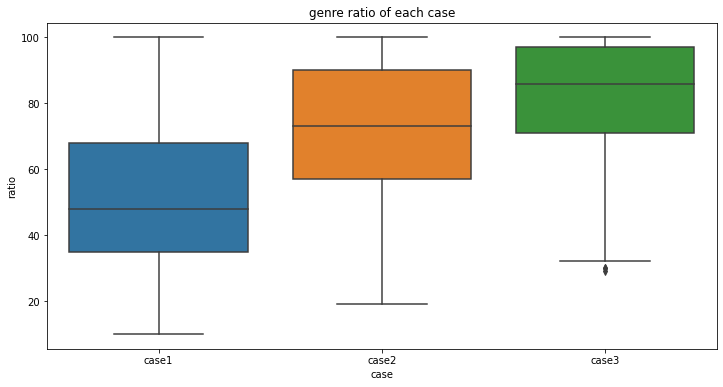

In [82]:
# most of playlists have 2~3 main genre
%%time
case1 = []
case2 = []
case3 = []
for idx in tqdm(range(train.shape[0])):
    _tracks = train.songs[idx]
    _genre = np.array([song.song_gn_gnr_basket[t] for t in _tracks])
    u, c = np.unique(np.concatenate(_genre), return_counts=True)
    if np.array_equal(c, np.array([])):
        continue
    tmp = np.sort(c)[::-1]
    tmp = np.array([np.round(tmp[:i].sum() / tmp.sum() * 100, ) for i in range(1,4)], dtype=np.int64)
    case1.append(tmp[0]); case2.append(tmp[1]); case3.append(tmp[2])
#     if idx == 10:
#         break
case = ["case1" for _ in range(len(case1))] + ["case2" for _ in range(len(case2))]\
            + ["case3" for _ in range(len(case3))]
ratio = case1 + case2 + case3
genre_ratio = pd.DataFrame({"case":case, "ratio":ratio})
plt.figure(figsize=(12, 6))
sns.boxplot(x="case", y="ratio", data=genre_ratio)
plt.title("genre ratio of each case")
plt.show
plt.savefig("graph/genre_ratio_of_each_case.png")